Afegint taules, i fotos de dni

### Code

### Kind of noise added to our syntethic dataset

#### Yellow tint + light changes

(792, 612) 1.6298712 206.35265


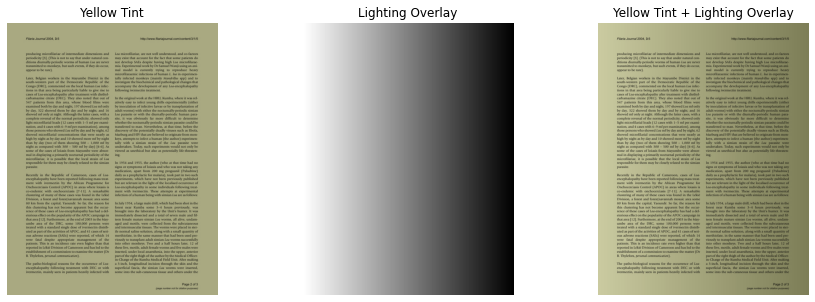

In [481]:
from PIL import Image
import numpy as np
import cv2
import time
import random
import matplotlib.pyplot as plt

def generate_gradient_mask(shape, direction='vertical', direction_type='dark_to_light'):
    height, width = shape
    gradient_mask = np.zeros(shape, dtype=np.float32)
    
    maxx = random.uniform(1.1, 1.5)
    minn = random.uniform(0.5, 0.8)
    
    if direction == 'vertical':
        for y in range(height):
            alpha = y / height if direction_type == 'dark_to_light' else 1 - y / height
            alpha = alpha * (maxx - minn) + minn
            gradient_mask[y, :] = alpha
    elif direction == 'horizontal':
        for x in range(width):
            alpha = x / width if direction_type == 'dark_to_light' else 1 - x / width
            alpha = alpha * (maxx - minn) + minn
            gradient_mask[:, x] = alpha
    elif direction == 'diagonal':
        for y in range(height):
            for x in range(width):
                alpha = min(y, x) / max(height, width) if direction_type == 'dark_to_light' else 1 - min(y, x) / max(height, width)
                alpha = alpha * (maxx - minn) + minn
                gradient_mask[y, x] = alpha
    else:
        gradient_mask = np.ones(shape, dtype=np.uint8)
    return gradient_mask

def add_lighting_and_yellow_tint(image_path, output_path):
    # Load the image
    img = Image.open(image_path)

    # Convert image to numpy array
    img_array = np.array(img)

    # Randomly adjust the yellowish tint
    yellow_factor = random.uniform(0.6, 1)  # Random factor between 0.5 and 1.0
    
    corr_green = random.uniform(0.7, 1)
    corr_red = random.uniform(1, 1.2)
    
    yellow_factor_red = np.clip(yellow_factor*corr_red, 0, 1)
    
    
    img_array[:, :, 0] = img_array[:, :, 0] * yellow_factor_red  # Increasing red channel
    img_array[:, :, 1] = img_array[:, :, 1] * yellow_factor  # Reducing green channel
    img_array[:, :, 2] = img_array[:, :, 2] * yellow_factor * corr_green  # Reducing blue channel

    # Convert array back to image
    yellow_tint_img = Image.fromarray(img_array)

    # Generate a random direction for the lighting overlay
    directions = ['vertical', 'horizontal', 'diagonal', 'none']
    direction = random.choice(directions)
    
    # Generate a random direction type (dark_to_light or light_to_dark) if the direction is horizontal or vertical
    direction_type = 'dark_to_light' if random.choice([True, False]) else 'light_to_dark'

    # Generate gradient mask with random direction and type
    gradient_mask = generate_gradient_mask(img_array.shape[:2], direction, direction_type)
    lighting_factor = random.uniform(0.2, 0.5)  # Random factor between 0.2 and 0.5
    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2LAB)
    
    # transform the uint8 image to float32
    img_array = img_array.astype(np.float32)
    img_array[:, :, 0] = img_array[:, :, 0] * gradient_mask
    img_array[:, :, 0] = np.clip(img_array[:, :, 0], 0, 254)
    print(img_array[:, :, 0].shape, img_array[:, :, 0].min(), img_array[:, :, 0].max())
    
    # transform the float32 image to uint8
    img_array = img_array.astype(np.uint8)
    
    # Convert lab to rgb
    img_array = cv2.cvtColor(img_array, cv2.COLOR_LAB2RGB)
    
    # Convert array back to image
    overlayed_img = Image.fromarray(img_array)

    # Plot the images
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(yellow_tint_img)
    ax[0].axis('off')
    ax[0].set_title('Yellow Tint')
    
    ax[1].imshow(gradient_mask, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('Lighting Overlay')
    
    ax[2].imshow(overlayed_img)
    ax[2].axis('off')
    ax[2].set_title('Yellow Tint + Lighting Overlay')

    plt.show()

# Example usage
input_path = "./images/PMC514527_00001.jpg"
output_path = f"./images/modified_document_{time.time()}.jpg"
add_lighting_and_yellow_tint(input_path, output_path)


#### Adding background noise textures

We want to imitate this images

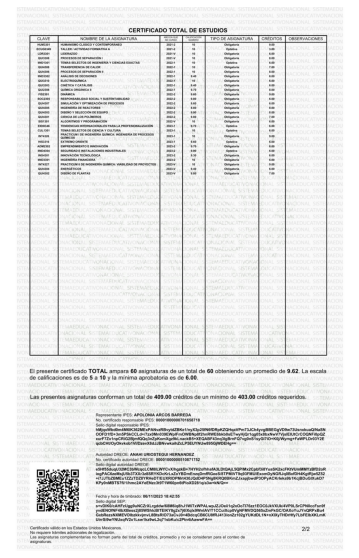

In [484]:
# open image Sample documents - JPG - NoName/20.jpg

import matplotlib.pyplot as plt

img = plt.imread("C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Sample documents - JPG - NoName/20.jpg")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

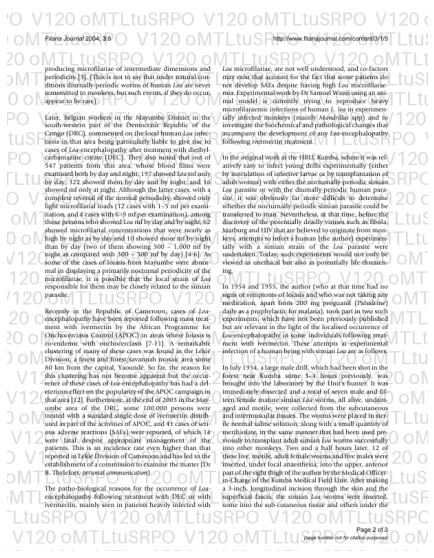

In [632]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def add_bkg_noise(img):
    orig = img.copy()
    bkg = np.zeros_like(img)
    
    # choose a random num between 3 and 25
    num_letters = random.randint(5, 25)
    
    #choose a random combination of letters and numbers with the length of num_letters
    letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789              '
    bkg_text = ''.join(random.choices(letters, k=num_letters))
    
    alpha = random.randint(0, 70)
    font_size = random.randint(15, 30)
    
    bkg_text = bkg_text * (img.size[0] * 5 // (len(bkg_text)*font_size) + 1)

    # create a new image with the bkg_text
    bkg_img = Image.new('RGB', img.size, (0, 0, 0))
    for j in range(0, img.size[1], int(font_size*1.1)):
        i = random.randint(-200, 0)
        draw = ImageDraw.Draw(bkg_img)
        draw.text((i, j), bkg_text, fill=(alpha, alpha, alpha), font_size=font_size)
    
    solid_color = Image.new('RGB', img.size, (0, 0, 0))
    bkg_img = bkg_img.convert('L')
    solid_color.putalpha(bkg_img)
    img.paste(solid_color, (0, 0), solid_color)
    
    """
    # plot the image
    fig, ax = plt.subplots(1, 4, figsize=(20, 20))
    ax[0].imshow(orig)
    ax[0].axis('off')
    ax[0].set_title('Original Image')
    
    ax[1].imshow(bkg_img, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('Background Noise Image')
    
    ax[2].imshow(solid_color)
    ax[2].axis('off')
    ax[2].set_title('Solid Color Image')
    
    ax[3].imshow(img)
    ax[3].axis('off')
    ax[3].set_title('Modified Image')
    plt.show()
    """
    
    # plt.figure(figsize=(10, 10))
    # plt.imshow(img)
    # plt.axis('off')
    # plt.show()
    return img

# Example usage
input_path = "./images/PMC514527_00001.jpg"
add_bkg_noise(input_path)

#### Puting borders to the image

In [ ]:
import os
def add_border(dir_borders, img):
    border = random.choice(os.listdir(dir_borders))
    border = Image.open(f"{dir_borders}/{border}")
    border = border.resize(img.size)
    img.paste(border, (0, 0), border)
    return img

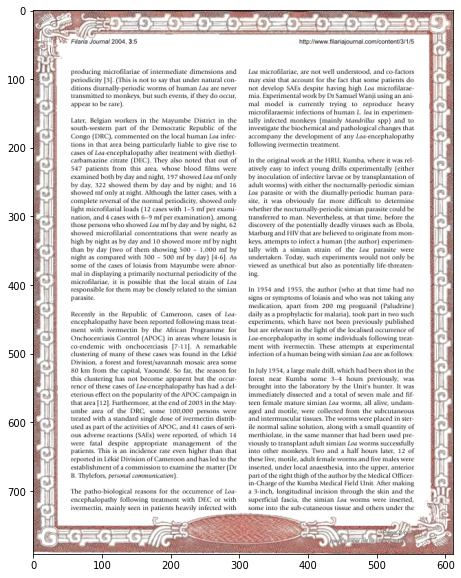

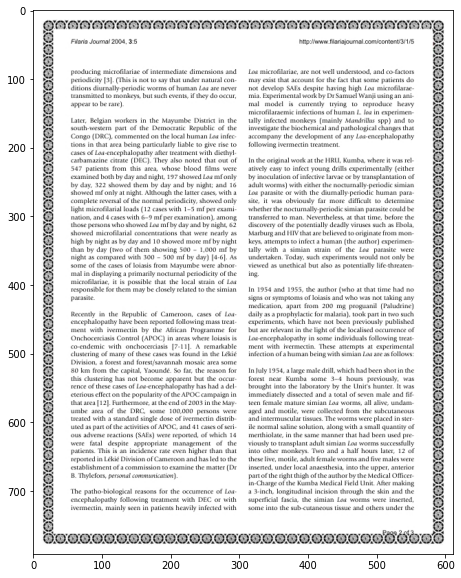

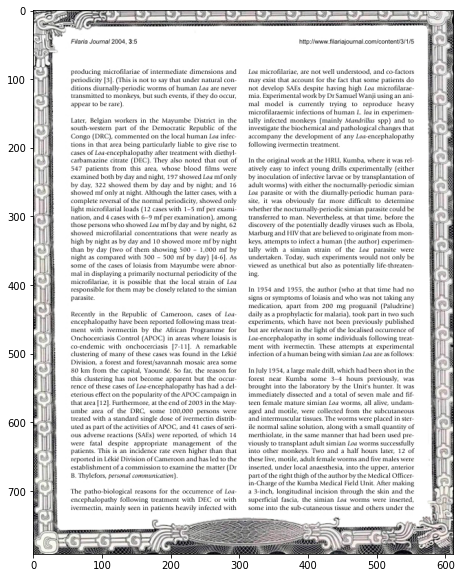

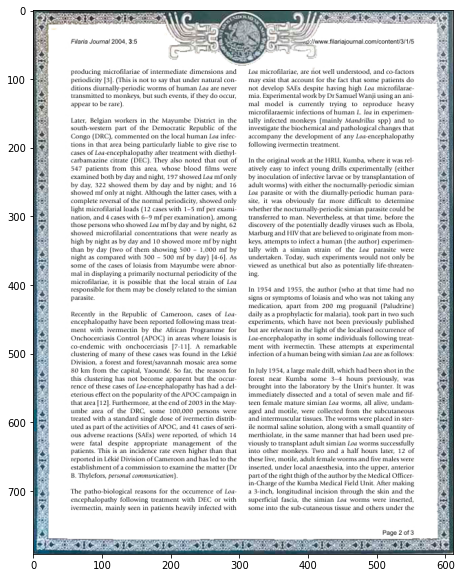

In [637]:
import os
dir_borders = r"C:\Users\Maria\OneDrive - UAB\Documentos\3r de IA\Synthesis project II\Github\Project_Synthesis2-\Datasets\Borders"

# iterate over all the borders and put them in the image
for border in os.listdir(dir_borders):
    img = Image.open("./images/PMC514527_00001.jpg")
    border = Image.open(f"{dir_borders}/{border}")
    border = border.resize(img.size)
    img.paste(border, (0, 0), border)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.show()

### Functions used

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

from PIL import Image
import numpy as np
import cv2
import time
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os

In [2]:
def add_transparent_image(background, foreground, x_offset=None, y_offset=None):
    bg_h, bg_w, bg_channels = background.shape
    fg_h, fg_w, fg_channels = foreground.shape

    assert bg_channels == 3, f'background image should have exactly 3 channels (RGB). found:{bg_channels}'
    assert fg_channels == 4, f'foreground image should have exactly 4 channels (RGBA). found:{fg_channels}'

    # center by default
    if x_offset is None: x_offset = (bg_w - fg_w) // 2
    if y_offset is None: y_offset = (bg_h - fg_h) // 2

    w = min(fg_w, bg_w, fg_w + x_offset, bg_w - x_offset)
    h = min(fg_h, bg_h, fg_h + y_offset, bg_h - y_offset)

    if w < 1 or h < 1: return

    # clip foreground and background images to the overlapping regions
    bg_x = max(0, x_offset)
    bg_y = max(0, y_offset)
    fg_x = max(0, x_offset * -1)
    fg_y = max(0, y_offset * -1)
    foreground = foreground[fg_y:fg_y + h, fg_x:fg_x + w]
    background_subsection = background[bg_y:bg_y + h, bg_x:bg_x + w]

    # separate alpha and color channels from the foreground image
    foreground_colors = foreground[:, :, :3]
    alpha_channel = foreground[:, :, 3] / 255  # 0-255 => 0.0-1.0

    # construct an alpha_mask that matches the image shape
    alpha_mask = np.dstack((alpha_channel, alpha_channel, alpha_channel))

    # combine the background with the overlay image weighted by alpha
    composite = background_subsection * (1 - alpha_mask) + foreground_colors * alpha_mask

    # overwrite the section of the background image that has been updated
    background[bg_y:bg_y + h, bg_x:bg_x + w] = composite

In [3]:
def get_all_annotations_from_image(dataset, image_id):
    a = [a for a in dataset["annotations"] if a["image_id"] == image_id]
    return a

In [4]:
def on_top_of_text(bb, annotations): 
    # bb = [x, y, w, h]
    # it any of the corners of the bb is inside any of the annotations, return True
    x, y, w, h = bb
    for a in annotations:
        print("test", a["bbox"])
        x2, y2, w2, h2 = a["bbox"]
        if x2 <= x <= x2+w2 and y2 <= y <= y2+h2: return True
        if x2 <= x+w <= x2+w2 and y2 <= y <= y2+h2: return True
        if x2 <= x <= x2+w2 and y2 <= y+h <= y2+h2: return True
        if x2 <= x+w <= x2+w2 and y2 <= y+h <= y2+h2: return True
    return False

In [5]:
def create_COCO_annotation(dataset, image_id, category_id, x, y, w, h):
    # print(dataset)
    annotation = {
        "area": w * h,
        "iscrowd": 0,
        "image_id": image_id,
        "bbox": [x, y, w, h],
        "category_id": category_id, 
        "id": len(dataset["annotations"]) + 3265447 + 14423 + 1,
    }
    
    dataset["annotations"].append(annotation)
    return dataset

In [6]:
def add_stamps(n, page, stamps, stamps_ds, dataset, image_id, split="train"):
    label = 7
    
    img = page.copy()
    
    j = 0
    while j < n:
        idx = np.random.randint(0, len(stamps))
        if stamps[idx]['split'] != split:
            continue
        try: 
            stamp = cv2.imread(f"{stamps_ds}/preprocessed/{stamps[idx]['file_name']}", cv2.IMREAD_UNCHANGED)
            stamp = cv2.cvtColor(stamp, cv2.COLOR_BGR2RGBA)
            
            size = np.random.normal(200, 200)
            size = int(np.clip(size, 50, page.shape[1]*0.8))
            size = int(np.clip(size, 50, page.shape[0]*0.8))
            stamp = cv2.resize(stamp, (0,0), fx=size/stamp.shape[1], fy=size/stamp.shape[0])
            
            angle = np.random.randint(-30, 30)
            center = (stamp.shape[1]//2, stamp.shape[0]//2)
            M = cv2.getRotationMatrix2D(center, angle, 1)
            stamp = cv2.warpAffine(stamp, M, (stamp.shape[1], stamp.shape[0]))
            
            # print(f"stamp: {stamp.shape}, page: {page.shape}", page.shape[1]-stamp.shape[1], page.shape[0]-stamp.shape[0])
            
            # choose x_offset and y_offset while the stamp is on top of any annotation
            x_offset = np.random.randint(0, page.shape[1] - stamp.shape[1])
            y_offset = np.random.randint(0, page.shape[0] - stamp.shape[0])

            alpha = np.random.normal(1-(1/(page.shape[1]/size)), 0.2)
            # print(f"alpha: {0.8-(1/(page.shape[1]/size))}")
            alpha = np.clip(alpha, 0.1, 1)
            
            add_transparent_image(img, stamp*alpha, x_offset, y_offset)
            # cv2.rectangle(img, (x_offset, y_offset), (x_offset+stamp.shape[1], y_offset+stamp.shape[0]), (0, 255, 0), 4)
            
            dataset = create_COCO_annotation(dataset, image_id, label, x_offset, y_offset, stamp.shape[1], stamp.shape[0])
        
            j += 1
        except:
            print(f"Error adding stamp {stamps[idx]['file_name']}")
            raise(Exception)
        
    return img, dataset

In [7]:
def add_qrs(n, page, qrs, qrs_dataset, dataset, image_id, split='train'):
    label = 8
    img = page.copy()
        
    j = 0
    while j < n:
        idx = np.random.randint(0, len(qrs))
        if qrs[idx]['split'] != split:
            continue
        try: 
            
            # print(f"Adding QR code {qrs_dataset}/preprocessed/{qrs[idx]['file_name']}")
            
            qr = cv2.imread(f"{qrs_dataset}/preprocessed/{qrs[idx]['file_name']}", cv2.IMREAD_UNCHANGED)
            # crop a 5 % of the image per each side
            qr = qr[qr.shape[0]//10:qr.shape[0]-(qr.shape[0]//10), qr.shape[1]//10:qr.shape[1]-(qr.shape[1]//10)]


            size = np.random.randint(50, 175)
            qr = cv2.resize(qr, (0,0), fx=size/qr.shape[1], fy=size/qr.shape[0])
            
            x_offset = np.random.randint(0, page.shape[1] - qr.shape[1])
            y_offset = np.random.randint(0, page.shape[0] - qr.shape[0])

            alpha = np.random.normal(0.9, 0.2)
            alpha = np.clip(alpha, 0.1, 0.85)
            
            add_transparent_image(img, qr*alpha, x_offset, y_offset)
            #cv2.rectangle(img, (x_offset, y_offset), (x_offset+qr.shape[1], y_offset+qr.shape[0]), (0, 0, 255), 3)
            
            dataset = create_COCO_annotation(dataset, image_id, label, x_offset, y_offset, qr.shape[1], qr.shape[0])
        
            j += 1
        except:
            print(f"Error adding qr {qrs[idx]['file_name']}")
            raise(Exception)
            
    return img, dataset

In [8]:
def add_barcodes(n, page, barcodes, barcodes_dataset, dataset, image_id, split='train'):
    label = 9
    img = page.copy()
        
    j = 0
    while j < n:
        idx = np.random.randint(0, len(barcodes))
        if barcodes[idx]['split'] != split:
            continue
        try: 
            
            # print(f"Adding QR code {qrs_dataset}/preprocessed/{qrs[j]['file_name']}")
            
            barcode = cv2.imread(f"{barcodes_dataset}/preprocessed/{barcodes[idx]['file_name']}", cv2.IMREAD_UNCHANGED)
            # crop a 5 % of the image per each side
            # barcode = barcode[qr.shape[0]//10:qr.shape[0]-(qr.shape[0]//10), qr.shape[1]//10:barcode.shape[1]-(barcode.shape[1]//10)]


            size = np.random.randint(50, 175)
            barcode = cv2.resize(barcode, (0,0), fx=size/barcode.shape[1], fy=size/barcode.shape[0])
            
            x_offset = np.random.randint(0, page.shape[1] - barcode.shape[1])
            y_offset = np.random.randint(0, page.shape[0] - barcode.shape[0])

            alpha = np.random.normal(0.9, 0.2)
            alpha = np.clip(alpha, 0.1, 1)
            
            add_transparent_image(img, barcode*alpha, x_offset, y_offset)
            # cv2.rectangle(img, (x_offset, y_offset), (x_offset+barcode.shape[1], y_offset+barcode.shape[0]), (0, 255, 255), 3)
            
            dataset = create_COCO_annotation(dataset, image_id, label, x_offset, y_offset, barcode.shape[1], barcode.shape[0])
            
            j += 1
        except:
            print(f"Error adding barcode {barcodes[idx]['file_name']}")
            raise(Exception)
            
    return img, dataset

In [19]:
def add_border(dir_borders, img):
    try:
        img = Image.fromarray(img)
    except: 
        pass
    
    border = random.choice(os.listdir(dir_borders))
    border = Image.open(f"{dir_borders}/{border}")
    print(border.size, img.size)
    border = border.resize(img.size)
    img.paste(border, (0, 0), border)
    return img

In [20]:
def add_bkg_noise(img):
    orig = img.copy()
    bkg = np.zeros_like(img)
    
    # choose a random num between 3 and 25
    num_letters = random.randint(5, 25)
    
    #choose a random combination of letters and numbers with the length of num_letters
    letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789              '
    bkg_text = ''.join(random.choices(letters, k=num_letters))
    
    alpha = random.randint(0, 50)
    font_size = random.randint(15, 30)
    
    img = Image.fromarray(img)
    
    bkg_text = bkg_text * (img.size[0] * 5 // (len(bkg_text)*font_size) + 1)

    # create a new image with the bkg_text
    bkg_img = Image.new('RGB', img.size, (0, 0, 0))
    for j in range(0, img.size[1], int(font_size*1.1)):
        i = random.randint(-200, 0)
        draw = ImageDraw.Draw(bkg_img)
        draw.text((i, j), bkg_text, fill=(alpha, alpha, alpha), font_size=font_size)
    
    solid_color = Image.new('RGB', img.size, (0, 0, 0))
    bkg_img = bkg_img.convert('L')
    solid_color.putalpha(bkg_img)
    img.paste(solid_color, (0, 0), solid_color)
    return img

In [21]:
def generate_gradient_mask(shape, direction='vertical', direction_type='dark_to_light'):
    height, width = shape
    gradient_mask = np.zeros(shape, dtype=np.float32)
    
    maxx = random.uniform(1.1, 1.5)
    minn = random.uniform(0.5, 0.8)
    
    if direction == 'vertical':
        for y in range(height):
            alpha = y / height if direction_type == 'dark_to_light' else 1 - y / height
            alpha = alpha * (maxx - minn) + minn
            gradient_mask[y, :] = alpha
    elif direction == 'horizontal':
        for x in range(width):
            alpha = x / width if direction_type == 'dark_to_light' else 1 - x / width
            alpha = alpha * (maxx - minn) + minn
            gradient_mask[:, x] = alpha
    elif direction == 'diagonal':
        for y in range(height):
            for x in range(width):
                alpha = min(y, x) / max(height, width) if direction_type == 'dark_to_light' else 1 - min(y, x) / max(height, width)
                alpha = alpha * (maxx - minn) + minn
                gradient_mask[y, x] = alpha
    else:
        gradient_mask = np.ones(shape, dtype=np.uint8)
    return gradient_mask

def add_lighting_and_yellow_tint(img):
    img_array = np.array(img)
    # Randomly adjust the yellowish tint
    yellow_factor = random.uniform(0.6, 1)  # Random factor between 0.5 and 1.0
    
    corr_green = random.uniform(0.7, 1)
    corr_red = random.uniform(1, 1.2)
    
    yellow_factor_red = np.clip(yellow_factor*corr_red, 0, 1)
    
    
    img_array[:, :, 0] = img_array[:, :, 0] * yellow_factor_red  # Increasing red channel
    img_array[:, :, 1] = img_array[:, :, 1] * yellow_factor  # Reducing green channel
    img_array[:, :, 2] = img_array[:, :, 2] * yellow_factor * corr_green  # Reducing blue channel

    # Convert array back to image
    yellow_tint_img = Image.fromarray(img_array)

    # Generate a random direction for the lighting overlay
    directions = ['vertical', 'horizontal', 'diagonal', 'none']
    direction = random.choice(directions)
    
    # Generate a random direction type (dark_to_light or light_to_dark) if the direction is horizontal or vertical
    direction_type = 'dark_to_light' if random.choice([True, False]) else 'light_to_dark'

    # Generate gradient mask with random direction and type
    gradient_mask = generate_gradient_mask(img_array.shape[:2], direction, direction_type)
    lighting_factor = random.uniform(0.2, 0.5)  # Random factor between 0.2 and 0.5
    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2LAB)
    
    # transform the uint8 image to float32
    img_array = img_array.astype(np.float32)
    img_array[:, :, 0] = img_array[:, :, 0] * gradient_mask
    img_array[:, :, 0] = np.clip(img_array[:, :, 0], 0, 254)
    print(img_array[:, :, 0].shape, img_array[:, :, 0].min(), img_array[:, :, 0].max())
    
    # transform the float32 image to uint8
    img_array = img_array.astype(np.uint8)
    
    # Convert lab to rgb
    img_array = cv2.cvtColor(img_array, cv2.COLOR_LAB2RGB)
    
    # Convert array back to image
    overlayed_img = Image.fromarray(img_array)

    return overlayed_img

In [22]:
def add_signatures(n, page, signatures, signatures_ds, dataset, image_id, split='train'):
    label = 6
    img = page.copy()
        
    j = 0
    while j < n:
        idx = np.random.randint(0, len(signatures))
        if signatures[idx]['split'] != split:
            continue
        try: 
            #signature = cv2.imread(f"{signatures_ds}/dataset3/forge_preprocessed/{signatures[idx]['file_name']}", cv2.IMREAD_UNCHANGED)
            signature = cv2.imread(f"{signatures_ds}/preprocessed/{signatures[idx]['file_name']}", cv2.IMREAD_UNCHANGED)
            signature = cv2.cvtColor(signature, cv2.COLOR_BGR2RGBA)
            #print(signature)
            
            size = np.random.randint(50, 200)
            signature = cv2.resize(signature, (0,0), fx=size/signature.shape[1], fy=size/signature.shape[0])
            
            # rotate the image randomly
            angle = np.random.randint(-30, 30)
            center = (signature.shape[1]//2, signature.shape[0]//2)
            M = cv2.getRotationMatrix2D(center, angle, 1)
            signature = cv2.warpAffine(signature, M, (signature.shape[1], signature.shape[0]))
            
            
            x_offset = np.random.randint(0, page.shape[1] - signature.shape[1])
            y_offset = np.random.randint(0, page.shape[0] - signature.shape[0])

            alpha = np.random.normal(0.9, 0.2)
            alpha = 1
            
            add_transparent_image(img, signature*alpha, x_offset, y_offset)
            # cv2.rectangle(img, (x_offset, y_offset), (x_offset+signature.shape[1], y_offset+signature.shape[0]), (255, 0, 255), 3)
            
            dataset = create_COCO_annotation(dataset, image_id, label, x_offset, y_offset, signature.shape[1], signature.shape[0])
            
            j += 1
            
        except:
            print(f"Error adding signature {signatures[idx]['file_name']}")
            raise(Exception)
            
    return img, dataset

#### adding stamps and signatures only over the text region

### Code

In [41]:
split = "train"

In [42]:
import json

dir2publaynet = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Publaynet"

dir2signatures = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Signatures_dataset"
dataset = "preprocessed"

dir2stamps = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Stamps_dataset"
dir2qrs = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/QRs_dataset/"
dir2barcodes = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Barcodes_dataset"
dir_borders = r"C:\Users\Maria\OneDrive - UAB\Documentos\3r de IA\Synthesis project II\Github\Project_Synthesis2-\Datasets\Borders"


with open(f"{dir2publaynet}/{split}_syn.json", 'r') as f:
   publaynet = json.load(f)   

"""with open(f"{dir2publaynet}/{split}.json", 'r') as f:
     publaynet = json.load(f)"""

with open(f"{dir2stamps}/splits.json", 'r') as f:
    stamps = json.load(f)
    
with open(f"{dir2signatures}/splits.json", 'r') as f:
    signatures = json.load(f) 

with open(f"{dir2qrs}/splits.json", 'r') as f:
    qrs = json.load(f)

with open(f"{dir2barcodes}/splits.json", 'r') as f:
    barcodes = json.load(f)

In [43]:
import os

#ds_dir = '/hhome/ps2g07/document_analysis/github/Project_Synthesis2-/Datasets/Publaynet/Publaynet_partition_1/Synthetics_DS_partition1'
ds_dir = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2"
os.makedirs(ds_dir, exist_ok=True)

In [44]:
dataset = {"categories":publaynet["categories"].copy(),
            "images":[],
            "annotations":[]}

dataset["categories"].append({'supercategory': '', 'id': 6, 'name': 'signature'})
dataset["categories"].append({'supercategory': '', 'id': 7, 'name': 'stamp'})
dataset["categories"].append({'supercategory': '', 'id': 8, 'name': 'qr'})
dataset["categories"].append({'supercategory': '', 'id': 9, 'name': 'barcode'})
dataset["categories"]

[{'supercategory': '', 'id': 1, 'name': 'text'},
 {'supercategory': '', 'id': 2, 'name': 'title'},
 {'supercategory': '', 'id': 3, 'name': 'list'},
 {'supercategory': '', 'id': 4, 'name': 'table'},
 {'supercategory': '', 'id': 5, 'name': 'figure'},
 {'supercategory': '', 'id': 6, 'name': 'signature'},
 {'supercategory': '', 'id': 7, 'name': 'stamp'},
 {'supercategory': '', 'id': 8, 'name': 'qr'},
 {'supercategory': '', 'id': 9, 'name': 'barcode'}]

In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

for i, sample in tqdm(enumerate(publaynet["images"])):     
    dataset["annotations"] = get_all_annotations_from_image(publaynet, int(sample["id"]))
    
    page = cv2.imread(f"{dir2publaynet}/train/{sample['file_name']}")
    page = cv2.cvtColor(page, cv2.COLOR_BGR2RGB)
    
    n = np.random.randint(1, 4)
    img, dataset = add_stamps(n, page, stamps, dir2stamps, dataset, sample['id'])

    n = np.random.randint(0, 5)
    img, dataset = add_signatures(n, img, signatures, dir2signatures, dataset, sample['id'])
    
    n = np.random.randint(0, 3)
    img, dataset = add_qrs(n, img, qrs, dir2qrs, dataset, sample['id'])
    
    n = np.random.randint(0, 2)
    img, dataset = add_barcodes(n, img, barcodes, dir2barcodes, dataset, sample['id'])
    
    if random.choice([True, False]):
        img = add_bkg_noise(img)
    
    if random.choice([True, False, False, False, False, False]):
        img = add_border(dir_borders, img)
    img = add_lighting_and_yellow_tint(img)
    
    # Save the image
    os.makedirs(f"{ds_dir}/{split}", exist_ok=True)

    # show the image
    # plt.figure(figsize=(10, 10))
    # plt.imshow(img)
    # plt.axis('off')
    # plt.show()
    img = np.array(img)
    
    cv2.imwrite(f"{ds_dir}/{split}/{sample['file_name']}", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    # print(f"Image {sample['file_name']} saved")
    
    if i % 100 == 0:
        with open(f"{ds_dir}/{split}.json", 'w') as f:
            json.dump(dataset, f)
        print(f"Dataset saved at {ds_dir}/{split}.json") 

1it [00:00,  7.94it/s]

(810, 612) 1.1952583 254.0
Image PMC5129499_00001.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


3it [00:00,  4.64it/s]

(783, 596) 0.0 228.9315
Image PMC4895310_00005.jpg saved
(791, 596) 0.0 237.0
Image PMC5387197_00008.jpg saved


4it [00:01,  3.67it/s]

(792, 612) 0.0 191.0
Image PMC5560163_00018.jpg saved


5it [00:01,  4.07it/s]

(648, 432) 0.0 219.0
Image PMC4657460_00015.jpg saved


6it [00:01,  4.32it/s]

(703, 494) 0.0 250.18187
Image PMC5327873_00017.jpg saved


7it [00:01,  3.96it/s]

(794, 596) 0.0 254.0
Image PMC5582405_00001.jpg saved


8it [00:01,  4.02it/s]

(792, 612) 0.0 203.0
Image PMC3920552_00005.jpg saved


9it [00:02,  2.95it/s]

(792, 612) 0.0 254.0
Image PMC5598747_00010.jpg saved


10it [00:02,  2.96it/s]

(842, 595) 0.0 254.0
Image PMC4255325_00003.jpg saved


11it [00:03,  3.07it/s]

(772, 1000) (596, 791)
(791, 596) 0.0 226.29732
Image PMC4962378_00001.jpg saved


12it [00:03,  2.74it/s]

(792, 594) 0.0 254.0
Image PMC5320018_00009.jpg saved


13it [00:03,  3.05it/s]

(842, 596) 0.0 235.74261
Image PMC5454562_00006.jpg saved


14it [00:04,  3.41it/s]

(783, 596) 0.0 234.3407
Image PMC4317493_00005.jpg saved


15it [00:04,  2.75it/s]

(792, 612) 0.0 254.0
Image PMC5765771_00009.jpg saved


16it [00:05,  2.22it/s]

(794, 596) 0.7389372 206.18066
Image PMC4343048_00003.jpg saved
(772, 1000) (596, 842)


17it [00:05,  2.67it/s]

(842, 596) 0.0 214.40274
Image PMC2936215_00000.jpg saved


18it [00:05,  2.89it/s]

(801, 601) 0.0 209.5322
Image PMC5733763_00001.jpg saved


20it [00:06,  3.62it/s]

(783, 596) 3.9602299 254.0
Image PMC4171811_00003.jpg saved
(791, 596) 0.0 254.0
Image PMC5937896_00002.jpg saved


21it [00:06,  3.24it/s]

(791, 596) 1.8209686 254.0
Image PMC5382424_00006.jpg saved


22it [00:06,  3.05it/s]

(564, 736) (612, 792)
(792, 612) 0.0 254.0
Image PMC5017530_00003.jpg saved
(791, 596) 0.0 228.62177
Image PMC5486893_00009.jpg saved


25it [00:07,  4.89it/s]

(792, 612) 0.0 254.0
Image PMC5549439_00004.jpg saved
(792, 612) 0.0 246.0
Image PMC4455957_00008.jpg saved


27it [00:07,  4.84it/s]

(780, 596) 3.0 194.0
Image PMC5469893_00016.jpg saved
(791, 596) 2.0975351 254.0
Image PMC4895156_00000.jpg saved


28it [00:08,  4.48it/s]

(772, 1000) (596, 791)
(791, 596) 0.0 254.0
Image PMC2682330_00000.jpg saved


29it [00:08,  4.91it/s]

(794, 596) 0.0 216.0
Image PMC4105890_00000.jpg saved


31it [00:08,  4.05it/s]

(595, 842) 0.0 254.0
Image PMC3961066_00004.jpg saved
(842, 596) 0.0 254.0
Image PMC5717621_00002.jpg saved


33it [00:09,  5.35it/s]

(783, 596) 0.0 197.0
Image PMC5845734_00000.jpg saved
(792, 612) 0.0 192.0
Image PMC2238755_00006.jpg saved


35it [00:09,  6.15it/s]

(792, 612) 0.7844968 254.0
Image PMC5363654_00020.jpg saved
(792, 612) 0.0 253.6745
Image PMC5103326_00014.jpg saved


36it [00:09,  3.42it/s]

(792, 594) 11.160574 229.83812
Image PMC5485071_00002.jpg saved


37it [00:10,  3.23it/s]

(794, 596) 2.929591 254.0
Image PMC3751453_00000.jpg saved


38it [00:10,  2.75it/s]

(772, 1000) (596, 842)
(842, 596) 0.0 227.0
Image PMC5664053_00002.jpg saved


39it [00:11,  2.90it/s]

(794, 596) 0.98360366 216.44987
Image PMC4593983_00002.jpg saved
(783, 596) 6.0 247.0


40it [00:11,  3.35it/s]

Image PMC3133701_00007.jpg saved
(698, 485) 0.0 221.35161
Image PMC5726385_00013.jpg saved


42it [00:11,  3.65it/s]

(792, 612) 0.0 254.0
Image PMC5113289_00011.jpg saved


43it [00:12,  3.11it/s]

(783, 603) 0.0 234.98608
Image PMC5528199_00009.jpg saved


44it [00:12,  3.27it/s]

(792, 594) 0.0 190.0
Image PMC5736244_00009.jpg saved


45it [00:13,  2.38it/s]

(794, 596) 0.9717359 254.0
Image PMC6077926_00010.jpg saved


46it [00:13,  2.24it/s]

(792, 612) 0.0 188.26126
Image PMC5464391_00000.jpg saved


47it [00:14,  2.18it/s]

(792, 601) 1.0 237.0
Image PMC3677643_00001.jpg saved
(842, 596) 0.0 207.0


49it [00:14,  3.16it/s]

Image PMC4494256_00012.jpg saved
(792, 612) 0.0 242.0
Image PMC4208301_00003.jpg saved


50it [00:14,  3.82it/s]

(791, 596) 0.0 177.0
Image PMC6029123_00003.jpg saved


51it [00:15,  3.05it/s]

(792, 594) 0.0 254.0
Image PMC5774184_00010.jpg saved


53it [00:15,  2.87it/s]

(791, 596) 0.0 254.0
Image PMC5216111_00001.jpg saved
(842, 595) 0.0 254.0
Image PMC4293609_00000.jpg saved
(626, 803) (612, 792)


54it [00:16,  2.51it/s]

(792, 612) 0.0 204.5112
Image PMC5928511_00001.jpg saved


55it [00:17,  2.21it/s]

(792, 612) 0.0 254.0
Image PMC1865548_00005.jpg saved
(626, 803) (596, 800)
(800, 596) 2.0 202.0
Image PMC3267048_00016.jpg saved


57it [00:17,  3.15it/s]

(681, 468) 1.8514993 254.0
Image PMC6060226_00005.jpg saved


58it [00:17,  2.89it/s]

(700, 493) 0.0 243.30988
Image PMC3261433_00004.jpg saved


59it [00:18,  3.14it/s]

(792, 612) 0.0 238.0
Image PMC4493882_00007.jpg saved


60it [00:18,  3.00it/s]

(794, 596) 0.0 219.06448
Image PMC4320629_00021.jpg saved


61it [00:18,  3.05it/s]

(794, 596) 0.0 249.10594
Image PMC3682869_00000.jpg saved


62it [00:19,  2.77it/s]

(792, 601) 1.422345 220.12206
Image PMC4466500_00002.jpg saved


63it [00:19,  2.66it/s]

(791, 596) 0.0 254.0
Image PMC6053357_00003.jpg saved
(626, 803) (486, 702)


64it [00:20,  2.56it/s]

(702, 486) 0.0 224.10997
Image PMC5969112_00024.jpg saved
(564, 736) (601, 792)
(792, 601) 2.768091 254.0
Image PMC3268233_00003.jpg saved


66it [00:20,  3.18it/s]

(794, 596) 0.0 229.0
Image PMC4283619_00001.jpg saved


68it [00:20,  3.88it/s]

(794, 596) 0.0 254.0
Image PMC4300727_00005.jpg saved
(791, 596) 10.529651 254.0
Image PMC5407417_00020.jpg saved


69it [00:21,  3.49it/s]

(783, 596) 4.275547 241.56659
Image PMC5832314_00011.jpg saved


71it [00:21,  4.62it/s]

(783, 596) 0.0 250.0
Image PMC3673729_00000.jpg saved
(792, 601) 1.5842383 225.29749
Image PMC3876678_00011.jpg saved


73it [00:22,  4.63it/s]

(794, 596) 2.0 212.0
Image PMC3684505_00000.jpg saved
(792, 612) 0.0 254.0
Image PMC4273535_00001.jpg saved


74it [00:22,  4.37it/s]

(792, 612) 0.0 185.99014
Image PMC2701080_00000.jpg saved


75it [00:22,  3.82it/s]

(783, 596) 1.4058753 230.29584
Image PMC5972674_00007.jpg saved
(791, 596) 1.0782335 242.959


77it [00:23,  4.43it/s]

Image PMC5982459_00003.jpg saved
(792, 612) 0.0 254.0
Image PMC5200636_00000.jpg saved


79it [00:23,  4.85it/s]

(792, 612) 0.0 254.0
Image PMC6093199_00001.jpg saved
(791, 596) 0.0 251.04057
Image PMC5996558_00004.jpg saved


80it [00:24,  3.15it/s]

(791, 596) 0.0 254.0
Image PMC5026719_00003.jpg saved


81it [00:24,  2.52it/s]

(792, 594) 0.0 220.45831
Image PMC4737239_00001.jpg saved
(626, 803) (596, 791)
(791, 596) 0.8649432 233.60641


82it [00:24,  3.02it/s]

Image PMC5863451_00002.jpg saved


83it [00:25,  3.04it/s]

(681, 468) 0.0 254.0
Image PMC3095178_00028.jpg saved
(791, 596) 0.0 251.0


84it [00:25,  3.43it/s]

Image PMC5773051_00001.jpg saved
(791, 596) 0.0 254.0


85it [00:25,  3.73it/s]

Image PMC6061251_00001.jpg saved


86it [00:25,  3.25it/s]

(726, 485) 1.2093264 254.0
Image PMC3617520_00009.jpg saved


87it [00:26,  3.18it/s]

(698, 485) 5.4719553 226.37808
Image PMC4146620_00006.jpg saved
(564, 736) (596, 842)


88it [00:26,  2.87it/s]

(842, 596) 0.0 231.09636
Image PMC5256041_00024.jpg saved


90it [00:27,  3.81it/s]

(703, 494) 0.0 207.99634
Image PMC3469221_00007.jpg saved
(772, 1000) (494, 703)
(703, 494) 0.0 247.16211
Image PMC5360165_00007.jpg saved


91it [00:27,  4.20it/s]

(794, 596) 0.0 204.32292
Image PMC5898482_00009.jpg saved


92it [00:27,  4.34it/s]

(791, 596) 0.0 239.82161
Image PMC5845586_00003.jpg saved


93it [00:27,  4.04it/s]

(792, 601) 0.0 229.0
Image PMC3581134_00001.jpg saved


94it [00:28,  3.43it/s]

(792, 612) 0.0 254.0
Image PMC5714265_00010.jpg saved
(794, 596) 0.0 205.0


95it [00:28,  3.81it/s]

Image PMC5958242_00002.jpg saved
(791, 596) 0.0 254.0


97it [00:28,  4.74it/s]

Image PMC5065584_00004.jpg saved
(794, 596) 0.0 254.0
Image PMC4282155_00002.jpg saved


98it [00:28,  5.22it/s]

(792, 612) 0.0 222.0
Image PMC5423532_00007.jpg saved


99it [00:29,  3.49it/s]

(842, 595) 0.0 238.82802
Image PMC4115402_00000.jpg saved
(792, 612) 8.674601 254.0
Image PMC5894249_00035.jpg saved


101it [00:29,  3.20it/s]

(792, 601) 0.0 216.50131
Image PMC3960736_00002.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


102it [00:30,  2.99it/s]

(842, 595) 0.0 227.60019
Image PMC4180984_00003.jpg saved


103it [00:30,  2.85it/s]

(842, 596) 5.568991 239.84671
Image PMC4155907_00003.jpg saved
(667, 440) 0.0 183.06465
Image PMC5664325_00014.jpg saved


105it [00:31,  3.22it/s]

(791, 596) 1.0 186.0
Image PMC5226114_00005.jpg saved


106it [00:31,  3.23it/s]

(792, 612) 0.0 241.26062
Image PMC4382517_00003.jpg saved


107it [00:31,  3.24it/s]

(792, 612) 0.0 254.0
Image PMC6041992_00005.jpg saved


108it [00:32,  3.14it/s]

(784, 594) 3.1102724 254.0
Image PMC4708620_00005.jpg saved


110it [00:32,  3.56it/s]

(792, 612) 0.0 193.0
Image PMC5714312_00002.jpg saved
(792, 612) 0.0 244.81386
Image PMC4820053_00021.jpg saved


111it [00:33,  2.54it/s]

(837, 610) 0.0 211.53668
Image PMC5672103_00000.jpg saved
(570, 903) (596, 791)


112it [00:33,  2.76it/s]

(791, 596) 0.0 250.0
Image PMC5680379_00003.jpg saved


113it [00:33,  3.03it/s]

(794, 596) 0.0 254.0
Image PMC4941149_00000.jpg saved


114it [00:34,  2.87it/s]

(791, 596) 0.0 245.80801
Image PMC4706656_00012.jpg saved
(791, 596) 0.0 254.0


115it [00:34,  3.30it/s]

Image PMC6061099_00003.jpg saved


116it [00:34,  2.88it/s]

(792, 612) 0.0 254.0
Image PMC4687746_00009.jpg saved


117it [00:35,  2.38it/s]

(794, 596) 0.0 254.0
Image PMC4893149_00002.jpg saved


118it [00:35,  2.67it/s]

(791, 596) 0.0 199.46097
Image PMC4935751_00008.jpg saved


119it [00:36,  2.31it/s]

(791, 596) 6.800414 254.0
Image PMC6029034_00006.jpg saved


120it [00:36,  2.65it/s]

(791, 596) 0.0 254.0
Image PMC4720693_00008.jpg saved


121it [00:36,  2.80it/s]

(794, 596) 0.0 254.0
Image PMC3575379_00009.jpg saved


122it [00:37,  3.07it/s]

(792, 612) 0.0 195.0
Image PMC5954438_00026.jpg saved


123it [00:37,  3.22it/s]

(801, 612) 2.4751089 254.0
Image PMC5698730_00002.jpg saved


124it [00:37,  3.21it/s]

(664, 443) 0.0 235.41351
Image PMC5533212_00009.jpg saved
(792, 612) 0.0 211.0
Image PMC2776232_00002.jpg saved


126it [00:38,  4.14it/s]

(794, 596) 0.0 193.0
Image PMC4776311_00000.jpg saved
(570, 903) (440, 667)
(667, 440) 0.0 227.0


128it [00:38,  4.74it/s]

Image PMC5897888_00209.jpg saved
(791, 596) 0.0 203.0
Image PMC5063900_00000.jpg saved


129it [00:38,  3.74it/s]

(667, 440) 0.0 254.0
Image PMC5493711_00007.jpg saved


131it [00:39,  4.59it/s]

(792, 612) 0.0 254.0
Image PMC5392506_00002.jpg saved
(701, 494) 0.0 242.0
Image PMC4901251_00002.jpg saved


132it [00:39,  4.75it/s]

(842, 596) 0.0 222.97371
Image PMC6064008_00000.jpg saved


133it [00:39,  3.48it/s]

(842, 596) 5.1662693 253.24403
Image PMC5206583_00003.jpg saved
(698, 485) 0.0 252.8768
Image PMC2614680_00004.jpg saved


136it [00:40,  3.54it/s]

(791, 596) 0.0 215.88197
Image PMC4715855_00000.jpg saved
(791, 596) 2.0331495 242.5805
Image PMC5643363_00005.jpg saved


138it [00:41,  4.01it/s]

(794, 596) 0.0 254.0
Image PMC4629316_00001.jpg saved
(792, 612) 0.0 207.15407
Image PMC5340274_00001.jpg saved


140it [00:41,  4.32it/s]

(842, 595) 0.0 202.0
Image PMC4769600_00000.jpg saved
(792, 601) 1.0 213.0
Image PMC4182074_00005.jpg saved


141it [00:42,  3.82it/s]

(564, 736) (612, 810)
(810, 612) 0.0 192.0
Image PMC3525943_00000.jpg saved


142it [00:42,  4.25it/s]

(794, 596) 0.0 233.0
Image PMC4422475_00000.jpg saved


143it [00:42,  4.00it/s]

(842, 595) 0.0 220.0
Image PMC5653712_00004.jpg saved


144it [00:42,  4.00it/s]

(794, 596) 0.0 254.0
Image PMC4944591_00009.jpg saved


145it [00:43,  3.05it/s]

(791, 596) 0.0 254.0
Image PMC5570810_00000.jpg saved


146it [00:43,  2.97it/s]

(681, 468) 0.0 246.44386
Image PMC6079097_00006.jpg saved
(791, 596) 0.0 236.6684
Image PMC5429908_00000.jpg saved


148it [00:44,  3.52it/s]

(570, 903) (596, 791)
(791, 596) 0.0 254.0
Image PMC4756530_00009.jpg saved


150it [00:44,  4.34it/s]

(794, 595) 1.6372529 248.45984
Image PMC2602610_00008.jpg saved
(794, 596) 0.6617393 230.43533
Image PMC5269624_00007.jpg saved


151it [00:44,  4.50it/s]

(794, 596) 0.0 254.0
Image PMC4728808_00003.jpg saved
(792, 612) 0.0 246.35364
Image PMC6048976_00002.jpg saved


154it [00:45,  4.47it/s]

(820, 596) 0.0 245.49915
Image PMC4277333_00006.jpg saved
(794, 596) 0.0 208.0
Image PMC3599699_00001.jpg saved


155it [00:45,  4.13it/s]

(842, 596) 0.0 254.0
Image PMC5133948_00006.jpg saved
(564, 736) (596, 794)


157it [00:46,  4.01it/s]

(794, 596) 0.0 254.0
Image PMC3674898_00000.jpg saved
(791, 596) 0.0 254.0
Image PMC5524853_00000.jpg saved


158it [00:46,  3.91it/s]

(783, 596) 5.513815 224.26343
Image PMC5516236_00003.jpg saved
(564, 736) (596, 842)
(842, 596) 0.0 218.00946


159it [00:46,  4.17it/s]

Image PMC5715691_00002.jpg saved
(783, 594) 0.0 236.0
Image PMC1702554_00002.jpg saved


161it [00:47,  4.00it/s]

(792, 612) 0.0 254.0
Image PMC4882104_00000.jpg saved


163it [00:47,  4.54it/s]

(842, 596) 0.0 186.0
Image PMC5812058_00002.jpg saved
(842, 596) 0.0 231.0
Image PMC5941090_00007.jpg saved


164it [00:47,  3.87it/s]

(626, 803) (612, 792)
(792, 612) 0.0 234.4128
Image PMC4787292_00026.jpg saved


165it [00:48,  4.24it/s]

(842, 596) 0.0 225.30411
Image PMC3829793_00003.jpg saved


166it [00:48,  4.03it/s]

(791, 596) 0.0 254.0
Image PMC5691090_00000.jpg saved
(570, 903) (596, 794)
(794, 596) 0.0 184.0
Image PMC4176141_00003.jpg saved


168it [00:48,  3.55it/s]

(626, 803) (596, 842)
(842, 596) 0.0 254.0
Image PMC5832006_00001.jpg saved
(791, 596) 0.0 254.0
Image PMC5323483_00001.jpg saved


171it [00:49,  5.81it/s]

(792, 601) 0.0 170.0
Image PMC3485484_00002.jpg saved
(792, 612) 0.0 236.0
Image PMC3909650_00001.jpg saved


172it [00:49,  5.22it/s]

(792, 612) 0.0 192.0
Image PMC6029659_00009.jpg saved


174it [00:50,  4.23it/s]

(792, 601) 0.0 254.0
Image PMC3725913_00000.jpg saved
(570, 903) (596, 791)
(791, 596) 0.0 249.81912
Image PMC5636854_00004.jpg saved


175it [00:50,  4.60it/s]

(842, 596) 0.0 216.67186
Image PMC5620576_00001.jpg saved


176it [00:50,  4.32it/s]

(738, 548) 0.0 229.07477
Image PMC4512267_00005.jpg saved


177it [00:51,  3.54it/s]

(792, 601) 0.7305692 200.98238
Image PMC4045368_00003.jpg saved
(626, 803) (594, 792)


178it [00:51,  2.86it/s]

(792, 594) 0.0 254.0
Image PMC4282440_00002.jpg saved


179it [00:51,  3.24it/s]

(794, 596) 0.0 207.8226
Image PMC6000817_00004.jpg saved


180it [00:52,  2.90it/s]

(792, 612) 0.0 254.0
Image PMC5908414_00005.jpg saved


181it [00:52,  2.36it/s]

(794, 596) 2.0324974 254.0
Image PMC3906749_00000.jpg saved


182it [00:53,  2.64it/s]

(794, 596) 0.0 236.38072
Image PMC4898208_00001.jpg saved


184it [00:53,  2.89it/s]

(791, 596) 0.0 217.16223
Image PMC5073110_00005.jpg saved
(792, 612) 0.0 254.0
Image PMC5482397_00005.jpg saved


185it [00:53,  3.34it/s]

(791, 596) 0.0 208.93065
Image PMC3779449_00011.jpg saved


187it [00:54,  3.88it/s]

(794, 610) 1.7715156 254.0
Image PMC5901419_00002.jpg saved
(800, 601) 2.0 216.0
Image PMC5414488_00000.jpg saved


188it [00:54,  4.53it/s]

(783, 594) 0.95877093 240.81494
Image PMC5947825_00002.jpg saved
(772, 1000) (612, 792)


190it [00:55,  3.49it/s]

(792, 612) 0.0 211.72096
Image PMC5482593_00001.jpg saved
(791, 596) 0.0 254.0
Image PMC5886995_00003.jpg saved


191it [00:55,  3.70it/s]

(626, 803) (596, 791)
(791, 596) 3.6161478 254.0
Image PMC5486909_00001.jpg saved


192it [00:55,  3.63it/s]

(570, 903) (612, 792)
(792, 612) 0.0 254.0
Image PMC4028615_00008.jpg saved


193it [00:56,  4.15it/s]

(783, 596) 0.0 235.44464
Image PMC5681548_00016.jpg saved
(792, 612) 0.0 246.87462
Image PMC2186343_00002.jpg saved


195it [00:56,  3.04it/s]

(783, 585) 0.0 254.0
Image PMC5126381_00002.jpg saved


196it [00:57,  3.26it/s]

(792, 601) 0.0 254.0
Image PMC3431073_00000.jpg saved


197it [00:57,  2.94it/s]

(792, 612) 0.0 211.12946
Image PMC2984295_00002.jpg saved


198it [00:58,  2.44it/s]

(792, 594) 0.0 253.90285
Image PMC5524158_00010.jpg saved


199it [00:58,  2.17it/s]

(780, 596) 2.508521 252.34764
Image PMC5063857_00004.jpg saved
(667, 440) 0.0 172.0


200it [00:58,  2.58it/s]

Image PMC6054010_00011.jpg saved


201it [00:59,  2.82it/s]

(783, 594) 0.0 254.0
Image PMC4682453_00001.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


202it [00:59,  2.72it/s]

(794, 596) 0.0 207.38039
Image PMC4255318_00004.jpg saved


204it [01:00,  3.13it/s]

(842, 596) 0.0 222.02878
Image PMC3708104_00001.jpg saved
(792, 612) 0.0 201.40356
Image PMC3915451_00000.jpg saved


205it [01:00,  3.03it/s]

(791, 596) 0.0 254.0
Image PMC5575894_00002.jpg saved


206it [01:00,  2.91it/s]

(791, 596) 0.0 254.0
Image PMC5010607_00004.jpg saved


207it [01:01,  2.90it/s]

(772, 1000) (596, 783)
(783, 596) 0.0 231.83662
Image PMC3040293_00010.jpg saved


208it [01:01,  3.34it/s]

(792, 612) 2.7362368 254.0
Image PMC5609898_00002.jpg saved
(791, 596) 0.0 248.18628


209it [01:01,  3.78it/s]

Image PMC4503880_00005.jpg saved
(808, 596) 2.0 248.0


211it [01:02,  4.35it/s]

Image PMC4766795_00000.jpg saved
(794, 596) 1.0201708 249.09833
Image PMC4959264_00003.jpg saved


212it [01:02,  4.73it/s]

(792, 612) 1.0 238.0
Image PMC5546187_00009.jpg saved


214it [01:02,  4.68it/s]

(794, 596) 8.660022 254.0
Image PMC3269386_00000.jpg saved
(842, 596) 0.0 254.0
Image PMC5062046_00001.jpg saved


215it [01:02,  5.44it/s]

(823, 596) 0.0 196.0
Image PMC3833043_00000.jpg saved
(564, 736) (596, 794)


217it [01:03,  5.66it/s]

(794, 596) 2.0 230.0
Image PMC3130654_00000.jpg saved
(791, 596) 0.0 254.0
Image PMC6035443_00003.jpg saved


219it [01:03,  4.44it/s]

(780, 596) 0.0 254.0
Image PMC4107676_00004.jpg saved
(794, 596) 1.5521001 228.61731
Image PMC3853223_00000.jpg saved


220it [01:03,  5.27it/s]

(791, 596) 0.0 254.0
Image PMC6043541_00005.jpg saved


221it [01:04,  4.39it/s]

(648, 432) 0.0 254.0
Image PMC2784897_00052.jpg saved


222it [01:04,  3.85it/s]

(791, 596) 1.0 203.0
Image PMC4670457_00006.jpg saved
(570, 903) (594, 792)


223it [01:05,  2.88it/s]

(792, 594) 0.0 203.47905
Image PMC4705914_00002.jpg saved


224it [01:05,  2.59it/s]

(783, 594) 0.0 231.82932
Image PMC5655738_00001.jpg saved


226it [01:06,  3.23it/s]

(791, 596) 6.582446 254.0
Image PMC5608875_00001.jpg saved
(698, 485) 0.0 254.0
Image PMC4755202_00025.jpg saved


227it [01:06,  2.62it/s]

(792, 612) 0.0 254.0
Image PMC5172390_00003.jpg saved


228it [01:06,  2.83it/s]

(626, 803) (596, 791)
(791, 596) 1.961526 254.0
Image PMC5447864_00003.jpg saved


229it [01:07,  2.98it/s]

(791, 596) 0.0 254.0
Image PMC5568397_00011.jpg saved


230it [01:07,  2.54it/s]

(791, 596) 0.0 254.0
Image PMC4785623_00007.jpg saved


231it [01:07,  2.92it/s]

(794, 596) 6.0 250.0
Image PMC3037888_00000.jpg saved


232it [01:08,  3.12it/s]

(791, 596) 0.0 254.0
Image PMC5773664_00001.jpg saved


233it [01:08,  3.37it/s]

(791, 596) 0.0 162.0
Image PMC5917000_00004.jpg saved


234it [01:08,  3.30it/s]

(626, 803) (596, 794)
(794, 596) 0.0 254.0
Image PMC3514080_00000.jpg saved
(791, 596) 0.0 183.0


235it [01:08,  4.01it/s]

Image PMC5535290_00005.jpg saved


237it [01:09,  4.45it/s]

(667, 440) 0.64284414 216.37296
Image PMC5715042_00002.jpg saved
(794, 609) 0.0 191.0
Image PMC3433705_00003.jpg saved


238it [01:09,  4.79it/s]

(667, 440) 1.0 205.0
Image PMC5934456_00001.jpg saved


240it [01:09,  5.15it/s]

(703, 494) 0.0 254.0
Image PMC4743603_00017.jpg saved
(783, 594) 1.0589172 222.02357
Image PMC4863930_00001.jpg saved


241it [01:10,  4.24it/s]

(851, 610) 2.0 210.0
Image PMC3507310_00001.jpg saved


242it [01:10,  3.08it/s]

(791, 596) 0.0 254.0
Image PMC4861746_00004.jpg saved
(772, 1000) (596, 794)


243it [01:11,  2.73it/s]

(794, 596) 0.0 254.0
Image PMC2917852_00027.jpg saved
(842, 596) 0.0 247.0
Image PMC4251391_00013.jpg saved


245it [01:11,  2.93it/s]

(794, 596) 0.0 254.0
Image PMC4247495_00001.jpg saved


246it [01:12,  2.78it/s]

(791, 596) 0.0 205.32469
Image PMC4946185_00003.jpg saved


248it [01:12,  3.66it/s]

(792, 601) 1.0 188.0
Image PMC3804288_00000.jpg saved
(792, 612) 0.0 228.0
Image PMC5531365_00005.jpg saved


249it [01:12,  3.85it/s]

(792, 612) 0.0 197.0
Image PMC5841569_00011.jpg saved
(570, 903) (596, 808)


250it [01:13,  4.00it/s]

(808, 596) 0.0 224.98444
Image PMC4594433_00000.jpg saved


251it [01:13,  3.27it/s]

(792, 612) 0.0 241.35358
Image PMC5726776_00003.jpg saved


252it [01:13,  3.45it/s]

(792, 612) 6.229298 254.0
Image PMC5829717_00021.jpg saved


253it [01:14,  2.28it/s]

(852, 653) 0.0 254.0
Image PMC5010275_00003.jpg saved


254it [01:14,  2.53it/s]

(783, 596) 0.0 254.0
Image PMC4135089_00009.jpg saved


255it [01:15,  2.44it/s]

(792, 612) 0.0 182.33739
Image PMC5714312_00027.jpg saved


256it [01:15,  2.69it/s]

(791, 596) 0.0 254.0
Image PMC6087715_00008.jpg saved


257it [01:15,  2.99it/s]

(791, 596) 0.0 228.0
Image PMC5549299_00004.jpg saved
(791, 596) 0.0 186.0


259it [01:16,  3.86it/s]

Image PMC5153694_00004.jpg saved
(794, 595) 0.0 241.0
Image PMC2903497_00004.jpg saved


261it [01:16,  5.01it/s]

(794, 596) 5.08272 254.0
Image PMC2701553_00003.jpg saved
(792, 612) 0.0 254.0
Image PMC6017994_00005.jpg saved


262it [01:16,  4.18it/s]

(626, 803) (596, 842)
(842, 596) 0.0 218.66148
Image PMC5713300_00001.jpg saved


263it [01:17,  3.83it/s]

(792, 601) 2.1013794 243.30873
Image PMC4408623_00002.jpg saved


264it [01:17,  3.99it/s]

(794, 596) 7.1565304 254.0
Image PMC3055810_00003.jpg saved
(564, 736) (612, 792)


265it [01:18,  2.68it/s]

(792, 612) 0.0 254.0
Image PMC5935453_00007.jpg saved
(794, 596) 0.0 254.0
Image PMC4777914_00004.jpg saved


267it [01:18,  2.90it/s]

(794, 596) 0.0 254.0
Image PMC5316960_00001.jpg saved


268it [01:19,  2.20it/s]

(842, 596) 5.175334 204.21098
Image PMC5072118_00005.jpg saved


269it [01:19,  2.56it/s]

(791, 596) 0.0 254.0
Image PMC5397829_00008.jpg saved


270it [01:20,  2.48it/s]

(792, 612) 0.0 254.0
Image PMC5773128_00033.jpg saved
(626, 803) (596, 791)


272it [01:20,  3.54it/s]

(791, 596) 2.4156246 229.85619
Image PMC5269464_00002.jpg saved
(783, 603) 0.0 225.0
Image PMC4051242_00001.jpg saved


273it [01:20,  3.28it/s]

(794, 596) 0.0 254.0
Image PMC5134760_00003.jpg saved
(564, 736) (596, 783)


274it [01:20,  3.63it/s]

(783, 596) 0.0 185.17184
Image PMC5434928_00000.jpg saved


275it [01:21,  3.29it/s]

(570, 903) (596, 791)
(791, 596) 0.0 254.0
Image PMC5838151_00002.jpg saved


276it [01:21,  3.00it/s]

(794, 596) 0.0 204.79414
Image PMC5710999_00001.jpg saved


278it [01:22,  3.99it/s]

(667, 440) 0.0 216.27083
Image PMC5816125_00002.jpg saved
(703, 494) 0.0 242.96106
Image PMC4066926_00011.jpg saved


280it [01:22,  4.62it/s]

(756, 594) 0.0 245.62682
Image PMC5482550_00000.jpg saved
(783, 596) 2.0 165.0
Image PMC5655733_00003.jpg saved


281it [01:22,  4.74it/s]

(792, 612) 0.0 202.0
Image PMC5568850_00009.jpg saved
(667, 440) 0.90259725 218.15237
Image PMC5937875_00015.jpg saved


283it [01:23,  3.42it/s]

(783, 585) 0.0 254.0
Image PMC4931873_00004.jpg saved


285it [01:23,  4.10it/s]

(703, 493) 0.0 254.0
Image PMC4311956_00000.jpg saved
(792, 612) 0.0 214.95601
Image PMC5621603_00001.jpg saved


286it [01:24,  3.15it/s]

(791, 596) 0.0 254.0
Image PMC5816121_00008.jpg saved
(772, 1000) (601, 792)


287it [01:24,  2.75it/s]

(792, 601) 0.0 254.0
Image PMC3265245_00002.jpg saved


288it [01:24,  3.03it/s]

(791, 596) 0.0 234.31015
Image PMC5306158_00001.jpg saved


289it [01:25,  3.24it/s]

(783, 596) 0.0 232.0
Image PMC2728890_00002.jpg saved


290it [01:25,  3.52it/s]

(791, 596) 0.0 194.0
Image PMC5037882_00002.jpg saved


291it [01:25,  3.07it/s]

(792, 612) 2.0408978 254.0
Image PMC5288193_00009.jpg saved


292it [01:26,  3.05it/s]

(700, 493) 0.0 254.0
Image PMC2696107_00005.jpg saved
(570, 903) (596, 794)


294it [01:26,  3.34it/s]

(794, 596) 0.0 220.91832
Image PMC3226567_00000.jpg saved
(664, 443) 0.0 254.0
Image PMC5407355_00004.jpg saved


295it [01:26,  3.82it/s]

(792, 612) 0.0 254.0
Image PMC5032910_00004.jpg saved


297it [01:27,  4.21it/s]

(791, 596) 0.0 254.0
Image PMC5307775_00001.jpg saved
(792, 601) 0.0 167.0
Image PMC4539045_00000.jpg saved


298it [01:27,  4.01it/s]

(570, 903) (486, 720)
(720, 486) 0.0 254.0
Image PMC4296348_00000.jpg saved


299it [01:27,  4.09it/s]

(570, 903) (601, 792)
(792, 601) 0.0 254.0
Image PMC3353119_00004.jpg saved


300it [01:28,  3.59it/s]

(791, 596) 0.0 230.0
Image PMC3460225_00003.jpg saved


301it [01:28,  3.38it/s]

(780, 596) 1.0 169.0
Image PMC5020070_00001.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


303it [01:29,  4.12it/s]

(792, 612) 0.0 254.0
Image PMC4755521_00008.jpg saved
(783, 596) 1.0 176.0
Image PMC4234002_00001.jpg saved


304it [01:29,  3.06it/s]

(792, 612) 0.0 196.83821
Image PMC4539964_00017.jpg saved
(570, 903) (612, 792)


305it [01:30,  2.56it/s]

(792, 612) 0.0 254.0
Image PMC5061453_00003.jpg saved


306it [01:30,  2.89it/s]

(794, 596) 4.518268 254.0
Image PMC4139605_00001.jpg saved


307it [01:30,  3.16it/s]

(791, 596) 0.0 200.0
Image PMC5569151_00003.jpg saved
(564, 736) (494, 703)


308it [01:30,  3.38it/s]

(703, 494) 1.1674845 238.75822
Image PMC4066931_00001.jpg saved


309it [01:31,  3.20it/s]

(792, 601) 0.0 254.0
Image PMC3791834_00000.jpg saved


310it [01:31,  3.26it/s]

(792, 612) 0.0 254.0
Image PMC5435101_00004.jpg saved


312it [01:31,  3.96it/s]

(794, 610) 0.0 181.0
Image PMC5731314_00001.jpg saved
(570, 903) (594, 792)
(792, 594) 0.0 166.0
Image PMC4980755_00001.jpg saved


313it [01:32,  3.09it/s]

(794, 596) 0.0 254.0
Image PMC4766637_00004.jpg saved
(738, 548) 1.0 234.0
Image PMC4796352_00004.jpg saved


315it [01:33,  2.62it/s]

(791, 596) 0.0 254.0
Image PMC4823639_00005.jpg saved


316it [01:33,  2.99it/s]

(743, 545) 0.0 240.34692
Image PMC5669305_00001.jpg saved


317it [01:33,  3.09it/s]

(792, 601) 0.0 238.88838
Image PMC3654232_00000.jpg saved
(564, 736) (493, 700)
(700, 493) 0.0 254.0
Image PMC3261433_00000.jpg saved


319it [01:34,  2.78it/s]

(783, 585) 1.4379492 248.41429
Image PMC5709591_00012.jpg saved


321it [01:34,  3.80it/s]

(800, 601) 0.0 250.60556
Image PMC5204085_00002.jpg saved
(564, 736) (612, 810)
(810, 612) 4.3272324 213.14638
Image PMC4915531_00011.jpg saved


322it [01:35,  3.02it/s]

(791, 596) 0.0 211.37187
Image PMC4887524_00004.jpg saved


323it [01:35,  2.64it/s]

(756, 594) 0.0 254.0
Image PMC4991930_00000.jpg saved
(772, 1000) (596, 794)


324it [01:36,  2.86it/s]

(794, 596) 0.0 254.0
Image PMC4814393_00007.jpg saved
(780, 596) 1.0513798 210.97751


326it [01:36,  3.89it/s]

Image PMC5478804_00003.jpg saved
(648, 432) 0.0 234.93323
Image PMC4999032_00013.jpg saved


327it [01:36,  4.36it/s]

(791, 596) 0.0 243.75601
Image PMC5596043_00000.jpg saved


328it [01:36,  3.66it/s]

(794, 596) 0.0 254.0
Image PMC4346107_00001.jpg saved


329it [01:37,  3.73it/s]

(823, 596) 2.0 214.0
Image PMC3876523_00003.jpg saved


331it [01:37,  4.40it/s]

(794, 596) 0.0 198.0
Image PMC5446099_00001.jpg saved
(794, 596) 0.80700475 254.0
Image PMC4204274_00003.jpg saved


332it [01:37,  3.84it/s]

(842, 596) 0.0 203.0
Image PMC4844392_00007.jpg saved


333it [01:38,  3.37it/s]

(791, 596) 0.0 232.4357
Image PMC4739096_00001.jpg saved


334it [01:38,  3.06it/s]

(791, 596) 0.0 253.89899
Image PMC5920015_00000.jpg saved


336it [01:39,  2.87it/s]

(792, 612) 0.0 179.32275
Image PMC2666731_00007.jpg saved
(791, 596) 0.0 254.0
Image PMC4906066_00000.jpg saved


338it [01:39,  4.19it/s]

(783, 596) 0.0 254.0
Image PMC5234075_00014.jpg saved
(792, 612) 0.0 211.0
Image PMC2649900_00000.jpg saved


339it [01:40,  4.36it/s]

(842, 595) 0.0 194.0
Image PMC4240936_00003.jpg saved


340it [01:40,  3.02it/s]

(792, 612) 0.0 254.0
Image PMC4519524_00005.jpg saved


342it [01:40,  3.92it/s]

(842, 596) 0.0 203.85396
Image PMC4263820_00000.jpg saved
(791, 596) 0.0 222.0
Image PMC5847072_00005.jpg saved


343it [01:41,  4.09it/s]

(783, 596) 2.7604141 190.57648
Image PMC2805866_00000.jpg saved


344it [01:41,  3.45it/s]

(792, 594) 5.0 249.0
Image PMC4143182_00007.jpg saved


346it [01:42,  4.00it/s]

(792, 601) 1.1104758 223.76643
Image PMC4782710_00000.jpg saved
(794, 596) 0.0 254.0
Image PMC4042276_00000.jpg saved


347it [01:42,  4.47it/s]

(667, 440) 0.0 254.0
Image PMC4993799_00007.jpg saved


348it [01:42,  3.11it/s]

(806, 601) 1.2841406 254.0
Image PMC4685369_00000.jpg saved


349it [01:43,  3.04it/s]

(791, 596) 0.0 208.9238
Image PMC5651708_00006.jpg saved


351it [01:43,  3.40it/s]

(791, 596) 0.0 251.9425
Image PMC3598078_00003.jpg saved
(794, 596) 0.0 254.0
Image PMC4553903_00005.jpg saved


352it [01:44,  2.63it/s]

(842, 596) 0.0 254.0
Image PMC3493969_00008.jpg saved
(783, 585) 0.0 254.0


354it [01:44,  3.56it/s]

Image PMC5015448_00007.jpg saved
(783, 603) 0.0 254.0
Image PMC4359210_00003.jpg saved


355it [01:44,  3.74it/s]

(792, 601) 0.0 254.0
Image PMC3736419_00001.jpg saved


357it [01:45,  4.01it/s]

(720, 495) 0.0 254.0
Image PMC4910357_00004.jpg saved
(664, 443) 0.0 254.0
Image PMC4804231_00006.jpg saved


358it [01:45,  4.11it/s]

(792, 594) 0.0 254.0
Image PMC4913807_00005.jpg saved


359it [01:45,  3.55it/s]

(792, 612) 0.0 254.0
Image PMC4332194_00007.jpg saved
(772, 1000) (596, 791)


360it [01:46,  3.84it/s]

(791, 596) 0.0 168.0
Image PMC5656709_00011.jpg saved


361it [01:46,  3.20it/s]

(792, 601) 0.0 254.0
Image PMC3356899_00000.jpg saved
(792, 612) 0.0 196.0
Image PMC5279341_00005.jpg saved


364it [01:47,  4.92it/s]

(783, 585) 0.0 203.22285
Image PMC5370399_00000.jpg saved
(794, 596) 0.0 254.0
Image PMC5994394_00004.jpg saved


365it [01:47,  4.13it/s]

(791, 596) 0.0 254.0
Image PMC4911685_00004.jpg saved


367it [01:47,  4.31it/s]

(792, 612) 0.0 229.5273
Image PMC1914079_00010.jpg saved
(792, 595) 0.0 254.0
Image PMC5574063_00000.jpg saved


368it [01:48,  4.67it/s]

(626, 803) (612, 792)
(792, 612) 0.0 194.0
Image PMC5826468_00007.jpg saved


369it [01:48,  3.31it/s]

(794, 596) 0.9699932 240.1398
Image PMC5636021_00005.jpg saved


370it [01:49,  2.36it/s]

(794, 596) 0.0 234.89409
Image PMC5025460_00005.jpg saved


371it [01:49,  2.20it/s]

(794, 596) 1.0221909 254.0
Image PMC3564731_00000.jpg saved


372it [01:50,  2.47it/s]

(791, 596) 2.2368402 254.0
Image PMC5842832_00001.jpg saved


373it [01:50,  2.81it/s]

(794, 596) 1.8050997 254.0
Image PMC2629926_00002.jpg saved
(626, 803) (612, 792)
(792, 612) 0.0 240.0


375it [01:50,  3.76it/s]

Image PMC5044872_00005.jpg saved
(792, 612) 0.0 251.0
Image PMC3787155_00010.jpg saved


377it [01:51,  4.38it/s]

(648, 432) 0.0 252.0
Image PMC4657460_00002.jpg saved
(792, 612) 0.0 243.69453
Image PMC2615740_00000.jpg saved


378it [01:51,  3.32it/s]

(794, 595) 0.0 208.87138
Image PMC4551116_00020.jpg saved


380it [01:52,  3.48it/s]

(842, 596) 0.0 213.36798
Image PMC3546740_00004.jpg saved
(783, 585) 5.035911 193.59975
Image PMC4334185_00007.jpg saved


381it [01:52,  3.43it/s]

(792, 601) 3.144035 254.0
Image PMC4477202_00003.jpg saved


382it [01:52,  3.58it/s]

(795, 610) 0.0 218.96463
Image PMC5356196_00006.jpg saved


383it [01:52,  3.53it/s]

(792, 612) 0.0 254.0
Image PMC5894806_00003.jpg saved


385it [01:53,  3.49it/s]

(792, 601) 2.476757 254.0
Image PMC4269155_00002.jpg saved
(791, 596) 0.0 254.0
Image PMC6028898_00004.jpg saved


386it [01:54,  3.02it/s]

(783, 596) 0.0 179.03156
Image PMC6033032_00001.jpg saved


387it [01:54,  2.92it/s]

(792, 612) 0.0 229.80923
Image PMC5094182_00003.jpg saved


388it [01:54,  3.26it/s]

(783, 594) 0.60045195 254.0
Image PMC4287893_00000.jpg saved
(570, 903) (612, 792)


389it [01:55,  3.08it/s]

(792, 612) 0.0 254.0
Image PMC5099960_00002.jpg saved
(564, 736) (595, 791)


391it [01:55,  4.11it/s]

(791, 595) 0.0 254.0
Image PMC4891880_00013.jpg saved
(791, 596) 0.0 254.0
Image PMC5127889_00002.jpg saved


393it [01:55,  5.59it/s]

(792, 612) 8.444417 201.0488
Image PMC3021683_00000.jpg saved
(791, 596) 0.9117297 254.0
Image PMC5346141_00001.jpg saved


394it [01:55,  5.76it/s]

(842, 596) 0.0 195.0
Image PMC5750645_00009.jpg saved
(842, 596) 0.0 254.0
Image PMC5753120_00014.jpg saved


396it [01:56,  5.91it/s]

(791, 596) 0.0 241.35768
Image PMC4773475_00001.jpg saved


397it [01:56,  3.53it/s]

(791, 596) 0.0 238.45251
Image PMC4935733_00001.jpg saved


398it [01:57,  3.45it/s]

(842, 596) 0.0 254.0
Image PMC6064007_00002.jpg saved


399it [01:57,  2.87it/s]

(792, 612) 0.0 254.0
Image PMC5531364_00003.jpg saved


400it [01:57,  3.17it/s]

(667, 440) 0.0 254.0
Image PMC5684248_00004.jpg saved


402it [01:58,  3.21it/s]

(794, 596) 0.76061606 200.6961
Image PMC3563501_00016.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json
(794, 596) 5.429121 254.0
Image PMC3441517_00000.jpg saved
(626, 803) (596, 794)


403it [01:58,  2.80it/s]

(794, 596) 0.0 241.65329
Image PMC4717449_00005.jpg saved


405it [01:59,  3.59it/s]

(792, 612) 0.0 219.16241
Image PMC5591643_00004.jpg saved
(701, 494) 0.0 229.0
Image PMC4084526_00007.jpg saved


407it [01:59,  4.48it/s]

(783, 603) 0.9529001 254.0
Image PMC4184977_00014.jpg saved
(626, 803) (612, 792)
(792, 612) 2.1399293 254.0
Image PMC5991814_00002.jpg saved


409it [02:00,  4.77it/s]

(792, 601) 4.042404 254.0
Image PMC3760096_00002.jpg saved
(792, 612) 0.0 250.94136
Image PMC4829964_00012.jpg saved
(792, 612) 0.0 254.0
Image PMC4028615_00033.jpg saved


411it [02:00,  6.17it/s]

(792, 612) 0.0 212.0
Image PMC4606894_00009.jpg saved
(783, 594) 4.726291 254.0
Image PMC5413987_00001.jpg saved


413it [02:00,  5.25it/s]

(772, 1000) (612, 792)
(792, 612) 0.0 254.0
Image PMC4304080_00006.jpg saved


414it [02:01,  4.33it/s]

(823, 596) 0.0 174.0
Image PMC3876512_00000.jpg saved


415it [02:01,  3.15it/s]

(792, 612) 0.0 254.0
Image PMC6057141_00001.jpg saved
(772, 1000) (596, 842)


416it [02:02,  2.82it/s]

(842, 596) 0.0 254.0
Image PMC5023270_00009.jpg saved


417it [02:02,  2.83it/s]

(792, 601) 2.4243767 242.50189
Image PMC3820149_00001.jpg saved


418it [02:02,  2.88it/s]

(792, 612) 0.0 228.24287
Image PMC3179128_00000.jpg saved


419it [02:03,  3.00it/s]

(792, 612) 0.0 253.19933
Image PMC2772847_00002.jpg saved


420it [02:03,  2.83it/s]

(783, 594) 0.8854483 254.0
Image PMC5804994_00004.jpg saved


421it [02:03,  2.81it/s]

(794, 596) 0.0 239.50313
Image PMC5405849_00001.jpg saved


422it [02:04,  2.76it/s]

(702, 486) 0.0 254.0
Image PMC5873447_00010.jpg saved


423it [02:04,  3.02it/s]

(792, 612) 0.0 202.0
Image PMC4486370_00000.jpg saved


424it [02:05,  2.85it/s]

(842, 596) 0.0 254.0
Image PMC4332173_00000.jpg saved


425it [02:05,  2.86it/s]

(570, 903) (596, 842)
(842, 596) 0.0 242.5117
Image PMC5891670_00004.jpg saved


426it [02:05,  3.12it/s]

(626, 803) (596, 791)
(791, 596) 0.0 205.58197
Image PMC5959975_00005.jpg saved


427it [02:05,  3.01it/s]

(792, 612) 0.0 233.9967
Image PMC5867907_00012.jpg saved


428it [02:06,  2.90it/s]

(780, 596) 0.0 254.0
Image PMC4507146_00014.jpg saved


429it [02:06,  2.65it/s]

(792, 612) 0.0 223.68655
Image PMC5098598_00010.jpg saved


430it [02:07,  2.92it/s]

(792, 601) 0.0 162.0
Image PMC3335722_00000.jpg saved


431it [02:07,  3.19it/s]

(792, 612) 0.0 246.0
Image PMC4579573_00007.jpg saved


432it [02:07,  2.90it/s]

(667, 440) 0.0 217.0
Image PMC4720701_00004.jpg saved


434it [02:08,  3.74it/s]

(792, 612) 0.0 236.49982
Image PMC3409360_00011.jpg saved
(792, 601) 1.0 229.0
Image PMC4164136_00003.jpg saved


435it [02:08,  3.55it/s]

(783, 596) 0.0 254.0
Image PMC2885668_00002.jpg saved


436it [02:08,  3.15it/s]

(791, 596) 0.0 254.0
Image PMC5834591_00002.jpg saved


437it [02:09,  3.47it/s]

(791, 596) 1.5069383 254.0
Image PMC5785831_00001.jpg saved
(842, 596) 0.0 231.0


439it [02:09,  4.53it/s]

Image PMC5192366_00001.jpg saved
(792, 601) 2.139744 240.68991
Image PMC2358942_00000.jpg saved


440it [02:09,  4.59it/s]

(797, 596) 14.451538 254.0
Image PMC3746114_00010.jpg saved
(783, 596) 0.6594633 214.27982


442it [02:09,  5.54it/s]

Image PMC5242301_00008.jpg saved
(791, 596) 0.0 193.0
Image PMC5602061_00001.jpg saved


443it [02:10,  3.70it/s]

(791, 596) 0.0 185.67058
Image PMC5310566_00004.jpg saved
(783, 596) 0.0 254.0
Image PMC4737100_00004.jpg saved


445it [02:10,  4.58it/s]

(794, 596) 0.0 247.0
Image PMC4572938_00007.jpg saved


446it [02:10,  4.49it/s]

(780, 596) 7.8716397 242.18529
Image PMC5818735_00007.jpg saved


448it [02:11,  4.03it/s]

(792, 601) 0.94242054 254.0
Image PMC4158258_00005.jpg saved
(791, 596) 0.0 189.0
Image PMC4893363_00002.jpg saved


449it [02:11,  3.95it/s]

(772, 1000) (596, 791)
(791, 596) 0.0 233.25919
Image PMC4870296_00000.jpg saved


450it [02:12,  3.95it/s]

(842, 595) 0.0 176.0
Image PMC3834914_00014.jpg saved


451it [02:12,  3.13it/s]

(794, 596) 9.449493 242.68852
Image PMC4254197_00001.jpg saved


452it [02:13,  2.77it/s]

(792, 601) 2.3825548 254.0
Image PMC3166725_00002.jpg saved


453it [02:13,  2.96it/s]

(792, 601) 1.4520545 241.5991
Image PMC3382398_00004.jpg saved


454it [02:13,  2.99it/s]

(794, 596) 0.0 241.8993
Image PMC4115266_00002.jpg saved
(783, 585) 0.0 245.10503
Image PMC5417769_00003.jpg saved


456it [02:13,  4.18it/s]

(792, 612) 0.0 217.32047
Image PMC2815755_00006.jpg saved


457it [02:14,  3.96it/s]

(792, 612) 0.0 254.0
Image PMC5139616_00006.jpg saved
(772, 1000) (612, 792)


458it [02:14,  2.87it/s]

(792, 612) 0.0 254.0
Image PMC4064252_00005.jpg saved


459it [02:15,  3.09it/s]

(794, 596) 0.0 254.0
Image PMC4821177_00002.jpg saved
(626, 803) (494, 701)
(701, 494) 0.0 248.49648


460it [02:15,  3.53it/s]

Image PMC4240954_00009.jpg saved


461it [02:15,  2.75it/s]

(783, 596) 0.0 254.0
Image PMC4950036_00004.jpg saved


462it [02:16,  2.44it/s]

(792, 601) 1.4892145 250.18715
Image PMC3324159_00000.jpg saved


463it [02:16,  2.34it/s]

(791, 596) 0.0 170.97972
Image PMC4457908_00015.jpg saved
(791, 595) 0.0 254.0


464it [02:16,  2.77it/s]

Image PMC2970905_00000.jpg saved


465it [02:17,  2.99it/s]

(794, 596) 1.0 202.0
Image PMC5753023_00002.jpg saved
(701, 494) 0.0 251.4147


466it [02:17,  3.43it/s]

Image PMC4360095_00008.jpg saved
(791, 595) 0.0 221.0


468it [02:17,  4.35it/s]

Image PMC5610407_00004.jpg saved
(792, 601) 3.6282225 254.0
Image PMC4392996_00003.jpg saved


469it [02:18,  4.18it/s]

(626, 803) (780, 596)
(596, 780) 1.7752731 250.92854
Image PMC5611365_00006.jpg saved


470it [02:18,  3.78it/s]

(783, 594) 0.0 253.3235
Image PMC1176239_00007.jpg saved


471it [02:18,  3.13it/s]

(820, 596) 5.38482 254.0
Image PMC3107423_00005.jpg saved


472it [02:19,  2.43it/s]

(792, 601) 0.0 217.25003
Image PMC3437608_00000.jpg saved


473it [02:19,  2.40it/s]

(703, 494) 0.0 217.0
Image PMC4337727_00006.jpg saved


474it [02:20,  2.57it/s]

(791, 596) 8.384312 235.40388
Image PMC4830879_00001.jpg saved


476it [02:20,  3.53it/s]

(794, 596) 0.0 254.0
Image PMC4948682_00001.jpg saved
(664, 443) 2.0 204.0
Image PMC2854627_00011.jpg saved


477it [02:20,  3.38it/s]

(794, 596) 0.0 209.0
Image PMC3485400_00000.jpg saved


478it [02:21,  3.19it/s]

(842, 596) 3.3123717 254.0
Image PMC4669733_00014.jpg saved


479it [02:21,  3.35it/s]

(800, 596) 7.0 196.0
Image PMC4620703_00007.jpg saved


480it [02:22,  2.59it/s]

(792, 612) 0.0 243.98418
Image PMC4682012_00002.jpg saved


481it [02:22,  2.56it/s]

(791, 596) 0.0 244.80687
Image PMC4701706_00000.jpg saved


483it [02:22,  3.40it/s]

(792, 612) 0.0 254.0
Image PMC1892032_00001.jpg saved
(791, 596) 0.0 221.4919
Image PMC4803824_00001.jpg saved


484it [02:23,  2.74it/s]

(791, 596) 0.0 202.86313
Image PMC5315718_00004.jpg saved


485it [02:23,  2.88it/s]

(792, 601) 0.0 246.96349
Image PMC4392984_00000.jpg saved


486it [02:24,  2.70it/s]

(842, 596) 0.0 236.6779
Image PMC5962826_00003.jpg saved


487it [02:24,  2.86it/s]

(794, 596) 0.0 248.35886
Image PMC5474407_00001.jpg saved


488it [02:24,  3.01it/s]

(626, 803) (612, 792)
(792, 612) 0.0 220.0
Image PMC5868329_00000.jpg saved
(794, 596) 12.0 204.0


490it [02:25,  4.17it/s]

Image PMC4667527_00007.jpg saved
(667, 440) 0.0 236.0
Image PMC5842267_00017.jpg saved


491it [02:25,  3.96it/s]

(792, 612) 0.0 254.0
Image PMC3960002_00003.jpg saved


493it [02:25,  3.97it/s]

(792, 601) 0.7276999 254.0
Image PMC4045349_00002.jpg saved
(792, 601) 2.1631079 235.06914
Image PMC3871921_00000.jpg saved


494it [02:26,  4.44it/s]

(842, 596) 0.0 214.20735
Image PMC3708104_00002.jpg saved
(564, 736) (596, 800)


495it [02:26,  4.57it/s]

(800, 596) 0.0 234.07237
Image PMC5971213_00000.jpg saved


496it [02:26,  3.53it/s]

(791, 596) 0.0 253.2368
Image PMC4698294_00001.jpg saved
(792, 601) 0.0 185.0
Image PMC4590974_00000.jpg saved


499it [02:27,  3.96it/s]

(789, 596) 0.0 243.3815
Image PMC2779462_00000.jpg saved
(791, 596) 0.0 173.0
Image PMC5102939_00001.jpg saved


500it [02:27,  4.30it/s]

(794, 596) 6.334999 254.0
Image PMC5849787_00001.jpg saved


501it [02:27,  3.85it/s]

(842, 596) 0.0 177.0
Image PMC5831998_00010.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json
(650, 431) 2.0 222.0
Image PMC4302975_00000.jpg saved


503it [02:28,  5.28it/s]

(783, 585) 0.0 254.0
Image PMC5477922_00001.jpg saved


504it [02:28,  3.96it/s]

(791, 596) 0.7962485 176.62978
Image PMC6061501_00001.jpg saved


505it [02:28,  3.77it/s]

(626, 803) (596, 791)
(791, 596) 0.0 216.0
Image PMC5471766_00001.jpg saved


506it [02:29,  3.58it/s]

(800, 601) 1.6447697 234.32622
Image PMC5727841_00000.jpg saved


507it [02:29,  2.74it/s]

(783, 594) 0.0 205.02242
Image PMC5599978_00015.jpg saved
(626, 803) (443, 664)


508it [02:30,  3.02it/s]

(664, 443) 0.0 231.80739
Image PMC4582834_00005.jpg saved


509it [02:30,  3.00it/s]

(820, 596) 3.0684464 254.0
Image PMC4217384_00001.jpg saved


510it [02:30,  3.06it/s]

(784, 594) 0.0 205.0
Image PMC5298003_00005.jpg saved


511it [02:31,  3.24it/s]

(791, 596) 0.0 203.0
Image PMC5882763_00003.jpg saved


512it [02:31,  3.23it/s]

(792, 601) 1.0029643 227.96892
Image PMC3147131_00003.jpg saved


514it [02:31,  4.21it/s]

(667, 440) 4.7142158 209.6994
Image PMC5937859_00012.jpg saved
(794, 596) 2.196068 254.0
Image PMC5687524_00000.jpg saved


515it [02:32,  3.52it/s]

(791, 596) 10.211695 212.51227
Image PMC5095593_00008.jpg saved


516it [02:32,  3.04it/s]

(794, 596) 0.0 212.21454
Image PMC4517562_00003.jpg saved


517it [02:32,  2.74it/s]

(792, 612) 0.0 163.0
Image PMC2546412_00005.jpg saved


518it [02:33,  2.79it/s]

(626, 803) (612, 792)
(792, 612) 0.0 244.0
Image PMC5450974_00011.jpg saved


519it [02:33,  2.45it/s]

(791, 596) 0.0 234.4667
Image PMC5863832_00005.jpg saved


520it [02:34,  2.72it/s]

(791, 596) 0.0 254.0
Image PMC4871911_00001.jpg saved
(626, 803) (596, 791)


521it [02:34,  3.00it/s]

(791, 596) 0.0 254.0
Image PMC5684316_00005.jpg saved


522it [02:34,  3.12it/s]

(792, 612) 0.0 254.0
Image PMC4870600_00009.jpg saved


523it [02:35,  2.50it/s]

(792, 601) 2.343392 254.0
Image PMC3485484_00000.jpg saved


524it [02:35,  2.84it/s]

(783, 594) 0.0 254.0
Image PMC4964918_00004.jpg saved


526it [02:35,  3.50it/s]

(791, 596) 2.5476227 254.0
Image PMC5363002_00002.jpg saved
(772, 1000) (596, 794)
(794, 596) 0.0 254.0
Image PMC3296594_00001.jpg saved


527it [02:36,  3.96it/s]

(791, 596) 0.0 211.04532
Image PMC4630252_00004.jpg saved


528it [02:36,  3.15it/s]

(792, 594) 0.0 254.0
Image PMC2651634_00000.jpg saved
(794, 610) 0.0 254.0


529it [02:36,  3.65it/s]

Image PMC4487537_00005.jpg saved


531it [02:37,  3.44it/s]

(794, 596) 1.6575072 199.41066
Image PMC4021978_00000.jpg saved
(667, 440) 0.0 251.0
Image PMC5816125_00000.jpg saved


532it [02:37,  3.66it/s]

(794, 596) 0.0 254.0
Image PMC4974241_00002.jpg saved
(791, 613) 0.0 243.17744
Image PMC2762599_00011.jpg saved


534it [02:38,  4.02it/s]

(792, 612) 0.0 254.0
Image PMC5829683_00012.jpg saved


535it [02:38,  3.41it/s]

(792, 612) 0.0 254.0
Image PMC3808701_00001.jpg saved


537it [02:38,  3.96it/s]

(791, 596) 0.0 254.0
Image PMC4978761_00005.jpg saved
(842, 596) 0.0 234.0
Image PMC5624060_00009.jpg saved


538it [02:39,  3.72it/s]

(570, 903) (596, 791)
(791, 596) 0.0 254.0
Image PMC6087014_00006.jpg saved


540it [02:39,  4.94it/s]

(842, 596) 0.0 227.24005
Image PMC5645576_00004.jpg saved
(791, 596) 0.0 254.0
Image PMC5429906_00004.jpg saved


541it [02:39,  4.20it/s]

(564, 736) (596, 794)
(794, 596) 6.1667023 254.0
Image PMC4038135_00001.jpg saved


542it [02:40,  4.26it/s]

(792, 601) 0.0 254.0
Image PMC3657415_00000.jpg saved
(792, 612) 0.0 254.0


543it [02:40,  4.50it/s]

Image PMC4393158_00002.jpg saved


544it [02:40,  3.01it/s]

(794, 610) 2.6964903 212.24992
Image PMC3231843_00007.jpg saved
(570, 903) (612, 792)
(792, 612) 0.0 231.50238


545it [02:41,  3.48it/s]

Image PMC4939366_00000.jpg saved


546it [02:41,  2.89it/s]

(792, 596) 0.0 254.0
Image PMC4359602_00002.jpg saved


547it [02:41,  3.28it/s]

(667, 440) 1.4404305 216.66324
Image PMC5816760_00011.jpg saved
(564, 736) (612, 792)


548it [02:42,  2.69it/s]

(792, 612) 0.0 254.0
Image PMC4299751_00005.jpg saved


549it [02:42,  2.89it/s]

(794, 596) 0.0 254.0
Image PMC3615957_00000.jpg saved
(570, 903) (494, 703)


550it [02:42,  3.30it/s]

(703, 494) 0.0 235.09042
Image PMC4337727_00001.jpg saved


551it [02:42,  3.58it/s]

(792, 612) 0.0 214.95604
Image PMC4702350_00017.jpg saved
(667, 440) 0.0 254.0
Image PMC5323489_00006.jpg saved


553it [02:43,  4.13it/s]

(800, 601) 0.0 216.0
Image PMC5463125_00001.jpg saved


554it [02:43,  3.18it/s]

(800, 596) 0.0 254.0
Image PMC3458717_00007.jpg saved
(810, 612) 0.0 254.0
Image PMC5025722_00000.jpg saved


556it [02:44,  3.82it/s]

(792, 601) 4.8758693 254.0
Image PMC3467938_00001.jpg saved
(842, 596) 0.0 250.0


557it [02:44,  4.29it/s]

Image PMC3097770_00001.jpg saved
(626, 803) (601, 792)


558it [02:44,  3.08it/s]

(792, 601) 2.7919664 254.0
Image PMC3586512_00003.jpg saved
(564, 736) (596, 808)


559it [02:45,  2.43it/s]

(808, 596) 2.2988002 205.92723
Image PMC5438014_00000.jpg saved


560it [02:45,  2.81it/s]

(794, 596) 0.0 205.0
Image PMC4647661_00002.jpg saved


561it [02:46,  3.09it/s]

(792, 612) 0.0 250.28613
Image PMC5906726_00003.jpg saved
(842, 596) 0.0 227.2908
Image PMC5997259_00003.jpg saved


564it [02:46,  3.72it/s]

(842, 596) 0.0 225.22145
Image PMC6050521_00008.jpg saved
(783, 596) 0.0 229.0
Image PMC6007364_00000.jpg saved


565it [02:46,  4.50it/s]

(791, 596) 0.0 254.0
Image PMC5857289_00002.jpg saved


566it [02:47,  3.58it/s]

(792, 612) 0.0 254.0
Image PMC4124919_00007.jpg saved
(780, 596) 1.6869305 254.0


567it [02:47,  3.97it/s]

Image PMC5374152_00003.jpg saved


568it [02:47,  3.51it/s]

(791, 596) 0.0 254.0
Image PMC5682859_00000.jpg saved


570it [02:48,  4.13it/s]

(791, 596) 0.0 254.0
Image PMC5715537_00001.jpg saved
(792, 612) 0.0 252.65468
Image PMC6034389_00001.jpg saved


571it [02:48,  4.60it/s]

(792, 601) 0.0 205.0
Image PMC3514829_00000.jpg saved


573it [02:48,  4.52it/s]

(842, 596) 0.0 203.33263
Image PMC5451940_00002.jpg saved
(792, 601) 0.0 254.0
Image PMC3749610_00001.jpg saved


574it [02:49,  4.36it/s]

(772, 1000) (596, 791)
(791, 596) 0.0 254.0
Image PMC5846872_00002.jpg saved


575it [02:49,  3.35it/s]

(791, 596) 9.550529 254.0
Image PMC4949924_00006.jpg saved
(794, 596) 1.0 239.0


576it [02:49,  3.82it/s]

Image PMC4346107_00004.jpg saved


577it [02:50,  3.59it/s]

(792, 601) 0.0 254.0
Image PMC4377432_00000.jpg saved


578it [02:50,  3.29it/s]

(791, 596) 0.0 254.0
Image PMC5306264_00002.jpg saved
(783, 596) 0.0 238.0
Image PMC6055801_00002.jpg saved


580it [02:50,  4.21it/s]

(570, 903) (612, 792)
(792, 612) 0.0 254.0
Image PMC5681246_00000.jpg saved


581it [02:51,  3.94it/s]

(772, 1000) (596, 780)
(780, 596) 0.0 254.0
Image PMC4390903_00004.jpg saved


582it [02:51,  4.03it/s]

(794, 596) 0.0 254.0
Image PMC4456060_00000.jpg saved
(800, 601) 1.0752686 254.0
Image PMC5337365_00002.jpg saved


584it [02:51,  5.35it/s]

(794, 596) 0.0 230.7439
Image PMC3975267_00002.jpg saved


585it [02:52,  3.65it/s]

(792, 612) 0.0 199.26558
Image PMC5590666_00019.jpg saved


586it [02:52,  3.63it/s]

(842, 599) 0.0 254.0
Image PMC4238259_00001.jpg saved


587it [02:52,  3.26it/s]

(842, 595) 0.0 254.0
Image PMC3233436_00002.jpg saved
(792, 612) 0.0 254.0


588it [02:52,  3.71it/s]

Image PMC5111005_00009.jpg saved


589it [02:53,  3.83it/s]

(791, 596) 0.0 170.0
Image PMC5852179_00000.jpg saved


590it [02:53,  4.07it/s]

(792, 612) 0.0 184.0
Image PMC4260469_00018.jpg saved


591it [02:53,  3.66it/s]

(772, 1000) (612, 792)
(792, 612) 0.0 248.0
Image PMC5351297_00003.jpg saved


593it [02:54,  4.53it/s]

(783, 596) 1.6124222 204.65326
Image PMC3892340_00000.jpg saved
(792, 612) 0.0 223.30978
Image PMC4855303_00026.jpg saved


594it [02:54,  3.34it/s]

(794, 596) 2.470558 254.0
Image PMC5989813_00001.jpg saved


595it [02:54,  3.39it/s]

(797, 596) 1.1480266 237.69696
Image PMC5484316_00004.jpg saved


596it [02:55,  2.71it/s]

(842, 596) 0.0 254.0
Image PMC4626968_00002.jpg saved


597it [02:55,  2.95it/s]

(792, 601) 0.0 247.0
Image PMC3477747_00008.jpg saved
(791, 596) 0.0 240.0
Image PMC5174010_00018.jpg saved


599it [02:56,  3.13it/s]

(791, 596) 0.0 172.3728
Image PMC5668974_00002.jpg saved


600it [02:56,  2.82it/s]

(792, 601) 1.2036207 254.0
Image PMC4147267_00002.jpg saved


601it [02:57,  2.29it/s]

(792, 612) 3.516103 254.0
Image PMC5729851_00001.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json
(794, 596) 0.0 249.0


602it [02:57,  2.80it/s]

Image PMC5468799_00002.jpg saved
(667, 440) 0.0 214.24689


604it [02:57,  3.64it/s]

Image PMC5700430_00143.jpg saved
(681, 468) 2.1319604 254.0
Image PMC3536013_00003.jpg saved


605it [02:58,  3.90it/s]

(800, 601) 5.0 184.0
Image PMC5021903_00000.jpg saved
(772, 1000) (596, 791)
(791, 596) 0.0 254.0


606it [02:58,  4.08it/s]

Image PMC5216091_00000.jpg saved


607it [02:58,  3.48it/s]

(792, 612) 0.0 254.0
Image PMC3924733_00002.jpg saved


608it [02:59,  3.30it/s]

(843, 596) 0.0 236.0
Image PMC5835381_00003.jpg saved


609it [02:59,  3.15it/s]

(667, 440) 0.0 250.83463
Image PMC4947388_00011.jpg saved


610it [02:59,  3.40it/s]

(794, 596) 0.0 180.0
Image PMC4752619_00000.jpg saved


612it [03:00,  3.61it/s]

(792, 594) 0.0 203.89748
Image PMC5824932_00009.jpg saved
(791, 596) 1.8109338 254.0
Image PMC5034519_00007.jpg saved
(626, 803) (596, 794)


613it [03:00,  2.89it/s]

(794, 596) 0.93357456 254.0
Image PMC5862177_00013.jpg saved


614it [03:00,  3.18it/s]

(791, 596) 2.0 193.0
Image PMC4980419_00004.jpg saved


616it [03:01,  3.92it/s]

(792, 612) 0.0 229.64418
Image PMC4193292_00000.jpg saved
(783, 594) 0.0 216.15111
Image PMC5813226_00001.jpg saved


617it [03:01,  3.17it/s]

(791, 596) 1.7149738 254.0
Image PMC4774197_00001.jpg saved


618it [03:02,  2.91it/s]

(791, 596) 0.0 254.0
Image PMC5406435_00004.jpg saved
(772, 1000) (596, 794)
(794, 596) 0.0 241.43094


619it [03:02,  3.44it/s]

Image PMC5647479_00002.jpg saved


621it [03:02,  3.75it/s]

(794, 596) 4.7993636 254.0
Image PMC5858626_00007.jpg saved
(791, 596) 2.925568 220.36523
Image PMC5704545_00004.jpg saved
(772, 1000) (596, 794)
(794, 596) 0.0 254.0
Image PMC3198122_00002.jpg saved


623it [03:03,  4.26it/s]

(792, 612) 0.0 254.0
Image PMC4578731_00005.jpg saved


625it [03:03,  4.64it/s]

(783, 585) 0.734126 232.0195
Image PMC5540351_00002.jpg saved
(772, 1000) (596, 791)
(791, 596) 0.0 254.0
Image PMC5082585_00001.jpg saved


626it [03:03,  5.19it/s]

(792, 612) 0.0 216.0
Image PMC5359142_00008.jpg saved
(792, 612) 0.0 210.15067
Image PMC5391216_00004.jpg saved


629it [03:04,  6.68it/s]

(791, 596) 0.0 165.0
Image PMC4852405_00015.jpg saved
(791, 596) 0.0 226.00148
Image PMC4718942_00009.jpg saved


630it [03:04,  7.24it/s]

(791, 596) 1.0 169.0
Image PMC5904090_00002.jpg saved
(626, 803) (596, 791)


631it [03:04,  6.19it/s]

(791, 596) 1.0437094 254.0
Image PMC5715628_00003.jpg saved


633it [03:05,  5.24it/s]

(792, 594) 0.0 254.0
Image PMC5809568_00009.jpg saved
(783, 596) 0.9060255 219.13518
Image PMC5969077_00007.jpg saved


634it [03:05,  4.13it/s]

(570, 903) (596, 791)
(791, 596) 0.0 238.98517
Image PMC5772128_00003.jpg saved


635it [03:05,  4.66it/s]

(792, 612) 0.0 229.6779
Image PMC6016851_00003.jpg saved
(791, 596) 2.9895737 254.0


636it [03:05,  4.77it/s]

Image PMC4700079_00001.jpg saved


637it [03:06,  4.44it/s]

(791, 596) 0.0 254.0
Image PMC3049227_00001.jpg saved


638it [03:06,  3.67it/s]

(570, 903) (624, 794)
(794, 624) 0.0 213.18938
Image PMC3671412_00005.jpg saved


639it [03:06,  3.77it/s]

(792, 601) 3.0 225.0
Image PMC3820087_00001.jpg saved
(564, 736) (440, 667)
(667, 440) 0.0 254.0


640it [03:06,  4.10it/s]

Image PMC5846824_00006.jpg saved


641it [03:07,  3.90it/s]

(792, 612) 0.0 254.0
Image PMC4193292_00005.jpg saved


642it [03:07,  3.12it/s]

(792, 601) 2.995703 254.0
Image PMC3504409_00001.jpg saved


643it [03:07,  3.45it/s]

(794, 596) 0.0 210.0
Image PMC5954167_00005.jpg saved
(792, 596) 0.0 230.0
Image PMC5035279_00004.jpg saved


645it [03:08,  4.31it/s]

(564, 736) (596, 783)
(783, 596) 0.7017521 215.46239
Image PMC5053231_00003.jpg saved


646it [03:08,  4.20it/s]

(794, 596) 2.9014208 254.0
Image PMC4406109_00000.jpg saved


648it [03:09,  3.51it/s]

(800, 601) 5.4245396 254.0
Image PMC4899607_00000.jpg saved
(794, 596) 2.4852173 254.0
Image PMC3359169_00005.jpg saved
(564, 736) (596, 794)


649it [03:09,  2.88it/s]

(794, 596) 0.0 220.52353
Image PMC4994256_00004.jpg saved


650it [03:10,  2.92it/s]

(792, 601) 1.0 232.0
Image PMC4590946_00000.jpg saved


651it [03:10,  2.77it/s]

(792, 612) 0.0 202.37547
Image PMC3429964_00002.jpg saved
(570, 903) (612, 792)
(792, 612) 0.0 254.0


653it [03:10,  3.78it/s]

Image PMC5866821_00001.jpg saved
(570, 903) (596, 842)
(842, 596) 0.0 254.0
Image PMC6050520_00006.jpg saved


655it [03:11,  4.17it/s]

(794, 596) 0.0 246.03352
Image PMC4923962_00001.jpg saved
(570, 903) (612, 792)
(792, 612) 0.0 243.3297
Image PMC1215472_00002.jpg saved


657it [03:11,  4.33it/s]

(703, 494) 0.0 202.67386
Image PMC5600694_00007.jpg saved
(564, 736) (596, 791)
(791, 596) 0.0 184.0
Image PMC5956063_00000.jpg saved
(626, 803) (601, 792)


658it [03:12,  3.26it/s]

(792, 601) 4.0905414 254.0
Image PMC3804146_00006.jpg saved


659it [03:12,  3.26it/s]

(564, 736) (596, 794)
(794, 596) 0.0 254.0
Image PMC5710981_00002.jpg saved


660it [03:12,  2.98it/s]

(792, 612) 0.0 241.51639
Image PMC1310534_00000.jpg saved


661it [03:13,  3.17it/s]

(792, 601) 1.4921733 241.05247
Image PMC3705979_00000.jpg saved


662it [03:13,  3.22it/s]

(842, 596) 1.3983281 254.0
Image PMC5129534_00005.jpg saved


664it [03:14,  3.43it/s]

(794, 596) 0.0 233.83621
Image PMC4201680_00002.jpg saved
(794, 596) 1.7389112 224.53618
Image PMC3599508_00000.jpg saved


665it [03:14,  3.49it/s]

(792, 612) 0.0 254.0
Image PMC5584869_00000.jpg saved


666it [03:14,  3.68it/s]

(791, 596) 0.96764237 236.67902
Image PMC5187391_00000.jpg saved


668it [03:15,  3.97it/s]

(794, 596) 0.0 218.0
Image PMC6046684_00001.jpg saved
(793, 613) 0.0 211.15761
Image PMC5562227_00002.jpg saved


669it [03:15,  3.20it/s]

(794, 596) 0.0 182.73466
Image PMC5284482_00001.jpg saved
(772, 1000) (596, 791)


671it [03:16,  3.55it/s]

(791, 596) 0.0 234.74509
Image PMC5387086_00002.jpg saved
(792, 613) 1.0 245.0
Image PMC5070597_00005.jpg saved


672it [03:16,  3.80it/s]

(792, 612) 0.0 218.98875
Image PMC5552188_00007.jpg saved


673it [03:16,  3.45it/s]

(570, 903) (596, 791)
(791, 596) 0.0 254.0
Image PMC4819925_00001.jpg saved


675it [03:17,  3.93it/s]

(792, 612) 0.0 235.91301
Image PMC4296693_00003.jpg saved
(791, 596) 0.0 254.0
Image PMC4701708_00001.jpg saved


676it [03:17,  3.47it/s]

(791, 596) 0.8471527 254.0
Image PMC4628081_00002.jpg saved
(772, 1000) (432, 648)


677it [03:17,  3.31it/s]

(648, 432) 0.0 254.0
Image PMC5461396_00017.jpg saved


678it [03:18,  3.26it/s]

(772, 1000) (596, 791)
(791, 596) 0.0 252.0
Image PMC5006273_00001.jpg saved


679it [03:18,  2.64it/s]

(791, 596) 2.2242913 254.0
Image PMC5311088_00002.jpg saved


680it [03:19,  2.59it/s]

(791, 596) 0.0 233.4479
Image PMC5956040_00011.jpg saved
(570, 903) (612, 792)


681it [03:19,  2.63it/s]

(792, 612) 0.0 254.0
Image PMC1282571_00003.jpg saved
(794, 596) 14.0 240.0
Image PMC4551146_00005.jpg saved


683it [03:19,  3.19it/s]

(792, 612) 0.0 254.0
Image PMC5088730_00007.jpg saved


684it [03:20,  2.75it/s]

(792, 601) 0.0 189.19453
Image PMC3878600_00002.jpg saved


685it [03:20,  2.58it/s]

(794, 596) 0.0 254.0
Image PMC5484988_00001.jpg saved


686it [03:21,  2.54it/s]

(837, 610) 1.3908046 254.0
Image PMC4393672_00000.jpg saved


688it [03:21,  3.20it/s]

(820, 596) 0.0 163.0
Image PMC5217070_00003.jpg saved
(851, 610) 1.6690923 254.0
Image PMC3304373_00000.jpg saved


689it [03:22,  3.30it/s]

(772, 1000) (594, 783)
(783, 594) 0.0 185.22958
Image PMC6001630_00003.jpg saved
(772, 1000) (440, 667)


690it [03:22,  3.67it/s]

(667, 440) 0.0 216.0
Image PMC5400781_00016.jpg saved
(667, 440) 4.73832 254.0


691it [03:22,  4.06it/s]

Image PMC5897888_00034.jpg saved


692it [03:22,  3.63it/s]

(791, 596) 1.8437291 254.0
Image PMC4976058_00008.jpg saved


693it [03:23,  3.21it/s]

(794, 610) 0.0 246.84192
Image PMC5771552_00012.jpg saved


694it [03:23,  3.04it/s]

(738, 548) 0.0 191.64493
Image PMC4722056_00014.jpg saved
(792, 612) 0.0 229.93488


695it [03:23,  3.50it/s]

Image PMC5256160_00002.jpg saved


697it [03:24,  4.00it/s]

(792, 612) 0.0 254.0
Image PMC2745419_00003.jpg saved
(800, 601) 0.0 254.0
Image PMC5866886_00001.jpg saved


698it [03:24,  4.67it/s]

(820, 596) 2.0 223.0
Image PMC5425394_00000.jpg saved
(626, 803) (612, 792)


699it [03:24,  3.39it/s]

(792, 612) 0.0 200.304
Image PMC2780977_00001.jpg saved
(564, 736) (596, 842)


700it [03:25,  2.96it/s]

(842, 596) 0.0 254.0
Image PMC5858294_00002.jpg saved


702it [03:25,  3.89it/s]

(783, 596) 0.0 254.0
Image PMC5758807_00000.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json
(792, 612) 0.0 235.0
Image PMC1800906_00008.jpg saved


703it [03:25,  4.30it/s]

(772, 1000) (612, 792)
(792, 612) 0.0 254.0
Image PMC5295463_00007.jpg saved


705it [03:26,  4.18it/s]

(791, 613) 0.0 246.88399
Image PMC3058057_00002.jpg saved
(783, 596) 0.0 242.0
Image PMC3708109_00003.jpg saved


706it [03:26,  3.26it/s]

(837, 610) 1.7333741 254.0
Image PMC4204198_00001.jpg saved


707it [03:27,  3.17it/s]

(794, 596) 1.0 199.0
Image PMC4159034_00002.jpg saved


708it [03:27,  3.37it/s]

(626, 803) (440, 667)
(667, 440) 0.0 245.0
Image PMC5573778_00048.jpg saved
(794, 596) 0.0 248.0


709it [03:27,  3.74it/s]

Image PMC4084798_00010.jpg saved


710it [03:27,  3.73it/s]

(792, 612) 0.0 245.23013
Image PMC5382965_00001.jpg saved


711it [03:28,  3.55it/s]

(564, 736) (596, 820)
(820, 596) 3.6404235 254.0
Image PMC5785354_00000.jpg saved


712it [03:28,  3.63it/s]

(564, 736) (612, 792)
(792, 612) 0.0 254.0
Image PMC2581534_00000.jpg saved


713it [03:28,  3.50it/s]

(667, 440) 0.0 254.0
Image PMC5635074_00016.jpg saved


714it [03:29,  3.58it/s]

(791, 596) 3.0 237.0
Image PMC5133269_00006.jpg saved


715it [03:29,  3.60it/s]

(800, 600) 0.7171653 227.48581
Image PMC5989169_00002.jpg saved
(794, 610) 0.0 254.0
Image PMC6074689_00001.jpg saved
(570, 903) (596, 791)


717it [03:29,  3.71it/s]

(791, 596) 0.0 216.75432
Image PMC4912577_00000.jpg saved


718it [03:30,  3.52it/s]

(791, 596) 1.2460219 254.0
Image PMC5635080_00003.jpg saved


719it [03:30,  3.09it/s]

(792, 601) 2.146214 250.6199
Image PMC3433134_00000.jpg saved


721it [03:31,  3.75it/s]

(791, 596) 0.8052349 254.0
Image PMC5313592_00000.jpg saved
(783, 585) 1.2066102 254.0
Image PMC4093371_00000.jpg saved


722it [03:31,  4.30it/s]

(791, 596) 1.056088 254.0
Image PMC5153755_00004.jpg saved


723it [03:31,  3.88it/s]

(791, 596) 0.0 205.5125
Image PMC5852201_00001.jpg saved


724it [03:31,  3.90it/s]

(667, 440) 0.0 235.7785
Image PMC5719128_00011.jpg saved
(772, 1000) (601, 792)
(792, 601) 0.0 194.0
Image PMC3363981_00000.jpg saved


726it [03:32,  4.07it/s]

(791, 596) 0.0 254.0
Image PMC5423961_00002.jpg saved


727it [03:32,  3.91it/s]

(792, 612) 0.0 254.0
Image PMC5661888_00031.jpg saved
(698, 485) 0.0 180.0


728it [03:32,  4.22it/s]

Image PMC5001192_00006.jpg saved


730it [03:33,  4.74it/s]

(792, 601) 0.0 204.0
Image PMC4158111_00002.jpg saved
(794, 596) 0.0 209.0
Image PMC5727681_00012.jpg saved


731it [03:33,  5.12it/s]

(792, 601) 0.0 221.52885
Image PMC4207596_00001.jpg saved


732it [03:33,  4.27it/s]

(772, 1000) (596, 794)
(794, 596) 0.0 204.0
Image PMC4177544_00000.jpg saved


733it [03:34,  3.26it/s]

(792, 612) 0.0 254.0
Image PMC4601526_00002.jpg saved


734it [03:34,  3.39it/s]

(792, 612) 0.0 251.91347
Image PMC5517135_00006.jpg saved


735it [03:34,  3.35it/s]

(780, 596) 9.0 213.0
Image PMC5413570_00000.jpg saved
(570, 903) (596, 791)


737it [03:35,  4.13it/s]

(791, 596) 0.0 220.45111
Image PMC4995229_00005.jpg saved
(842, 596) 2.0 188.0
Image PMC5390952_00002.jpg saved


738it [03:35,  4.71it/s]

(780, 596) 3.0 220.0
Image PMC4740784_00005.jpg saved


740it [03:35,  4.96it/s]

(792, 612) 0.0 177.0
Image PMC5533001_00010.jpg saved
(794, 596) 0.0 254.0
Image PMC3743298_00003.jpg saved


741it [03:35,  5.36it/s]

(792, 594) 0.0 238.43835
Image PMC4669309_00005.jpg saved


743it [03:36,  5.35it/s]

(701, 494) 0.0 168.47643
Image PMC5897823_00005.jpg saved
(791, 596) 0.0 203.0
Image PMC6085280_00002.jpg saved


744it [03:36,  4.79it/s]

(626, 803) (613, 793)
(793, 613) 0.0 254.0
Image PMC4667256_00004.jpg saved


745it [03:36,  3.79it/s]

(791, 596) 0.0 231.68945
Image PMC4819746_00001.jpg saved


746it [03:37,  3.36it/s]

(791, 596) 0.0 254.0
Image PMC4451973_00001.jpg saved
(570, 903) (596, 794)


748it [03:37,  3.75it/s]

(794, 596) 0.0 252.30357
Image PMC3035032_00008.jpg saved
(792, 601) 2.5262468 244.90485
Image PMC3352261_00000.jpg saved


749it [03:37,  4.20it/s]

(780, 596) 0.0 170.0
Image PMC5350117_00009.jpg saved


751it [03:38,  4.47it/s]

(791, 596) 0.0 207.58264
Image PMC5907288_00001.jpg saved
(794, 596) 0.0 195.0
Image PMC4226854_00002.jpg saved


753it [03:38,  5.78it/s]

(791, 596) 0.0 213.0
Image PMC5112291_00000.jpg saved
(794, 596) 0.0 231.0
Image PMC3184037_00003.jpg saved


754it [03:38,  5.46it/s]

(792, 601) 1.4894269 223.24667
Image PMC3265249_00001.jpg saved


756it [03:39,  5.41it/s]

(791, 596) 0.0 239.04283
Image PMC4827184_00004.jpg saved
(783, 596) 0.0 204.0
Image PMC4717273_00009.jpg saved


758it [03:39,  6.48it/s]

(842, 596) 1.0276657 254.0
Image PMC4887596_00001.jpg saved
(792, 601) 0.0 254.0
Image PMC3947872_00000.jpg saved


759it [03:39,  6.42it/s]

(791, 596) 0.0 254.0
Image PMC5918521_00004.jpg saved


760it [03:39,  5.58it/s]

(738, 548) 0.9925898 254.0
Image PMC5984959_00014.jpg saved
(794, 596) 0.0 245.67313
Image PMC3622586_00000.jpg saved


763it [03:40,  5.52it/s]

(794, 596) 2.2768104 254.0
Image PMC3024305_00001.jpg saved
(794, 596) 0.0 254.0
Image PMC5154172_00010.jpg saved


764it [03:40,  6.08it/s]

(791, 596) 1.3823994 253.46367
Image PMC4619463_00001.jpg saved
(626, 803) (596, 783)


765it [03:40,  5.34it/s]

(783, 596) 0.0 254.0
Image PMC2885654_00002.jpg saved
(689, 491) 0.0 254.0
Image PMC4692135_00025.jpg saved


767it [03:41,  5.89it/s]

(794, 596) 2.0 247.0
Image PMC5862188_00002.jpg saved


769it [03:41,  5.84it/s]

(791, 596) 1.2177072 232.53621
Image PMC5611608_00002.jpg saved
(783, 596) 0.0 254.0
Image PMC5434827_00000.jpg saved
(791, 596) 0.0 185.0
Image PMC5078882_00001.jpg saved


772it [03:42,  5.08it/s]

(783, 596) 0.9441484 203.43718
Image PMC4233958_00004.jpg saved
(667, 440) 0.0 254.0
Image PMC5976692_00010.jpg saved


773it [03:42,  4.38it/s]

(792, 601) 1.3859502 254.0
Image PMC3501796_00009.jpg saved
(810, 612) 2.0 206.0


774it [03:42,  4.51it/s]

Image PMC5389913_00011.jpg saved


775it [03:43,  3.54it/s]

(570, 903) (612, 792)
(792, 612) 0.0 203.60405
Image PMC5898449_00013.jpg saved


776it [03:43,  3.79it/s]

(667, 440) 0.0 180.0
Image PMC5539262_00010.jpg saved
(570, 903) (596, 794)


777it [03:43,  3.10it/s]

(794, 596) 0.0 190.06946
Image PMC2917846_00005.jpg saved


778it [03:44,  3.09it/s]

(794, 596) 0.0 254.0
Image PMC3650576_00002.jpg saved


779it [03:44,  2.96it/s]

(792, 612) 0.0 254.0
Image PMC2806373_00009.jpg saved
(564, 736) (596, 800)


780it [03:44,  2.68it/s]

(800, 596) 0.0 254.0
Image PMC4763163_00007.jpg saved


781it [03:45,  2.83it/s]

(783, 596) 1.2553253 254.0
Image PMC5221438_00001.jpg saved


782it [03:45,  2.58it/s]

(791, 596) 0.0 216.05147
Image PMC4681751_00001.jpg saved


783it [03:46,  2.65it/s]

(570, 903) (612, 792)
(792, 612) 0.0 176.0
Image PMC5865258_00002.jpg saved


785it [03:46,  3.20it/s]

(794, 596) 0.0 254.0
Image PMC4918693_00002.jpg saved
(842, 596) 0.0 254.0
Image PMC3472754_00006.jpg saved
(570, 903) (596, 783)


786it [03:47,  2.70it/s]

(783, 596) 0.0 254.0
Image PMC4989451_00009.jpg saved


787it [03:47,  2.49it/s]

(842, 596) 1.6013507 254.0
Image PMC4773928_00001.jpg saved


789it [03:48,  2.92it/s]

(794, 596) 0.0 254.0
Image PMC4658713_00002.jpg saved
(792, 601) 2.3128896 254.0
Image PMC3736471_00002.jpg saved


790it [03:48,  3.40it/s]

(596, 794) 0.0 254.0
Image PMC3390280_00007.jpg saved


791it [03:48,  3.66it/s]

(648, 432) 0.0 215.46452
Image PMC4449365_00005.jpg saved


793it [03:49,  3.86it/s]

(791, 613) 0.0 203.0
Image PMC4518137_00002.jpg saved
(791, 596) 7.0 220.0
Image PMC5009709_00004.jpg saved


794it [03:49,  3.76it/s]

(564, 736) (601, 792)
(792, 601) 0.0 254.0
Image PMC3168494_00000.jpg saved
(791, 596) 0.0 254.0


795it [03:49,  4.33it/s]

Image PMC4935751_00007.jpg saved
(791, 596) 3.0 238.0
Image PMC5806460_00002.jpg saved


797it [03:49,  4.40it/s]

(842, 596) 0.0 234.35562
Image PMC4515583_00004.jpg saved


798it [03:50,  3.77it/s]

(792, 612) 0.0 248.0869
Image PMC4026014_00016.jpg saved
(564, 736) (596, 791)
(791, 596) 0.0 241.63531


800it [03:50,  4.23it/s]

Image PMC5187356_00001.jpg saved
(791, 596) 1.0711538 254.0
Image PMC4919888_00007.jpg saved


801it [03:51,  4.07it/s]

(772, 1000) (596, 791)
(791, 596) 0.0 230.0
Image PMC5344934_00007.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


802it [03:51,  3.53it/s]

(794, 596) 0.0 254.0
Image PMC2918587_00004.jpg saved


803it [03:51,  3.23it/s]

(791, 596) 0.0 254.0
Image PMC5112282_00000.jpg saved


804it [03:52,  2.89it/s]

(840, 593) 0.0 254.0
Image PMC3936286_00005.jpg saved
(772, 1000) (596, 794)


805it [03:52,  2.42it/s]

(794, 596) 0.0 254.0
Image PMC3533870_00000.jpg saved


806it [03:53,  2.59it/s]

(564, 736) (601, 792)
(792, 601) 2.3403993 254.0
Image PMC4587437_00000.jpg saved


807it [03:53,  2.92it/s]

(626, 803) (440, 667)
(667, 440) 0.0 254.0
Image PMC5493711_00018.jpg saved


808it [03:53,  2.82it/s]

(791, 596) 0.0 215.21284
Image PMC4856729_00002.jpg saved


809it [03:54,  2.50it/s]

(794, 596) 0.8094109 235.04785
Image PMC5556443_00000.jpg saved
(783, 585) 0.0 215.95235


810it [03:54,  3.04it/s]

Image PMC5546115_00002.jpg saved
(792, 612) 0.0 254.0
Image PMC1590052_00013.jpg saved


812it [03:54,  3.36it/s]

(783, 596) 0.0 213.15555
Image PMC5873383_00000.jpg saved


813it [03:55,  3.47it/s]

(791, 596) 0.0 190.0
Image PMC5907912_00008.jpg saved
(564, 736) (504, 720)


815it [03:55,  4.06it/s]

(720, 504) 0.0 254.0
Image PMC2707177_00004.jpg saved
(792, 601) 1.0 206.0
Image PMC4045347_00000.jpg saved
(701, 494) 0.0 206.0
Image PMC4240958_00005.jpg saved


817it [03:56,  3.97it/s]

(772, 1000) (596, 791)
(791, 596) 0.0 206.33017
Image PMC5643351_00004.jpg saved


818it [03:56,  3.89it/s]

(564, 736) (596, 800)
(800, 596) 0.0 254.0
Image PMC4703047_00006.jpg saved


819it [03:56,  4.43it/s]

(792, 612) 0.0 192.0
Image PMC3920550_00004.jpg saved
(854, 613) 1.2224414 254.0
Image PMC3643645_00007.jpg saved


821it [03:56,  5.17it/s]

(783, 596) 0.0 185.0
Image PMC5691304_00005.jpg saved
(570, 903) (596, 794)


822it [03:57,  3.55it/s]

(794, 596) 0.0 254.0
Image PMC4472611_00001.jpg saved
(800, 601) 19.033648 254.0
Image PMC5976935_00000.jpg saved
(783, 596) 0.0 244.90356
Image PMC5134723_00002.jpg saved


825it [03:57,  5.49it/s]

(842, 596) 0.0 185.0
Image PMC5292345_00006.jpg saved
(794, 596) 0.0 246.0


827it [03:58,  6.01it/s]

Image PMC4416256_00002.jpg saved
(792, 601) 1.4303516 254.0
Image PMC3758838_00000.jpg saved


828it [03:58,  6.00it/s]

(842, 595) 0.0 241.51428
Image PMC4083200_00000.jpg saved


829it [03:58,  4.42it/s]

(756, 567) 4.816682 231.53102
Image PMC4168606_00000.jpg saved
(842, 596) 0.0 254.0


830it [03:58,  4.52it/s]

Image PMC3127113_00012.jpg saved


831it [03:59,  3.32it/s]

(794, 596) 0.0 213.53656
Image PMC3278377_00000.jpg saved


832it [03:59,  3.62it/s]

(842, 596) 9.101182 254.0
Image PMC4789823_00001.jpg saved


833it [03:59,  3.50it/s]

(800, 601) 2.0600548 254.0
Image PMC5259612_00004.jpg saved


834it [04:00,  3.05it/s]

(794, 596) 0.0 254.0
Image PMC5102093_00005.jpg saved
(626, 803) (594, 784)
(784, 594) 0.0 253.53117
Image PMC5950023_00001.jpg saved


836it [04:00,  3.63it/s]

(792, 601) 0.0 254.0
Image PMC3664500_00000.jpg saved


837it [04:00,  3.65it/s]

(570, 903) (494, 704)
(704, 494) 0.0 254.0
Image PMC4220851_00012.jpg saved


839it [04:01,  4.31it/s]

(808, 596) 0.0 242.0
Image PMC4199188_00000.jpg saved
(792, 612) 2.8487515 253.86957
Image PMC5984960_00002.jpg saved


841it [04:01,  5.53it/s]

(791, 596) 1.5890582 241.2949
Image PMC5711972_00003.jpg saved
(756, 567) 0.0 207.1549
Image PMC4168592_00001.jpg saved


843it [04:02,  4.93it/s]

(791, 596) 0.0 254.0
Image PMC5741781_00000.jpg saved
(794, 596) 0.0 254.0
Image PMC5909742_00000.jpg saved


844it [04:02,  5.67it/s]

(791, 596) 0.0 254.0
Image PMC5260138_00005.jpg saved
(772, 1000) (596, 791)


845it [04:02,  3.76it/s]

(791, 596) 0.0 242.56743
Image PMC5861158_00009.jpg saved


846it [04:02,  3.77it/s]

(792, 601) 2.0 182.0
Image PMC3447289_00000.jpg saved


847it [04:03,  3.80it/s]

(791, 613) 0.0 254.0
Image PMC2811154_00002.jpg saved


848it [04:03,  3.85it/s]

(667, 440) 0.0 204.0
Image PMC5403852_00008.jpg saved
(842, 596) 0.0 216.66936


849it [04:03,  4.16it/s]

Image PMC5857046_00003.jpg saved
(702, 486) 0.0 254.0
Image PMC5969112_00013.jpg saved


851it [04:04,  4.27it/s]

(842, 596) 11.928006 212.56882
Image PMC4755185_00001.jpg saved


852it [04:04,  4.08it/s]

(792, 601) 1.7026882 254.0
Image PMC3389647_00001.jpg saved
(772, 1000) (596, 791)


853it [04:04,  3.25it/s]

(791, 596) 0.0 236.43872
Image PMC5050236_00000.jpg saved


854it [04:05,  2.72it/s]

(794, 596) 0.86017406 254.0
Image PMC3035036_00001.jpg saved


856it [04:05,  3.77it/s]

(794, 596) 0.0 254.0
Image PMC4922385_00001.jpg saved
(789, 596) 0.0 254.0
Image PMC5091071_00017.jpg saved


857it [04:06,  2.99it/s]

(794, 596) 0.0 185.24242
Image PMC4981146_00001.jpg saved
(564, 736) (596, 794)


859it [04:06,  3.48it/s]

(794, 596) 11.142444 254.0
Image PMC4377853_00001.jpg saved
(792, 612) 0.0 249.74606
Image PMC3036139_00003.jpg saved
(792, 612) 0.0 254.0
Image PMC5894806_00012.jpg saved


861it [04:07,  4.08it/s]

(792, 612) 0.0 254.0
Image PMC4484621_00003.jpg saved
(791, 596) 0.0 254.0


862it [04:07,  4.39it/s]

Image PMC4949296_00008.jpg saved


863it [04:07,  3.63it/s]

(792, 601) 8.933713 254.0
Image PMC3362215_00001.jpg saved
(783, 596) 0.0 253.17413
Image PMC5082536_00003.jpg saved


865it [04:08,  3.98it/s]

(794, 596) 0.0 254.0
Image PMC4992819_00001.jpg saved


866it [04:08,  3.80it/s]

(780, 596) 4.137682 228.3651
Image PMC6005884_00000.jpg saved


867it [04:08,  3.62it/s]

(792, 612) 0.0 254.0
Image PMC5496665_00002.jpg saved


868it [04:09,  3.59it/s]

(792, 612) 0.0 254.0
Image PMC4173031_00002.jpg saved


869it [04:09,  2.82it/s]

(783, 596) 1.7159345 254.0
Image PMC2970902_00003.jpg saved


870it [04:09,  2.94it/s]

(780, 596) 0.0 254.0
Image PMC4089086_00000.jpg saved
(792, 612) 0.0 201.0
Image PMC3004164_00004.jpg saved


872it [04:10,  3.50it/s]

(783, 596) 0.0 254.0
Image PMC5888152_00008.jpg saved


873it [04:10,  3.18it/s]

(570, 903) (596, 791)
(791, 596) 0.0 243.04495
Image PMC5599453_00001.jpg saved
(794, 610) 0.0 243.38339
Image PMC2657002_00000.jpg saved


875it [04:11,  4.15it/s]

(791, 596) 1.0 200.0
Image PMC5486572_00002.jpg saved


876it [04:11,  3.95it/s]

(794, 596) 12.112149 254.0
Image PMC4177533_00003.jpg saved
(570, 903) (596, 843)


877it [04:11,  3.82it/s]

(843, 596) 0.0 254.0
Image PMC4867173_00000.jpg saved


878it [04:11,  3.64it/s]

(792, 601) 7.4207773 254.0
Image PMC3425839_00003.jpg saved
(564, 736) (601, 792)


880it [04:12,  3.56it/s]

(792, 601) 0.0 183.7141
Image PMC3649706_00000.jpg saved
(783, 594) 1.1153313 254.0
Image PMC5566651_00003.jpg saved


882it [04:13,  3.76it/s]

(783, 596) 0.0 254.0
Image PMC5882083_00002.jpg saved
(792, 601) 0.0 254.0
Image PMC3353119_00000.jpg saved


883it [04:13,  3.49it/s]

(664, 443) 0.91800195 226.47014
Image PMC5905643_00002.jpg saved
(784, 594) 1.0 203.0


885it [04:13,  4.19it/s]

Image PMC3426927_00004.jpg saved
(772, 1000) (596, 794)
(794, 596) 0.0 254.0
Image PMC5886909_00005.jpg saved


887it [04:14,  4.84it/s]

(794, 596) 0.0 248.58176
Image PMC2818650_00000.jpg saved
(792, 612) 0.0 254.0
Image PMC2621230_00003.jpg saved


888it [04:14,  3.80it/s]

(772, 1000) (596, 791)
(791, 596) 0.0 254.0
Image PMC5869873_00004.jpg saved


889it [04:14,  3.62it/s]

(743, 545) 0.0 254.0
Image PMC4710580_00002.jpg saved


890it [04:15,  3.59it/s]

(738, 548) 0.8574297 254.0
Image PMC5594036_00008.jpg saved
(772, 1000) (596, 794)


891it [04:15,  3.11it/s]

(794, 596) 0.0 254.0
Image PMC4147383_00000.jpg saved


892it [04:15,  3.05it/s]

(570, 903) (612, 792)
(792, 612) 0.0 254.0
Image PMC4278289_00007.jpg saved


893it [04:16,  3.18it/s]

(772, 1000) (596, 842)
(842, 596) 0.0 237.0
Image PMC4844259_00003.jpg saved


895it [04:16,  3.87it/s]

(791, 596) 0.0 254.0
Image PMC4683911_00010.jpg saved
(783, 596) 0.0 250.0
Image PMC3082210_00003.jpg saved


896it [04:17,  3.45it/s]

(720, 486) 0.0 254.0
Image PMC5518205_00001.jpg saved


897it [04:17,  3.05it/s]

(791, 596) 2.2091022 223.76758
Image PMC5226091_00001.jpg saved


898it [04:17,  2.74it/s]

(791, 596) 1.5220474 243.7534
Image PMC5167217_00008.jpg saved


899it [04:18,  3.12it/s]

(792, 612) 0.0 206.46043
Image PMC5982157_00006.jpg saved


900it [04:18,  3.08it/s]

(720, 504) 4.1765795 254.0
Image PMC4118910_00006.jpg saved


901it [04:18,  3.36it/s]

(794, 596) 2.0 192.0
Image PMC4330940_00005.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json
(772, 1000) (596, 842)


902it [04:19,  2.71it/s]

(842, 596) 0.0 254.0
Image PMC5434563_00003.jpg saved


903it [04:19,  2.91it/s]

(772, 1000) (596, 794)
(794, 596) 0.0 212.0
Image PMC4283288_00007.jpg saved


904it [04:19,  3.18it/s]

(570, 903) (601, 800)
(800, 601) 0.0 253.67491
Image PMC5359446_00001.jpg saved


905it [04:20,  3.08it/s]

(783, 603) 0.0 254.0
Image PMC5832720_00017.jpg saved


907it [04:20,  3.29it/s]

(794, 596) 0.0 234.78314
Image PMC4306285_00005.jpg saved
(783, 585) 0.0 246.70238
Image PMC4511722_00000.jpg saved


908it [04:20,  3.92it/s]

(794, 596) 0.0 194.25119
Image PMC5153816_00001.jpg saved
(564, 736) (612, 792)


909it [04:21,  2.85it/s]

(792, 612) 1.6216189 206.77197
Image PMC6016600_00006.jpg saved
(791, 596) 0.0 221.99051


911it [04:21,  3.83it/s]

Image PMC5376389_00000.jpg saved
(791, 596) 0.0 254.0
Image PMC5805795_00008.jpg saved


912it [04:22,  3.62it/s]

(791, 596) 6.074786 254.0
Image PMC5959957_00000.jpg saved
(564, 736) (596, 791)


913it [04:22,  3.83it/s]

(791, 596) 0.0 251.33936
Image PMC5813069_00007.jpg saved


914it [04:22,  3.61it/s]

(794, 596) 0.0 254.0
Image PMC5909739_00003.jpg saved


915it [04:22,  3.52it/s]

(667, 440) 0.0 219.83998
Image PMC5585286_00001.jpg saved
(842, 596) 0.0 239.61421


916it [04:23,  3.84it/s]

Image PMC4671363_00000.jpg saved


918it [04:23,  4.24it/s]

(792, 612) 0.0 188.0
Image PMC2694208_00003.jpg saved
(791, 596) 0.0 200.0
Image PMC5025493_00009.jpg saved


919it [04:24,  2.90it/s]

(783, 585) 0.0 254.0
Image PMC5391470_00000.jpg saved


920it [04:24,  3.16it/s]

(854, 613) 9.0 180.0
Image PMC3643644_00001.jpg saved


921it [04:24,  3.16it/s]

(842, 596) 0.0 254.0
Image PMC5300002_00004.jpg saved


923it [04:25,  3.52it/s]

(792, 612) 0.0 254.0
Image PMC4188387_00005.jpg saved
(855, 666) 0.0 252.70587
Image PMC5577965_00006.jpg saved


924it [04:25,  3.92it/s]

(792, 612) 0.0 254.0
Image PMC5474098_00009.jpg saved


925it [04:25,  3.51it/s]

(792, 601) 5.3267283 204.20483
Image PMC2728936_00000.jpg saved


926it [04:26,  3.64it/s]

(792, 612) 0.0 208.97961
Image PMC4787292_00000.jpg saved


928it [04:26,  3.41it/s]

(792, 612) 0.0 254.0
Image PMC5207313_00005.jpg saved
(783, 596) 2.0697088 254.0
Image PMC3831644_00004.jpg saved


929it [04:26,  3.77it/s]

(564, 736) (494, 703)
(703, 494) 0.9462792 231.52806
Image PMC4467233_00006.jpg saved
(794, 596) 5.0 239.0
Image PMC3141806_00002.jpg saved


931it [04:27,  3.09it/s]

(791, 596) 0.0 254.0
Image PMC5806293_00001.jpg saved
(792, 612) 18.0 249.0


933it [04:28,  3.94it/s]

Image PMC5857196_00000.jpg saved
(791, 596) 0.0 199.9072
Image PMC3674525_00007.jpg saved


934it [04:28,  3.49it/s]

(626, 803) (596, 794)
(794, 596) 1.504307 235.56042
Image PMC5271136_00005.jpg saved


935it [04:29,  2.82it/s]

(842, 596) 0.0 232.88507
Image PMC5650734_00001.jpg saved


936it [04:29,  3.07it/s]

(792, 612) 0.0 254.0
Image PMC5954438_00010.jpg saved


937it [04:29,  2.98it/s]

(792, 601) 0.0 214.0
Image PMC3447293_00001.jpg saved


938it [04:29,  3.56it/s]

(783, 585) 0.0 199.38062
Image PMC4463475_00013.jpg saved


939it [04:30,  2.76it/s]

(842, 596) 0.0 220.56859
Image PMC5454552_00008.jpg saved
(792, 612) 0.0 254.0


940it [04:30,  3.24it/s]

Image PMC5493196_00000.jpg saved
(626, 803) (596, 794)


942it [04:31,  3.65it/s]

(794, 596) 0.0 254.0
Image PMC5842308_00009.jpg saved
(791, 596) 4.2850056 254.0
Image PMC5391384_00011.jpg saved


943it [04:31,  3.21it/s]

(792, 601) 1.8989729 243.71628
Image PMC3144713_00003.jpg saved


945it [04:31,  4.31it/s]

(792, 613) 0.0 215.0
Image PMC3814921_00007.jpg saved
(792, 612) 0.0 221.0
Image PMC5216832_00008.jpg saved


947it [04:32,  5.50it/s]

(792, 612) 0.0 216.0
Image PMC5576506_00003.jpg saved
(783, 596) 1.0 191.0
Image PMC5697648_00002.jpg saved


948it [04:32,  5.53it/s]

(780, 596) 0.8915646 211.5189
Image PMC4197421_00001.jpg saved


949it [04:32,  4.62it/s]

(564, 736) (612, 792)
(792, 612) 0.0 161.0
Image PMC5867907_00003.jpg saved


950it [04:32,  3.51it/s]

(791, 596) 0.0 228.89653
Image PMC4809863_00000.jpg saved


952it [04:33,  3.95it/s]

(794, 609) 0.0 254.0
Image PMC3776685_00000.jpg saved
(570, 903) (596, 794)
(794, 596) 0.0 176.0
Image PMC5066074_00003.jpg saved


953it [04:33,  4.47it/s]

(792, 612) 0.0 244.2255
Image PMC4292936_00001.jpg saved


955it [04:34,  4.40it/s]

(791, 596) 0.0 200.11333
Image PMC5563360_00006.jpg saved
(791, 596) 0.0 254.0
Image PMC5941640_00010.jpg saved


956it [04:34,  3.38it/s]

(738, 567) 0.0 181.5786
Image PMC4590622_00001.jpg saved


957it [04:34,  3.70it/s]

(792, 612) 2.0 204.0
Image PMC4741554_00000.jpg saved


959it [04:35,  4.68it/s]

(791, 596) 1.0 189.0
Image PMC5961478_00001.jpg saved
(791, 596) 0.0 204.11385
Image PMC6091176_00004.jpg saved


960it [04:35,  3.68it/s]

(794, 610) 0.0 254.0
Image PMC6074662_00005.jpg saved
(570, 903) (596, 791)


961it [04:35,  3.81it/s]

(791, 596) 0.0 254.0
Image PMC5215026_00001.jpg saved


962it [04:36,  3.37it/s]

(780, 596) 0.8045814 218.53696
Image PMC5446980_00004.jpg saved


963it [04:36,  3.43it/s]

(791, 596) 0.0 254.0
Image PMC5846869_00001.jpg saved
(792, 612) 0.0 241.0


964it [04:36,  3.90it/s]

Image PMC5829866_00006.jpg saved


965it [04:36,  3.29it/s]

(794, 610) 1.5157104 215.46999
Image PMC3469216_00005.jpg saved


966it [04:37,  3.53it/s]

(791, 596) 1.0 238.0
Image PMC5486902_00002.jpg saved


967it [04:37,  2.85it/s]

(792, 612) 0.0 254.0
Image PMC4629601_00005.jpg saved


968it [04:38,  2.83it/s]

(792, 612) 0.0 254.0
Image PMC5612448_00000.jpg saved


970it [04:38,  3.44it/s]

(626, 803) (596, 842)
(842, 596) 0.0 204.0
Image PMC5748598_00001.jpg saved
(791, 596) 0.0 180.0
Image PMC4712219_00005.jpg saved


972it [04:38,  4.32it/s]

(794, 596) 0.0 215.45833
Image PMC4678791_00002.jpg saved
(794, 596) 0.85971653 237.38995
Image PMC3886917_00001.jpg saved


974it [04:39,  5.33it/s]

(792, 612) 0.0 239.48322
Image PMC5029572_00007.jpg saved
(663, 442) 0.0 254.0
Image PMC4802978_00004.jpg saved


975it [04:39,  5.77it/s]

(791, 596) 2.1090074 254.0
Image PMC5633903_00002.jpg saved


976it [04:39,  4.64it/s]

(783, 596) 0.0 254.0
Image PMC4126263_00010.jpg saved
(801, 614) 0.0 218.0


977it [04:39,  4.94it/s]

Image PMC5887899_00004.jpg saved
(564, 736) (613, 811)
(811, 613) 0.0 252.0


978it [04:40,  4.68it/s]

Image PMC3484393_00002.jpg saved


979it [04:40,  4.20it/s]

(792, 612) 0.0 254.0
Image PMC5218821_00005.jpg saved


980it [04:40,  3.22it/s]

(626, 803) (596, 783)
(783, 596) 0.0 185.0
Image PMC4792952_00000.jpg saved
(794, 596) 0.0 241.00812
Image PMC3496571_00002.jpg saved


981it [04:42,  1.70it/s]

(792, 601) 0.0 172.0


982it [04:46,  1.65s/it]

Image PMC4241320_00000.jpg saved


983it [04:47,  1.60s/it]

(792, 612) 0.0 219.81364
Image PMC4302942_00003.jpg saved
(626, 803) (596, 794)


984it [04:48,  1.41s/it]

(794, 596) 1.4778866 240.41351
Image PMC4406181_00003.jpg saved


985it [04:49,  1.10s/it]

(791, 596) 0.0 254.0
Image PMC6061464_00001.jpg saved
(570, 903) (612, 792)


986it [04:50,  1.15s/it]

(792, 612) 0.0 254.0
Image PMC4455957_00001.jpg saved


987it [04:51,  1.06s/it]

(792, 612) 0.0 216.37553
Image PMC2722576_00004.jpg saved


988it [04:51,  1.21it/s]

(794, 596) 2.0 200.0
Image PMC3073959_00004.jpg saved


989it [04:52,  1.02it/s]

(842, 596) 0.0 234.0
Image PMC6027539_00006.jpg saved


990it [04:54,  1.15s/it]

(792, 601) 0.0 254.0
Image PMC3420547_00003.jpg saved
(626, 803) (596, 794)


991it [04:55,  1.02s/it]

(794, 596) 3.0 212.0
Image PMC4446840_00002.jpg saved


992it [04:55,  1.09it/s]

(792, 612) 0.0 227.0
Image PMC5549436_00001.jpg saved
(791, 596) 1.0 245.0


993it [04:57,  1.30s/it]

Image PMC5633646_00013.jpg saved


994it [04:59,  1.39s/it]

(794, 596) 0.0 204.0
Image PMC4386106_00002.jpg saved
(800, 601) 0.0 254.0
Image PMC4745601_00000.jpg saved


996it [05:02,  1.53s/it]

(792, 612) 0.0 207.0
Image PMC6046112_00002.jpg saved


997it [05:03,  1.16s/it]

(791, 596) 0.0 254.0
Image PMC5040645_00002.jpg saved


998it [05:04,  1.08s/it]

(794, 610) 0.0 229.2549
Image PMC4867790_00001.jpg saved
(626, 803) (596, 842)
(842, 596) 0.0 254.0


999it [05:04,  1.01it/s]

Image PMC5876574_00003.jpg saved


1000it [05:08,  1.72s/it]

(792, 612) 0.0 254.0
Image PMC4587540_00006.jpg saved
(794, 610) 0.8837653 254.0
Image PMC2942775_00001.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


1002it [05:10,  1.32s/it]

(842, 596) 0.93057156 211.88644
Image PMC4565915_00001.jpg saved


1003it [05:11,  1.36s/it]

(780, 596) 6.390909 244.45647
Image PMC4607826_00000.jpg saved


1004it [05:12,  1.13s/it]

(792, 612) 0.0 254.0
Image PMC5405557_00006.jpg saved


1005it [05:12,  1.02it/s]

(794, 596) 0.82450503 211.17168
Image PMC5556407_00004.jpg saved


1006it [05:14,  1.08s/it]

(794, 610) 0.0 223.6816
Image PMC5558311_00004.jpg saved


1007it [05:14,  1.07it/s]

(791, 596) 6.0163407 238.91977
Image PMC5711979_00011.jpg saved


1008it [05:15,  1.09it/s]

(792, 612) 0.0 254.0
Image PMC5986079_00019.jpg saved


1009it [05:15,  1.28it/s]

(791, 596) 0.0 231.11143
Image PMC5846860_00003.jpg saved
(772, 1000) (596, 783)


1010it [05:16,  1.21it/s]

(783, 596) 0.0 254.0
Image PMC2871180_00000.jpg saved


1011it [05:17,  1.27it/s]

(700, 493) 0.0 254.0
Image PMC3405666_00001.jpg saved


1012it [05:18,  1.42it/s]

(794, 596) 0.0 254.0
Image PMC4862021_00007.jpg saved
(772, 1000) (601, 792)
(792, 601) 0.0 212.15123


1013it [05:18,  1.33it/s]

Image PMC3863486_00000.jpg saved


1014it [05:19,  1.24it/s]

(792, 601) 6.4676065 207.30632
Image PMC3417178_00001.jpg saved


1015it [05:20,  1.49it/s]

(794, 595) 0.0 254.0
Image PMC2864222_00008.jpg saved


1016it [05:20,  1.48it/s]

(564, 736) (596, 842)
(842, 596) 0.0 234.0
Image PMC5410135_00006.jpg saved
(564, 736) (601, 792)
(792, 601) 2.9964826 253.9066
Image PMC3263842_00002.jpg saved


1018it [05:23,  1.04s/it]

(842, 596) 0.0 254.0
Image PMC3431846_00017.jpg saved


1019it [05:24,  1.20it/s]

(783, 596) 1.3598973 235.61339
Image PMC4082710_00003.jpg saved
(564, 736) (612, 792)


1020it [05:27,  1.55s/it]

(792, 612) 0.0 254.0
Image PMC5584259_00013.jpg saved


1021it [05:28,  1.32s/it]

(791, 596) 0.9404381 254.0
Image PMC5833060_00002.jpg saved


1022it [05:28,  1.19s/it]

(791, 596) 0.0 210.1456
Image PMC5978842_00000.jpg saved


1023it [05:29,  1.05s/it]

(791, 596) 0.0 254.0
Image PMC5842265_00012.jpg saved


1024it [05:29,  1.20it/s]

(738, 548) 0.0 219.0
Image PMC5440478_00011.jpg saved


1025it [05:30,  1.21it/s]

(791, 596) 0.0 254.0
Image PMC5899081_00001.jpg saved


1026it [05:31,  1.27it/s]

(662, 441) 0.0 254.0
Image PMC4487547_00007.jpg saved


1027it [05:32,  1.02it/s]

(791, 596) 0.0 254.0
Image PMC5313589_00001.jpg saved


1028it [05:35,  1.38s/it]

(842, 596) 0.0 254.0
Image PMC5419353_00003.jpg saved


1029it [05:35,  1.18s/it]

(783, 596) 2.0 204.0
Image PMC3440579_00002.jpg saved


1030it [05:36,  1.04s/it]

(792, 612) 0.0 254.0
Image PMC5844456_00006.jpg saved


1031it [05:37,  1.11s/it]

(791, 596) 0.0 239.0
Image PMC5233750_00002.jpg saved


1032it [05:38,  1.05s/it]

(842, 596) 0.0 254.0
Image PMC5620633_00007.jpg saved


1033it [05:39,  1.06s/it]

(794, 596) 0.0 254.0
Image PMC2629924_00000.jpg saved


1034it [05:40,  1.11it/s]

(837, 596) 3.5897126 252.91371
Image PMC3380663_00000.jpg saved


1035it [05:41,  1.00it/s]

(792, 612) 0.0 241.0
Image PMC5103326_00004.jpg saved


1036it [05:42,  1.03it/s]

(564, 736) (612, 792)
(792, 612) 0.0 254.0
Image PMC5568572_00005.jpg saved


1037it [05:43,  1.08it/s]

(792, 612) 0.0 225.0
Image PMC3076102_00005.jpg saved


1038it [05:43,  1.38it/s]

(700, 493) 1.0 205.0
Image PMC2981997_00002.jpg saved


1039it [05:44,  1.33it/s]

(792, 601) 9.026312 254.0
Image PMC4646998_00003.jpg saved
(564, 736) (596, 808)


1040it [05:45,  1.22it/s]

(808, 596) 0.0 254.0
Image PMC5438011_00000.jpg saved


1041it [05:46,  1.14it/s]

(792, 612) 5.551078 222.79782
Image PMC3896610_00001.jpg saved


1042it [05:47,  1.22it/s]

(756, 567) 0.0 211.976
Image PMC4168599_00000.jpg saved
(791, 596) 0.0 254.0
Image PMC5487850_00000.jpg saved


1044it [05:48,  1.27it/s]

(810, 612) 0.0 195.0
Image PMC5030136_00019.jpg saved
(570, 903) (629, 827)
(827, 629) 0.0 254.0


1045it [05:49,  1.09it/s]

Image PMC5611806_00002.jpg saved
(791, 596) 0.0 254.0
Image PMC4981627_00002.jpg saved


1047it [05:53,  1.32s/it]

(842, 596) 0.0 254.0
Image PMC3262426_00000.jpg saved
(626, 803) (612, 792)
(792, 612) 0.0 254.0
Image PMC5844456_00025.jpg saved


1049it [05:56,  1.31s/it]

(791, 596) 1.3429981 226.75563
Image PMC4898895_00004.jpg saved


1050it [05:57,  1.41s/it]

(792, 594) 1.4842099 231.69617
Image PMC3933217_00014.jpg saved


1051it [05:59,  1.33s/it]

(791, 595) 0.0 192.94879
Image PMC5606033_00001.jpg saved
(800, 600) 0.0 246.83879
Image PMC5727835_00001.jpg saved


1053it [05:59,  1.18it/s]

(794, 596) 0.0 247.228
Image PMC4371772_00002.jpg saved


1054it [06:00,  1.28it/s]

(792, 612) 1.6477302 254.0
Image PMC5861697_00001.jpg saved


1055it [06:01,  1.15it/s]

(564, 736) (596, 842)
(842, 596) 2.3571444 254.0
Image PMC3971711_00001.jpg saved


1056it [06:01,  1.31it/s]

(780, 596) 0.0 225.39165
Image PMC3918661_00003.jpg saved


1057it [06:03,  1.11it/s]

(780, 596) 0.0 252.0
Image PMC4921949_00006.jpg saved
(791, 596) 0.0 173.0


1058it [06:04,  1.06s/it]

Image PMC5897466_00000.jpg saved


1059it [06:05,  1.04s/it]

(783, 594) 0.0 254.0
Image PMC5646946_00009.jpg saved
(564, 736) (601, 792)


1060it [06:06,  1.01s/it]

(792, 601) 4.7477183 254.0
Image PMC4677238_00007.jpg saved


1061it [06:08,  1.18s/it]

(792, 612) 0.0 254.0
Image PMC4905593_00000.jpg saved
(783, 596) 0.0 202.36533


1062it [06:11,  1.69s/it]

Image PMC5599976_00001.jpg saved


1063it [06:12,  1.48s/it]

(792, 612) 0.0 219.0
Image PMC4727178_00043.jpg saved


1064it [06:12,  1.20s/it]

(842, 596) 0.0 254.0
Image PMC4265258_00004.jpg saved


1065it [06:13,  1.11s/it]

(792, 612) 0.0 254.0
Image PMC5189989_00011.jpg saved


1066it [06:14,  1.02it/s]

(792, 612) 0.0 254.0
Image PMC5813789_00030.jpg saved


1067it [06:14,  1.15it/s]

(783, 585) 0.0 254.0
Image PMC5287435_00004.jpg saved


1068it [06:15,  1.25it/s]

(791, 596) 0.0 254.0
Image PMC4993802_00010.jpg saved


1069it [06:16,  1.15it/s]

(783, 596) 0.0 254.0
Image PMC5947172_00001.jpg saved


1070it [06:17,  1.10it/s]

(842, 596) 1.0851827 222.01561
Image PMC5180343_00000.jpg saved


1071it [06:17,  1.26it/s]

(792, 601) 9.275704 254.0
Image PMC4437337_00001.jpg saved


1072it [06:19,  1.08it/s]

(792, 612) 0.0 208.63174
Image PMC2072937_00006.jpg saved


1073it [06:21,  1.38s/it]

(842, 596) 0.0 251.0
Image PMC5535986_00005.jpg saved


1074it [06:22,  1.33s/it]

(791, 596) 0.0 254.0
Image PMC5485180_00010.jpg saved


1075it [06:23,  1.19s/it]

(792, 612) 0.0 254.0
Image PMC4969231_00005.jpg saved


1076it [06:24,  1.07it/s]

(667, 440) 0.0 221.59125
Image PMC4947388_00002.jpg saved


1077it [06:24,  1.08it/s]

(791, 596) 0.0 202.1669
Image PMC5097113_00006.jpg saved


1078it [06:25,  1.19it/s]

(810, 612) 1.0659171 254.0
Image PMC4282583_00006.jpg saved


1079it [06:26,  1.05it/s]

(791, 613) 1.9313524 254.0
Image PMC4765288_00000.jpg saved
(794, 596) 0.0 232.34618


1080it [06:28,  1.23s/it]

Image PMC3698441_00000.jpg saved


1081it [06:29,  1.10s/it]

(792, 601) 2.0 249.0
Image PMC3976904_00001.jpg saved


1082it [06:30,  1.13s/it]

(626, 803) (596, 842)
(842, 596) 0.0 206.92433
Image PMC4251404_00005.jpg saved
(792, 601) 0.0 185.0


1083it [06:31,  1.02it/s]

Image PMC3683472_00000.jpg saved


1084it [06:32,  1.01it/s]

(664, 443) 0.0 176.0
Image PMC5546066_00007.jpg saved
(772, 1000) (596, 794)
(794, 596) 0.0 254.0


1085it [06:32,  1.14it/s]

Image PMC3096919_00008.jpg saved
(794, 596) 2.0 196.0


1086it [06:33,  1.34it/s]

Image PMC3465576_00004.jpg saved


1087it [06:34,  1.23it/s]

(626, 803) (596, 791)
(791, 596) 0.0 186.3855
Image PMC4722087_00009.jpg saved


1088it [06:35,  1.15it/s]

(791, 596) 0.0 254.0
Image PMC5127887_00002.jpg saved


1089it [06:35,  1.39it/s]

(626, 803) (596, 791)
(791, 596) 0.0 254.0
Image PMC5446694_00003.jpg saved


1090it [06:36,  1.15it/s]

(780, 596) 1.0 172.0
Image PMC6023983_00007.jpg saved


1091it [06:38,  1.20s/it]

(791, 596) 0.0 254.0
Image PMC4473019_00004.jpg saved


1092it [06:40,  1.21s/it]

(791, 596) 1.5749645 254.0
Image PMC5908820_00003.jpg saved


1093it [06:41,  1.40s/it]

(791, 596) 0.0 254.0
Image PMC2962811_00000.jpg saved


1094it [06:44,  1.74s/it]

(783, 596) 1.1016644 250.27826
Image PMC5434928_00001.jpg saved
(772, 1000) (596, 780)


1095it [06:45,  1.55s/it]

(780, 596) 0.0 236.3596
Image PMC5522879_00000.jpg saved


1096it [06:47,  1.65s/it]

(570, 903) (596, 791)
(791, 596) 0.0 254.0
Image PMC5693970_00002.jpg saved


1097it [06:48,  1.40s/it]

(783, 596) 0.0 215.63478
Image PMC4421803_00009.jpg saved


1098it [06:49,  1.38s/it]

(783, 596) 0.0 254.0
Image PMC5754357_00008.jpg saved
(564, 736) (601, 792)


1099it [06:51,  1.55s/it]

(792, 601) 1.2287434 234.78468
Image PMC4392999_00000.jpg saved


1100it [06:52,  1.50s/it]

(792, 612) 0.0 212.23407
Image PMC4366372_00007.jpg saved


1101it [06:55,  1.78s/it]

(842, 596) 0.0 254.0
Image PMC3588651_00000.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


1102it [06:56,  1.49s/it]

(792, 612) 0.0 254.0
Image PMC4831606_00001.jpg saved


1103it [06:57,  1.33s/it]

(791, 596) 0.0 245.57468
Image PMC5973978_00003.jpg saved


1104it [06:57,  1.13s/it]

(792, 612) 0.0 192.0
Image PMC4414742_00011.jpg saved


1105it [06:58,  1.03it/s]

(570, 903) (596, 780)
(780, 596) 0.0 254.0
Image PMC4410517_00000.jpg saved


1106it [07:00,  1.18s/it]

(791, 596) 0.0 224.83136
Image PMC4752954_00003.jpg saved


1107it [07:00,  1.04it/s]

(667, 440) 7.1264224 254.0
Image PMC4661187_00003.jpg saved


1108it [07:01,  1.02it/s]

(792, 612) 0.0 232.7894
Image PMC4618313_00009.jpg saved


1109it [07:02,  1.00s/it]

(791, 596) 2.0 242.0
Image PMC4914534_00008.jpg saved


1110it [07:03,  1.22it/s]

(800, 596) 9.0 246.0
Image PMC3770958_00001.jpg saved


1111it [07:03,  1.15it/s]

(783, 603) 0.0 214.81114
Image PMC5678422_00015.jpg saved
(772, 1000) (596, 783)


1112it [07:04,  1.32it/s]

(783, 596) 0.0 177.0
Image PMC5516135_00006.jpg saved
(626, 803) (596, 794)
(794, 596) 0.0 254.0


1113it [07:05,  1.14it/s]

Image PMC6092173_00001.jpg saved
(772, 1000) (601, 792)


1114it [07:09,  1.83s/it]

(792, 601) 0.0 254.0
Image PMC2216075_00000.jpg saved


1115it [07:10,  1.54s/it]

(667, 440) 0.0 205.06139
Image PMC5487934_00014.jpg saved


1116it [07:11,  1.39s/it]

(794, 596) 0.0 211.32587
Image PMC4389799_00001.jpg saved


1117it [07:12,  1.15s/it]

(783, 596) 1.0 207.0
Image PMC4232895_00006.jpg saved


1118it [07:13,  1.13s/it]

(842, 596) 0.0 254.0
Image PMC4493461_00001.jpg saved


1119it [07:14,  1.02s/it]

(791, 596) 0.0 254.0
Image PMC5748406_00000.jpg saved


1120it [07:15,  1.10s/it]

(794, 596) 2.077432 254.0
Image PMC3831258_00000.jpg saved
(570, 903) (612, 792)
(792, 612) 0.0 254.0


1121it [07:17,  1.36s/it]

Image PMC5765771_00000.jpg saved


1122it [07:18,  1.17s/it]

(780, 596) 1.0 169.0
Image PMC3860343_00000.jpg saved


1123it [07:19,  1.16s/it]

(842, 596) 0.0 254.0
Image PMC5253801_00020.jpg saved


1124it [07:20,  1.34s/it]

(792, 612) 0.0 212.06503
Image PMC5828234_00000.jpg saved


1125it [07:21,  1.11s/it]

(791, 596) 0.0 191.25885
Image PMC5118402_00000.jpg saved


1126it [07:22,  1.16s/it]

(772, 1000) (596, 794)
(794, 596) 0.0 252.0
Image PMC3662032_00002.jpg saved


1127it [07:23,  1.15s/it]

(792, 612) 0.0 182.0
Image PMC4787292_00003.jpg saved


1128it [07:26,  1.52s/it]

(794, 596) 5.3142686 254.0
Image PMC5536257_00001.jpg saved


1129it [07:27,  1.35s/it]

(791, 596) 0.0 254.0
Image PMC5408469_00005.jpg saved


1130it [07:27,  1.01s/it]

(783, 594) 0.0 254.0
Image PMC3443373_00002.jpg saved


1131it [07:27,  1.22it/s]

(791, 596) 0.0 254.0
Image PMC6061026_00002.jpg saved


1132it [07:28,  1.28it/s]

(703, 494) 0.0 238.0
Image PMC4396523_00002.jpg saved


1133it [07:29,  1.29it/s]

(791, 596) 0.0 196.0
Image PMC5658963_00003.jpg saved


1134it [07:30,  1.18it/s]

(791, 596) 0.0 254.0
Image PMC5209907_00003.jpg saved


1135it [07:31,  1.06it/s]

(791, 596) 0.0 209.5348
Image PMC5807769_00011.jpg saved


1136it [07:32,  1.07s/it]

(800, 596) 5.054491 254.0
Image PMC3533761_00013.jpg saved


1137it [07:34,  1.26s/it]

(855, 666) 5.7104487 254.0
Image PMC4731691_00001.jpg saved


1138it [07:37,  1.76s/it]

(681, 468) 2.967552 254.0
Image PMC3833802_00003.jpg saved


1139it [07:38,  1.53s/it]

(792, 612) 0.0 254.0
Image PMC4841681_00008.jpg saved


1140it [07:40,  1.68s/it]

(792, 612) 0.0 254.0
Image PMC5500410_00001.jpg saved
(626, 803) (596, 794)


1141it [07:43,  2.14s/it]

(794, 596) 1.253613 176.39503
Image PMC5556409_00001.jpg saved


1142it [07:45,  1.98s/it]

(794, 596) 2.6924503 254.0
Image PMC5623338_00001.jpg saved


1143it [07:46,  1.71s/it]

(792, 612) 0.0 254.0
Image PMC5891162_00006.jpg saved
(772, 1000) (612, 792)


1144it [07:46,  1.35s/it]

(792, 612) 0.0 254.0
Image PMC5359682_00001.jpg saved


1145it [07:47,  1.19s/it]

(792, 612) 0.0 254.0
Image PMC5017530_00024.jpg saved


1146it [07:48,  1.12s/it]

(792, 601) 0.0 253.71753
Image PMC3265220_00001.jpg saved


1147it [07:49,  1.16s/it]

(791, 596) 1.1832834 254.0
Image PMC3573646_00001.jpg saved


1148it [07:52,  1.54s/it]

(794, 596) 0.0 254.0
Image PMC2855519_00000.jpg saved
(772, 1000) (601, 792)


1149it [07:53,  1.42s/it]

(792, 601) 0.0 254.0
Image PMC4413887_00000.jpg saved


1150it [07:55,  1.47s/it]

(792, 601) 1.2722948 206.7143
Image PMC3263837_00003.jpg saved


1151it [07:56,  1.48s/it]

(794, 610) 0.0 254.0
Image PMC4673575_00014.jpg saved
(703, 493) 0.0 214.29897


1152it [07:58,  1.50s/it]

Image PMC4235498_00010.jpg saved


1153it [07:58,  1.27s/it]

(791, 596) 0.0 191.0
Image PMC5932097_00002.jpg saved
(564, 736) (612, 792)


1154it [07:59,  1.07s/it]

(792, 612) 0.0 254.0
Image PMC2556686_00004.jpg saved


1155it [08:00,  1.03s/it]

(783, 603) 0.0 254.0
Image PMC3605578_00000.jpg saved
(772, 1000) (596, 794)


1156it [08:01,  1.15s/it]

(794, 596) 0.0 254.0
Image PMC6024073_00003.jpg saved


1157it [08:03,  1.20s/it]

(842, 596) 0.0 254.0
Image PMC3977517_00001.jpg saved


1158it [08:04,  1.34s/it]

(791, 596) 0.0 233.0
Image PMC5441540_00006.jpg saved


1159it [08:05,  1.27s/it]

(792, 612) 0.0 251.25722
Image PMC4510878_00002.jpg saved
(792, 601) 0.9680504 254.0
Image PMC3929064_00000.jpg saved


1161it [08:07,  1.01it/s]

(792, 612) 0.0 166.0
Image PMC546399_00004.jpg saved


1162it [08:08,  1.06it/s]

(791, 596) 0.0 254.0
Image PMC5334432_00000.jpg saved
(564, 736) (596, 794)
(794, 596) 0.0 190.0


1163it [08:08,  1.18it/s]

Image PMC2851661_00000.jpg saved


1164it [08:10,  1.08it/s]

(842, 596) 0.0 183.67598
Image PMC2803306_00000.jpg saved
(772, 1000) (601, 800)


1165it [08:10,  1.06it/s]

(800, 601) 0.0 254.0
Image PMC5204114_00001.jpg saved


1166it [08:11,  1.18it/s]

(791, 595) 0.0 247.86288
Image PMC3494876_00010.jpg saved


1167it [08:12,  1.12it/s]

(792, 601) 0.0 254.0
Image PMC3302117_00000.jpg saved


1168it [08:13,  1.03s/it]

(794, 596) 1.6739928 208.94104
Image PMC5142347_00001.jpg saved


1169it [08:15,  1.14s/it]

(791, 596) 0.0 220.01974
Image PMC5974021_00006.jpg saved


1170it [08:16,  1.13s/it]

(800, 601) 4.204476 254.0
Image PMC5474263_00003.jpg saved


1171it [08:16,  1.08it/s]

(842, 595) 0.0 218.0
Image PMC2995309_00004.jpg saved


1172it [08:17,  1.10it/s]

(791, 596) 0.0 247.88582
Image PMC5112288_00006.jpg saved


1173it [08:19,  1.11s/it]

(842, 596) 0.0 254.0
Image PMC5618031_00009.jpg saved


1174it [08:19,  1.09it/s]

(794, 596) 0.71659166 254.0
Image PMC3946205_00001.jpg saved


1175it [08:20,  1.12it/s]

(681, 468) 0.9012941 254.0
Image PMC5596981_00003.jpg saved


1176it [08:21,  1.36it/s]

(792, 612) 0.0 254.0
Image PMC2743698_00012.jpg saved


1177it [08:21,  1.53it/s]

(792, 601) 0.68919706 254.0
Image PMC3253460_00000.jpg saved
(772, 1000) (612, 792)


1178it [08:24,  1.40s/it]

(792, 612) 0.0 254.0
Image PMC5568568_00004.jpg saved


1179it [08:25,  1.29s/it]

(792, 612) 0.0 254.0
Image PMC6091528_00008.jpg saved
(564, 736) (612, 792)


1180it [08:26,  1.08s/it]

(792, 612) 0.0 254.0
Image PMC4853759_00000.jpg saved


1181it [08:27,  1.02s/it]

(794, 596) 0.7747034 254.0
Image PMC4101126_00000.jpg saved


1182it [08:27,  1.23it/s]

(783, 596) 0.0 184.0
Image PMC2885023_00000.jpg saved


1183it [08:29,  1.13s/it]

(842, 595) 0.0 254.0
Image PMC3920508_00000.jpg saved
(570, 903) (596, 794)


1184it [08:32,  1.80s/it]

(794, 596) 0.0 254.0
Image PMC3414824_00000.jpg saved
(772, 1000) (601, 792)
(792, 601) 0.0 168.0


1185it [08:35,  1.99s/it]

Image PMC3665254_00001.jpg saved


1186it [08:36,  1.68s/it]

(703, 494) 0.0 245.21138
Image PMC5600694_00014.jpg saved


1187it [08:37,  1.51s/it]

(791, 596) 2.3061757 235.69315
Image PMC5075405_00001.jpg saved


1188it [08:37,  1.26s/it]

(780, 596) 0.0 254.0
Image PMC5027199_00000.jpg saved


1189it [08:38,  1.01s/it]

(792, 612) 0.0 233.56343
Image PMC2409185_00005.jpg saved


1190it [08:39,  1.08s/it]

(791, 596) 0.0 254.0
Image PMC5391552_00003.jpg saved
(791, 613) 0.0 254.0


1191it [08:40,  1.08s/it]

Image PMC5909855_00013.jpg saved
(626, 803) (594, 783)


1192it [08:41,  1.06it/s]

(783, 594) 0.0 250.83492
Image PMC5763337_00002.jpg saved


1193it [08:42,  1.06s/it]

(842, 596) 0.0 221.04585
Image PMC4962222_00002.jpg saved


1194it [08:45,  1.69s/it]

(794, 596) 0.0 191.09506
Image PMC4671983_00013.jpg saved
(794, 610) 0.0 254.0


1195it [08:47,  1.68s/it]

Image PMC4763091_00003.jpg saved


1196it [08:49,  1.80s/it]

(791, 596) 0.0 253.3894
Image PMC4602048_00000.jpg saved


1197it [08:50,  1.49s/it]

(783, 603) 0.9526365 196.28093
Image PMC6065414_00003.jpg saved


1198it [08:51,  1.44s/it]

(794, 596) 6.0071898 254.0
Image PMC2745556_00001.jpg saved
(793, 613) 0.0 201.0


1199it [08:52,  1.23s/it]

Image PMC5562224_00003.jpg saved
(720, 497) 2.0 209.0


1200it [08:52,  1.01it/s]

Image PMC4914517_00009.jpg saved
(842, 596) 0.0 254.0


1201it [08:55,  1.48s/it]

Image PMC3588638_00004.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


1202it [08:56,  1.30s/it]

(756, 594) 0.0 183.0
Image PMC4928992_00003.jpg saved


1203it [08:56,  1.06s/it]

(783, 585) 2.0 245.0
Image PMC4178707_00000.jpg saved


1204it [08:57,  1.07s/it]

(794, 596) 0.0 254.0
Image PMC4337937_00002.jpg saved


1205it [08:58,  1.16it/s]

(791, 596) 2.0 232.0
Image PMC5486871_00018.jpg saved


1206it [08:59,  1.07it/s]

(792, 612) 0.0 254.0
Image PMC5243119_00002.jpg saved
(772, 1000) (585, 783)


1207it [09:00,  1.01s/it]

(783, 585) 0.0 254.0
Image PMC4931873_00007.jpg saved
(792, 612) 0.0 251.39812


1208it [09:01,  1.08it/s]

Image PMC5584674_00007.jpg saved
(772, 1000) (596, 842)
(842, 596) 0.0 254.0


1209it [09:02,  1.02it/s]

Image PMC4800715_00002.jpg saved
(792, 601) 0.9563391 233.58643


1210it [09:03,  1.15s/it]

Image PMC3730176_00006.jpg saved
(626, 803) (612, 792)


1211it [09:05,  1.38s/it]

(792, 612) 1.0 195.0
Image PMC4463819_00003.jpg saved


1212it [09:07,  1.40s/it]

(794, 596) 0.0 254.0
Image PMC4655461_00007.jpg saved
(626, 803) (612, 792)


1213it [09:07,  1.17s/it]

(792, 612) 0.0 254.0
Image PMC6091528_00001.jpg saved


1214it [09:08,  1.00s/it]

(792, 601) 1.1942568 233.42358
Image PMC3877604_00000.jpg saved


1215it [09:09,  1.06s/it]

(842, 596) 0.0 254.0
Image PMC4286983_00000.jpg saved


1216it [09:10,  1.02it/s]

(792, 612) 0.0 220.83102
Image PMC5597056_00009.jpg saved


1217it [09:11,  1.05s/it]

(783, 596) 1.7800628 254.0
Image PMC3541477_00005.jpg saved


1218it [09:12,  1.02it/s]

(692, 480) 6.0 236.0
Image PMC4841177_00005.jpg saved


1219it [09:13,  1.10it/s]

(792, 601) 0.0 254.0
Image PMC4393010_00026.jpg saved


1220it [09:14,  1.08s/it]

(791, 596) 0.0 254.0
Image PMC4722087_00039.jpg saved


1221it [09:17,  1.45s/it]

(794, 596) 0.0 233.13948
Image PMC4541785_00003.jpg saved


1222it [09:17,  1.20s/it]

(794, 596) 1.0 171.0
Image PMC5597799_00006.jpg saved


1223it [09:18,  1.09s/it]

(783, 585) 0.0 240.8498
Image PMC5116933_00004.jpg saved


1224it [09:19,  1.07it/s]

(783, 594) 0.0 195.0
Image PMC5641411_00006.jpg saved


1225it [09:20,  1.01it/s]

(794, 596) 2.2719016 250.10495
Image PMC4332277_00002.jpg saved
(626, 803) (612, 792)
(792, 612) 0.0 254.0


1226it [09:21,  1.03it/s]

Image PMC4036305_00005.jpg saved


1227it [09:21,  1.10it/s]

(792, 612) 0.0 214.0
Image PMC5036941_00004.jpg saved


1228it [09:22,  1.26it/s]

(791, 596) 5.0 189.0
Image PMC5061684_00001.jpg saved


1229it [09:22,  1.53it/s]

(792, 612) 0.0 219.0
Image PMC5985942_00027.jpg saved


1230it [09:23,  1.36it/s]

(794, 596) 6.724046 254.0
Image PMC3778981_00006.jpg saved


1231it [09:24,  1.35it/s]

(756, 567) 4.7351317 254.0
Image PMC4168626_00000.jpg saved


1232it [09:25,  1.30it/s]

(700, 493) 0.0 218.1508
Image PMC3479713_00000.jpg saved
(570, 903) (596, 842)


1233it [09:26,  1.03it/s]

(842, 596) 0.0 205.5449
Image PMC5876559_00007.jpg saved


1234it [09:27,  1.02it/s]

(794, 596) 2.4798822 249.24806
Image PMC3131186_00000.jpg saved


1235it [09:28,  1.23it/s]

(791, 596) 0.8059794 254.0
Image PMC6027770_00001.jpg saved


1236it [09:31,  1.57s/it]

(794, 596) 0.0 212.55753
Image PMC4840013_00006.jpg saved


1237it [09:32,  1.31s/it]

(843, 596) 0.0 238.14893
Image PMC5831065_00001.jpg saved


1238it [09:33,  1.29s/it]

(792, 601) 0.0 254.0
Image PMC3349247_00002.jpg saved


1239it [09:33,  1.04s/it]

(667, 440) 0.0 240.56664
Image PMC5847221_00001.jpg saved


1240it [09:34,  1.01s/it]

(664, 443) 8.113849 254.0
Image PMC5905643_00018.jpg saved


1241it [09:35,  1.06s/it]

(596, 794) 0.0 254.0
Image PMC4366432_00004.jpg saved
(842, 596) 0.0 235.46912


1242it [09:38,  1.59s/it]

Image PMC5874628_00006.jpg saved


1243it [09:39,  1.46s/it]

(667, 440) 0.0 254.0
Image PMC6054014_00014.jpg saved


1244it [09:40,  1.19s/it]

(794, 596) 0.0 224.0
Image PMC5556419_00001.jpg saved


1245it [09:40,  1.07it/s]

(791, 596) 0.0 192.0
Image PMC4495259_00003.jpg saved
(626, 803) (596, 791)
(791, 596) 0.0 214.90912


1246it [09:42,  1.08s/it]

Image PMC5840812_00005.jpg saved


1247it [09:43,  1.06s/it]

(738, 548) 0.0 252.85368
Image PMC5494037_00002.jpg saved


1248it [09:44,  1.19s/it]

(667, 440) 0.0 254.0
Image PMC5569147_00009.jpg saved


1249it [09:45,  1.10s/it]

(791, 596) 0.0 212.0
Image PMC5387086_00000.jpg saved


1250it [09:46,  1.09s/it]

(791, 596) 1.0 248.0
Image PMC5322644_00001.jpg saved


1251it [09:47,  1.01s/it]

(791, 596) 1.6026365 254.0
Image PMC5111213_00001.jpg saved


1252it [09:47,  1.22it/s]

(794, 596) 0.0 254.0
Image PMC5521954_00011.jpg saved


1253it [09:49,  1.00it/s]

(792, 612) 0.0 239.76128
Image PMC4431653_00013.jpg saved


1254it [09:50,  1.10it/s]

(791, 596) 1.2747341 254.0
Image PMC4731439_00005.jpg saved


1255it [09:51,  1.04it/s]

(720, 497) 1.1894752 254.0
Image PMC4914517_00006.jpg saved


1256it [09:51,  1.22it/s]

(794, 596) 0.0 254.0
Image PMC4681161_00006.jpg saved


1257it [09:52,  1.14it/s]

(570, 903) (612, 792)
(792, 612) 0.0 190.0
Image PMC5035367_00001.jpg saved


1258it [09:53,  1.01s/it]

(792, 601) 5.922148 233.75238
Image PMC3226426_00005.jpg saved
(564, 736) (630, 810)
(810, 630) 0.0 203.0
Image PMC5123630_00006.jpg saved


1259it [09:56,  1.35s/it]

(791, 596) 1.5234313 228.05983


1260it [09:56,  1.20s/it]

Image PMC5355507_00002.jpg saved


1261it [09:58,  1.23s/it]

(794, 596) 0.0 254.0
Image PMC4986356_00001.jpg saved
(772, 1000) (612, 792)
(792, 612) 0.0 210.43597


1262it [09:58,  1.08s/it]

Image PMC5677979_00006.jpg saved


1263it [10:01,  1.38s/it]

(794, 596) 1.8701844 254.0
Image PMC5576116_00001.jpg saved


1264it [10:02,  1.26s/it]

(792, 612) 0.0 229.93947
Image PMC4701642_00006.jpg saved


1265it [10:02,  1.09s/it]

(780, 596) 2.4964528 254.0
Image PMC5675885_00003.jpg saved
(772, 1000) (494, 701)


1266it [10:03,  1.07s/it]

(701, 494) 0.0 199.55325
Image PMC5559414_00002.jpg saved
(772, 1000) (612, 792)
(792, 612) 0.0 212.29646
Image PMC4495967_00004.jpg saved


1268it [10:04,  1.23it/s]

(791, 596) 0.0 229.34706
Image PMC5524871_00012.jpg saved
(791, 596) 0.0 223.0


1269it [10:05,  1.40it/s]

Image PMC5247553_00007.jpg saved


1270it [10:06,  1.23it/s]

(791, 596) 0.0 254.0
Image PMC4944121_00004.jpg saved


1271it [10:07,  1.14it/s]

(792, 612) 0.0 165.0
Image PMC4241571_00001.jpg saved


1272it [10:08,  1.10it/s]

(792, 612) 0.74460137 254.0
Image PMC4622985_00007.jpg saved


1273it [10:09,  1.25it/s]

(791, 596) 0.87074196 254.0
Image PMC5209884_00008.jpg saved


1274it [10:10,  1.15it/s]

(791, 596) 0.0 196.0
Image PMC2726957_00000.jpg saved


1275it [10:10,  1.25it/s]

(792, 612) 0.0 245.1339
Image PMC2774619_00000.jpg saved


1276it [10:11,  1.32it/s]

(794, 596) 0.0 231.0
Image PMC4614923_00002.jpg saved


1277it [10:13,  1.19s/it]

(792, 612) 0.0 241.0
Image PMC5673067_00017.jpg saved


1278it [10:14,  1.02s/it]

(792, 612) 0.0 227.0
Image PMC3921873_00002.jpg saved


1279it [10:15,  1.02it/s]

(783, 585) 0.0 189.4686
Image PMC6085180_00001.jpg saved


1280it [10:15,  1.06it/s]

(783, 612) 0.0 239.18758
Image PMC6041742_00006.jpg saved
(792, 601) 2.6693304 254.0


1281it [10:16,  1.08it/s]

Image PMC3465915_00002.jpg saved
(772, 1000) (596, 780)
(780, 596) 0.0 254.0


1282it [10:18,  1.04s/it]

Image PMC5357621_00001.jpg saved


1283it [10:19,  1.01s/it]

(698, 485) 0.0 246.0
Image PMC5839246_00016.jpg saved


1284it [10:19,  1.06it/s]

(792, 601) 1.844755 254.0
Image PMC4515520_00006.jpg saved


1285it [10:20,  1.31it/s]

(794, 596) 0.0 254.0
Image PMC5636039_00004.jpg saved


1286it [10:22,  1.31s/it]

(792, 612) 3.2532003 208.33379
Image PMC5015311_00002.jpg saved
(703, 494) 0.0 254.0


1287it [10:23,  1.02it/s]

Image PMC5815301_00008.jpg saved


1288it [10:24,  1.17s/it]

(702, 486) 4.2811437 238.4876
Image PMC6033118_00006.jpg saved


1289it [10:25,  1.06it/s]

(431, 647) 0.0 235.0
Image PMC4301198_00017.jpg saved
(626, 803) (595, 791)


1290it [10:26,  1.23s/it]

(791, 595) 0.0 196.5988
Image PMC4976517_00002.jpg saved


1291it [10:27,  1.01s/it]

(794, 596) 0.0 201.0
Image PMC3922958_00005.jpg saved
(703, 494) 0.0 196.0
Image PMC4643858_00004.jpg saved


1292it [10:27,  1.21it/s]

(772, 1000) (440, 667)


1293it [10:31,  1.77s/it]

(667, 440) 0.0 183.30661
Image PMC5569147_00005.jpg saved


1294it [10:32,  1.50s/it]

(792, 612) 0.0 204.0
Image PMC5058632_00002.jpg saved


1295it [10:32,  1.12s/it]

(780, 595) 0.0 167.0
Image PMC5724696_00000.jpg saved


1296it [10:33,  1.06it/s]

(792, 612) 0.0 170.0
Image PMC4136538_00006.jpg saved


1297it [10:34,  1.14it/s]

(756, 567) 5.5184345 253.22871
Image PMC4168596_00000.jpg saved


1298it [10:34,  1.37it/s]

(564, 736) (596, 794)
(794, 596) 0.0 254.0
Image PMC4425880_00007.jpg saved


1299it [10:36,  1.06s/it]

(851, 610) 1.7495341 225.30855
Image PMC3304348_00001.jpg saved


1300it [10:36,  1.22it/s]

(792, 612) 0.0 198.0
Image PMC1459215_00004.jpg saved


1301it [10:36,  1.52it/s]

(780, 596) 0.0 233.38148
Image PMC4237130_00007.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


1303it [10:37,  2.31it/s]

(791, 596) 0.0 227.95377
Image PMC5579154_00004.jpg saved
(783, 596) 1.0076282 231.85275
Image PMC5839226_00002.jpg saved


1305it [10:37,  3.54it/s]

(667, 440) 0.0 254.0
Image PMC5493711_00009.jpg saved
(780, 596) 0.0 254.0
Image PMC5869911_00009.jpg saved


1306it [10:37,  3.98it/s]

(772, 1000) (432, 648)
(648, 432) 0.0 254.0
Image PMC4564765_00007.jpg saved


1307it [10:38,  3.97it/s]

(792, 612) 0.0 236.0
Image PMC1796894_00001.jpg saved


1308it [10:38,  3.91it/s]

(791, 596) 0.0 219.0
Image PMC5654067_00001.jpg saved


1309it [10:38,  3.51it/s]

(842, 596) 1.8881947 254.0
Image PMC5390946_00001.jpg saved


1310it [10:38,  3.58it/s]

(794, 596) 1.0 174.0
Image PMC5556419_00005.jpg saved


1311it [10:39,  3.14it/s]

(794, 596) 0.0 243.1399
Image PMC3901789_00000.jpg saved


1312it [10:39,  3.44it/s]

(794, 596) 0.0 178.0
Image PMC5318648_00000.jpg saved


1313it [10:40,  3.01it/s]

(794, 596) 0.8732769 228.0521
Image PMC3878400_00000.jpg saved


1315it [10:40,  3.07it/s]

(791, 595) 0.0 187.25227
Image PMC4976517_00012.jpg saved
(794, 596) 0.0 254.0
Image PMC5485753_00001.jpg saved


1316it [10:41,  2.93it/s]

(783, 596) 0.0 247.50786
Image PMC6033152_00001.jpg saved


1317it [10:41,  2.98it/s]

(794, 595) 2.0912383 244.93964
Image PMC4936439_00001.jpg saved
(794, 596) 0.0 233.1588


1318it [10:41,  3.45it/s]

Image PMC4650502_00006.jpg saved


1319it [10:42,  3.13it/s]

(772, 1000) (596, 780)
(780, 596) 0.0 254.0
Image PMC5056426_00003.jpg saved


1320it [10:42,  3.37it/s]

(792, 601) 6.0 242.0
Image PMC3388303_00000.jpg saved


1321it [10:42,  2.98it/s]

(842, 596) 0.0 241.84766
Image PMC6022883_00004.jpg saved
(794, 596) 0.0 254.0


1323it [10:43,  3.90it/s]

Image PMC4298073_00003.jpg saved
(791, 596) 0.0 254.0
Image PMC4742516_00003.jpg saved


1324it [10:43,  4.03it/s]

(564, 736) (595, 842)
(842, 595) 0.0 209.13565
Image PMC4036039_00003.jpg saved


1325it [10:43,  4.30it/s]

(789, 596) 0.0 237.5919
Image PMC5828949_00009.jpg saved
(626, 803) (596, 791)


1327it [10:43,  4.64it/s]

(791, 596) 0.0 254.0
Image PMC4552766_00002.jpg saved
(570, 903) (596, 789)
(789, 596) 0.0 233.68187
Image PMC4673603_00001.jpg saved


1328it [10:44,  5.15it/s]

(570, 903) (596, 791)
(791, 596) 0.0 254.0
Image PMC4687098_00005.jpg saved
(564, 736) (596, 791)


1329it [10:44,  5.53it/s]

(791, 596) 0.0 180.0
Image PMC4282581_00001.jpg saved


1330it [10:44,  4.05it/s]

(792, 612) 0.0 239.98172
Image PMC5381928_00003.jpg saved
(792, 612) 0.0 248.0


1331it [10:44,  4.30it/s]

Image PMC5655275_00000.jpg saved
(794, 596) 0.0 250.49173


1332it [10:45,  4.34it/s]

Image PMC4372221_00002.jpg saved


1333it [10:45,  3.35it/s]

(792, 612) 0.0 254.0
Image PMC4685709_00003.jpg saved


1334it [10:45,  3.35it/s]

(791, 596) 1.9647558 254.0
Image PMC5696442_00004.jpg saved


1335it [10:46,  3.12it/s]

(792, 601) 6.488125 251.78613
Image PMC3409539_00005.jpg saved
(783, 596) 0.0 254.0


1337it [10:46,  4.19it/s]

Image PMC5873379_00013.jpg saved
(794, 596) 9.074408 254.0
Image PMC3520004_00005.jpg saved


1339it [10:46,  5.38it/s]

(794, 596) 1.0 188.0
Image PMC3511260_00000.jpg saved
(794, 596) 0.0 219.0
Image PMC4884665_00000.jpg saved


1340it [10:47,  5.04it/s]

(794, 596) 0.0 215.602
Image PMC4484719_00001.jpg saved


1341it [10:47,  3.25it/s]

(792, 612) 0.0 246.84845
Image PMC5649359_00000.jpg saved


1342it [10:47,  3.29it/s]

(792, 601) 0.0 238.0
Image PMC3730210_00000.jpg saved


1343it [10:48,  3.12it/s]

(792, 612) 0.0 252.67674
Image PMC5123590_00003.jpg saved
(842, 596) 0.0 250.0
Image PMC3549479_00007.jpg saved


1345it [10:48,  3.89it/s]

(772, 1000) (613, 792)
(792, 613) 0.0 213.0
Image PMC5974588_00003.jpg saved


1346it [10:49,  3.46it/s]

(794, 596) 5.4655333 250.52417
Image PMC4229507_00001.jpg saved
(570, 903) (612, 792)


1347it [10:49,  3.55it/s]

(792, 612) 0.0 254.0
Image PMC5346716_00000.jpg saved


1349it [10:49,  3.70it/s]

(792, 612) 0.0 231.86641
Image PMC4564949_00008.jpg saved
(792, 612) 0.0 239.0
Image PMC5638139_00005.jpg saved


1350it [10:50,  3.67it/s]

(564, 736) (443, 664)
(664, 443) 0.0 213.59526
Image PMC5724568_00009.jpg saved


1352it [10:50,  4.46it/s]

(794, 596) 0.0 254.0
Image PMC6053620_00008.jpg saved
(791, 596) 0.0 254.0
Image PMC5061830_00014.jpg saved


1354it [10:51,  4.16it/s]

(842, 596) 0.0 232.98544
Image PMC3823340_00002.jpg saved
(794, 609) 0.0 254.0
Image PMC3650754_00002.jpg saved


1355it [10:51,  4.64it/s]

(780, 596) 0.0 252.00015
Image PMC5039177_00000.jpg saved


1356it [10:51,  4.13it/s]

(698, 485) 2.708672 254.0
Image PMC5901023_00016.jpg saved


1358it [10:51,  4.20it/s]

(783, 596) 0.914945 241.35428
Image PMC5838563_00000.jpg saved
(792, 612) 0.0 254.0
Image PMC5890931_00004.jpg saved


1359it [10:52,  5.05it/s]

(792, 612) 0.0 189.0
Image PMC4985276_00001.jpg saved


1360it [10:52,  4.70it/s]

(701, 494) 0.0 201.0
Image PMC5069528_00010.jpg saved


1361it [10:52,  4.37it/s]

(756, 594) 0.0 167.0
Image PMC5597306_00000.jpg saved


1362it [10:53,  3.14it/s]

(842, 596) 0.0 200.6859
Image PMC5713434_00006.jpg saved


1363it [10:53,  3.54it/s]

(783, 596) 0.0 226.0
Image PMC4918356_00000.jpg saved


1364it [10:53,  3.24it/s]

(794, 596) 3.2541425 254.0
Image PMC3050799_00004.jpg saved


1365it [10:54,  3.23it/s]

(792, 612) 0.0 247.0
Image PMC6041546_00001.jpg saved


1366it [10:54,  3.46it/s]

(792, 612) 0.0 245.427
Image PMC5483170_00005.jpg saved


1368it [10:54,  3.63it/s]

(783, 594) 0.0 252.0
Image PMC4682453_00005.jpg saved
(792, 612) 0.0 254.0
Image PMC5651955_00005.jpg saved


1370it [10:55,  4.56it/s]

(794, 596) 5.0 223.0
Image PMC3342225_00005.jpg saved
(842, 596) 1.1829077 232.79758
Image PMC5413829_00000.jpg saved


1371it [10:55,  4.15it/s]

(791, 596) 0.0 198.0
Image PMC4447677_00001.jpg saved
(626, 803) (612, 792)


1372it [10:56,  2.91it/s]

(792, 612) 0.0 201.27115
Image PMC4928381_00010.jpg saved
(792, 612) 0.0 254.0


1373it [10:56,  3.27it/s]

Image PMC4987287_00005.jpg saved


1374it [10:56,  2.72it/s]

(791, 596) 3.0435026 252.78873
Image PMC5336642_00002.jpg saved


1375it [10:57,  2.93it/s]

(626, 803) (596, 791)
(791, 596) 0.0 238.09886
Image PMC5671544_00000.jpg saved


1376it [10:57,  2.59it/s]

(792, 612) 0.0 227.80183
Image PMC2294138_00002.jpg saved
(772, 1000) (567, 738)


1377it [10:57,  2.52it/s]

(738, 567) 0.0 248.07156
Image PMC5413848_00015.jpg saved


1379it [10:58,  3.24it/s]

(792, 612) 0.0 211.0
Image PMC4459746_00000.jpg saved
(792, 601) 0.0 245.92825
Image PMC4393004_00000.jpg saved


1381it [10:58,  3.90it/s]

(792, 594) 0.0 254.0
Image PMC5736244_00003.jpg saved
(564, 736) (596, 842)
(842, 596) 0.0 249.0
Image PMC5629303_00005.jpg saved


1382it [10:59,  4.31it/s]

(794, 596) 0.0 245.80977
Image PMC5472003_00004.jpg saved


1383it [10:59,  4.29it/s]

(791, 596) 1.0 214.0
Image PMC5203852_00006.jpg saved
(564, 736) (596, 842)


1384it [10:59,  3.16it/s]

(842, 596) 0.0 254.0
Image PMC5704603_00001.jpg saved
(720, 504) 0.0 254.0
Image PMC2646398_00009.jpg saved


1386it [11:00,  3.36it/s]

(792, 601) 2.2640598 254.0
Image PMC4359820_00000.jpg saved


1387it [11:00,  2.98it/s]

(1191, 842) 0.0 254.0
Image PMC3861613_00000.jpg saved
(791, 596) 0.0 247.81067
Image PMC5805802_00001.jpg saved


1389it [11:01,  3.93it/s]

(791, 596) 0.0 222.52528
Image PMC5889421_00003.jpg saved
(791, 596) 0.0 254.0
Image PMC5797187_00007.jpg saved


1391it [11:01,  4.27it/s]

(791, 596) 0.0 242.26399
Image PMC4944471_00004.jpg saved
(570, 903) (601, 792)
(792, 601) 0.0 187.0
Image PMC3384949_00000.jpg saved


1393it [11:01,  5.15it/s]

(667, 440) 1.0 200.0
Image PMC6004274_00005.jpg saved


1394it [11:02,  4.52it/s]

(791, 596) 0.0 192.24176
Image PMC5097059_00001.jpg saved


1395it [11:02,  3.93it/s]

(794, 596) 0.0 227.37355
Image PMC3050861_00002.jpg saved


1396it [11:02,  3.73it/s]

(794, 624) 4.3491883 254.0
Image PMC3671413_00001.jpg saved
(626, 803) (596, 794)
(794, 596) 0.0 248.0


1398it [11:03,  4.50it/s]

Image PMC5946708_00005.jpg saved
(791, 596) 0.0 248.0
Image PMC5780465_00002.jpg saved
(772, 1000) (596, 794)


1400it [11:03,  4.05it/s]

(794, 596) 0.0 254.0
Image PMC4642777_00002.jpg saved
(791, 596) 0.0 230.0
Image PMC5023739_00002.jpg saved


1401it [11:03,  4.27it/s]

(783, 594) 3.0 220.0
Image PMC4969554_00001.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


1402it [11:04,  4.16it/s]

(794, 596) 1.7928705 238.73882
Image PMC4074872_00012.jpg saved


1403it [11:04,  3.89it/s]

(792, 612) 0.0 237.0
Image PMC5363960_00010.jpg saved
(783, 596) 0.0 254.0
Image PMC5379055_00014.jpg saved


1405it [11:04,  4.34it/s]

(794, 596) 1.3587358 254.0
Image PMC3214204_00000.jpg saved
(564, 736) (596, 794)


1406it [11:05,  4.18it/s]

(794, 596) 0.0 167.0
Image PMC3195698_00000.jpg saved


1407it [11:05,  4.01it/s]

(791, 596) 0.0 217.77338
Image PMC5501975_00014.jpg saved


1408it [11:05,  3.24it/s]

(791, 596) 3.9585092 229.42967
Image PMC5576306_00004.jpg saved


1410it [11:06,  4.01it/s]

(792, 601) 0.0 205.90048
Image PMC3200266_00001.jpg saved
(648, 432) 0.0 252.0
Image PMC4999032_00004.jpg saved


1411it [11:06,  3.92it/s]

(794, 596) 0.0 173.0
Image PMC4399246_00001.jpg saved


1413it [11:07,  4.29it/s]

(564, 736) (596, 791)
(791, 596) 0.0 167.0
Image PMC4624145_00001.jpg saved
(794, 596) 0.0 207.11786
Image PMC3884167_00005.jpg saved


1415it [11:07,  5.54it/s]

(792, 612) 0.0 219.0
Image PMC4382451_00005.jpg saved
(794, 596) 0.0 248.78546
Image PMC3726318_00000.jpg saved


1416it [11:07,  5.18it/s]

(792, 612) 0.0 249.73318
Image PMC5546558_00002.jpg saved


1417it [11:07,  4.21it/s]

(626, 803) (612, 792)
(792, 612) 0.0 253.26962
Image PMC5132181_00007.jpg saved


1418it [11:08,  4.14it/s]

(570, 903) (601, 792)
(792, 601) 0.0 254.0
Image PMC2668926_00000.jpg saved


1420it [11:08,  3.97it/s]

(703, 494) 0.0 215.74963
Image PMC4226420_00000.jpg saved
(648, 432) 3.0 165.0
Image PMC4449365_00012.jpg saved


1421it [11:08,  3.98it/s]

(792, 612) 0.0 254.0
Image PMC4475628_00001.jpg saved


1422it [11:09,  3.81it/s]

(794, 596) 0.0 254.0
Image PMC4273952_00001.jpg saved


1423it [11:09,  3.85it/s]

(794, 596) 0.0 235.0
Image PMC3308918_00000.jpg saved


1424it [11:09,  3.95it/s]

(792, 612) 0.0 225.22937
Image PMC4974294_00006.jpg saved


1426it [11:10,  4.36it/s]

(789, 596) 0.0 227.09184
Image PMC5091071_00002.jpg saved
(837, 610) 10.0 252.0
Image PMC3584431_00002.jpg saved


1427it [11:10,  3.41it/s]

(794, 595) 0.0 254.0
Image PMC4551116_00004.jpg saved


1428it [11:10,  3.28it/s]

(840, 593) 0.0 232.0
Image PMC4536336_00012.jpg saved


1429it [11:11,  3.08it/s]

(783, 596) 0.0 254.0
Image PMC5811791_00001.jpg saved


1430it [11:11,  2.77it/s]

(783, 596) 2.662078 254.0
Image PMC5433392_00006.jpg saved
(842, 596) 0.0 213.0


1432it [11:12,  3.70it/s]

Image PMC5874615_00008.jpg saved
(791, 596) 0.993918 228.72855
Image PMC6004661_00001.jpg saved


1433it [11:12,  3.34it/s]

(792, 612) 0.0 212.0
Image PMC5612388_00004.jpg saved
(792, 612) 0.0 254.0


1435it [11:12,  4.43it/s]

Image PMC5538319_00000.jpg saved
(783, 596) 5.0 231.0
Image PMC5434826_00001.jpg saved


1436it [11:13,  3.73it/s]

(792, 612) 0.0 254.0
Image PMC4484621_00010.jpg saved


1437it [11:13,  3.00it/s]

(794, 596) 1.8078439 254.0
Image PMC3577482_00000.jpg saved


1438it [11:13,  3.38it/s]

(794, 596) 0.0 252.43893
Image PMC2663364_00004.jpg saved
(772, 1000) (596, 780)
(780, 596) 0.0 254.0


1439it [11:14,  3.63it/s]

Image PMC3860344_00002.jpg saved


1440it [11:14,  3.27it/s]

(792, 612) 0.0 229.31197
Image PMC5321622_00002.jpg saved
(842, 596) 0.0 254.0


1441it [11:14,  3.80it/s]

Image PMC4339830_00001.jpg saved
(794, 596) 0.0 248.0093


1443it [11:14,  4.38it/s]

Image PMC3886256_00000.jpg saved
(570, 903) (610, 794)
(794, 610) 0.0 220.0
Image PMC5558324_00003.jpg saved


1445it [11:15,  5.59it/s]

(783, 596) 0.0 211.0
Image PMC5969256_00005.jpg saved
(792, 612) 0.0 208.0
Image PMC2547889_00002.jpg saved


1447it [11:15,  6.70it/s]

(792, 601) 1.5895693 212.3815
Image PMC4180635_00001.jpg saved
(800, 601) 24.810934 254.0
Image PMC4939328_00001.jpg saved


1448it [11:15,  5.53it/s]

(840, 593) 0.0 251.0
Image PMC4234044_00001.jpg saved


1449it [11:16,  3.70it/s]

(703, 494) 0.0 220.13716
Image PMC5750808_00006.jpg saved


1450it [11:16,  3.70it/s]

(794, 596) 0.0 220.0
Image PMC5802521_00000.jpg saved
(570, 903) (596, 791)


1452it [11:17,  3.66it/s]

(791, 596) 0.0 234.8412
Image PMC5225171_00000.jpg saved
(791, 596) 4.506028 242.33484
Image PMC5658680_00003.jpg saved
(626, 803) (613, 792)


1453it [11:17,  3.04it/s]

(792, 613) 5.2107277 254.0
Image PMC4482209_00001.jpg saved


1454it [11:17,  3.13it/s]

(791, 596) 0.0 165.0
Image PMC5437633_00006.jpg saved


1455it [11:18,  3.25it/s]

(794, 596) 7.907644 254.0
Image PMC4491245_00001.jpg saved


1457it [11:18,  4.07it/s]

(842, 596) 0.0 254.0
Image PMC5419342_00000.jpg saved
(783, 596) 0.0 240.0
Image PMC3599484_00005.jpg saved


1458it [11:18,  3.57it/s]

(626, 803) (596, 791)
(791, 596) 0.0 254.0
Image PMC4749652_00009.jpg saved


1459it [11:19,  3.49it/s]

(792, 612) 0.0 254.0
Image PMC1557536_00000.jpg saved


1460it [11:19,  3.70it/s]

(791, 596) 0.0 223.97964
Image PMC5329077_00009.jpg saved


1461it [11:19,  3.41it/s]

(794, 596) 0.98561716 218.84126
Image PMC5299477_00005.jpg saved


1462it [11:20,  3.33it/s]

(626, 803) (595, 794)
(794, 595) 0.0 244.28488
Image PMC2904716_00011.jpg saved


1463it [11:20,  3.21it/s]

(681, 468) 2.0221777 254.0
Image PMC5672149_00036.jpg saved
(791, 595) 0.0 254.0


1464it [11:20,  3.67it/s]

Image PMC5996486_00001.jpg saved


1465it [11:20,  3.58it/s]

(808, 596) 3.1058326 248.36389
Image PMC4766797_00001.jpg saved
(564, 736) (594, 792)


1466it [11:21,  3.11it/s]

(792, 594) 3.0471146 231.45232
Image PMC5324603_00000.jpg saved


1467it [11:21,  2.59it/s]

(794, 596) 2.887319 254.0
Image PMC5167366_00007.jpg saved


1468it [11:22,  2.91it/s]

(792, 612) 0.0 254.0
Image PMC4430310_00000.jpg saved


1469it [11:22,  3.20it/s]

(791, 613) 0.0 254.0
Image PMC6070112_00001.jpg saved
(626, 803) (612, 792)


1470it [11:22,  3.55it/s]

(792, 612) 0.0 225.73593
Image PMC2745408_00000.jpg saved


1471it [11:22,  3.35it/s]

(626, 803) (596, 792)
(792, 596) 0.0 254.0
Image PMC4359592_00003.jpg saved


1472it [11:23,  3.36it/s]

(797, 596) 2.1391375 254.0
Image PMC3437489_00003.jpg saved


1474it [11:23,  3.84it/s]

(791, 596) 0.0 159.0
Image PMC5876254_00003.jpg saved
(647, 431) 0.0 254.0
Image PMC4396442_00008.jpg saved


1475it [11:24,  3.30it/s]

(792, 601) 0.0 254.0
Image PMC3784077_00000.jpg saved
(564, 736) (596, 783)


1476it [11:24,  3.51it/s]

(783, 596) 0.0 254.0
Image PMC2885654_00008.jpg saved


1477it [11:24,  3.71it/s]

(783, 594) 0.0 254.0
Image PMC4720000_00006.jpg saved


1478it [11:24,  3.70it/s]

(794, 596) 5.0 238.0
Image PMC3349547_00003.jpg saved
(772, 1000) (596, 791)


1479it [11:25,  3.87it/s]

(791, 596) 0.0 205.0
Image PMC5784507_00008.jpg saved


1480it [11:25,  3.46it/s]

(570, 903) (612, 792)
(792, 612) 0.0 220.0
Image PMC3923467_00001.jpg saved


1481it [11:25,  4.17it/s]

(783, 596) 0.0 254.0
Image PMC3533173_00002.jpg saved


1482it [11:26,  3.33it/s]

(794, 596) 0.0 242.90094
Image PMC4988484_00000.jpg saved


1483it [11:26,  3.56it/s]

(791, 596) 0.0 169.0
Image PMC4929739_00006.jpg saved


1485it [11:26,  3.54it/s]

(842, 595) 0.0 254.0
Image PMC4115373_00002.jpg saved
(792, 612) 0.0 213.0
Image PMC5798587_00004.jpg saved


1486it [11:27,  3.41it/s]

(794, 596) 0.0 254.0
Image PMC3441464_00006.jpg saved


1488it [11:27,  3.85it/s]

(842, 595) 0.0 205.0
Image PMC3097701_00001.jpg saved
(626, 803) (596, 791)
(791, 596) 1.9733286 239.73965
Image PMC5306301_00010.jpg saved


1489it [11:28,  2.97it/s]

(842, 596) 0.0 254.0
Image PMC5371780_00011.jpg saved


1490it [11:28,  3.03it/s]

(800, 600) 2.0 183.0
Image PMC5892275_00003.jpg saved


1491it [11:28,  3.14it/s]

(791, 596) 0.0 254.0
Image PMC5441534_00003.jpg saved


1492it [11:29,  2.67it/s]

(794, 596) 0.0 245.81401
Image PMC3174869_00000.jpg saved


1493it [11:29,  2.36it/s]

(784, 594) 0.0 254.0
Image PMC4107796_00006.jpg saved


1494it [11:30,  2.62it/s]

(791, 596) 0.0 254.0
Image PMC4944245_00004.jpg saved


1495it [11:30,  2.57it/s]

(800, 601) 0.0 219.39856
Image PMC5061950_00000.jpg saved


1496it [11:30,  2.60it/s]

(792, 601) 1.0689032 254.0
Image PMC4127233_00000.jpg saved


1497it [11:31,  2.78it/s]

(842, 595) 0.0 200.0
Image PMC3347821_00000.jpg saved


1498it [11:31,  2.96it/s]

(698, 485) 1.4667984 176.33722
Image PMC6032836_00007.jpg saved


1499it [11:31,  3.13it/s]

(794, 596) 0.0 210.0
Image PMC4417287_00003.jpg saved


1501it [11:32,  4.08it/s]

(783, 596) 4.6090493 254.0
Image PMC3167913_00001.jpg saved
(596, 842) 0.0 216.29765
Image PMC4515580_00006.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


1502it [11:32,  4.70it/s]

(792, 601) 0.0 214.0
Image PMC3263834_00002.jpg saved
(570, 903) (596, 791)


1504it [11:33,  3.67it/s]

(791, 596) 0.0 254.0
Image PMC4947093_00002.jpg saved
(811, 613) 0.0 238.0
Image PMC5142720_00013.jpg saved


1506it [11:33,  5.27it/s]

(792, 612) 0.0 224.0
Image PMC6029659_00016.jpg saved
(791, 596) 1.8318423 254.0
Image PMC4513229_00002.jpg saved


1507it [11:33,  4.94it/s]

(791, 596) 0.0 187.59735
Image PMC5155032_00000.jpg saved


1508it [11:33,  4.39it/s]

(791, 596) 2.4888735 219.01508
Image PMC4875953_00001.jpg saved
(794, 610) 0.0 216.54416


1510it [11:34,  5.18it/s]

Image PMC2409172_00000.jpg saved
(647, 431) 0.0 235.62149
Image PMC4396441_00000.jpg saved


1511it [11:34,  4.94it/s]

(783, 596) 0.0 254.0
Image PMC5215659_00006.jpg saved


1512it [11:34,  3.81it/s]

(794, 596) 0.0 254.0
Image PMC2944136_00000.jpg saved
(626, 803) (596, 842)
(842, 596) 0.0 254.0


1513it [11:34,  4.00it/s]

Image PMC5874605_00004.jpg saved
(570, 903) (596, 794)


1514it [11:35,  3.85it/s]

(794, 596) 0.0 254.0
Image PMC3506990_00000.jpg saved
(783, 596) 0.0 230.0


1516it [11:35,  4.58it/s]

Image PMC5818738_00004.jpg saved
(842, 596) 0.0 254.0
Image PMC5198075_00012.jpg saved


1517it [11:35,  4.99it/s]

(792, 612) 0.0 254.0
Image PMC6069525_00014.jpg saved


1518it [11:36,  4.43it/s]

(792, 612) 0.0 254.0
Image PMC3419875_00007.jpg saved


1520it [11:36,  4.49it/s]

(792, 601) 5.0 170.0
Image PMC3335633_00000.jpg saved
(564, 736) (596, 791)
(791, 596) 1.0 244.0
Image PMC5907681_00002.jpg saved
(626, 803) (596, 791)


1521it [11:37,  3.03it/s]

(791, 596) 1.0794947 254.0
Image PMC4973115_00002.jpg saved
(570, 903) (596, 791)
(791, 596) 0.0 254.0


1522it [11:37,  3.43it/s]

Image PMC5441549_00001.jpg saved


1523it [11:37,  2.94it/s]

(792, 601) 0.0 254.0
Image PMC3100106_00000.jpg saved


1524it [11:38,  2.90it/s]

(791, 613) 0.0 235.94484
Image PMC5909857_00009.jpg saved
(667, 440) 0.0 191.0
Image PMC6054008_00019.jpg saved


1527it [11:38,  3.50it/s]

(842, 596) 0.0 243.8181
Image PMC4499774_00021.jpg saved
(792, 612) 0.0 207.0
Image PMC4269382_00005.jpg saved


1528it [11:39,  3.75it/s]

(792, 601) 0.0 254.0
Image PMC3485484_00005.jpg saved


1529it [11:39,  2.91it/s]

(792, 612) 0.0 254.0
Image PMC4362511_00000.jpg saved


1530it [11:39,  3.13it/s]

(792, 612) 0.0 254.0
Image PMC5371563_00001.jpg saved
(564, 736) (596, 791)


1532it [11:40,  4.16it/s]

(791, 596) 0.0 223.0
Image PMC5029103_00003.jpg saved
(783, 596) 2.7791355 254.0
Image PMC5156494_00003.jpg saved


1533it [11:40,  4.24it/s]

(791, 596) 0.0 244.29625
Image PMC4710660_00002.jpg saved


1534it [11:40,  4.17it/s]

(792, 612) 0.0 219.0
Image PMC5352449_00005.jpg saved


1535it [11:40,  4.12it/s]

(791, 596) 0.0 254.0
Image PMC5641279_00005.jpg saved
(772, 1000) (596, 783)


1536it [11:41,  3.01it/s]

(783, 596) 0.0 254.0
Image PMC5801502_00000.jpg saved


1538it [11:41,  3.57it/s]

(738, 548) 0.0 232.0
Image PMC5434163_00000.jpg saved
(570, 903) (596, 791)
(791, 596) 0.0 213.59077
Image PMC5142397_00001.jpg saved


1539it [11:42,  3.77it/s]

(792, 601) 2.483746 254.0
Image PMC3447297_00004.jpg saved
(564, 736) (596, 842)


1540it [11:42,  3.97it/s]

(842, 596) 0.0 232.0
Image PMC5872355_00005.jpg saved
(667, 440) 0.0 239.0
Image PMC4803821_00010.jpg saved


1542it [11:42,  4.82it/s]

(703, 494) 0.0 182.0
Image PMC4467233_00000.jpg saved


1543it [11:43,  4.09it/s]

(792, 612) 0.0 254.0
Image PMC4404998_00010.jpg saved


1544it [11:43,  3.73it/s]

(570, 903) (596, 794)
(794, 596) 0.0 189.0
Image PMC3904483_00007.jpg saved


1546it [11:44,  3.66it/s]

(791, 596) 2.172602 254.0
Image PMC5882767_00001.jpg saved
(791, 596) 0.0 193.0
Image PMC5599474_00001.jpg saved


1547it [11:44,  3.48it/s]

(667, 440) 0.0 254.0
Image PMC6054017_00013.jpg saved


1548it [11:44,  2.79it/s]

(792, 601) 0.0 227.41684
Image PMC3942283_00003.jpg saved
(772, 1000) (596, 783)
(783, 596) 0.0 254.0


1549it [11:45,  3.22it/s]

Image PMC5376758_00005.jpg saved


1550it [11:45,  3.06it/s]

(792, 601) 1.230456 254.0
Image PMC4418003_00004.jpg saved


1551it [11:45,  2.71it/s]

(783, 594) 0.0 204.4747
Image PMC5947825_00007.jpg saved


1553it [11:46,  3.75it/s]

(791, 596) 0.0 240.97823
Image PMC5897350_00007.jpg saved
(791, 596) 0.0 191.40646
Image PMC5357506_00003.jpg saved


1554it [11:46,  4.16it/s]

(794, 596) 0.0 242.8064
Image PMC4461007_00003.jpg saved


1555it [11:46,  4.25it/s]

(791, 596) 0.0 194.0
Image PMC4788816_00004.jpg saved


1556it [11:47,  3.48it/s]

(783, 596) 0.61547303 210.54384
Image PMC2860761_00001.jpg saved
(626, 803) (601, 792)


1557it [11:47,  3.65it/s]

(792, 601) 1.2471853 254.0
Image PMC3928862_00002.jpg saved
(626, 803) (596, 791)


1558it [11:47,  4.01it/s]

(791, 596) 1.0 210.0
Image PMC5487772_00000.jpg saved
(626, 803) (596, 794)


1559it [11:47,  4.01it/s]

(794, 596) 0.0 238.0
Image PMC3526773_00001.jpg saved


1560it [11:47,  4.23it/s]

(792, 612) 0.0 254.0
Image PMC2367690_00000.jpg saved


1561it [11:48,  2.68it/s]

(842, 596) 11.412846 239.13364
Image PMC4950111_00007.jpg saved


1562it [11:48,  2.88it/s]

(792, 612) 0.0 254.0
Image PMC4461072_00002.jpg saved


1564it [11:49,  3.41it/s]

(792, 612) 0.0 254.0
Image PMC5813789_00003.jpg saved
(783, 596) 0.0 254.0
Image PMC3644883_00003.jpg saved


1566it [11:49,  4.56it/s]

(792, 612) 0.0 220.85216
Image PMC5962293_00014.jpg saved
(791, 596) 0.0 254.0
Image PMC5323486_00008.jpg saved


1567it [11:49,  4.76it/s]

(791, 596) 0.0 205.0
Image PMC5669025_00003.jpg saved
(772, 1000) (596, 791)
(791, 596) 0.0 231.0


1568it [11:50,  4.79it/s]

Image PMC5801816_00003.jpg saved


1569it [11:50,  4.06it/s]

(667, 440) 0.0 254.0
Image PMC5315762_00205.jpg saved
(791, 596) 0.0 192.0


1570it [11:50,  4.35it/s]

Image PMC3662312_00000.jpg saved
(570, 903) (612, 792)


1571it [11:51,  4.03it/s]

(792, 612) 0.0 191.0
Image PMC2714851_00006.jpg saved
(564, 736) (596, 791)


1572it [11:51,  3.88it/s]

(791, 596) 0.0 254.0
Image PMC4723631_00007.jpg saved


1573it [11:51,  3.51it/s]

(564, 736) (596, 791)
(791, 596) 0.0 254.0
Image PMC5585891_00002.jpg saved


1574it [11:52,  3.09it/s]

(794, 596) 0.0 202.58504
Image PMC3831815_00001.jpg saved


1576it [11:52,  4.08it/s]

(792, 612) 0.0 201.24991
Image PMC4973466_00002.jpg saved
(794, 596) 0.0 192.0
Image PMC3847973_00000.jpg saved


1577it [11:52,  3.56it/s]

(842, 596) 0.0 229.62175
Image PMC3588900_00004.jpg saved


1578it [11:53,  3.48it/s]

(794, 610) 2.2028148 254.0
Image PMC3409458_00000.jpg saved


1579it [11:53,  3.47it/s]

(626, 803) (612, 792)
(792, 612) 0.0 254.0
Image PMC4110725_00003.jpg saved


1580it [11:53,  3.57it/s]

(792, 601) 1.0 161.0
Image PMC4055053_00001.jpg saved


1581it [11:53,  3.45it/s]

(772, 1000) (596, 794)
(794, 596) 0.0 254.0
Image PMC4530205_00002.jpg saved


1582it [11:54,  3.55it/s]

(792, 612) 0.0 216.0
Image PMC3348481_00006.jpg saved


1583it [11:54,  3.68it/s]

(794, 596) 0.95197105 207.5489
Image PMC4100561_00002.jpg saved


1584it [11:54,  3.35it/s]

(792, 601) 0.0 254.0
Image PMC4167211_00001.jpg saved


1585it [11:55,  3.37it/s]

(794, 596) 2.4856343 254.0
Image PMC4729115_00001.jpg saved
(570, 903) (612, 792)


1586it [11:55,  2.97it/s]

(792, 612) 0.0 254.0
Image PMC2984282_00008.jpg saved


1587it [11:55,  3.27it/s]

(703, 494) 16.031473 254.0
Image PMC5490642_00010.jpg saved
(780, 596) 0.0 251.0


1588it [11:55,  3.62it/s]

Image PMC5357660_00000.jpg saved


1589it [11:56,  3.38it/s]

(791, 596) 0.0 209.51053
Image PMC4722087_00066.jpg saved


1590it [11:56,  2.70it/s]

(791, 596) 0.0 254.0
Image PMC5403848_00002.jpg saved


1592it [11:57,  3.70it/s]

(780, 596) 0.0 254.0
Image PMC4999949_00000.jpg saved
(752, 511) 1.0 200.0
Image PMC5990270_00006.jpg saved


1593it [11:57,  3.55it/s]

(791, 596) 0.0 254.0
Image PMC5405464_00002.jpg saved


1594it [11:57,  3.21it/s]

(794, 596) 0.0 254.0
Image PMC4940921_00002.jpg saved


1595it [11:58,  3.13it/s]

(800, 601) 3.281667 252.1368
Image PMC5093303_00000.jpg saved
(626, 803) (596, 791)


1596it [11:58,  2.80it/s]

(791, 596) 0.0 254.0
Image PMC5838135_00003.jpg saved
(626, 803) (612, 792)


1597it [11:58,  3.10it/s]

(792, 612) 0.0 254.0
Image PMC4803828_00007.jpg saved
(570, 903) (596, 791)


1598it [11:59,  2.70it/s]

(791, 596) 0.0 219.97015
Image PMC5899110_00000.jpg saved


1599it [11:59,  2.94it/s]

(626, 803) (596, 783)
(783, 596) 0.0 186.0
Image PMC3810710_00005.jpg saved


1600it [12:00,  3.02it/s]

(783, 603) 0.0 213.24484
Image PMC5528199_00008.jpg saved


1602it [12:00,  3.16it/s]

(792, 612) 3.0572011 203.95935
Image PMC5829835_00007.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json
(851, 610) 0.0 239.0
Image PMC5723976_00006.jpg saved


1604it [12:00,  4.31it/s]

(697, 536) 0.0 254.0
Image PMC1764629_00002.jpg saved
(756, 567) 2.0 249.0
Image PMC5513689_00005.jpg saved


1605it [12:01,  4.66it/s]

(792, 612) 0.0 254.0
Image PMC4270202_00004.jpg saved


1607it [12:01,  4.89it/s]

(800, 601) 0.8805157 226.39098
Image PMC4685111_00000.jpg saved
(794, 596) 1.2592552 254.0
Image PMC4161773_00002.jpg saved


1608it [12:01,  4.43it/s]

(667, 440) 0.0 220.21167
Image PMC5794812_00015.jpg saved
(791, 596) 0.0 254.0


1609it [12:02,  4.39it/s]

Image PMC5154007_00002.jpg saved


1611it [12:02,  4.45it/s]

(800, 601) 0.0 241.44595
Image PMC5763115_00000.jpg saved
(650, 431) 2.0 204.0
Image PMC4471880_00007.jpg saved


1612it [12:02,  4.62it/s]

(667, 440) 0.0 254.0
Image PMC5055908_00007.jpg saved
(842, 596) 0.0 254.0


1613it [12:02,  4.62it/s]

Image PMC5715697_00006.jpg saved


1615it [12:03,  4.61it/s]

(783, 596) 0.0 254.0
Image PMC6079175_00009.jpg saved
(791, 596) 0.0 254.0
Image PMC3662312_00003.jpg saved
(564, 736) (596, 791)


1617it [12:04,  4.07it/s]

(791, 596) 6.605342 254.0
Image PMC6015628_00002.jpg saved
(791, 596) 0.0 227.37038
Image PMC4715126_00004.jpg saved


1618it [12:04,  4.58it/s]

(792, 612) 0.0 248.98087
Image PMC6104403_00007.jpg saved


1619it [12:04,  4.11it/s]

(794, 596) 2.0 169.0
Image PMC3306207_00009.jpg saved


1621it [12:04,  4.77it/s]

(791, 596) 0.0 229.0
Image PMC5272877_00001.jpg saved
(792, 594) 0.0 254.0
Image PMC5626246_00010.jpg saved


1623it [12:05,  5.25it/s]

(800, 601) 0.0 254.0
Image PMC4761671_00002.jpg saved
(720, 504) 0.0 226.54642
Image PMC4714238_00001.jpg saved


1625it [12:05,  5.85it/s]

(794, 596) 0.0 250.3848
Image PMC4404229_00002.jpg saved
(783, 596) 19.529846 254.0
Image PMC4623458_00008.jpg saved


1626it [12:05,  5.29it/s]

(791, 596) 11.678599 254.0
Image PMC5769537_00007.jpg saved


1627it [12:06,  4.88it/s]

(738, 567) 0.0 254.0
Image PMC4432861_00002.jpg saved


1628it [12:06,  4.11it/s]

(791, 596) 1.3439716 201.08633
Image PMC4999456_00001.jpg saved


1629it [12:06,  4.00it/s]

(810, 612) 3.9572837 222.13977
Image PMC3350776_00001.jpg saved
(842, 596) 0.0 254.0


1630it [12:06,  4.38it/s]

Image PMC5851207_00000.jpg saved


1631it [12:07,  4.04it/s]

(792, 601) 1.1307569 254.0
Image PMC4782632_00000.jpg saved


1632it [12:07,  3.56it/s]

(791, 596) 0.0 238.22617
Image PMC4659842_00002.jpg saved
(772, 1000) (494, 703)
(703, 494) 0.0 201.0
Image PMC5815301_00003.jpg saved


1634it [12:07,  3.65it/s]

(738, 548) 0.0 254.0
Image PMC4385563_00000.jpg saved
(791, 596) 0.0 239.0


1635it [12:08,  4.01it/s]

Image PMC5997718_00002.jpg saved


1636it [12:08,  3.88it/s]

(810, 612) 5.0 246.0
Image PMC5412837_00000.jpg saved
(792, 612) 0.0 212.0


1638it [12:08,  4.57it/s]

Image PMC5882176_00001.jpg saved
(772, 1000) (609, 794)
(794, 609) 0.0 254.0
Image PMC3433705_00013.jpg saved


1639it [12:09,  4.73it/s]

(794, 596) 0.0 254.0
Image PMC4834461_00002.jpg saved


1640it [12:09,  3.44it/s]

(791, 596) 0.0 185.32516
Image PMC5971037_00003.jpg saved


1641it [12:09,  3.63it/s]

(792, 601) 2.593602 254.0
Image PMC3101789_00000.jpg saved


1642it [12:09,  3.86it/s]

(791, 596) 0.0 219.0
Image PMC4959552_00000.jpg saved


1643it [12:10,  2.62it/s]

(837, 610) 0.0 210.5373
Image PMC5893297_00000.jpg saved


1645it [12:11,  3.13it/s]

(842, 596) 0.9436644 164.59277
Image PMC4938056_00001.jpg saved
(792, 612) 0.0 254.0
Image PMC5889113_00008.jpg saved


1646it [12:11,  3.73it/s]

(626, 803) (612, 792)
(792, 612) 0.0 205.0
Image PMC5644495_00012.jpg saved


1647it [12:11,  3.09it/s]

(791, 596) 0.7952813 206.51855
Image PMC5655588_00006.jpg saved


1648it [12:12,  2.99it/s]

(570, 903) (596, 791)
(791, 596) 0.0 253.0
Image PMC6061019_00006.jpg saved


1649it [12:12,  2.67it/s]

(792, 612) 0.0 222.36272
Image PMC5549534_00002.jpg saved


1651it [12:13,  3.35it/s]

(792, 601) 1.7657267 254.0
Image PMC3149410_00001.jpg saved
(564, 736) (545, 743)
(743, 545) 0.0 254.0
Image PMC3719211_00001.jpg saved


1652it [12:13,  2.99it/s]

(791, 596) 0.0 254.0
Image PMC5154028_00003.jpg saved
(570, 903) (601, 792)


1653it [12:13,  2.69it/s]

(792, 601) 0.0 254.0
Image PMC3893838_00001.jpg saved
(772, 1000) (585, 783)
(783, 585) 0.0 254.0
Image PMC5953551_00004.jpg saved


1655it [12:14,  3.37it/s]

(794, 609) 0.0 176.0
Image PMC3709640_00009.jpg saved


1656it [12:14,  2.73it/s]

(783, 596) 0.0 254.0
Image PMC4631059_00009.jpg saved


1657it [12:15,  2.42it/s]

(791, 596) 0.0 254.0
Image PMC5882634_00003.jpg saved


1658it [12:15,  2.43it/s]

(681, 468) 0.0 254.0
Image PMC5904424_00002.jpg saved


1659it [12:16,  2.68it/s]

(791, 596) 0.0 254.0
Image PMC4749648_00001.jpg saved


1660it [12:16,  2.83it/s]

(720, 504) 0.0 220.24515
Image PMC3499638_00002.jpg saved
(564, 736) (596, 842)


1661it [12:16,  2.77it/s]

(842, 596) 0.0 248.26941
Image PMC5412446_00002.jpg saved


1662it [12:17,  2.43it/s]

(791, 613) 0.0 246.34349
Image PMC5798041_00000.jpg saved


1663it [12:17,  2.21it/s]

(791, 596) 2.7180142 254.0
Image PMC4513194_00002.jpg saved
(794, 610) 0.0 254.0


1665it [12:18,  3.20it/s]

Image PMC3781626_00003.jpg saved
(794, 596) 1.647392 254.0
Image PMC2917852_00008.jpg saved


1667it [12:18,  4.28it/s]

(794, 596) 2.0 203.0
Image PMC3505462_00000.jpg saved
(789, 596) 0.0 175.0
Image PMC5843715_00008.jpg saved


1669it [12:18,  5.05it/s]

(720, 504) 0.0 239.96931
Image PMC5000873_00005.jpg saved
(792, 612) 0.0 247.07454
Image PMC5840875_00000.jpg saved


1670it [12:19,  5.66it/s]

(720, 504) 0.0 254.0
Image PMC3708105_00010.jpg saved


1671it [12:19,  3.90it/s]

(791, 596) 0.0 254.0
Image PMC5970164_00003.jpg saved


1672it [12:19,  4.04it/s]

(664, 443) 0.0 236.0
Image PMC5426556_00002.jpg saved


1673it [12:20,  3.78it/s]

(794, 596) 0.0 241.28708
Image PMC4589870_00018.jpg saved


1675it [12:20,  4.57it/s]

(791, 596) 0.0 250.7624
Image PMC5756377_00001.jpg saved
(842, 596) 4.2610116 254.0
Image PMC6036440_00001.jpg saved


1676it [12:20,  4.83it/s]

(783, 585) 0.0 254.0
Image PMC5686634_00004.jpg saved
(794, 596) 0.0 254.0
Image PMC5890059_00004.jpg saved


1679it [12:21,  5.29it/s]

(792, 601) 2.0 197.0
Image PMC3163137_00000.jpg saved
(842, 596) 0.0 254.0
Image PMC4695859_00001.jpg saved


1681it [12:21,  4.42it/s]

(667, 440) 1.0233772 254.0
Image PMC6054012_00002.jpg saved
(792, 612) 0.0 254.0
Image PMC4212508_00007.jpg saved


1682it [12:21,  4.83it/s]

(791, 596) 0.0 254.0
Image PMC5603070_00001.jpg saved


1683it [12:22,  4.31it/s]

(792, 612) 0.0 254.0
Image PMC4760451_00000.jpg saved


1685it [12:22,  4.03it/s]

(792, 612) 0.0 198.12962
Image PMC5839536_00010.jpg saved
(791, 596) 0.0 254.0
Image PMC5581449_00007.jpg saved


1687it [12:23,  3.60it/s]

(792, 612) 0.0 254.0
Image PMC5896731_00013.jpg saved
(791, 596) 0.0 214.0
Image PMC5282822_00004.jpg saved


1688it [12:23,  2.91it/s]

(792, 612) 0.0 207.9221
Image PMC3914756_00038.jpg saved


1689it [12:24,  2.55it/s]

(792, 612) 0.0 178.24472
Image PMC4260469_00003.jpg saved


1691it [12:24,  3.41it/s]

(842, 596) 0.0 216.0
Image PMC5831806_00000.jpg saved
(626, 803) (596, 783)
(783, 596) 4.167817 254.0
Image PMC4278559_00001.jpg saved


1692it [12:24,  4.02it/s]

(783, 596) 0.0 239.80212
Image PMC4982385_00003.jpg saved


1693it [12:25,  4.11it/s]

(792, 612) 0.0 249.84175
Image PMC4821787_00031.jpg saved


1694it [12:25,  3.46it/s]

(792, 612) 0.0 254.0
Image PMC5512719_00020.jpg saved


1695it [12:25,  3.33it/s]

(791, 596) 1.3390496 254.0
Image PMC5854714_00008.jpg saved


1696it [12:26,  3.01it/s]

(837, 610) 0.77034664 215.69296
Image PMC4072078_00002.jpg saved


1698it [12:26,  3.83it/s]

(842, 596) 0.0 254.0
Image PMC5872351_00008.jpg saved
(564, 736) (596, 791)
(791, 596) 5.0 186.0
Image PMC5668491_00000.jpg saved


1699it [12:26,  4.25it/s]

(851, 610) 0.90754324 228.77724
Image PMC3304348_00000.jpg saved


1700it [12:27,  4.18it/s]

(792, 612) 1.0192006 214.72383
Image PMC4208637_00006.jpg saved


1701it [12:27,  3.63it/s]

(800, 596) 0.0 254.0
Image PMC5573769_00002.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json
(794, 610) 0.0 169.0


1702it [12:27,  3.90it/s]

Image PMC4950406_00001.jpg saved


1703it [12:28,  3.55it/s]

(792, 601) 0.0 254.0
Image PMC4345074_00002.jpg saved


1704it [12:28,  3.80it/s]

(792, 612) 0.0 233.77696
Image PMC4386169_00001.jpg saved


1706it [12:28,  4.15it/s]

(792, 612) 0.0 254.0
Image PMC5048675_00013.jpg saved
(792, 612) 1.2969632 254.0
Image PMC3858550_00010.jpg saved


1707it [12:29,  3.82it/s]

(792, 612) 0.0 211.00604
Image PMC5773128_00002.jpg saved
(772, 1000) (567, 738)


1708it [12:29,  4.05it/s]

(738, 567) 0.0 254.0
Image PMC4432850_00001.jpg saved


1709it [12:29,  3.11it/s]

(794, 596) 2.8186657 254.0
Image PMC5154052_00008.jpg saved


1710it [12:30,  3.43it/s]

(842, 596) 0.0 254.0
Image PMC5872352_00001.jpg saved
(792, 612) 0.0 254.0


1711it [12:30,  3.72it/s]

Image PMC5771264_00002.jpg saved


1712it [12:30,  3.07it/s]

(791, 596) 0.0 254.0
Image PMC5399059_00003.jpg saved


1713it [12:31,  2.87it/s]

(792, 612) 0.0 251.568
Image PMC5951165_00003.jpg saved
(792, 612) 5.0 230.0


1714it [12:31,  3.23it/s]

Image PMC2964773_00001.jpg saved
(780, 596) 0.0 254.0


1716it [12:31,  4.14it/s]

Image PMC5874492_00002.jpg saved
(791, 596) 0.0 190.0
Image PMC4839036_00004.jpg saved


1717it [12:32,  3.31it/s]

(791, 596) 0.0 254.0
Image PMC5406480_00000.jpg saved


1718it [12:32,  2.40it/s]

(792, 612) 0.0 254.0
Image PMC4312921_00005.jpg saved


1719it [12:33,  2.89it/s]

(681, 468) 4.6927805 254.0
Image PMC5088698_00036.jpg saved


1720it [12:33,  2.46it/s]

(792, 612) 0.0 190.74812
Image PMC5701757_00006.jpg saved


1721it [12:33,  2.55it/s]

(792, 601) 0.84319043 199.15683
Image PMC4100278_00000.jpg saved


1722it [12:34,  2.80it/s]

(626, 803) (612, 792)
(792, 612) 0.0 193.0
Image PMC5851044_00002.jpg saved


1723it [12:34,  2.63it/s]

(801, 612) 0.0 192.00279
Image PMC5947883_00004.jpg saved


1724it [12:35,  2.45it/s]

(792, 612) 0.0 169.39517
Image PMC5714265_00003.jpg saved


1725it [12:35,  2.77it/s]

(794, 596) 0.0 217.0
Image PMC3695838_00002.jpg saved


1726it [12:35,  3.09it/s]

(792, 612) 0.0 173.0
Image PMC4042359_00004.jpg saved


1728it [12:36,  3.15it/s]

(791, 596) 0.0 197.82101
Image PMC4949289_00001.jpg saved
(791, 596) 0.0 254.0
Image PMC4451973_00002.jpg saved


1729it [12:36,  2.48it/s]

(783, 596) 0.0 183.24387
Image PMC5847122_00008.jpg saved
(648, 432) 0.0 254.0
Image PMC2784897_00007.jpg saved


1731it [12:37,  3.06it/s]

(780, 596) 0.0 254.0
Image PMC3791380_00001.jpg saved


1732it [12:37,  2.55it/s]

(794, 595) 0.0 254.0
Image PMC4283122_00005.jpg saved
(842, 595) 0.0 254.0
Image PMC4449400_00001.jpg saved


1735it [12:38,  3.92it/s]

(842, 596) 0.0 209.70964
Image PMC5620644_00002.jpg saved
(783, 596) 0.0 254.0
Image PMC4832392_00002.jpg saved


1736it [12:38,  3.70it/s]

(794, 596) 0.0 254.0
Image PMC4793927_00009.jpg saved


1737it [12:39,  3.66it/s]

(791, 596) 0.0 207.8852
Image PMC5842932_00002.jpg saved


1738it [12:39,  3.63it/s]

(794, 596) 0.0 254.0
Image PMC4522038_00002.jpg saved
(792, 612) 3.192358 193.5313


1740it [12:39,  4.67it/s]

Image PMC2982202_00001.jpg saved
(792, 612) 2.5159383 254.0
Image PMC5503626_00010.jpg saved


1741it [12:40,  3.82it/s]

(791, 596) 1.76808 253.88625
Image PMC5831855_00003.jpg saved
(780, 596) 1.0 236.0


1743it [12:40,  4.37it/s]

Image PMC5573711_00000.jpg saved
(791, 596) 2.0 193.0
Image PMC5591356_00003.jpg saved


1744it [12:40,  4.60it/s]

(789, 592) 0.0 241.0
Image PMC4112803_00004.jpg saved


1745it [12:40,  4.12it/s]

(792, 612) 0.0 254.0
Image PMC5531289_00004.jpg saved


1746it [12:41,  4.11it/s]

(626, 803) (596, 794)
(794, 596) 0.0 254.0
Image PMC3117830_00005.jpg saved


1748it [12:41,  4.94it/s]

(772, 1000) (594, 792)
(792, 594) 0.0 212.0
Image PMC4819495_00007.jpg saved
(842, 596) 0.0 254.0
Image PMC4494354_00010.jpg saved


1750it [12:41,  5.45it/s]

(792, 601) 3.0 240.0
Image PMC3515892_00002.jpg saved
(772, 1000) (612, 810)
(810, 612) 0.0 254.0
Image PMC5215417_00007.jpg saved


1751it [12:42,  4.15it/s]

(842, 596) 0.0 252.61383
Image PMC5582641_00004.jpg saved


1752it [12:42,  3.44it/s]

(792, 612) 0.0 254.0
Image PMC5540439_00001.jpg saved
(702, 486) 0.88718635 254.0
Image PMC4996337_00012.jpg saved


1754it [12:42,  4.25it/s]

(791, 596) 0.0 254.0
Image PMC5398192_00001.jpg saved


1755it [12:43,  3.61it/s]

(800, 601) 0.0 254.0
Image PMC5674495_00001.jpg saved


1756it [12:43,  3.38it/s]

(743, 545) 0.0 254.0
Image PMC4111865_00003.jpg saved


1757it [12:43,  3.32it/s]

(792, 612) 1.0 179.0
Image PMC5347940_00003.jpg saved
(842, 596) 0.0 240.82294


1758it [12:44,  3.67it/s]

Image PMC5433474_00006.jpg saved
(570, 903) (596, 794)
(794, 596) 0.0 218.54167
Image PMC3567988_00000.jpg saved


1760it [12:44,  3.79it/s]

(564, 736) (596, 791)
(791, 596) 1.1949627 254.0
Image PMC5707236_00003.jpg saved


1762it [12:45,  4.51it/s]

(794, 596) 0.0 252.0
Image PMC3033791_00000.jpg saved
(791, 596) 1.0 203.0
Image PMC5080768_00001.jpg saved


1764it [12:45,  5.45it/s]

(791, 596) 2.6116843 254.0
Image PMC5767047_00003.jpg saved
(738, 548) 0.6777249 242.51376
Image PMC5563349_00002.jpg saved


1765it [12:45,  5.65it/s]

(564, 736) (596, 794)
(794, 596) 0.0 254.0
Image PMC3018365_00008.jpg saved


1767it [12:45,  5.99it/s]

(794, 610) 0.0 207.0
Image PMC5771552_00040.jpg saved
(791, 596) 6.0 245.0
Image PMC4858756_00002.jpg saved


1768it [12:46,  4.49it/s]

(794, 596) 0.0 254.0
Image PMC5536262_00000.jpg saved


1769it [12:46,  3.25it/s]

(800, 601) 0.7955054 173.6709
Image PMC6005293_00004.jpg saved


1770it [12:47,  2.71it/s]

(842, 596) 0.0 244.06482
Image PMC5419349_00009.jpg saved


1771it [12:47,  2.93it/s]

(780, 596) 0.0 195.98962
Image PMC3417579_00000.jpg saved


1772it [12:47,  3.11it/s]

(794, 596) 0.0 254.0
Image PMC2602740_00016.jpg saved


1773it [12:48,  3.09it/s]

(626, 803) (596, 791)
(791, 596) 0.0 254.0
Image PMC6006206_00012.jpg saved


1774it [12:48,  3.25it/s]

(626, 803) (596, 791)
(791, 596) 0.0 229.0
Image PMC5596408_00003.jpg saved


1775it [12:48,  3.41it/s]

(794, 596) 0.0 195.0
Image PMC3103467_00000.jpg saved


1776it [12:48,  3.61it/s]

(780, 596) 0.0 254.0
Image PMC4607826_00005.jpg saved


1777it [12:49,  2.90it/s]

(780, 596) 2.5340445 238.53937
Image PMC4820441_00003.jpg saved


1778it [12:49,  2.67it/s]

(783, 612) 0.0 237.21628
Image PMC6041742_00004.jpg saved
(564, 736) (596, 842)


1779it [12:50,  3.00it/s]

(842, 596) 0.0 254.0
Image PMC4515581_00010.jpg saved


1780it [12:50,  3.37it/s]

(791, 596) 0.0 235.0
Image PMC5306264_00000.jpg saved


1781it [12:50,  3.13it/s]

(570, 903) (596, 794)
(794, 596) 0.0 233.0
Image PMC2652024_00000.jpg saved


1782it [12:50,  3.19it/s]

(794, 596) 3.0 196.0
Image PMC4058434_00002.jpg saved
(792, 612) 0.0 254.0


1783it [12:51,  2.52it/s]

Image PMC5500410_00008.jpg saved
(792, 612) 0.0 220.82663
Image PMC5359142_00001.jpg saved


1785it [12:58,  1.98s/it]

(842, 595) 0.0 254.0
Image PMC3347822_00000.jpg saved


1786it [12:59,  1.72s/it]

(842, 596) 0.0 254.0
Image PMC5689199_00000.jpg saved


1787it [13:00,  1.47s/it]

(794, 596) 0.0 237.64212
Image PMC5441331_00004.jpg saved


1788it [13:01,  1.32s/it]

(791, 596) 2.0 207.0
Image PMC6091152_00005.jpg saved
(783, 596) 0.0 254.0


1789it [13:02,  1.38s/it]

Image PMC4371659_00008.jpg saved


1790it [13:04,  1.40s/it]

(794, 596) 2.0 170.0
Image PMC4490667_00004.jpg saved


1791it [13:05,  1.36s/it]

(792, 612) 0.0 254.0
Image PMC2671538_00006.jpg saved
(791, 596) 0.0 191.0


1792it [13:07,  1.53s/it]

Image PMC5389992_00000.jpg saved


1793it [13:07,  1.17s/it]

(794, 596) 0.0 254.0
Image PMC4347489_00000.jpg saved


1794it [13:08,  1.07s/it]

(792, 612) 0.0 241.0
Image PMC2984290_00001.jpg saved


1795it [13:08,  1.15it/s]

(564, 736) (596, 794)
(794, 596) 0.0 227.0
Image PMC5936704_00010.jpg saved


1796it [13:09,  1.29it/s]

(794, 596) 9.397073 254.0
Image PMC3131186_00004.jpg saved


1797it [13:11,  1.19s/it]

(842, 595) 0.0 238.5386
Image PMC4445848_00001.jpg saved
(792, 601) 0.82944894 254.0


1798it [13:13,  1.52s/it]

Image PMC3135208_00000.jpg saved


1799it [13:14,  1.29s/it]

(783, 596) 0.0 250.84274
Image PMC5669020_00005.jpg saved


1800it [13:17,  1.80s/it]

(794, 596) 2.0 214.0
Image PMC6077928_00000.jpg saved


1801it [13:18,  1.58s/it]

(794, 596) 1.3249713 254.0
Image PMC3115911_00000.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json
(842, 596) 0.0 227.0


1802it [13:20,  1.53s/it]

Image PMC5979354_00005.jpg saved
(570, 903) (596, 780)


1803it [13:22,  1.67s/it]

(780, 596) 0.0 203.0
Image PMC4026700_00002.jpg saved
(783, 596) 0.9173914 241.22821


1804it [13:22,  1.23s/it]

Image PMC5927089_00003.jpg saved
(626, 803) (596, 794)
(794, 596) 1.0 167.0


1805it [13:24,  1.67s/it]

Image PMC5764224_00010.jpg saved


1806it [13:27,  1.94s/it]

(783, 596) 3.294948 254.0
Image PMC3670303_00001.jpg saved


1807it [13:29,  1.88s/it]

(794, 596) 0.0 216.75699
Image PMC3444754_00001.jpg saved
(842, 596) 0.0 254.0
Image PMC5292346_00007.jpg saved


1808it [13:31,  1.91s/it]

(772, 1000) (596, 791)
(791, 596) 0.0 254.0


1809it [13:32,  1.79s/it]

Image PMC4939156_00005.jpg saved
(791, 596) 2.2961802 254.0


1810it [13:33,  1.50s/it]

Image PMC4764605_00001.jpg saved


1811it [13:33,  1.17s/it]

(792, 612) 0.0 198.5627
Image PMC5191863_00001.jpg saved


1812it [13:34,  1.01s/it]

(842, 596) 0.0 254.0
Image PMC4415843_00003.jpg saved


1813it [13:34,  1.26it/s]

(564, 736) (443, 664)
(664, 443) 0.0 254.0
Image PMC2854627_00003.jpg saved


1814it [13:37,  1.33s/it]

(792, 612) 0.0 218.04929
Image PMC1847520_00000.jpg saved


1815it [13:37,  1.09s/it]

(791, 596) 1.0 202.0
Image PMC5010772_00001.jpg saved
(667, 440) 0.0 232.0


1816it [13:38,  1.05s/it]

Image PMC5559587_00003.jpg saved


1817it [13:41,  1.54s/it]

(783, 596) 1.566327 254.0
Image PMC5947152_00005.jpg saved


1818it [13:41,  1.18s/it]

(794, 610) 1.0701891 231.22887
Image PMC5642268_00004.jpg saved


1819it [13:43,  1.23s/it]

(791, 596) 9.357746 210.74242
Image PMC3902984_00003.jpg saved


1820it [13:43,  1.07it/s]

(791, 596) 0.0 254.0
Image PMC5366138_00003.jpg saved
(791, 596) 0.0 209.0


1821it [13:43,  1.41it/s]

Image PMC5906516_00008.jpg saved


1822it [13:44,  1.62it/s]

(596, 794) 0.0 254.0
Image PMC3566634_00004.jpg saved


1824it [13:44,  2.32it/s]

(791, 596) 0.0 241.0
Image PMC5119846_00000.jpg saved
(842, 596) 2.080662 222.69615
Image PMC3992734_00001.jpg saved


1825it [13:44,  2.81it/s]

(702, 486) 0.0 240.54129
Image PMC4991276_00000.jpg saved


1826it [13:45,  2.97it/s]

(720, 495) 0.0 254.0
Image PMC6044232_00015.jpg saved


1827it [13:45,  2.65it/s]

(800, 601) 1.2309145 254.0
Image PMC5303832_00001.jpg saved


1829it [13:45,  3.65it/s]

(791, 613) 0.0 252.0035
Image PMC4070903_00000.jpg saved
(791, 596) 0.0 230.0
Image PMC5847166_00007.jpg saved


1830it [13:46,  3.98it/s]

(842, 596) 0.0 225.0
Image PMC5753031_00001.jpg saved
(772, 1000) (601, 792)


1831it [13:46,  3.86it/s]

(792, 601) 0.0 214.0
Image PMC2423007_00002.jpg saved
(570, 903) (440, 667)


1832it [13:46,  3.95it/s]

(667, 440) 0.0 221.42921
Image PMC4875043_00014.jpg saved


1833it [13:47,  3.01it/s]

(842, 596) 0.0 254.0
Image PMC5023268_00006.jpg saved
(842, 596) 0.0 183.0
Image PMC3061175_00000.jpg saved


1836it [13:47,  4.03it/s]

(791, 596) 0.0 244.0
Image PMC4946154_00001.jpg saved
(783, 603) 0.0 254.0
Image PMC5762062_00002.jpg saved


1837it [13:47,  4.71it/s]

(820, 596) 0.0 173.0
Image PMC3440569_00002.jpg saved
(564, 736) (596, 791)


1838it [13:48,  3.67it/s]

(791, 596) 0.86382914 250.99034
Image PMC4735252_00007.jpg saved


1839it [13:48,  3.87it/s]

(783, 585) 0.0 254.0
Image PMC3948114_00002.jpg saved


1840it [13:48,  3.99it/s]

(842, 596) 0.0 254.0
Image PMC5419394_00009.jpg saved
(792, 612) 0.0 218.0
Image PMC5512600_00005.jpg saved


1842it [13:49,  4.30it/s]

(772, 1000) (612, 792)
(792, 612) 0.0 254.0
Image PMC4222532_00008.jpg saved


1843it [13:49,  4.38it/s]

(570, 903) (596, 794)
(794, 596) 0.0 254.0
Image PMC5765821_00002.jpg saved
(570, 903) (612, 792)


1844it [13:49,  4.79it/s]

(792, 612) 0.0 254.0
Image PMC4915617_00004.jpg saved


1846it [13:49,  5.16it/s]

(794, 596) 0.0 212.0
Image PMC4096384_00008.jpg saved
(794, 596) 1.5908318 254.0
Image PMC3293174_00007.jpg saved


1847it [13:50,  4.87it/s]

(570, 903) (596, 791)
(791, 596) 0.0 219.47838
Image PMC5552861_00001.jpg saved


1848it [13:50,  4.45it/s]

(810, 612) 0.0 228.56223
Image PMC5129589_00016.jpg saved


1850it [13:51,  4.14it/s]

(811, 613) 0.0 242.34764
Image PMC5330542_00012.jpg saved
(783, 596) 2.0800807 254.0
Image PMC4263516_00005.jpg saved


1851it [13:51,  4.07it/s]

(783, 596) 0.0 232.0
Image PMC4682041_00010.jpg saved


1852it [13:51,  3.01it/s]

(794, 596) 3.816259 254.0
Image PMC5142438_00001.jpg saved


1853it [13:52,  3.00it/s]

(772, 1000) (596, 794)
(794, 596) 0.0 176.0
Image PMC4337316_00005.jpg saved


1854it [13:52,  3.56it/s]

(783, 596) 0.0 254.0
Image PMC3426412_00000.jpg saved


1855it [13:52,  3.49it/s]

(794, 596) 3.1789389 254.0
Image PMC5895563_00009.jpg saved


1856it [13:53,  2.93it/s]

(738, 548) 0.0 248.5532
Image PMC4643859_00002.jpg saved


1857it [13:53,  2.72it/s]

(842, 595) 0.0 237.51942
Image PMC5968076_00002.jpg saved


1859it [13:53,  3.71it/s]

(794, 596) 0.0 254.0
Image PMC4431605_00006.jpg saved
(780, 596) 5.0 234.0
Image PMC5671759_00003.jpg saved


1860it [13:53,  4.41it/s]

(794, 596) 0.0 254.0
Image PMC4393585_00002.jpg saved


1862it [13:54,  5.07it/s]

(794, 596) 0.7442005 245.7743
Image PMC4490903_00004.jpg saved
(783, 594) 0.9331364 254.0
Image PMC5952922_00001.jpg saved


1863it [13:54,  4.18it/s]

(564, 736) (596, 842)
(842, 596) 0.0 169.0
Image PMC6010819_00006.jpg saved


1864it [13:54,  4.87it/s]

(791, 596) 10.6807 254.0
Image PMC4729155_00001.jpg saved


1866it [13:55,  5.25it/s]

(720, 504) 0.0 242.09909
Image PMC5080971_00005.jpg saved
(792, 601) 0.7277617 254.0
Image PMC3512299_00002.jpg saved


1867it [13:55,  3.36it/s]

(794, 596) 0.0 235.69482
Image PMC3726318_00005.jpg saved
(626, 803) (612, 792)
(792, 612) 0.0 254.0


1869it [13:56,  4.35it/s]

Image PMC5920549_00000.jpg saved
(797, 596) 0.0 254.0
Image PMC3437476_00001.jpg saved


1870it [13:56,  3.03it/s]

(791, 596) 0.0 254.0
Image PMC5889424_00010.jpg saved


1871it [13:56,  3.36it/s]

(791, 596) 0.0 254.0
Image PMC5589880_00006.jpg saved
(794, 596) 0.7053926 254.0
Image PMC4413982_00002.jpg saved


1874it [13:57,  3.69it/s]

(791, 596) 1.1608436 254.0
Image PMC5487848_00000.jpg saved
(596, 794) 0.0 246.0
Image PMC4657234_00007.jpg saved


1876it [13:57,  4.65it/s]

(792, 601) 9.0 218.0
Image PMC3581240_00000.jpg saved
(792, 612) 0.0 254.0
Image PMC5844456_00022.jpg saved


1877it [13:58,  4.55it/s]

(792, 612) 0.0 233.0
Image PMC3021684_00002.jpg saved


1878it [13:58,  4.10it/s]

(842, 596) 0.0 254.0
Image PMC3243394_00003.jpg saved


1879it [13:58,  3.85it/s]

(792, 612) 0.0 216.7758
Image PMC5108574_00014.jpg saved
(794, 596) 0.0 239.0
Image PMC4756627_00000.jpg saved


1881it [13:59,  3.02it/s]

(792, 612) 0.0 213.82217
Image PMC5102301_00000.jpg saved


1882it [14:00,  2.65it/s]

(783, 603) 0.0 215.69751
Image PMC3757158_00000.jpg saved


1883it [14:00,  2.52it/s]

(791, 596) 1.7320573 254.0
Image PMC4575682_00002.jpg saved


1884it [14:00,  2.81it/s]

(794, 596) 0.8271706 254.0
Image PMC3922919_00000.jpg saved
(792, 612) 0.0 218.0
Image PMC4157691_00011.jpg saved
(793, 613) 0.0 209.91365


1886it [14:00,  4.18it/s]

Image PMC4772799_00001.jpg saved


1887it [14:01,  4.08it/s]

(842, 596) 0.0 254.0
Image PMC4247841_00001.jpg saved


1888it [14:01,  4.15it/s]

(794, 596) 1.0 225.0
Image PMC5861385_00002.jpg saved


1889it [14:01,  3.99it/s]

(792, 601) 0.0 254.0
Image PMC4063216_00016.jpg saved


1890it [14:01,  3.97it/s]

(791, 596) 1.5492418 254.0
Image PMC4923098_00000.jpg saved
(791, 596) 3.0 206.0


1891it [14:02,  4.17it/s]

Image PMC4936261_00001.jpg saved


1892it [14:02,  3.90it/s]

(791, 596) 0.0 179.97281
Image PMC5410050_00003.jpg saved


1893it [14:02,  3.85it/s]

(791, 596) 9.12216 254.0
Image PMC4912762_00002.jpg saved


1894it [14:03,  3.69it/s]

(792, 612) 0.0 224.50919
Image PMC5332130_00001.jpg saved
(772, 1000) (596, 794)


1895it [14:03,  3.59it/s]

(794, 596) 0.0 182.22714
Image PMC5441348_00006.jpg saved


1896it [14:03,  3.70it/s]

(794, 610) 0.0 241.22887
Image PMC4732410_00001.jpg saved


1897it [14:03,  3.39it/s]

(564, 736) (596, 842)
(842, 596) 0.0 234.7631
Image PMC4810402_00005.jpg saved


1898it [14:04,  2.96it/s]

(794, 596) 0.0 225.83786
Image PMC5088467_00001.jpg saved


1899it [14:04,  3.15it/s]

(667, 440) 0.0 254.0
Image PMC5095153_00010.jpg saved
(842, 596) 0.0 243.0
Image PMC4402154_00013.jpg saved


1901it [14:05,  2.89it/s]

(791, 596) 0.0 215.45554
Image PMC5524875_00004.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


1902it [14:05,  2.87it/s]

(794, 596) 0.0 205.0
Image PMC3793238_00002.jpg saved
(792, 612) 0.0 254.0


1903it [14:05,  3.33it/s]

Image PMC4212508_00024.jpg saved


1904it [14:06,  3.25it/s]

(792, 601) 0.0 239.0
Image PMC4393008_00004.jpg saved


1905it [14:06,  3.45it/s]

(792, 612) 0.0 217.19882
Image PMC4807627_00001.jpg saved


1906it [14:06,  2.79it/s]

(842, 596) 0.0 201.06306
Image PMC4962247_00008.jpg saved


1907it [14:07,  3.11it/s]

(842, 596) 0.0 254.0
Image PMC3401836_00002.jpg saved


1908it [14:07,  3.06it/s]

(791, 596) 0.0 218.0
Image PMC4777776_00000.jpg saved
(792, 612) 0.0 248.0


1909it [14:07,  3.40it/s]

Image PMC5072843_00004.jpg saved
(792, 601) 0.0 254.0


1910it [14:07,  3.74it/s]

Image PMC3221286_00012.jpg saved


1911it [14:08,  3.63it/s]

(842, 596) 0.0 200.37465
Image PMC5858379_00005.jpg saved


1912it [14:08,  2.79it/s]

(791, 596) 0.0 254.0
Image PMC5793373_00002.jpg saved
(792, 612) 0.0 254.0


1913it [14:08,  3.25it/s]

Image PMC5661888_00010.jpg saved


1914it [14:09,  3.21it/s]

(792, 612) 0.0 254.0
Image PMC4755521_00001.jpg saved


1915it [14:09,  2.84it/s]

(791, 596) 1.0 230.0
Image PMC4550640_00001.jpg saved
(626, 803) (596, 823)


1916it [14:10,  2.14it/s]

(823, 596) 0.0 254.0
Image PMC4139689_00000.jpg saved


1917it [14:10,  2.30it/s]

(570, 903) (601, 792)
(792, 601) 0.0 254.0
Image PMC4007701_00002.jpg saved


1918it [14:11,  2.87it/s]

(842, 596) 0.0 254.0
Image PMC5745559_00003.jpg saved


1919it [14:11,  3.01it/s]

(783, 596) 2.0 197.0
Image PMC5838793_00003.jpg saved
(772, 1000) (596, 794)


1920it [14:11,  3.34it/s]

(794, 596) 0.0 254.0
Image PMC4389492_00001.jpg saved


1921it [14:11,  3.68it/s]

(792, 596) 0.0 254.0
Image PMC4359599_00004.jpg saved


1923it [14:12,  3.87it/s]

(792, 601) 1.4298371 254.0
Image PMC4063199_00000.jpg saved
(842, 596) 0.0 240.0
Image PMC3856004_00006.jpg saved


1925it [14:12,  3.55it/s]

(792, 601) 2.2530255 254.0
Image PMC3613098_00000.jpg saved
(626, 803) (596, 791)
(791, 596) 1.8385233 247.50209
Image PMC5949142_00002.jpg saved
(772, 1000) (596, 789)


1927it [14:13,  4.49it/s]

(789, 596) 0.0 190.0
Image PMC6056715_00000.jpg saved
(791, 596) 0.0 254.0
Image PMC5021742_00006.jpg saved


1929it [14:13,  5.79it/s]

(783, 596) 0.0 254.0
Image PMC4324178_00004.jpg saved
(800, 601) 0.0 254.0
Image PMC6005281_00003.jpg saved


1930it [14:13,  6.03it/s]

(794, 596) 0.0 231.0
Image PMC4291487_00001.jpg saved


1932it [14:14,  4.21it/s]

(791, 596) 1.0387872 240.45459
Image PMC5021729_00019.jpg saved
(792, 601) 3.0 217.0
Image PMC4584238_00000.jpg saved


1933it [14:14,  3.70it/s]

(783, 596) 1.585371 221.31409
Image PMC2730555_00005.jpg saved


1934it [14:15,  3.32it/s]

(792, 612) 0.0 254.0
Image PMC5638711_00001.jpg saved
(570, 903) (596, 842)


1935it [14:15,  3.60it/s]

(842, 596) 0.0 191.0
Image PMC5039582_00002.jpg saved


1936it [14:15,  3.10it/s]

(792, 612) 0.0 243.5802
Image PMC6037412_00028.jpg saved
(564, 736) (596, 794)


1937it [14:16,  2.55it/s]

(794, 596) 0.790028 185.14798
Image PMC3250994_00000.jpg saved
(772, 1000) (601, 800)


1939it [14:16,  3.62it/s]

(800, 601) 0.0 222.51474
Image PMC5512097_00000.jpg saved
(794, 596) 0.0 254.0
Image PMC5036074_00003.jpg saved


1940it [14:16,  3.43it/s]

(792, 612) 2.4097195 254.0
Image PMC4905495_00003.jpg saved
(794, 596) 0.78241956 236.02121


1941it [14:17,  3.85it/s]

Image PMC3325844_00013.jpg saved
(564, 736) (596, 842)


1942it [14:17,  3.18it/s]

(842, 596) 0.0 254.0
Image PMC4327384_00001.jpg saved


1943it [14:17,  3.37it/s]

(570, 903) (432, 648)
(648, 432) 0.0 203.8692
Image PMC2784897_00017.jpg saved
(800, 601) 0.0 178.0


1945it [14:18,  4.58it/s]

Image PMC5563396_00002.jpg saved
(792, 612) 0.0 224.66592
Image PMC2503956_00001.jpg saved


1946it [14:18,  4.16it/s]

(792, 612) 0.0 233.0
Image PMC5130094_00006.jpg saved


1948it [14:19,  3.59it/s]

(792, 612) 0.0 254.0
Image PMC4208651_00000.jpg saved
(842, 596) 0.0 228.0
Image PMC4234771_00000.jpg saved


1950it [14:19,  5.10it/s]

(792, 612) 3.175426 254.0
Image PMC5171695_00004.jpg saved
(791, 596) 0.0 168.0
Image PMC5959978_00000.jpg saved


1951it [14:19,  4.12it/s]

(564, 736) (596, 791)
(791, 596) 0.0 225.0
Image PMC5306268_00000.jpg saved
(626, 803) (594, 846)


1952it [14:19,  4.46it/s]

(846, 594) 0.0 254.0
Image PMC4779948_00003.jpg saved


1953it [14:20,  4.52it/s]

(810, 630) 1.4247814 254.0
Image PMC5123630_00007.jpg saved
(570, 903) (596, 783)


1954it [14:20,  4.28it/s]

(783, 596) 0.0 254.0
Image PMC5839264_00004.jpg saved


1955it [14:20,  3.84it/s]

(861, 663) 2.1029737 254.0
Image PMC3085124_00001.jpg saved
(667, 440) 1.0 218.0


1956it [14:20,  4.14it/s]

Image PMC5367817_00002.jpg saved


1957it [14:21,  4.08it/s]

(791, 596) 0.0 251.94328
Image PMC4768419_00007.jpg saved


1958it [14:21,  3.50it/s]

(792, 612) 0.0 254.0
Image PMC4727178_00000.jpg saved


1960it [14:22,  3.49it/s]

(794, 596) 0.0 254.0
Image PMC4415214_00001.jpg saved
(791, 596) 1.1280298 254.0
Image PMC5525438_00007.jpg saved


1961it [14:22,  3.69it/s]

(791, 596) 0.0 226.0
Image PMC5856868_00004.jpg saved


1963it [14:22,  4.66it/s]

(792, 612) 0.0 254.0
Image PMC4893770_00005.jpg saved
(794, 596) 0.0 172.0
Image PMC3853196_00006.jpg saved


1964it [14:22,  4.57it/s]

(794, 596) 3.4309912 254.0
Image PMC4367904_00001.jpg saved
(789, 596) 0.0 242.09464
Image PMC6056716_00001.jpg saved


1966it [14:23,  4.80it/s]

(794, 596) 0.0 247.62457
Image PMC5989662_00002.jpg saved


1967it [14:23,  3.23it/s]

(794, 596) 0.0 254.0
Image PMC5026728_00001.jpg saved


1968it [14:24,  2.97it/s]

(791, 613) 0.0 251.74884
Image PMC3302830_00003.jpg saved


1969it [14:24,  2.87it/s]

(791, 596) 0.0 208.80728
Image PMC4848335_00002.jpg saved
(791, 596) 3.0 247.0
Image PMC5803293_00006.jpg saved


1971it [14:25,  3.75it/s]

(792, 612) 0.0 211.3303
Image PMC5347188_00004.jpg saved


1972it [14:25,  3.86it/s]

(792, 612) 0.0 254.0
Image PMC2705110_00000.jpg saved
(564, 736) (494, 701)


1973it [14:25,  4.23it/s]

(701, 494) 0.0 203.34428
Image PMC4455715_00006.jpg saved


1974it [14:25,  3.13it/s]

(792, 612) 0.0 237.54185
Image PMC5597056_00002.jpg saved
(792, 612) 0.0 254.0


1976it [14:26,  4.29it/s]

Image PMC2164952_00000.jpg saved
(792, 612) 0.0 254.0
Image PMC2984281_00005.jpg saved


1977it [14:26,  4.60it/s]

(783, 596) 0.8151555 254.0
Image PMC5324629_00007.jpg saved


1978it [14:26,  3.54it/s]

(794, 613) 0.0 223.0
Image PMC4548146_00003.jpg saved


1979it [14:27,  3.52it/s]

(791, 596) 2.0 208.0
Image PMC5513099_00002.jpg saved


1980it [14:27,  3.61it/s]

(794, 596) 0.0 253.0
Image PMC3337246_00013.jpg saved


1981it [14:27,  3.34it/s]

(842, 596) 0.0 245.0
Image PMC4493461_00014.jpg saved
(564, 736) (596, 791)


1982it [14:28,  3.62it/s]

(791, 596) 0.0 217.0
Image PMC5282867_00002.jpg saved
(792, 612) 0.0 195.0
Image PMC4469316_00005.jpg saved


1984it [14:28,  4.38it/s]

(791, 596) 0.0 254.0
Image PMC5139033_00001.jpg saved
(738, 548) 1.0905662 254.0


1986it [14:28,  4.67it/s]

Image PMC5270886_00020.jpg saved
(842, 596) 0.0 254.0
Image PMC5412398_00002.jpg saved


1988it [14:29,  5.68it/s]

(800, 601) 3.0 196.0
Image PMC4960331_00000.jpg saved
(792, 601) 0.0 212.0
Image PMC3956414_00001.jpg saved


1989it [14:29,  4.50it/s]

(794, 596) 2.8587809 254.0
Image PMC4392457_00000.jpg saved


1991it [14:29,  4.02it/s]

(810, 612) 0.64218533 254.0
Image PMC4657501_00000.jpg saved
(783, 596) 0.0 254.0
Image PMC4312916_00004.jpg saved


1992it [14:30,  4.04it/s]

(794, 596) 0.0 254.0
Image PMC5530124_00001.jpg saved
(792, 601) 1.3534845 254.0
Image PMC2989379_00000.jpg saved


1994it [14:30,  3.84it/s]

(791, 613) 0.0 226.09306
Image PMC4106636_00006.jpg saved


1995it [14:31,  3.16it/s]

(791, 596) 0.0 209.26169
Image PMC5767212_00005.jpg saved


1996it [14:31,  2.98it/s]

(626, 803) (596, 842)
(842, 596) 0.0 254.0
Image PMC4494241_00020.jpg saved


1997it [14:31,  3.55it/s]

(791, 596) 0.9172694 209.70078
Image PMC5876339_00001.jpg saved


1998it [14:32,  3.13it/s]

(791, 596) 0.0 208.53581
Image PMC6063017_00003.jpg saved


2000it [14:32,  3.91it/s]

(794, 596) 0.0 212.36493
Image PMC5998994_00005.jpg saved
(792, 601) 0.0 247.81401
Image PMC4664787_00000.jpg saved


2001it [14:32,  3.78it/s]

(794, 596) 2.009896 254.0
Image PMC4477498_00006.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


2002it [14:33,  3.70it/s]

(780, 596) 1.0 208.0
Image PMC5522877_00000.jpg saved


2004it [14:33,  3.47it/s]

(783, 596) 0.8317061 194.33559
Image PMC4964912_00002.jpg saved
(564, 736) (596, 791)
(791, 596) 6.0048466 254.0
Image PMC4980415_00008.jpg saved


2005it [14:34,  3.66it/s]

(564, 736) (596, 780)
(780, 596) 0.0 254.0
Image PMC5358078_00001.jpg saved


2006it [14:34,  3.96it/s]

(792, 594) 0.0 251.28815
Image PMC3862202_00001.jpg saved
(792, 601) 0.0 168.0


2007it [14:34,  4.18it/s]

Image PMC3408673_00003.jpg saved


2008it [14:34,  3.22it/s]

(783, 596) 0.97725916 254.0
Image PMC2860761_00002.jpg saved


2009it [14:35,  3.16it/s]

(772, 1000) (610, 851)
(851, 610) 0.0 254.0
Image PMC3434647_00004.jpg saved


2010it [14:35,  3.66it/s]

(703, 465) 0.0 254.0
Image PMC3617466_00008.jpg saved


2012it [14:35,  4.22it/s]

(794, 596) 6.3536205 254.0
Image PMC3217865_00005.jpg saved
(792, 612) 0.8899712 254.0
Image PMC5239452_00010.jpg saved


2014it [14:36,  5.19it/s]

(783, 585) 0.0 170.0
Image PMC5394920_00022.jpg saved
(783, 585) 0.0 215.73636
Image PMC5686666_00007.jpg saved
(570, 903) (596, 808)


2015it [14:36,  3.47it/s]

(808, 596) 0.0 254.0
Image PMC5438012_00000.jpg saved


2016it [14:36,  3.47it/s]

(794, 596) 0.0 167.0
Image PMC4996646_00003.jpg saved
(792, 612) 0.0 246.0
Image PMC5828234_00007.jpg saved


2018it [14:37,  4.52it/s]

(667, 440) 0.0 254.0
Image PMC5101258_00008.jpg saved


2019it [14:37,  4.12it/s]

(791, 596) 0.0 254.0
Image PMC4994199_00002.jpg saved


2020it [14:37,  3.58it/s]

(792, 612) 0.0 254.0
Image PMC5416938_00001.jpg saved
(570, 903) (494, 703)


2022it [14:38,  4.02it/s]

(703, 494) 0.0 238.09784
Image PMC4610108_00014.jpg saved
(792, 601) 0.8701042 254.0
Image PMC3963189_00001.jpg saved


2024it [14:38,  5.15it/s]

(791, 596) 0.0 254.0
Image PMC5156579_00009.jpg saved
(667, 440) 0.0 247.0
Image PMC5920066_00003.jpg saved


2025it [14:39,  3.43it/s]

(792, 612) 0.0 207.72713
Image PMC4787292_00010.jpg saved


2027it [14:39,  3.44it/s]

(791, 596) 1.231253 254.0
Image PMC6061100_00001.jpg saved
(794, 596) 1.0 170.0
Image PMC4660879_00015.jpg saved


2028it [14:39,  4.05it/s]

(783, 596) 0.0 254.0
Image PMC5839218_00002.jpg saved


2029it [14:40,  3.64it/s]

(564, 736) (596, 780)
(780, 596) 0.0 245.0
Image PMC6006755_00000.jpg saved


2030it [14:40,  3.44it/s]

(792, 612) 0.0 231.53888
Image PMC3384436_00001.jpg saved
(564, 736) (612, 792)


2032it [14:41,  3.56it/s]

(792, 612) 0.0 215.2166
Image PMC5946663_00004.jpg saved
(792, 612) 0.0 176.0
Image PMC5829699_00000.jpg saved


2033it [14:41,  2.79it/s]

(842, 596) 0.0 246.83046
Image PMC5419367_00003.jpg saved


2034it [14:42,  2.57it/s]

(791, 596) 0.0 237.09033
Image PMC5940637_00003.jpg saved
(564, 736) (594, 792)
(792, 594) 0.81634325 224.85481


2036it [14:42,  3.77it/s]

Image PMC5697632_00006.jpg saved
(792, 612) 0.0 193.0
Image PMC4480647_00020.jpg saved


2038it [14:42,  4.71it/s]

(791, 596) 0.0 254.0
Image PMC5614905_00006.jpg saved
(792, 601) 0.0 254.0
Image PMC2669250_00000.jpg saved


2039it [14:43,  4.50it/s]

(791, 596) 3.3997226 254.0
Image PMC5450090_00004.jpg saved


2040it [14:43,  3.36it/s]

(794, 596) 2.1565788 194.98035
Image PMC4182814_00005.jpg saved


2041it [14:44,  2.70it/s]

(801, 614) 0.0 254.0
Image PMC6001617_00005.jpg saved


2042it [14:44,  2.80it/s]

(792, 612) 0.0 203.69864
Image PMC5507296_00006.jpg saved


2043it [14:44,  2.64it/s]

(791, 596) 0.0 217.61583
Image PMC5775380_00000.jpg saved
(570, 903) (596, 820)


2044it [14:45,  3.05it/s]

(820, 596) 0.0 224.27748
Image PMC6041448_00001.jpg saved


2045it [14:45,  2.61it/s]

(791, 596) 0.0 197.0604
Image PMC5597689_00004.jpg saved


2046it [14:46,  2.52it/s]

(792, 601) 2.1469903 254.0
Image PMC4007701_00009.jpg saved


2047it [14:46,  2.41it/s]

(842, 596) 0.0 254.0
Image PMC4120460_00008.jpg saved
(791, 596) 1.2619933 254.0


2049it [14:46,  3.46it/s]

Image PMC5486457_00001.jpg saved
(791, 596) 0.0 254.0
Image PMC5830466_00001.jpg saved


2050it [14:46,  3.89it/s]

(842, 596) 0.0 229.46463
Image PMC5738587_00003.jpg saved


2051it [14:47,  3.59it/s]

(792, 601) 0.8724178 253.16881
Image PMC3674646_00003.jpg saved


2052it [14:47,  3.01it/s]

(792, 612) 0.0 254.0
Image PMC6029624_00004.jpg saved


2053it [14:48,  3.00it/s]

(570, 903) (596, 783)
(783, 596) 0.0 236.0
Image PMC3118798_00007.jpg saved
(792, 594) 0.0 254.0
Image PMC4628615_00001.jpg saved


2056it [14:48,  3.95it/s]

(794, 596) 0.0 254.0
Image PMC5287354_00007.jpg saved
(626, 803) (485, 698)
(698, 485) 2.0132418 254.0
Image PMC6032858_00006.jpg saved


2057it [14:49,  3.52it/s]

(791, 596) 0.0 254.0
Image PMC4850189_00001.jpg saved


2058it [14:49,  2.75it/s]

(792, 612) 0.0 254.0
Image PMC4318526_00000.jpg saved
(791, 596) 0.0 228.57376
Image PMC4789203_00004.jpg saved


2060it [14:49,  4.03it/s]

(681, 468) 6.3995543 254.0
Image PMC3310194_00020.jpg saved


2061it [14:50,  3.79it/s]

(794, 596) 11.661012 254.0
Image PMC5898950_00002.jpg saved


2062it [14:50,  2.94it/s]

(803, 596) 4.305911 254.0
Image PMC3596701_00000.jpg saved


2063it [14:51,  3.25it/s]

(791, 596) 1.0382808 254.0
Image PMC5533198_00005.jpg saved
(626, 803) (596, 791)


2064it [14:51,  3.50it/s]

(791, 596) 0.0 254.0
Image PMC5854756_00000.jpg saved
(794, 596) 2.469985 254.0
Image PMC3817535_00007.jpg saved


2066it [14:51,  3.99it/s]

(791, 596) 0.0 195.0
Image PMC5735210_00000.jpg saved


2067it [14:52,  3.47it/s]

(626, 803) (610, 794)
(794, 610) 0.0 222.1648
Image PMC4014317_00000.jpg saved


2068it [14:52,  3.72it/s]

(791, 596) 3.4258626 254.0
Image PMC4659846_00002.jpg saved


2070it [14:52,  4.44it/s]

(667, 440) 0.0 198.1609
Image PMC5126196_00007.jpg saved
(791, 596) 0.8334479 254.0
Image PMC5329090_00004.jpg saved


2071it [14:52,  3.88it/s]

(794, 596) 0.0 254.0
Image PMC3514281_00000.jpg saved
(842, 595) 0.0 254.0


2072it [14:53,  4.18it/s]

Image PMC3386588_00005.jpg saved


2073it [14:53,  3.34it/s]

(792, 601) 5.495762 240.54669
Image PMC3299229_00003.jpg saved
(791, 596) 2.0 183.0


2074it [14:53,  3.67it/s]

Image PMC5203859_00013.jpg saved
(772, 1000) (596, 791)


2075it [14:54,  3.73it/s]

(791, 596) 0.0 253.84064
Image PMC6060991_00002.jpg saved
(570, 903) (440, 667)
(667, 440) 0.0 165.0


2077it [14:54,  4.78it/s]

Image PMC5700430_00072.jpg saved
(626, 803) (440, 667)
(667, 440) 0.95012325 239.69
Image PMC5573778_00035.jpg saved
(570, 903) (596, 791)


2079it [14:54,  4.53it/s]

(791, 596) 0.0 221.92293
Image PMC4740563_00000.jpg saved
(791, 596) 5.642545 254.0
Image PMC4855348_00002.jpg saved


2080it [14:55,  4.03it/s]

(794, 596) 3.0 246.0
Image PMC3886257_00001.jpg saved
(772, 1000) (612, 792)


2082it [14:55,  4.70it/s]

(792, 612) 0.0 222.0
Image PMC4939366_00001.jpg saved
(564, 736) (594, 783)
(783, 594) 0.0 208.0
Image PMC5575493_00002.jpg saved


2083it [14:56,  2.96it/s]

(783, 594) 0.0 254.0
Image PMC5612014_00000.jpg saved


2085it [14:56,  3.86it/s]

(792, 612) 13.3609705 254.0
Image PMC5829864_00009.jpg saved
(791, 596) 0.0 254.0
Image PMC4726714_00006.jpg saved


2086it [14:56,  3.77it/s]

(792, 612) 0.0 180.94312
Image PMC4480647_00007.jpg saved
(792, 612) 3.0 188.0
Image PMC5171697_00007.jpg saved


2088it [14:57,  3.88it/s]

(626, 803) (612, 792)
(792, 612) 0.0 254.0
Image PMC5341608_00001.jpg saved


2089it [14:57,  4.11it/s]

(792, 612) 0.0 254.0
Image PMC1450313_00012.jpg saved


2091it [14:58,  4.44it/s]

(792, 612) 0.0 204.686
Image PMC1800906_00001.jpg saved
(794, 596) 0.0 254.0
Image PMC4748142_00008.jpg saved
(794, 596) 2.1519237 254.0


2092it [14:58,  5.20it/s]

Image PMC4148021_00008.jpg saved
(772, 1000) (596, 783)


2093it [14:58,  4.81it/s]

(783, 596) 0.0 254.0
Image PMC6018987_00005.jpg saved


2094it [14:58,  4.72it/s]

(681, 468) 0.6830617 254.0
Image PMC4023336_00006.jpg saved


2096it [14:58,  5.28it/s]

(783, 596) 0.0 254.0
Image PMC5647482_00001.jpg saved
(564, 736) (440, 667)
(667, 440) 0.0 254.0
Image PMC5976692_00002.jpg saved


2097it [14:59,  5.48it/s]

(648, 432) 0.0 254.0
Image PMC5042065_00010.jpg saved
(791, 596) 1.1065983 254.0


2098it [14:59,  5.39it/s]

Image PMC5387197_00001.jpg saved


2100it [14:59,  4.86it/s]

(791, 596) 0.0 254.0
Image PMC5548839_00001.jpg saved
(792, 612) 0.0 236.91745
Image PMC2774691_00008.jpg saved


2101it [15:00,  3.93it/s]

(774, 559) 6.626434 254.0
Image PMC4554037_00001.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


2102it [15:00,  3.15it/s]

(780, 596) 0.0 235.4636
Image PMC4060643_00013.jpg saved
(564, 736) (601, 792)


2103it [15:00,  3.33it/s]

(792, 601) 4.871699 241.65091
Image PMC3933403_00002.jpg saved


2104it [15:01,  3.16it/s]

(794, 596) 1.9189855 226.51308
Image PMC4263213_00008.jpg saved
(791, 596) 0.0 194.0
Image PMC5323483_00000.jpg saved


2106it [15:01,  4.41it/s]

(791, 596) 0.0 181.0
Image PMC5990551_00000.jpg saved


2107it [15:02,  3.11it/s]

(792, 594) 0.0 220.5572
Image PMC5323059_00005.jpg saved


2109it [15:02,  3.73it/s]

(681, 468) 0.0 215.06342
Image PMC5220643_00019.jpg saved
(794, 596) 0.0 228.0
Image PMC5852514_00008.jpg saved


2110it [15:03,  3.04it/s]

(791, 596) 0.916018 254.0
Image PMC5346141_00007.jpg saved


2111it [15:03,  3.35it/s]

(800, 601) 0.0 247.0
Image PMC5463154_00002.jpg saved
(794, 596) 0.0 228.09842


2113it [15:03,  4.26it/s]

Image PMC4508808_00001.jpg saved
(791, 596) 0.0 202.0
Image PMC5897380_00001.jpg saved


2114it [15:03,  4.48it/s]

(842, 596) 0.0 254.0
Image PMC5292330_00002.jpg saved


2115it [15:04,  3.16it/s]

(783, 596) 2.3162057 193.67723
Image PMC5698759_00002.jpg saved


2116it [15:04,  3.18it/s]

(792, 601) 6.3339663 195.54648
Image PMC4265368_00000.jpg saved
(783, 596) 2.3220086 239.70668


2118it [15:04,  4.28it/s]

Image PMC5396340_00004.jpg saved
(842, 596) 0.0 245.0
Image PMC5941090_00000.jpg saved


2119it [15:05,  4.17it/s]

(792, 612) 0.0 254.0
Image PMC2706236_00002.jpg saved


2120it [15:05,  4.18it/s]

(783, 594) 0.0 254.0
Image PMC5198583_00005.jpg saved


2121it [15:05,  3.98it/s]

(793, 613) 0.0 228.8004
Image PMC4667257_00003.jpg saved


2122it [15:06,  3.37it/s]

(791, 596) 0.0 254.0
Image PMC6003159_00002.jpg saved


2123it [15:06,  3.63it/s]

(794, 596) 0.0 254.0
Image PMC4775511_00000.jpg saved


2124it [15:06,  3.47it/s]

(564, 736) (596, 791)
(791, 596) 0.0 254.0
Image PMC5668492_00001.jpg saved


2125it [15:06,  3.84it/s]

(681, 468) 0.0 254.0
Image PMC4329391_00003.jpg saved


2126it [15:07,  3.27it/s]

(792, 601) 0.0 254.0
Image PMC3348643_00000.jpg saved


2127it [15:07,  3.47it/s]

(792, 612) 0.0 234.37276
Image PMC5036389_00010.jpg saved


2128it [15:07,  3.59it/s]

(720, 495) 0.0 227.37872
Image PMC4768704_00011.jpg saved


2130it [15:08,  4.21it/s]

(792, 612) 0.0 196.0
Image PMC4928381_00026.jpg saved
(780, 596) 2.0 219.0
Image PMC5011127_00002.jpg saved


2131it [15:08,  4.59it/s]

(792, 612) 0.0 181.0
Image PMC4170142_00013.jpg saved


2132it [15:08,  4.06it/s]

(626, 803) (596, 800)
(800, 596) 0.0 186.0
Image PMC6057137_00005.jpg saved


2133it [15:08,  4.20it/s]

(743, 545) 0.0 249.54941
Image PMC5139688_00002.jpg saved


2134it [15:09,  3.73it/s]

(792, 612) 0.0 254.0
Image PMC4508911_00000.jpg saved


2135it [15:09,  2.99it/s]

(792, 601) 0.0 254.0
Image PMC3465892_00000.jpg saved


2136it [15:10,  2.87it/s]

(792, 601) 0.0 231.75154
Image PMC3603526_00004.jpg saved
(792, 612) 0.0 254.0


2137it [15:10,  3.29it/s]

Image PMC6018719_00001.jpg saved


2138it [15:10,  2.48it/s]

(792, 601) 1.2141609 254.0
Image PMC4058578_00000.jpg saved
(667, 440) 0.0 197.0


2140it [15:11,  3.52it/s]

Image PMC5816091_00001.jpg saved
(698, 485) 0.0 246.3671
Image PMC2718325_00007.jpg saved


2141it [15:11,  3.98it/s]

(648, 432) 0.0 254.0
Image PMC2409184_00000.jpg saved


2143it [15:11,  4.39it/s]

(783, 596) 1.5754862 254.0
Image PMC5108431_00001.jpg saved
(842, 596) 5.0 217.0
Image PMC3869153_00003.jpg saved


2145it [15:12,  4.83it/s]

(794, 596) 0.0 177.0
Image PMC4614932_00002.jpg saved
(792, 612) 0.0 213.90784
Image PMC6071954_00005.jpg saved


2146it [15:12,  5.00it/s]

(698, 536) 0.0 231.0
Image PMC5000869_00007.jpg saved


2147it [15:12,  4.63it/s]

(681, 460) 0.0 254.0
Image PMC4745610_00008.jpg saved
(648, 432) 0.0 216.87674
Image PMC2409184_00001.jpg saved


2149it [15:13,  5.44it/s]

(783, 596) 0.0 236.94121
Image PMC4491372_00005.jpg saved


2151it [15:13,  4.90it/s]

(794, 596) 7.134055 241.62715
Image PMC5007422_00006.jpg saved
(792, 601) 0.0 198.51344
Image PMC3667635_00002.jpg saved


2152it [15:13,  4.09it/s]

(842, 596) 2.0 249.0
Image PMC5310583_00001.jpg saved


2153it [15:14,  3.71it/s]

(792, 612) 0.0 254.0
Image PMC5766040_00003.jpg saved


2154it [15:14,  4.23it/s]

(783, 585) 0.0 227.0
Image PMC5563166_00001.jpg saved
(792, 601) 5.0 233.0
Image PMC2266829_00000.jpg saved


2156it [15:15,  3.47it/s]

(794, 596) 0.0 254.0
Image PMC4641210_00009.jpg saved


2158it [15:15,  3.75it/s]

(792, 601) 0.6831594 254.0
Image PMC4437347_00002.jpg saved
(792, 596) 0.0 254.0
Image PMC5122513_00001.jpg saved


2159it [15:16,  3.10it/s]

(794, 595) 0.0 216.0
Image PMC4162520_00001.jpg saved


2160it [15:16,  3.21it/s]

(783, 596) 0.0 218.0
Image PMC3892338_00003.jpg saved
(792, 601) 1.8149848 252.57056
Image PMC3467773_00000.jpg saved


2162it [15:16,  3.76it/s]

(791, 596) 0.0 228.16751
Image PMC4987397_00004.jpg saved
(626, 803) (612, 792)
(792, 612) 0.0 220.38655


2164it [15:17,  4.76it/s]

Image PMC5200636_00012.jpg saved
(794, 596) 0.0 233.35033
Image PMC3599942_00000.jpg saved


2165it [15:17,  4.69it/s]

(794, 596) 1.0 231.0
Image PMC4495363_00007.jpg saved


2166it [15:17,  3.82it/s]

(792, 612) 0.0 217.03323
Image PMC544964_00000.jpg saved
(780, 596) 0.0 241.77893
Image PMC3906589_00000.jpg saved


2168it [15:17,  4.58it/s]

(794, 596) 0.0 254.0
Image PMC4026827_00007.jpg saved


2169it [15:18,  4.28it/s]

(792, 612) 0.0 254.0
Image PMC3914756_00000.jpg saved
(792, 612) 0.0 234.91277


2171it [15:18,  4.92it/s]

Image PMC5551501_00001.jpg saved
(792, 612) 0.0 254.0
Image PMC5504920_00000.jpg saved


2173it [15:18,  5.79it/s]

(780, 596) 0.0 254.0
Image PMC3933765_00001.jpg saved
(792, 612) 0.0 254.0
Image PMC3172143_00001.jpg saved


2174it [15:19,  4.16it/s]

(784, 594) 0.67248636 254.0
Image PMC4107796_00002.jpg saved


2175it [15:19,  3.04it/s]

(811, 613) 0.0 254.0
Image PMC4380135_00004.jpg saved


2177it [15:20,  3.56it/s]

(792, 601) 5.677297 254.0
Image PMC3836298_00000.jpg saved
(792, 612) 0.0 169.0
Image PMC4229689_00007.jpg saved


2178it [15:20,  3.36it/s]

(791, 596) 0.0 198.4912
Image PMC5406477_00004.jpg saved


2179it [15:20,  3.62it/s]

(791, 596) 0.0 237.0
Image PMC6015603_00000.jpg saved


2180it [15:21,  3.29it/s]

(794, 596) 1.8279872 254.0
Image PMC2582341_00001.jpg saved


2181it [15:21,  3.59it/s]

(810, 612) 2.0 248.0
Image PMC5698699_00003.jpg saved


2183it [15:22,  3.50it/s]

(851, 596) 0.0 254.0
Image PMC3440591_00000.jpg saved
(772, 1000) (612, 792)
(792, 612) 0.0 213.0
Image PMC2211498_00004.jpg saved


2184it [15:22,  3.13it/s]

(792, 612) 0.0 196.95273
Image PMC6069525_00000.jpg saved


2185it [15:22,  2.88it/s]

(792, 612) 0.0 254.0
Image PMC5514785_00001.jpg saved


2187it [15:23,  3.04it/s]

(791, 596) 2.4435265 210.54324
Image PMC4815205_00003.jpg saved
(800, 601) 0.0 254.0
Image PMC5735625_00005.jpg saved


2189it [15:23,  4.41it/s]

(626, 803) (612, 792)
(792, 612) 0.0 216.0
Image PMC5378309_00010.jpg saved
(794, 596) 1.4134698 254.0
Image PMC4807204_00002.jpg saved


2190it [15:24,  4.98it/s]

(791, 596) 0.0 224.75995
Image PMC4999467_00000.jpg saved
(667, 440) 2.0 237.0
Image PMC5937875_00008.jpg saved


2191it [15:24,  5.11it/s]

(667, 440) 0.0 254.0
Image PMC5838122_00005.jpg saved
(698, 485) 0.0 167.0


2193it [15:24,  6.09it/s]

Image PMC2916212_00002.jpg saved
(792, 601) 3.0 193.0


2194it [15:24,  5.66it/s]

Image PMC3933400_00000.jpg saved
(772, 1000) (596, 842)


2196it [15:25,  4.76it/s]

(842, 596) 0.0 237.28485
Image PMC5861301_00006.jpg saved
(789, 596) 2.0094123 254.0
Image PMC5461939_00001.jpg saved


2197it [15:25,  4.59it/s]

(810, 612) 0.9332471 254.0
Image PMC5215417_00006.jpg saved


2198it [15:25,  4.44it/s]

(703, 494) 2.0744696 240.2609
Image PMC5743005_00012.jpg saved


2199it [15:26,  2.90it/s]

(797, 596) 0.9152901 193.12953
Image PMC3604131_00001.jpg saved


2201it [15:27,  2.89it/s]

(792, 601) 0.0 254.0
Image PMC3703884_00001.jpg saved
(626, 803) (596, 791)
(791, 596) 0.0 228.0
Image PMC5501907_00001.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json
(570, 903) (596, 791)


2202it [15:27,  2.77it/s]

(791, 596) 0.0 188.78009
Image PMC5122606_00000.jpg saved


2203it [15:27,  3.03it/s]

(794, 596) 0.0 254.0
Image PMC3680023_00003.jpg saved
(564, 736) (612, 792)


2204it [15:28,  2.66it/s]

(792, 612) 0.0 254.0
Image PMC5777637_00025.jpg saved
(570, 903) (612, 792)
(792, 612) 0.0 216.14087


2206it [15:28,  3.64it/s]

Image PMC4816489_00003.jpg saved
(681, 468) 1.0 173.0
Image PMC4816987_00010.jpg saved


2207it [15:28,  4.12it/s]

(772, 1000) (596, 791)
(791, 596) 0.0 254.0
Image PMC5002042_00007.jpg saved
(792, 612) 1.0 240.0


2209it [15:29,  4.86it/s]

Image PMC5772802_00003.jpg saved
(626, 803) (601, 792)
(792, 601) 1.4644691 243.74384
Image PMC4519549_00003.jpg saved


2210it [15:29,  4.33it/s]

(680, 467) 0.0 254.0
Image PMC5665003_00007.jpg saved


2211it [15:30,  2.66it/s]

(791, 596) 0.0 208.89008
Image PMC4897890_00009.jpg saved
(772, 1000) (612, 792)


2212it [15:30,  2.48it/s]

(792, 612) 0.0 248.8522
Image PMC4539964_00002.jpg saved


2213it [15:30,  2.70it/s]

(570, 903) (596, 791)
(791, 596) 0.0 254.0
Image PMC4877743_00004.jpg saved
(772, 1000) (596, 780)


2214it [15:31,  3.20it/s]

(780, 596) 0.0 178.0
Image PMC3698417_00001.jpg saved
(564, 736) (596, 791)


2215it [15:31,  3.35it/s]

(791, 596) 0.0 254.0
Image PMC5223473_00001.jpg saved
(792, 612) 0.0 241.0
Image PMC5480597_00000.jpg saved


2218it [15:31,  4.88it/s]

(697, 536) 3.3988216 254.0
Image PMC2409181_00006.jpg saved
(791, 596) 0.0 254.0
Image PMC5978808_00010.jpg saved


2219it [15:32,  4.50it/s]

(794, 596) 0.0 254.0
Image PMC4920673_00008.jpg saved


2221it [15:32,  3.97it/s]

(783, 596) 0.6797064 169.77449
Image PMC5992888_00002.jpg saved
(780, 596) 0.0 219.09985
Image PMC3935151_00002.jpg saved


2222it [15:32,  4.49it/s]

(783, 596) 0.0 238.0
Image PMC5697617_00000.jpg saved


2223it [15:33,  3.59it/s]

(794, 596) 0.0 254.0
Image PMC4244056_00003.jpg saved


2224it [15:33,  3.07it/s]

(792, 601) 2.2021692 254.0
Image PMC4396720_00000.jpg saved


2225it [15:34,  2.90it/s]

(791, 596) 0.0 254.0
Image PMC4940901_00001.jpg saved


2227it [15:34,  4.14it/s]

(780, 596) 1.0 199.0
Image PMC5702080_00001.jpg saved
(791, 596) 0.0 233.0
Image PMC5797187_00003.jpg saved


2228it [15:34,  3.08it/s]

(791, 596) 0.0 244.08147
Image PMC5607505_00001.jpg saved
(794, 596) 0.0 254.0


2229it [15:35,  3.51it/s]

Image PMC5367557_00009.jpg saved
(626, 803) (596, 794)


2230it [15:35,  2.88it/s]

(794, 596) 0.0 254.0
Image PMC5115618_00002.jpg saved
(772, 1000) (440, 667)
(667, 440) 0.0 241.0


2231it [15:35,  3.28it/s]

Image PMC4982892_00005.jpg saved
(791, 596) 0.0 194.62985


2232it [15:35,  3.60it/s]

Image PMC5570763_00006.jpg saved


2233it [15:36,  3.68it/s]

(791, 596) 0.9837742 254.0
Image PMC5477290_00001.jpg saved
(564, 736) (596, 794)
(794, 596) 2.2616637 235.15538


2234it [15:36,  4.02it/s]

Image PMC4231171_00002.jpg saved


2235it [15:36,  3.83it/s]

(842, 596) 0.0 238.0751
Image PMC3881140_00004.jpg saved
(842, 596) 0.0 254.0


2237it [15:37,  4.59it/s]

Image PMC5419394_00005.jpg saved
(794, 596) 0.0 254.0
Image PMC3640910_00005.jpg saved


2238it [15:37,  3.18it/s]

(792, 612) 0.0 226.68044
Image PMC4414742_00004.jpg saved


2239it [15:38,  3.00it/s]

(794, 596) 1.8830063 254.0
Image PMC3626672_00004.jpg saved


2240it [15:38,  2.93it/s]

(792, 601) 0.0 254.0
Image PMC3100106_00008.jpg saved


2241it [15:38,  2.47it/s]

(789, 596) 0.0 254.0
Image PMC5900545_00000.jpg saved


2243it [15:39,  3.29it/s]

(564, 736) (493, 703)
(703, 493) 0.0 254.0
Image PMC4238292_00004.jpg saved
(803, 596) 1.0 211.0
Image PMC3596753_00000.jpg saved


2244it [15:39,  3.21it/s]

(791, 596) 0.0 237.56946
Image PMC5012369_00000.jpg saved


2246it [15:40,  3.65it/s]

(791, 596) 1.8121634 254.0
Image PMC4792336_00002.jpg saved
(626, 803) (612, 792)
(792, 612) 1.7010933 248.17741
Image PMC3122044_00002.jpg saved


2247it [15:40,  4.18it/s]

(792, 601) 2.293255 254.0
Image PMC3728519_00000.jpg saved
(564, 736) (613, 792)


2249it [15:40,  4.53it/s]

(792, 613) 0.0 254.0
Image PMC4149246_00003.jpg saved
(701, 494) 0.0 208.23471
Image PMC3538293_00003.jpg saved


2251it [15:41,  4.81it/s]

(792, 612) 0.0 238.34297
Image PMC5638139_00000.jpg saved
(791, 596) 0.0 254.0
Image PMC5627305_00007.jpg saved


2252it [15:41,  4.99it/s]

(791, 596) 0.0 184.0
Image PMC5899120_00012.jpg saved


2254it [15:42,  3.96it/s]

(783, 596) 2.1938672 254.0
Image PMC4255315_00002.jpg saved
(820, 596) 1.7350804 254.0
Image PMC4988505_00003.jpg saved


2255it [15:42,  4.13it/s]

(772, 1000) (440, 667)
(667, 440) 0.0 254.0
Image PMC5664325_00007.jpg saved


2256it [15:42,  2.62it/s]

(783, 603) 0.0 254.0
Image PMC3988887_00000.jpg saved


2257it [15:43,  2.89it/s]

(791, 596) 4.031397 254.0
Image PMC4905858_00010.jpg saved
(570, 903) (612, 792)
(792, 612) 0.0 211.73035
Image PMC5596512_00000.jpg saved


2260it [15:43,  3.65it/s]

(791, 596) 0.0 254.0
Image PMC5910470_00003.jpg saved
(797, 596) 5.0 190.0
Image PMC3440572_00001.jpg saved


2262it [15:44,  4.89it/s]

(780, 596) 1.0 192.0
Image PMC5727065_00003.jpg saved
(794, 613) 0.0 254.0
Image PMC4487613_00008.jpg saved


2263it [15:44,  3.69it/s]

(783, 596) 0.0 254.0
Image PMC5656779_00000.jpg saved
(626, 803) (596, 794)


2265it [15:45,  4.25it/s]

(794, 596) 0.0 217.1417
Image PMC2933705_00006.jpg saved
(792, 612) 0.0 238.27664
Image PMC5771418_00015.jpg saved


2266it [15:45,  4.33it/s]

(791, 596) 0.0 212.0
Image PMC4783457_00004.jpg saved
(791, 596) 0.0 171.0


2267it [15:45,  4.58it/s]

Image PMC5640149_00002.jpg saved


2269it [15:45,  4.94it/s]

(792, 612) 0.7553765 247.29256
Image PMC6072056_00001.jpg saved
(791, 596) 5.2953854 209.77402
Image PMC5422447_00003.jpg saved


2270it [15:46,  3.49it/s]

(842, 596) 0.0 254.0
Image PMC4633256_00004.jpg saved
(703, 494) 1.0 170.0


2271it [15:46,  3.90it/s]

Image PMC5823322_00009.jpg saved


2272it [15:46,  3.31it/s]

(794, 596) 2.5020103 254.0
Image PMC4472179_00006.jpg saved


2274it [15:47,  3.29it/s]

(792, 612) 0.0 249.19041
Image PMC4623496_00007.jpg saved
(792, 612) 0.0 254.0
Image PMC6035002_00012.jpg saved


2275it [15:47,  3.83it/s]

(792, 612) 0.0 254.0
Image PMC5985942_00007.jpg saved


2276it [15:48,  3.14it/s]

(794, 596) 0.0 254.0
Image PMC5614096_00008.jpg saved


2277it [15:48,  3.43it/s]

(792, 612) 0.0 237.0
Image PMC5870058_00003.jpg saved
(564, 736) (596, 794)
(794, 596) 0.99097055 254.0
Image PMC3170566_00000.jpg saved


2280it [15:49,  3.43it/s]

(800, 601) 3.835451 252.90085
Image PMC4987470_00001.jpg saved
(564, 736) (596, 791)
(791, 596) 0.0 254.0
Image PMC5996009_00002.jpg saved


2281it [15:49,  3.30it/s]

(801, 601) 2.0 240.0
Image PMC5884240_00001.jpg saved


2282it [15:49,  3.32it/s]

(792, 612) 0.0 249.0
Image PMC4404998_00019.jpg saved


2283it [15:50,  3.59it/s]

(794, 596) 0.0 238.0
Image PMC4045177_00002.jpg saved


2284it [15:50,  3.07it/s]

(701, 494) 0.0 220.47552
Image PMC3982425_00004.jpg saved


2285it [15:51,  2.39it/s]

(791, 596) 1.9339986 254.0
Image PMC4744244_00001.jpg saved


2286it [15:51,  2.78it/s]

(791, 596) 1.0 248.0
Image PMC4987390_00002.jpg saved


2287it [15:51,  2.74it/s]

(792, 612) 0.0 232.57446
Image PMC5464391_00002.jpg saved


2288it [15:52,  3.06it/s]

(794, 596) 0.0 254.0
Image PMC4541789_00001.jpg saved
(626, 803) (468, 681)
(681, 468) 0.0 252.69635
Image PMC5904565_00015.jpg saved


2290it [15:52,  3.08it/s]

(792, 612) 0.0 254.0
Image PMC5490878_00005.jpg saved


2291it [15:53,  3.04it/s]

(794, 596) 0.0 254.0
Image PMC3850366_00000.jpg saved


2292it [15:53,  3.30it/s]

(792, 612) 0.0 254.0
Image PMC3915446_00000.jpg saved


2294it [15:53,  4.03it/s]

(792, 601) 6.5446677 254.0
Image PMC3658593_00003.jpg saved
(791, 596) 2.0 208.0
Image PMC5241925_00001.jpg saved


2295it [15:53,  4.41it/s]

(783, 596) 0.0 249.0
Image PMC3426408_00000.jpg saved
(564, 736) (612, 792)


2296it [15:54,  4.47it/s]

(792, 612) 0.0 254.0
Image PMC5844460_00020.jpg saved


2297it [15:54,  4.04it/s]

(564, 736) (612, 792)
(792, 612) 0.0 249.0
Image PMC3019382_00005.jpg saved


2298it [15:54,  3.10it/s]

(791, 596) 0.959008 241.86116
Image PMC5023525_00006.jpg saved


2299it [15:55,  2.69it/s]

(794, 596) 4.388257 212.15431
Image PMC5556436_00005.jpg saved


2300it [15:55,  2.39it/s]

(794, 596) 0.0 249.4323
Image PMC4212710_00006.jpg saved
(626, 803) (596, 783)
(783, 596) 0.0 195.0
Image PMC5215659_00003.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


2302it [15:56,  3.64it/s]

(667, 440) 0.0 246.06325
Image PMC5493711_00002.jpg saved


2303it [15:56,  3.73it/s]

(794, 596) 6.0 233.0
Image PMC2668105_00001.jpg saved
(791, 596) 0.0 243.76256
Image PMC5772130_00000.jpg saved


2306it [15:56,  5.35it/s]

(794, 596) 0.0 248.30777
Image PMC5937903_00001.jpg saved
(794, 595) 0.0 206.0
Image PMC4405697_00011.jpg saved


2307it [15:57,  5.60it/s]

(564, 736) (440, 667)
(667, 440) 0.0 201.868
Image PMC4803818_00000.jpg saved
(570, 903) (595, 842)
(842, 595) 0.0 254.0


2309it [15:57,  6.31it/s]

Image PMC3347821_00001.jpg saved
(791, 596) 0.0 212.96239
Image PMC5040653_00001.jpg saved


2310it [15:57,  5.54it/s]

(570, 903) (612, 792)
(792, 612) 0.0 254.0
Image PMC5915085_00021.jpg saved


2311it [15:57,  4.66it/s]

(703, 488) 0.0 252.99654
Image PMC5510688_00004.jpg saved


2312it [15:58,  3.93it/s]

(667, 440) 0.0 248.10002
Image PMC4993796_00010.jpg saved


2313it [15:58,  3.74it/s]

(570, 903) (596, 842)
(842, 596) 0.0 241.83246
Image PMC4293514_00003.jpg saved


2314it [15:58,  3.46it/s]

(792, 612) 0.0 254.0
Image PMC5828108_00030.jpg saved


2315it [15:59,  3.31it/s]

(570, 903) (596, 803)
(803, 596) 0.0 168.0
Image PMC3597068_00000.jpg saved
(791, 596) 0.0 254.0


2316it [15:59,  3.99it/s]

Image PMC5214891_00000.jpg saved


2317it [15:59,  3.27it/s]

(792, 612) 0.0 254.0
Image PMC4181384_00004.jpg saved


2319it [16:00,  4.10it/s]

(794, 596) 1.0 180.0
Image PMC4200223_00003.jpg saved
(842, 595) 0.0 191.62102
Image PMC2500151_00000.jpg saved


2321it [16:00,  4.97it/s]

(794, 596) 0.0 242.1919
Image PMC4422526_00005.jpg saved
(791, 596) 0.0 236.54376
Image PMC5350241_00000.jpg saved


2322it [16:00,  5.63it/s]

(842, 596) 0.0 209.39626
Image PMC5800161_00004.jpg saved


2323it [16:00,  4.98it/s]

(794, 596) 0.0 248.07442
Image PMC3660622_00000.jpg saved


2324it [16:01,  4.16it/s]

(794, 596) 29.689447 249.25246
Image PMC5142316_00002.jpg saved
(772, 1000) (596, 783)


2325it [16:01,  3.25it/s]

(783, 596) 0.0 217.16428
Image PMC6001692_00000.jpg saved
(772, 1000) (612, 792)


2326it [16:02,  2.98it/s]

(792, 612) 0.0 254.0
Image PMC4110725_00011.jpg saved


2327it [16:02,  3.12it/s]

(780, 596) 0.91730136 224.97343
Image PMC5442185_00000.jpg saved


2328it [16:02,  3.13it/s]

(772, 1000) (596, 791)
(791, 596) 0.0 209.12946
Image PMC5389996_00000.jpg saved
(626, 803) (595, 791)


2329it [16:03,  2.73it/s]

(791, 595) 0.0 222.43471
Image PMC2970913_00001.jpg saved
(570, 903) (494, 703)


2330it [16:03,  2.75it/s]

(703, 494) 0.0 189.00163
Image PMC5214381_00005.jpg saved
(842, 595) 0.0 225.44154
Image PMC4413784_00001.jpg saved


2333it [16:03,  4.39it/s]

(667, 440) 0.0 176.0
Image PMC5794815_00006.jpg saved
(791, 596) 0.0 203.0
Image PMC5633644_00008.jpg saved


2334it [16:04,  3.74it/s]

(564, 736) (596, 794)
(794, 596) 1.0 233.0
Image PMC4745358_00002.jpg saved


2335it [16:04,  3.71it/s]

(842, 595) 0.0 254.0
Image PMC2659582_00000.jpg saved


2336it [16:04,  3.62it/s]

(794, 596) 0.0 230.0
Image PMC3240233_00000.jpg saved
(791, 596) 0.0 254.0


2337it [16:04,  3.95it/s]

Image PMC4936996_00006.jpg saved


2339it [16:05,  4.00it/s]

(792, 612) 0.0 219.16017
Image PMC4596798_00004.jpg saved
(772, 1000) (612, 792)
(792, 612) 0.0 254.0
Image PMC6035002_00004.jpg saved


2341it [16:06,  3.59it/s]

(794, 610) 0.81838846 254.0
Image PMC3411199_00005.jpg saved
(780, 596) 5.6127844 191.28009
Image PMC5411433_00002.jpg saved


2342it [16:06,  3.16it/s]

(794, 596) 0.0 253.25485
Image PMC2918601_00004.jpg saved


2344it [16:07,  3.45it/s]

(791, 596) 0.0 254.0
Image PMC5272887_00003.jpg saved
(783, 596) 0.0 193.0
Image PMC4857752_00013.jpg saved


2345it [16:07,  3.92it/s]

(791, 596) 0.0 254.0
Image PMC4947362_00004.jpg saved


2346it [16:07,  3.68it/s]

(842, 596) 0.0 254.0
Image PMC4671363_00002.jpg saved


2348it [16:08,  4.19it/s]

(792, 612) 0.0 252.37872
Image PMC2278157_00000.jpg saved
(791, 596) 0.0 214.91843
Image PMC5653761_00009.jpg saved


2349it [16:08,  4.66it/s]

(626, 803) (596, 791)
(791, 596) 0.0 254.0
Image PMC5636818_00000.jpg saved


2350it [16:08,  4.46it/s]

(794, 596) 0.0 254.0
Image PMC3292958_00005.jpg saved
(564, 736) (612, 792)


2351it [16:08,  3.67it/s]

(792, 612) 0.0 254.0
Image PMC4627711_00000.jpg saved


2352it [16:09,  3.47it/s]

(703, 494) 2.664519 254.0
Image PMC2607135_00005.jpg saved


2353it [16:09,  3.14it/s]

(791, 595) 0.0 251.06912
Image PMC4719737_00010.jpg saved


2355it [16:10,  3.79it/s]

(791, 596) 0.0 254.0
Image PMC5509811_00000.jpg saved
(794, 596) 0.0 254.0
Image PMC4575467_00003.jpg saved


2356it [16:10,  3.34it/s]

(794, 596) 0.0 247.19249
Image PMC5700118_00001.jpg saved


2357it [16:10,  3.08it/s]

(791, 596) 0.8734038 254.0
Image PMC5909335_00001.jpg saved


2358it [16:11,  3.35it/s]

(792, 612) 0.0 238.78589
Image PMC5793773_00005.jpg saved
(791, 596) 2.6765347 254.0


2360it [16:11,  4.04it/s]

Image PMC5748417_00001.jpg saved
(648, 432) 0.0 190.1498
Image PMC4681448_00001.jpg saved


2361it [16:11,  3.95it/s]

(791, 596) 0.0 254.0
Image PMC5959910_00002.jpg saved


2363it [16:12,  4.12it/s]

(837, 596) 3.6075087 231.21251
Image PMC3306114_00006.jpg saved
(783, 586) 0.0 243.0
Image PMC5597084_00017.jpg saved


2364it [16:12,  4.97it/s]

(792, 612) 0.0 229.0
Image PMC5156319_00003.jpg saved
(791, 596) 0.0 254.0


2365it [16:12,  5.02it/s]

Image PMC4602055_00000.jpg saved


2366it [16:13,  3.08it/s]

(794, 596) 0.0 244.84425
Image PMC4704431_00005.jpg saved


2367it [16:13,  3.26it/s]

(791, 596) 2.0 241.0
Image PMC5320013_00001.jpg saved


2368it [16:13,  3.31it/s]

(792, 612) 0.0 254.0
Image PMC5132181_00017.jpg saved


2370it [16:14,  3.68it/s]

(756, 594) 0.0 254.0
Image PMC4928992_00000.jpg saved
(794, 596) 0.0 187.0
Image PMC4672519_00000.jpg saved


2371it [16:14,  4.05it/s]

(792, 612) 0.0 254.0
Image PMC4521411_00000.jpg saved


2373it [16:14,  4.14it/s]

(791, 596) 1.7397391 254.0
Image PMC6061233_00005.jpg saved
(783, 594) 0.0 254.0
Image PMC4869684_00004.jpg saved


2374it [16:15,  4.66it/s]

(842, 596) 0.0 254.0
Image PMC3728844_00008.jpg saved


2375it [16:15,  4.18it/s]

(792, 612) 0.0 176.0
Image PMC5586654_00002.jpg saved
(791, 596) 0.0 203.0


2376it [16:15,  4.42it/s]

Image PMC5767203_00002.jpg saved


2377it [16:15,  3.92it/s]

(791, 596) 0.0 244.18127
Image PMC5629191_00001.jpg saved


2379it [16:16,  4.22it/s]

(794, 596) 0.0 254.0
Image PMC3617617_00010.jpg saved
(792, 612) 0.0 235.0
Image PMC4603958_00002.jpg saved


2381it [16:16,  4.99it/s]

(783, 596) 15.0 241.0
Image PMC4832314_00003.jpg saved
(791, 596) 2.3027647 240.3288
Image PMC5789650_00002.jpg saved


2382it [16:16,  4.90it/s]

(794, 596) 0.0 254.0
Image PMC2835999_00000.jpg saved
(570, 903) (497, 720)


2383it [16:17,  4.85it/s]

(720, 497) 0.0 254.0
Image PMC5869872_00004.jpg saved


2384it [16:17,  4.82it/s]

(681, 468) 1.8678296 203.72952
Image PMC4154305_00008.jpg saved
(564, 736) (601, 792)


2386it [16:17,  4.27it/s]

(792, 601) 0.0 254.0
Image PMC3586464_00003.jpg saved
(791, 596) 0.0 197.0
Image PMC5723094_00001.jpg saved


2387it [16:18,  3.94it/s]

(772, 1000) (601, 792)
(792, 601) 0.0 228.70288
Image PMC4417569_00007.jpg saved


2388it [16:18,  3.58it/s]

(791, 596) 0.0 254.0
Image PMC5577369_00003.jpg saved


2389it [16:19,  2.91it/s]

(794, 596) 2.5410528 254.0
Image PMC4320476_00004.jpg saved


2391it [16:19,  3.61it/s]

(842, 596) 0.0 254.0
Image PMC4327368_00007.jpg saved
(626, 803) (596, 794)
(794, 596) 0.0 245.54077
Image PMC4876427_00003.jpg saved


2392it [16:19,  4.37it/s]

(783, 603) 0.0 207.0
Image PMC6065414_00008.jpg saved


2393it [16:20,  3.09it/s]

(842, 599) 0.9006217 233.01709
Image PMC4937752_00003.jpg saved
(626, 803) (601, 800)


2395it [16:20,  4.34it/s]

(800, 601) 2.204904 254.0
Image PMC4738746_00002.jpg saved
(791, 596) 1.0 222.0
Image PMC5537095_00003.jpg saved


2396it [16:20,  3.33it/s]

(792, 612) 0.0 187.4015
Image PMC4251509_00004.jpg saved
(701, 494) 0.0 247.0


2397it [16:21,  3.74it/s]

Image PMC3915755_00013.jpg saved


2398it [16:21,  3.05it/s]

(791, 596) 0.0 254.0
Image PMC4856726_00003.jpg saved
(564, 736) (596, 820)
(820, 596) 2.0 199.0


2399it [16:21,  3.48it/s]

Image PMC6041443_00008.jpg saved
(792, 612) 0.0 254.0


2400it [16:21,  3.74it/s]

Image PMC4088337_00002.jpg saved


2401it [16:22,  3.68it/s]

(791, 596) 0.0 165.0
Image PMC5758675_00010.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


2402it [16:22,  3.67it/s]

(756, 594) 0.0 223.0
Image PMC5659653_00005.jpg saved
(564, 736) (596, 791)


2403it [16:22,  3.31it/s]

(791, 596) 0.0 229.22343
Image PMC4602048_00003.jpg saved
(842, 596) 0.0 254.0
Image PMC5620585_00006.jpg saved


2406it [16:23,  4.25it/s]

(794, 596) 0.7775504 254.0
Image PMC5867427_00001.jpg saved
(780, 596) 0.94721615 254.0
Image PMC5427082_00000.jpg saved


2407it [16:23,  4.66it/s]

(626, 803) (612, 792)
(792, 612) 3.2979176 221.01431
Image PMC5094977_00010.jpg saved


2408it [16:23,  4.75it/s]

(570, 903) (485, 698)
(698, 485) 0.0 245.74132
Image PMC5098173_00016.jpg saved


2410it [16:24,  4.95it/s]

(792, 601) 0.0 254.0
Image PMC3985316_00000.jpg saved
(792, 612) 0.0 254.0
Image PMC4950958_00002.jpg saved


2412it [16:24,  5.60it/s]

(792, 612) 1.0 185.0
Image PMC5851049_00004.jpg saved
(791, 596) 5.0 227.0
Image PMC5203859_00005.jpg saved


2413it [16:24,  5.60it/s]

(772, 1000) (494, 703)
(703, 494) 0.0 254.0
Image PMC5407356_00011.jpg saved


2414it [16:25,  5.51it/s]

(780, 596) 0.0 212.982
Image PMC5410605_00000.jpg saved
(792, 601) 1.0 217.0


2415it [16:25,  5.44it/s]

Image PMC3539385_00000.jpg saved


2416it [16:25,  3.85it/s]

(791, 596) 0.0 254.0
Image PMC4826431_00001.jpg saved


2418it [16:26,  4.51it/s]

(794, 596) 0.84893644 254.0
Image PMC3404940_00006.jpg saved
(794, 596) 0.0 247.0
Image PMC5828659_00004.jpg saved


2419it [16:26,  3.64it/s]

(738, 567) 1.6256313 218.1309
Image PMC3908712_00007.jpg saved
(792, 612) 0.0 254.0
Image PMC4836208_00001.jpg saved


2421it [16:26,  3.85it/s]

(842, 596) 0.0 195.5413
Image PMC4690508_00000.jpg saved


2423it [16:27,  4.57it/s]

(791, 596) 0.9388358 254.0
Image PMC5748392_00001.jpg saved
(780, 596) 0.0 244.0852
Image PMC4994058_00000.jpg saved


2424it [16:27,  5.06it/s]

(648, 432) 0.0 254.0
Image PMC4449365_00002.jpg saved


2425it [16:27,  3.82it/s]

(783, 596) 9.114504 230.65616
Image PMC6001647_00004.jpg saved


2427it [16:28,  4.33it/s]

(783, 596) 0.0 237.22256
Image PMC3563006_00007.jpg saved
(648, 432) 0.0 254.0
Image PMC5461396_00008.jpg saved


2429it [16:28,  4.39it/s]

(794, 596) 1.141525 254.0
Image PMC3404936_00000.jpg saved
(837, 610) 0.0 254.0
Image PMC5672090_00000.jpg saved


2430it [16:28,  4.92it/s]

(842, 596) 2.0 222.0
Image PMC4933140_00000.jpg saved
(772, 1000) (596, 791)


2431it [16:29,  4.60it/s]

(791, 596) 0.0 193.0
Image PMC4989011_00000.jpg saved


2432it [16:29,  3.76it/s]

(794, 610) 0.0 254.0
Image PMC4950453_00004.jpg saved


2434it [16:30,  3.90it/s]

(800, 601) 0.0 182.0
Image PMC5028864_00000.jpg saved
(791, 596) 0.0 254.0
Image PMC4867784_00017.jpg saved


2435it [16:30,  3.52it/s]

(791, 596) 1.0 223.0
Image PMC5686234_00001.jpg saved


2437it [16:30,  4.12it/s]

(783, 585) 1.0 219.0
Image PMC3807299_00002.jpg saved
(791, 596) 0.0 231.8055
Image PMC5878209_00000.jpg saved


2439it [16:31,  3.73it/s]

(792, 612) 0.0 254.0
Image PMC5243119_00009.jpg saved
(792, 612) 0.0 254.0
Image PMC5029572_00019.jpg saved


2440it [16:31,  3.63it/s]

(783, 596) 1.21441 225.06233
Image PMC5639457_00005.jpg saved
(842, 596) 0.0 230.0


2441it [16:31,  3.94it/s]

Image PMC5831934_00011.jpg saved
(564, 736) (468, 681)


2442it [16:32,  4.00it/s]

(681, 468) 7.5907125 254.0
Image PMC6070582_00095.jpg saved


2443it [16:32,  3.26it/s]

(783, 594) 0.0 238.94792
Image PMC1316064_00002.jpg saved
(772, 1000) (596, 780)


2444it [16:33,  2.45it/s]

(780, 596) 0.0 210.17674
Image PMC4228919_00009.jpg saved
(570, 903) (596, 786)


2445it [16:33,  2.35it/s]

(786, 596) 0.0 254.0
Image PMC3380556_00000.jpg saved


2446it [16:34,  2.70it/s]

(792, 612) 0.0 254.0
Image PMC5500184_00000.jpg saved
(792, 612) 0.0 236.0
Image PMC4820053_00000.jpg saved


2448it [16:34,  3.78it/s]

(772, 1000) (596, 791)
(791, 596) 0.0 230.56413
Image PMC5596426_00004.jpg saved


2449it [16:34,  3.49it/s]

(792, 612) 0.0 218.46516
Image PMC2577639_00004.jpg saved
(793, 613) 0.0 226.0
Image PMC4772798_00002.jpg saved


2451it [16:35,  3.03it/s]

(811, 613) 0.0 211.59627
Image PMC4863525_00001.jpg saved


2452it [16:35,  2.65it/s]

(792, 612) 0.0 203.69128
Image PMC5045238_00001.jpg saved
(667, 440) 0.0 216.0


2453it [16:36,  3.12it/s]

Image PMC4565890_00010.jpg saved


2454it [16:36,  3.27it/s]

(783, 594) 0.0 254.0
Image PMC4150535_00013.jpg saved


2455it [16:36,  3.17it/s]

(792, 601) 5.6545105 197.16226
Image PMC3137960_00008.jpg saved


2456it [16:36,  3.45it/s]

(720, 504) 0.0 193.0
Image PMC5125400_00006.jpg saved


2458it [16:37,  4.20it/s]

(703, 465) 0.0 180.0
Image PMC4988384_00007.jpg saved
(783, 585) 0.0 254.0
Image PMC4325732_00002.jpg saved


2460it [16:37,  5.41it/s]

(667, 440) 0.0 254.0
Image PMC4481303_00003.jpg saved
(791, 596) 0.71284676 254.0
Image PMC5423958_00000.jpg saved


2462it [16:37,  6.35it/s]

(701, 494) 0.0 213.0
Image PMC3785949_00016.jpg saved
(792, 601) 1.3287321 254.0
Image PMC4393008_00020.jpg saved


2464it [16:38,  6.16it/s]

(700, 493) 0.0 254.0
Image PMC3263802_00000.jpg saved
(794, 596) 0.0 254.0
Image PMC4392235_00000.jpg saved


2465it [16:38,  3.80it/s]

(791, 596) 1.7847544 254.0
Image PMC5707882_00002.jpg saved


2466it [16:38,  3.85it/s]

(794, 596) 0.0 186.0
Image PMC4573291_00001.jpg saved


2467it [16:39,  3.88it/s]

(791, 596) 1.0 244.0
Image PMC5509820_00011.jpg saved


2468it [16:39,  3.36it/s]

(596, 791) 0.0 211.4667
Image PMC4760962_00017.jpg saved


2470it [16:39,  4.23it/s]

(791, 596) 1.1806269 254.0
Image PMC5962625_00008.jpg saved
(791, 596) 0.0 254.0
Image PMC4987634_00001.jpg saved


2471it [16:39,  5.00it/s]

(792, 612) 0.0 197.38324
Image PMC4260462_00003.jpg saved


2472it [16:40,  4.54it/s]

(842, 596) 0.0 254.0
Image PMC3493969_00002.jpg saved


2473it [16:40,  4.38it/s]

(667, 440) 0.0 254.0
Image PMC5932106_00005.jpg saved
(626, 803) (612, 792)
(792, 612) 0.0 254.0


2474it [16:40,  4.46it/s]

Image PMC2180175_00000.jpg saved


2475it [16:41,  3.80it/s]

(810, 612) 0.0 254.0
Image PMC3243966_00004.jpg saved
(842, 596) 0.0 199.0
Image PMC5831935_00012.jpg saved


2477it [16:41,  4.10it/s]

(791, 596) 1.3878824 253.24155
Image PMC5872501_00008.jpg saved


2478it [16:41,  4.13it/s]

(791, 596) 0.0 223.0
Image PMC5943383_00000.jpg saved


2479it [16:42,  2.96it/s]

(792, 612) 0.0 176.28943
Image PMC5042874_00001.jpg saved


2480it [16:42,  2.96it/s]

(791, 596) 0.0 254.0
Image PMC5894184_00001.jpg saved
(792, 601) 1.2221776 254.0


2481it [16:42,  3.32it/s]

Image PMC4063128_00000.jpg saved
(570, 903) (558, 774)


2482it [16:43,  2.98it/s]

(774, 558) 0.0 254.0
Image PMC5228626_00002.jpg saved


2483it [16:43,  2.85it/s]

(800, 601) 0.7911797 243.57294
Image PMC4814697_00001.jpg saved
(626, 803) (612, 810)


2484it [16:43,  3.23it/s]

(810, 612) 0.0 250.0
Image PMC4964927_00005.jpg saved


2485it [16:44,  2.61it/s]

(791, 596) 0.7531285 254.0
Image PMC5661646_00001.jpg saved


2486it [16:44,  2.31it/s]

(791, 596) 0.7250214 254.0
Image PMC5501346_00001.jpg saved
(564, 736) (585, 783)


2488it [16:45,  2.79it/s]

(783, 585) 0.0 248.54915
Image PMC5443320_00008.jpg saved
(720, 495) 0.0 173.0
Image PMC4613732_00008.jpg saved


2489it [16:46,  2.36it/s]

(792, 601) 9.805728 254.0
Image PMC3195536_00000.jpg saved


2490it [16:46,  2.58it/s]

(791, 596) 0.0 193.0
Image PMC5646135_00000.jpg saved


2491it [16:46,  2.56it/s]

(794, 596) 0.0 168.51373
Image PMC3526773_00002.jpg saved
(564, 736) (612, 792)


2493it [16:47,  2.89it/s]

(792, 612) 0.0 224.58644
Image PMC5841569_00038.jpg saved
(792, 612) 0.0 220.29329
Image PMC5113289_00004.jpg saved


2494it [16:48,  2.54it/s]

(792, 601) 0.72464174 237.29419
Image PMC4074963_00000.jpg saved
(667, 440) 0.0 254.0
Image PMC5487934_00004.jpg saved


2496it [16:48,  3.07it/s]

(794, 596) 0.0 231.09038
Image PMC5639958_00005.jpg saved
(794, 596) 0.0 254.0


2497it [16:48,  3.46it/s]

Image PMC3169492_00000.jpg saved
(564, 736) (440, 667)


2498it [16:48,  3.71it/s]

(667, 440) 0.0 254.0
Image PMC4735242_00003.jpg saved


2499it [16:49,  3.58it/s]

(791, 596) 1.5035645 254.0
Image PMC5527391_00004.jpg saved


2500it [16:49,  3.80it/s]

(791, 596) 0.0 254.0
Image PMC5563895_00008.jpg saved


2502it [16:50,  3.75it/s]

(596, 842) 0.0 212.95078
Image PMC4962222_00008.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json
(792, 612) 0.0 225.49863
Image PMC2850252_00000.jpg saved


2504it [16:50,  5.20it/s]

(792, 612) 0.0 228.55887
Image PMC5890931_00011.jpg saved
(794, 596) 0.0 254.0
Image PMC4479248_00002.jpg saved


2505it [16:50,  5.95it/s]

(792, 612) 0.0 254.0
Image PMC2645394_00003.jpg saved


2506it [16:50,  4.17it/s]

(794, 596) 1.0894672 239.89337
Image PMC4540310_00000.jpg saved


2507it [16:51,  3.57it/s]

(738, 548) 0.0 254.0
Image PMC5270886_00014.jpg saved
(570, 903) (596, 794)


2509it [16:51,  3.27it/s]

(794, 596) 0.0 254.0
Image PMC4740358_00002.jpg saved
(792, 612) 0.0 254.0
Image PMC5072843_00006.jpg saved


2510it [16:52,  3.41it/s]

(772, 1000) (468, 681)
(681, 468) 0.0 254.0
Image PMC4488963_00000.jpg saved


2511it [16:52,  3.27it/s]

(792, 612) 0.0 193.18114
Image PMC1523356_00001.jpg saved


2512it [16:52,  3.19it/s]

(792, 601) 0.70590013 239.21358
Image PMC3880738_00002.jpg saved


2514it [16:53,  3.83it/s]

(780, 596) 1.9550706 254.0
Image PMC5554380_00003.jpg saved
(702, 486) 0.0 254.0
Image PMC4991276_00004.jpg saved


2515it [16:53,  3.81it/s]

(791, 596) 1.0 250.0
Image PMC5225504_00001.jpg saved


2516it [16:53,  3.91it/s]

(667, 440) 5.144782 254.0
Image PMC5920066_00008.jpg saved
(564, 736) (596, 794)
(794, 596) 0.0 254.0


2517it [16:54,  4.18it/s]

Image PMC4480070_00006.jpg saved
(810, 612) 0.0 254.0
Image PMC3077518_00000.jpg saved


2519it [16:54,  4.65it/s]

(792, 601) 2.2427943 254.0
Image PMC4207459_00002.jpg saved
(794, 596) 1.1762922 254.0
Image PMC4413527_00002.jpg saved


2521it [16:54,  5.35it/s]

(792, 612) 0.0 254.0
Image PMC5486961_00003.jpg saved


2523it [16:55,  4.26it/s]

(808, 596) 0.0 254.0
Image PMC3663462_00010.jpg saved
(794, 610) 0.0 242.02852
Image PMC5448400_00011.jpg saved


2524it [16:55,  4.17it/s]

(794, 596) 0.9030121 254.0
Image PMC3477092_00000.jpg saved
(564, 736) (596, 783)


2525it [16:55,  4.15it/s]

(783, 596) 0.0 254.0
Image PMC5882083_00007.jpg saved


2526it [16:56,  3.76it/s]

(570, 903) (612, 792)
(792, 612) 0.0 252.0
Image PMC4889020_00007.jpg saved


2527it [16:56,  4.09it/s]

(791, 596) 0.0 254.0
Image PMC5107200_00001.jpg saved


2528it [16:56,  3.93it/s]

(792, 612) 0.0 192.0
Image PMC5072843_00022.jpg saved


2529it [16:57,  3.54it/s]

(846, 594) 8.858282 254.0
Image PMC4741129_00000.jpg saved
(570, 903) (596, 791)


2531it [16:57,  3.60it/s]

(791, 596) 0.0 234.65244
Image PMC5732517_00007.jpg saved
(791, 596) 0.0 254.0
Image PMC4898893_00001.jpg saved


2532it [16:58,  2.91it/s]

(842, 596) 0.0 254.0
Image PMC4350445_00013.jpg saved


2533it [16:58,  3.28it/s]

(792, 612) 0.0 254.0
Image PMC5935453_00016.jpg saved


2535it [16:58,  3.63it/s]

(792, 612) 0.0 254.0
Image PMC2562377_00010.jpg saved
(667, 440) 1.0 203.0
Image PMC5346118_00012.jpg saved


2537it [16:59,  3.83it/s]

(789, 596) 0.0 254.0
Image PMC5065705_00000.jpg saved
(791, 596) 0.0 245.86684
Image PMC4730654_00004.jpg saved


2538it [16:59,  4.68it/s]

(783, 596) 0.0 218.0
Image PMC5813244_00002.jpg saved
(792, 612) 0.0 254.0


2540it [16:59,  5.44it/s]

Image PMC5507296_00021.jpg saved
(842, 596) 0.0 195.18102
Image PMC5454553_00005.jpg saved


2541it [17:00,  4.65it/s]

(794, 596) 4.3778124 210.9803
Image PMC4642743_00003.jpg saved


2542it [17:00,  3.22it/s]

(791, 596) 2.162763 241.71779
Image PMC4802641_00007.jpg saved


2543it [17:01,  2.90it/s]

(792, 612) 0.0 229.78072
Image PMC3886303_00009.jpg saved


2544it [17:01,  2.57it/s]

(792, 601) 1.1685377 234.8715
Image PMC3483679_00003.jpg saved
(564, 736) (596, 791)


2546it [17:01,  3.58it/s]

(791, 596) 0.0 230.66574
Image PMC5896136_00008.jpg saved
(780, 596) 3.0 245.0
Image PMC5526847_00013.jpg saved


2548it [17:02,  4.35it/s]

(792, 596) 0.0 199.0
Image PMC6061169_00004.jpg saved
(794, 596) 0.0 254.0
Image PMC5471399_00001.jpg saved


2549it [17:02,  4.64it/s]

(794, 596) 0.0 227.44046
Image PMC4504133_00001.jpg saved
(783, 596) 0.0 233.0


2550it [17:02,  4.71it/s]

Image PMC5435943_00003.jpg saved


2551it [17:02,  4.38it/s]

(842, 596) 0.0 186.0
Image PMC5454544_00004.jpg saved
(783, 594) 0.0 254.0


2552it [17:03,  4.61it/s]

Image PMC4239792_00008.jpg saved


2554it [17:03,  4.90it/s]

(792, 612) 4.532876 254.0
Image PMC3035636_00006.jpg saved
(791, 596) 1.6170218 254.0
Image PMC4819740_00009.jpg saved


2555it [17:03,  3.90it/s]

(794, 596) 0.0 254.0
Image PMC4139134_00000.jpg saved


2557it [17:04,  4.00it/s]

(792, 612) 0.0 243.70605
Image PMC2674050_00003.jpg saved
(792, 612) 0.0 254.0
Image PMC4261988_00008.jpg saved


2558it [17:04,  4.45it/s]

(792, 612) 0.0 254.0
Image PMC3915431_00001.jpg saved


2560it [17:05,  4.21it/s]

(792, 612) 0.0 218.96837
Image PMC4064252_00008.jpg saved
(564, 736) (612, 792)
(792, 612) 0.0 254.0
Image PMC5598747_00003.jpg saved


2562it [17:05,  4.08it/s]

(846, 594) 0.0 230.47472
Image PMC4741126_00005.jpg saved
(794, 596) 1.0693014 254.0
Image PMC3221620_00008.jpg saved


2564it [17:06,  4.89it/s]

(783, 585) 0.0 254.0
Image PMC5477985_00000.jpg saved
(792, 612) 4.283095 254.0
Image PMC3122044_00009.jpg saved


2565it [17:06,  3.35it/s]

(780, 596) 2.0736518 254.0
Image PMC4586511_00001.jpg saved


2567it [17:07,  3.62it/s]

(794, 596) 2.9179523 254.0
Image PMC3334681_00001.jpg saved
(792, 612) 0.0 232.0
Image PMC6008643_00020.jpg saved


2568it [17:07,  3.21it/s]

(794, 596) 1.3592913 181.28441
Image PMC3843551_00000.jpg saved
(792, 601) 1.7565038 254.0


2569it [17:07,  3.59it/s]

Image PMC4352947_00001.jpg saved
(791, 596) 0.0 254.0
Image PMC4909803_00001.jpg saved


2571it [17:08,  2.83it/s]

(791, 596) 2.6174405 254.0
Image PMC4851696_00001.jpg saved
(626, 803) (601, 792)
(792, 601) 0.0 254.0


2573it [17:08,  3.59it/s]

Image PMC3447295_00006.jpg saved
(570, 903) (601, 792)
(792, 601) 0.0 254.0
Image PMC3858866_00001.jpg saved


2574it [17:09,  4.24it/s]

(667, 440) 0.0 180.0
Image PMC5700430_00006.jpg saved


2575it [17:09,  3.71it/s]

(791, 596) 0.73483455 231.72414
Image PMC5123417_00018.jpg saved
(823, 596) 0.0 254.0
Image PMC4217776_00002.jpg saved


2577it [17:09,  4.68it/s]

(794, 596) 1.442373 254.0
Image PMC3148569_00004.jpg saved


2578it [17:10,  4.35it/s]

(842, 596) 0.0 254.0
Image PMC5219821_00003.jpg saved
(783, 596) 2.0 201.0


2580it [17:10,  5.07it/s]

Image PMC5470046_00013.jpg saved
(794, 596) 0.0 199.0
Image PMC5314419_00003.jpg saved


2582it [17:10,  5.59it/s]

(792, 612) 0.0 197.99731
Image PMC5097464_00019.jpg saved
(842, 596) 0.0 172.0
Image PMC5135415_00001.jpg saved


2583it [17:10,  4.95it/s]

(783, 585) 0.0 218.0
Image PMC5874405_00008.jpg saved
(564, 736) (596, 794)
(794, 596) 0.0 254.0


2585it [17:11,  5.22it/s]

Image PMC4721404_00001.jpg saved
(791, 596) 0.0 232.0
Image PMC3721472_00011.jpg saved


2587it [17:11,  5.11it/s]

(783, 596) 0.0 202.68362
Image PMC5666308_00003.jpg saved
(792, 612) 0.0 247.93236
Image PMC5771418_00008.jpg saved


2588it [17:11,  5.23it/s]

(791, 596) 0.0 209.0
Image PMC6019426_00009.jpg saved
(703, 494) 0.0 212.0
Image PMC4066926_00008.jpg saved


2591it [17:12,  4.64it/s]

(842, 596) 0.0 228.19644
Image PMC5944125_00004.jpg saved
(794, 596) 0.0 251.10013
Image PMC4078753_00001.jpg saved


2592it [17:12,  4.12it/s]

(783, 594) 0.0 197.0
Image PMC5947154_00005.jpg saved


2593it [17:13,  4.22it/s]

(794, 596) 0.0 254.0
Image PMC3522047_00000.jpg saved
(570, 903) (596, 794)


2595it [17:13,  4.32it/s]

(794, 596) 0.0 193.62051
Image PMC5636026_00001.jpg saved
(703, 494) 0.0 212.80296
Image PMC5490642_00003.jpg saved


2596it [17:13,  3.85it/s]

(772, 1000) (596, 791)
(791, 596) 0.0 232.50165
Image PMC5549435_00002.jpg saved


2597it [17:14,  4.41it/s]

(792, 594) 0.0 222.0
Image PMC6086298_00008.jpg saved


2598it [17:14,  4.29it/s]

(783, 594) 0.0 254.0
Image PMC4832270_00009.jpg saved


2599it [17:14,  3.48it/s]

(794, 596) 0.0 254.0
Image PMC4182797_00003.jpg saved


2600it [17:15,  3.36it/s]

(650, 431) 0.0 199.02467
Image PMC4744949_00006.jpg saved
(564, 736) (599, 842)
(842, 599) 0.0 191.0


2602it [17:15,  4.24it/s]

Image PMC4677622_00001.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json
(842, 596) 0.0 234.89641
Image PMC3259973_00000.jpg saved


2603it [17:15,  3.82it/s]

(626, 803) (596, 794)
(794, 596) 0.77359754 254.0
Image PMC3639812_00006.jpg saved


2604it [17:16,  3.37it/s]

(794, 596) 0.0 254.0
Image PMC4110671_00000.jpg saved


2605it [17:16,  3.46it/s]

(794, 596) 0.0 247.19258
Image PMC3685546_00004.jpg saved


2607it [17:16,  4.15it/s]

(794, 596) 0.0 234.0
Image PMC2927496_00000.jpg saved
(842, 596) 0.0 167.0
Image PMC4284462_00005.jpg saved
(570, 903) (601, 792)


2608it [17:17,  2.60it/s]

(792, 601) 0.0 254.0
Image PMC3168395_00000.jpg saved


2609it [17:17,  2.82it/s]

(792, 612) 0.0 179.0
Image PMC4761716_00010.jpg saved
(780, 596) 0.0 251.0
Image PMC5775263_00000.jpg saved


2612it [17:18,  4.73it/s]

(667, 440) 0.0 254.0
Image PMC5838114_00011.jpg saved
(791, 596) 3.7637439 254.0
Image PMC5599464_00001.jpg saved


2614it [17:18,  4.41it/s]

(791, 596) 1.172361 254.0
Image PMC5686348_00008.jpg saved
(811, 613) 0.0 214.0
Image PMC3853620_00000.jpg saved


2615it [17:18,  4.75it/s]

(772, 1000) (585, 783)
(783, 585) 0.0 247.0
Image PMC5847654_00002.jpg saved


2616it [17:19,  3.60it/s]

(792, 612) 0.0 212.3467
Image PMC4913507_00000.jpg saved


2618it [17:19,  4.31it/s]

(842, 596) 0.0 254.0
Image PMC3827753_00000.jpg saved
(570, 903) (610, 794)
(794, 610) 0.0 196.0
Image PMC5967883_00000.jpg saved


2619it [17:19,  4.51it/s]

(648, 432) 0.0 251.32716
Image PMC5042065_00003.jpg saved


2620it [17:20,  4.32it/s]

(842, 595) 0.0 224.45209
Image PMC4916780_00000.jpg saved


2621it [17:20,  4.36it/s]

(791, 596) 4.9888434 254.0
Image PMC5110575_00006.jpg saved


2622it [17:20,  3.60it/s]

(792, 612) 0.0 236.56635
Image PMC4601526_00009.jpg saved


2623it [17:21,  3.15it/s]

(791, 596) 0.0 254.0
Image PMC5556141_00001.jpg saved
(772, 1000) (596, 794)


2624it [17:21,  2.95it/s]

(794, 596) 0.0 254.0
Image PMC2602741_00001.jpg saved


2625it [17:21,  3.33it/s]

(791, 596) 0.0 247.4932
Image PMC5522595_00003.jpg saved
(570, 903) (596, 811)


2626it [17:22,  3.60it/s]

(811, 596) 0.0 190.71701
Image PMC3618377_00002.jpg saved
(570, 903) (596, 794)


2627it [17:22,  3.19it/s]

(794, 596) 0.0 254.0
Image PMC5346158_00001.jpg saved


2628it [17:22,  3.29it/s]

(792, 612) 0.0 254.0
Image PMC4829964_00000.jpg saved


2629it [17:22,  3.41it/s]

(792, 612) 0.0 225.0
Image PMC4767162_00008.jpg saved
(667, 440) 4.939078 240.19395


2630it [17:23,  3.71it/s]

Image PMC5835149_00004.jpg saved


2631it [17:23,  3.57it/s]

(842, 596) 2.2820456 254.0
Image PMC3584465_00001.jpg saved
(794, 596) 1.5746883 254.0


2633it [17:23,  4.51it/s]

Image PMC4302094_00000.jpg saved
(791, 596) 0.0 254.0
Image PMC5627406_00009.jpg saved


2635it [17:24,  5.51it/s]

(792, 601) 1.8484533 254.0
Image PMC3395190_00000.jpg saved
(842, 596) 0.0 254.0
Image PMC4140427_00002.jpg saved


2636it [17:24,  5.64it/s]

(792, 601) 2.0 220.0
Image PMC4437338_00001.jpg saved


2638it [17:24,  5.08it/s]

(794, 596) 2.4852304 254.0
Image PMC4320622_00000.jpg saved
(626, 803) (440, 667)
(667, 440) 1.3496608 254.0
Image PMC5315762_00166.jpg saved


2640it [17:25,  5.21it/s]

(794, 596) 2.0 220.0
Image PMC2917852_00015.jpg saved
(596, 794) 0.0 217.0
Image PMC4611360_00010.jpg saved


2642it [17:25,  3.89it/s]

(792, 601) 0.0 254.0
Image PMC3513828_00000.jpg saved
(842, 595) 0.0 246.88647
Image PMC3927391_00002.jpg saved


2643it [17:26,  3.87it/s]

(698, 536) 0.8488734 254.0
Image PMC4037843_00007.jpg saved


2645it [17:26,  3.75it/s]

(791, 596) 7.621977 254.0
Image PMC4818460_00004.jpg saved
(791, 596) 3.2475324 254.0
Image PMC5590031_00010.jpg saved


2646it [17:27,  3.38it/s]

(792, 612) 9.562346 248.28326
Image PMC2687800_00001.jpg saved
(626, 803) (596, 791)


2647it [17:27,  2.56it/s]

(791, 596) 0.0 254.0
Image PMC6010500_00003.jpg saved


2648it [17:27,  2.71it/s]

(570, 903) (567, 738)
(738, 567) 0.0 229.1142
Image PMC4590613_00007.jpg saved


2649it [17:28,  2.28it/s]

(791, 596) 0.0 254.0
Image PMC3531603_00001.jpg saved
(791, 596) 0.0 235.08461
Image PMC5475318_00000.jpg saved


2651it [17:29,  2.46it/s]

(792, 612) 0.0 209.36711
Image PMC6037412_00000.jpg saved


2652it [17:29,  2.74it/s]

(794, 596) 0.0 195.0
Image PMC6018570_00004.jpg saved


2654it [17:29,  3.60it/s]

(703, 494) 0.0 254.0
Image PMC4226420_00002.jpg saved
(626, 803) (612, 792)
(792, 612) 0.0 236.0
Image PMC5474318_00004.jpg saved


2655it [17:30,  3.96it/s]

(792, 612) 0.0 254.0
Image PMC5243122_00006.jpg saved
(570, 903) (596, 842)


2656it [17:30,  3.89it/s]

(842, 596) 0.0 188.3485
Image PMC3645750_00001.jpg saved


2657it [17:30,  3.61it/s]

(791, 596) 0.0 244.29788
Image PMC5611631_00003.jpg saved


2658it [17:30,  3.73it/s]

(791, 596) 1.0 175.0
Image PMC4769844_00002.jpg saved


2659it [17:31,  3.01it/s]

(794, 596) 0.0 254.0
Image PMC2817688_00002.jpg saved


2660it [17:32,  2.44it/s]

(783, 596) 1.0604258 227.58844
Image PMC4126170_00008.jpg saved


2661it [17:32,  2.75it/s]

(792, 612) 0.0 244.72421
Image PMC5552188_00019.jpg saved


2662it [17:32,  2.98it/s]

(698, 536) 0.0 188.0
Image PMC3979280_00000.jpg saved


2663it [17:33,  2.55it/s]

(792, 601) 1.0238085 253.95868
Image PMC3169375_00001.jpg saved


2664it [17:33,  2.78it/s]

(791, 596) 0.0 212.0
Image PMC4993807_00005.jpg saved


2665it [17:33,  3.17it/s]

(792, 612) 0.0 254.0
Image PMC4752128_00004.jpg saved
(783, 585) 0.0 195.8311


2666it [17:33,  3.60it/s]

Image PMC5505170_00004.jpg saved
(791, 596) 1.0 199.0


2668it [17:34,  4.65it/s]

Image PMC5423930_00003.jpg saved
(791, 596) 0.0 171.0
Image PMC4427633_00000.jpg saved


2669it [17:34,  4.28it/s]

(842, 596) 0.0 254.0
Image PMC5565909_00004.jpg saved


2670it [17:34,  3.17it/s]

(772, 1000) (596, 794)
(794, 596) 0.0 175.0
Image PMC3441210_00000.jpg saved


2671it [17:35,  2.95it/s]

(792, 612) 0.0 245.92375
Image PMC5597056_00016.jpg saved


2672it [17:35,  2.89it/s]

(791, 596) 0.0 254.0
Image PMC5680371_00001.jpg saved


2673it [17:35,  2.94it/s]

(792, 601) 0.0 254.0
Image PMC3263836_00002.jpg saved


2674it [17:36,  3.29it/s]

(738, 567) 5.1933866 254.0
Image PMC3860396_00002.jpg saved


2675it [17:36,  3.33it/s]

(791, 596) 0.0 254.0
Image PMC5306335_00000.jpg saved


2676it [17:36,  3.42it/s]

(791, 596) 0.0 226.20836
Image PMC4602062_00005.jpg saved


2677it [17:37,  3.34it/s]

(791, 596) 0.0 210.56778
Image PMC5306219_00005.jpg saved
(842, 595) 0.0 254.0


2679it [17:37,  4.08it/s]

Image PMC3103751_00000.jpg saved
(792, 601) 0.8264522 254.0
Image PMC3139189_00011.jpg saved


2680it [17:37,  4.70it/s]

(792, 612) 2.7043524 254.0
Image PMC5933858_00005.jpg saved


2682it [17:38,  4.89it/s]

(794, 596) 0.64606 198.4363
Image PMC4414427_00002.jpg saved
(792, 612) 0.0 195.0
Image PMC5010234_00003.jpg saved


2683it [17:38,  5.58it/s]

(780, 596) 6.522904 254.0
Image PMC4069803_00000.jpg saved


2685it [17:38,  4.84it/s]

(791, 596) 0.0 189.17686
Image PMC4711285_00000.jpg saved
(842, 596) 0.0 248.36584
Image PMC5748598_00011.jpg saved


2686it [17:38,  4.54it/s]

(791, 596) 0.0 254.0
Image PMC5025503_00000.jpg saved


2687it [17:39,  3.06it/s]

(783, 596) 0.0 254.0
Image PMC5082544_00002.jpg saved


2688it [17:39,  3.21it/s]

(780, 596) 4.875401 254.0
Image PMC4381643_00006.jpg saved
(564, 736) (596, 791)


2689it [17:40,  2.99it/s]

(791, 596) 0.0 237.15254
Image PMC5852173_00010.jpg saved
(792, 612) 0.0 254.0


2690it [17:40,  3.36it/s]

Image PMC4597793_00013.jpg saved


2691it [17:40,  3.24it/s]

(772, 1000) (601, 792)
(792, 601) 0.0 251.0
Image PMC3780657_00002.jpg saved


2692it [17:40,  3.42it/s]

(791, 596) 0.0 254.0
Image PMC5306183_00004.jpg saved
(842, 596) 1.0 226.0


2693it [17:41,  3.75it/s]

Image PMC5327942_00001.jpg saved


2694it [17:41,  3.22it/s]

(794, 596) 0.0 254.0
Image PMC5632563_00005.jpg saved
(772, 1000) (612, 792)


2695it [17:42,  2.67it/s]

(792, 612) 0.0 202.27747
Image PMC5984561_00004.jpg saved


2696it [17:42,  2.64it/s]

(703, 465) 4.2510147 254.0
Image PMC5484361_00005.jpg saved


2697it [17:42,  2.83it/s]

(570, 903) (594, 783)
(783, 594) 0.0 240.2401
Image PMC5962914_00010.jpg saved


2698it [17:42,  3.44it/s]

(667, 440) 5.0 205.0
Image PMC6054004_00020.jpg saved


2699it [17:43,  3.46it/s]

(791, 596) 0.0 229.66689
Image PMC5309316_00001.jpg saved


2701it [17:43,  3.79it/s]

(792, 601) 0.0 243.71754
Image PMC3447296_00000.jpg saved
(683, 522) 0.0 184.0
Image PMC4593183_00003.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


2702it [17:44,  3.64it/s]

(842, 596) 3.0 232.0
Image PMC5356205_00000.jpg saved


2703it [17:44,  3.81it/s]

(794, 596) 1.0 172.0
Image PMC5066518_00005.jpg saved


2704it [17:44,  3.83it/s]

(743, 545) 0.0 169.0
Image PMC5968135_00016.jpg saved


2706it [17:44,  4.37it/s]

(792, 612) 5.444649 254.0
Image PMC5474886_00005.jpg saved
(794, 596) 0.0 184.0
Image PMC4853525_00000.jpg saved


2707it [17:45,  4.88it/s]

(792, 601) 0.7908282 254.0
Image PMC3697791_00004.jpg saved
(792, 612) 0.0 254.0
Image PMC2265301_00001.jpg saved


2709it [17:45,  5.47it/s]

(780, 596) 0.0 241.0
Image PMC4207016_00002.jpg saved


2710it [17:45,  3.94it/s]

(792, 612) 0.0 247.62776
Image PMC4339569_00001.jpg saved


2711it [17:46,  3.67it/s]

(791, 596) 1.0 200.0
Image PMC5378757_00011.jpg saved
(570, 903) (612, 792)


2712it [17:46,  3.07it/s]

(792, 612) 0.0 195.54941
Image PMC5720500_00003.jpg saved


2713it [17:47,  2.74it/s]

(720, 504) 0.0 250.2135
Image PMC4118910_00014.jpg saved
(681, 468) 0.0 254.0
Image PMC5558824_00089.jpg saved


2715it [17:47,  2.97it/s]

(803, 596) 0.0 254.0
Image PMC3596747_00000.jpg saved
(792, 594) 2.0542355 229.78638


2716it [17:47,  3.33it/s]

Image PMC5031219_00000.jpg saved
(792, 594) 0.0 254.0


2717it [17:48,  3.62it/s]

Image PMC4584114_00001.jpg saved
(626, 803) (596, 823)


2718it [17:48,  3.72it/s]

(823, 596) 1.0036529 254.0
Image PMC3522375_00006.jpg saved


2719it [17:48,  3.43it/s]

(792, 601) 0.0 216.0
Image PMC4606097_00002.jpg saved


2720it [17:49,  2.85it/s]

(842, 596) 0.0 254.0
Image PMC5831925_00006.jpg saved
(564, 736) (596, 780)


2721it [17:49,  3.31it/s]

(780, 596) 3.1199107 254.0
Image PMC3719193_00000.jpg saved


2722it [17:49,  3.22it/s]

(792, 612) 0.0 254.0
Image PMC5800510_00006.jpg saved


2723it [17:50,  3.12it/s]

(842, 596) 10.707548 254.0
Image PMC5180352_00003.jpg saved
(792, 612) 0.0 254.0


2724it [17:50,  3.48it/s]

Image PMC2219964_00001.jpg saved


2725it [17:50,  3.18it/s]

(792, 612) 0.0 254.0
Image PMC5012680_00003.jpg saved


2726it [17:50,  3.16it/s]

(783, 596) 14.3416605 254.0
Image PMC3709626_00000.jpg saved


2728it [17:51,  3.71it/s]

(780, 596) 0.0 206.85129
Image PMC4141456_00003.jpg saved
(820, 596) 0.0 254.0
Image PMC5258865_00000.jpg saved


2729it [17:51,  3.14it/s]

(794, 596) 1.5441519 228.21574
Image PMC3922932_00002.jpg saved


2731it [17:52,  3.82it/s]

(626, 803) (596, 783)
(783, 596) 1.0 166.0
Image PMC3755513_00001.jpg saved
(792, 612) 0.0 254.0
Image PMC5773128_00009.jpg saved


2733it [17:52,  4.81it/s]

(791, 596) 0.763811 254.0
Image PMC5045479_00003.jpg saved
(794, 596) 0.0 254.0
Image PMC5946691_00005.jpg saved


2735it [17:52,  5.67it/s]

(792, 594) 0.0 254.0
Image PMC5988777_00004.jpg saved
(794, 610) 0.0 254.0
Image PMC4722610_00002.jpg saved
(626, 803) (596, 794)


2737it [17:53,  4.30it/s]

(794, 596) 0.0 254.0
Image PMC5197930_00003.jpg saved
(626, 803) (612, 792)
(792, 612) 1.0 192.0
Image PMC1087471_00004.jpg saved


2738it [17:53,  4.78it/s]

(570, 903) (596, 794)
(794, 596) 0.0 221.0
Image PMC3143899_00001.jpg saved


2739it [17:54,  4.29it/s]

(681, 468) 0.0 171.96286
Image PMC4258626_00011.jpg saved


2740it [17:54,  3.36it/s]

(783, 585) 1.6174173 203.64894
Image PMC5512220_00005.jpg saved


2742it [17:54,  4.02it/s]

(791, 596) 0.0 239.01546
Image PMC5712330_00004.jpg saved
(794, 596) 0.0 176.0
Image PMC4599155_00013.jpg saved


2743it [17:55,  4.56it/s]

(791, 596) 2.0 206.0
Image PMC4513215_00006.jpg saved
(792, 612) 1.5882298 254.0
Image PMC3019381_00002.jpg saved


2745it [17:55,  4.00it/s]

(756, 594) 0.0 254.0
Image PMC6021142_00011.jpg saved
(772, 1000) (612, 792)


2746it [17:56,  2.81it/s]

(792, 612) 0.0 223.59863
Image PMC2864063_00002.jpg saved


2747it [17:56,  3.01it/s]

(794, 596) 0.0 211.0
Image PMC4771015_00001.jpg saved
(842, 596) 0.0 254.0
Image PMC5831933_00000.jpg saved


2749it [17:56,  4.22it/s]

(794, 596) 5.0 189.0
Image PMC2602592_00002.jpg saved
(564, 736) (596, 791)


2751it [17:57,  4.79it/s]

(791, 596) 0.0 197.84982
Image PMC4722076_00002.jpg saved
(667, 440) 0.0 225.0
Image PMC5579145_00004.jpg saved


2753it [17:57,  5.50it/s]

(780, 596) 0.0 254.0
Image PMC5046712_00000.jpg saved
(794, 596) 0.0 171.0
Image PMC3599918_00003.jpg saved


2754it [17:58,  3.31it/s]

(792, 612) 0.0 191.57753
Image PMC5584275_00000.jpg saved


2755it [17:58,  3.29it/s]

(792, 612) 0.0 221.59608
Image PMC4566889_00010.jpg saved


2756it [17:58,  3.57it/s]

(792, 612) 0.0 212.44676
Image PMC5818088_00005.jpg saved


2757it [17:58,  3.62it/s]

(794, 596) 1.5150255 254.0
Image PMC3893545_00003.jpg saved


2758it [17:59,  3.04it/s]

(792, 612) 0.0 254.0
Image PMC4966600_00005.jpg saved
(794, 596) 5.0 207.0


2759it [17:59,  3.44it/s]

Image PMC3194367_00000.jpg saved


2760it [17:59,  3.18it/s]

(792, 601) 3.9259875 254.0
Image PMC3417178_00000.jpg saved


2761it [18:00,  2.85it/s]

(791, 596) 0.0 172.35028
Image PMC5707238_00001.jpg saved


2762it [18:00,  3.14it/s]

(792, 612) 0.0 250.0
Image PMC4765087_00021.jpg saved
(626, 803) (596, 783)


2763it [18:00,  3.35it/s]

(783, 596) 0.0 254.0
Image PMC5880812_00005.jpg saved


2764it [18:01,  3.50it/s]

(792, 612) 0.0 254.0
Image PMC5382965_00008.jpg saved
(783, 596) 0.0 254.0


2765it [18:01,  3.84it/s]

Image PMC3599477_00003.jpg saved


2766it [18:01,  3.49it/s]

(791, 613) 0.0 213.88391
Image PMC3160340_00004.jpg saved


2767it [18:02,  3.01it/s]

(792, 612) 0.0 254.0
Image PMC5036389_00005.jpg saved


2768it [18:02,  3.18it/s]

(842, 596) 0.0 254.0
Image PMC5292345_00005.jpg saved


2769it [18:02,  3.50it/s]

(703, 494) 1.0 171.0
Image PMC5743002_00010.jpg saved
(791, 596) 0.0 250.56265
Image PMC5878828_00010.jpg saved


2771it [18:02,  4.01it/s]

(570, 903) (596, 794)
(794, 596) 0.0 237.0
Image PMC4055248_00001.jpg saved
(564, 736) (612, 792)
(792, 612) 0.0 189.0


2772it [18:03,  4.69it/s]

Image PMC1635552_00001.jpg saved


2773it [18:03,  3.33it/s]

(842, 596) 0.0 254.0
Image PMC6027298_00008.jpg saved


2774it [18:04,  3.09it/s]

(783, 594) 0.0 254.0
Image PMC5803602_00008.jpg saved


2775it [18:04,  3.02it/s]

(780, 596) 2.2107058 254.0
Image PMC4585142_00008.jpg saved


2777it [18:04,  3.83it/s]

(792, 612) 0.0 254.0
Image PMC1947997_00008.jpg saved
(626, 803) (494, 701)
(701, 494) 0.0 254.0
Image PMC5415643_00002.jpg saved


2778it [18:04,  4.48it/s]

(791, 596) 0.0 254.0
Image PMC5402048_00002.jpg saved


2779it [18:05,  3.75it/s]

(703, 494) 0.0 198.0
Image PMC4643858_00018.jpg saved


2780it [18:05,  3.74it/s]

(701, 494) 0.0 223.3485
Image PMC5124071_00005.jpg saved
(626, 803) (596, 842)
(842, 596) 0.0 254.0


2781it [18:05,  4.15it/s]

Image PMC5454546_00005.jpg saved
(772, 1000) (596, 842)
(842, 596) 0.0 241.0
Image PMC4931630_00000.jpg saved


2783it [18:06,  3.95it/s]

(842, 596) 0.0 254.0
Image PMC5192378_00018.jpg saved


2784it [18:06,  3.20it/s]

(792, 612) 0.0 217.13469
Image PMC1783658_00004.jpg saved
(794, 596) 0.0 254.0


2785it [18:06,  3.68it/s]

Image PMC3582553_00002.jpg saved
(667, 440) 0.0 254.0
Image PMC5938305_00013.jpg saved


2787it [18:07,  4.41it/s]

(794, 596) 1.0 174.0
Image PMC3403898_00000.jpg saved
(792, 612) 0.0 176.0


2788it [18:07,  4.61it/s]

Image PMC5103152_00001.jpg saved


2790it [18:07,  4.45it/s]

(842, 596) 0.0 199.83998
Image PMC5707943_00002.jpg saved
(792, 612) 0.0 254.0
Image PMC548296_00001.jpg saved


2791it [18:08,  4.38it/s]

(842, 595) 0.0 254.0
Image PMC2582189_00000.jpg saved
(791, 596) 0.7409337 254.0


2793it [18:08,  5.48it/s]

Image PMC5988786_00001.jpg saved
(791, 596) 0.0 227.0
Image PMC5357506_00013.jpg saved


2794it [18:08,  5.02it/s]

(738, 567) 5.4338646 238.62076
Image PMC5412859_00003.jpg saved
(564, 736) (596, 780)


2795it [18:09,  3.62it/s]

(780, 596) 1.8377067 254.0
Image PMC5712785_00000.jpg saved
(663, 442) 0.0 254.0
Image PMC4541553_00013.jpg saved


2797it [18:09,  3.44it/s]

(792, 612) 0.0 254.0
Image PMC5889113_00013.jpg saved


2798it [18:10,  2.63it/s]

(842, 596) 0.0 254.0
Image PMC4287713_00002.jpg saved
(626, 803) (596, 791)


2799it [18:10,  2.90it/s]

(791, 596) 2.1743875 247.29707
Image PMC5101246_00007.jpg saved
(791, 596) 0.0 254.0
Image PMC5707232_00000.jpg saved


2801it [18:11,  3.01it/s]

(793, 613) 0.0 227.33922
Image PMC6046110_00002.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json
(783, 596) 0.0 239.0


2802it [18:11,  3.48it/s]

Image PMC2784870_00000.jpg saved


2803it [18:11,  2.87it/s]

(800, 601) 0.82254577 254.0
Image PMC6008693_00007.jpg saved


2804it [18:12,  3.03it/s]

(842, 596) 0.0 254.0
Image PMC4690953_00004.jpg saved


2805it [18:12,  2.55it/s]

(792, 612) 0.0 206.15907
Image PMC2413250_00001.jpg saved


2806it [18:13,  2.81it/s]

(791, 596) 0.0 254.0
Image PMC4920860_00010.jpg saved


2807it [18:13,  2.94it/s]

(570, 903) (601, 792)
(792, 601) 0.0 195.0
Image PMC3504277_00000.jpg saved


2809it [18:13,  4.15it/s]

(794, 596) 0.72334766 194.2272
Image PMC4597456_00003.jpg saved
(791, 596) 0.0 186.0
Image PMC4783457_00011.jpg saved


2810it [18:13,  3.99it/s]

(783, 596) 0.0 254.0
Image PMC4764023_00006.jpg saved
(791, 596) 0.0 232.0
Image PMC5574087_00004.jpg saved


2812it [18:14,  4.80it/s]

(794, 596) 0.0 245.04398
Image PMC4709862_00005.jpg saved


2813it [18:14,  4.86it/s]

(783, 603) 0.0 248.57312
Image PMC3510442_00001.jpg saved
(791, 596) 5.9987583 254.0


2814it [18:14,  5.03it/s]

Image PMC4575375_00001.jpg saved
(564, 736) (612, 783)


2815it [18:15,  3.31it/s]

(783, 612) 7.90463 254.0
Image PMC4894084_00002.jpg saved
(791, 613) 1.4065789 219.77634


2816it [18:15,  3.73it/s]

Image PMC3968563_00003.jpg saved


2817it [18:15,  3.64it/s]

(792, 612) 0.0 242.44662
Image PMC4988517_00000.jpg saved


2819it [18:16,  3.70it/s]

(842, 596) 0.0 254.0
Image PMC5585456_00001.jpg saved
(800, 600) 1.0 245.0
Image PMC5960573_00007.jpg saved


2821it [18:16,  3.38it/s]

(791, 596) 0.0 217.23782
Image PMC5569124_00006.jpg saved
(792, 612) 0.0 254.0
Image PMC5248536_00004.jpg saved


2822it [18:17,  3.98it/s]

(626, 803) (596, 791)
(791, 596) 0.0 230.0
Image PMC5164879_00005.jpg saved
(570, 903) (596, 791)


2823it [18:17,  3.40it/s]

(791, 596) 0.0 172.829
Image PMC6061099_00000.jpg saved


2824it [18:17,  3.04it/s]

(792, 612) 0.0 226.64346
Image PMC5796418_00020.jpg saved


2825it [18:18,  2.97it/s]

(792, 612) 0.0 215.0
Image PMC4475628_00000.jpg saved
(700, 493) 0.0 254.0


2827it [18:18,  3.92it/s]

Image PMC3261436_00024.jpg saved
(792, 612) 0.0 254.0
Image PMC5200636_00004.jpg saved


2828it [18:19,  3.19it/s]

(780, 596) 1.9212852 221.8048
Image PMC5786854_00000.jpg saved


2830it [18:19,  3.89it/s]

(664, 443) 0.0 235.27422
Image PMC4725156_00010.jpg saved
(791, 596) 0.0 254.0
Image PMC5329906_00006.jpg saved


2831it [18:19,  4.35it/s]

(794, 610) 1.7253829 254.0
Image PMC5292974_00008.jpg saved
(794, 596) 0.0 227.4448
Image PMC2827424_00003.jpg saved


2833it [18:20,  3.76it/s]

(791, 596) 0.0 211.5931
Image PMC5486855_00000.jpg saved
(791, 596) 0.0 220.34091


2835it [18:20,  4.66it/s]

Image PMC5419998_00003.jpg saved
(626, 803) (596, 794)
(794, 596) 0.0 183.0
Image PMC4199330_00000.jpg saved


2836it [18:20,  4.80it/s]

(800, 601) 0.97072387 233.55315
Image PMC4794596_00005.jpg saved


2837it [18:20,  4.71it/s]

(794, 596) 0.0 254.0
Image PMC2629852_00000.jpg saved


2838it [18:21,  4.47it/s]

(792, 594) 0.0 161.0
Image PMC3969092_00001.jpg saved


2839it [18:21,  4.31it/s]

(794, 596) 3.0 212.0
Image PMC4297435_00005.jpg saved


2840it [18:21,  4.15it/s]

(791, 596) 1.0 185.0
Image PMC5949140_00004.jpg saved
(772, 1000) (494, 701)


2842it [18:22,  5.07it/s]

(701, 494) 0.0 254.0
Image PMC5686408_00009.jpg saved
(794, 596) 3.5812404 254.0
Image PMC3080791_00000.jpg saved


2843it [18:22,  5.61it/s]

(791, 596) 3.1596231 208.25897
Image PMC5728065_00010.jpg saved


2844it [18:22,  4.74it/s]

(792, 612) 0.0 249.0
Image PMC1291375_00006.jpg saved


2845it [18:22,  4.07it/s]

(792, 612) 0.0 254.0
Image PMC5108574_00006.jpg saved


2847it [18:23,  3.81it/s]

(792, 612) 0.0 189.49763
Image PMC6075726_00001.jpg saved
(791, 596) 0.0 199.0
Image PMC5097117_00003.jpg saved


2848it [18:23,  4.19it/s]

(789, 596) 0.0 214.87782
Image PMC5869859_00000.jpg saved


2850it [18:23,  4.91it/s]

(794, 596) 0.0 199.89627
Image PMC3418194_00001.jpg saved
(698, 485) 0.0 254.0
Image PMC2916212_00015.jpg saved


2851it [18:24,  5.31it/s]

(792, 594) 0.0 233.41566
Image PMC3413881_00004.jpg saved
(792, 612) 6.0 202.0


2852it [18:24,  5.25it/s]

Image PMC4367523_00000.jpg saved
(820, 596) 0.0 254.0


2854it [18:24,  5.72it/s]

Image PMC5978595_00001.jpg saved
(792, 612) 0.0 239.0
Image PMC5564491_00004.jpg saved


2856it [18:24,  6.75it/s]

(783, 603) 3.595706 254.0
Image PMC5506260_00002.jpg saved
(801, 612) 0.0 223.0
Image PMC5132208_00006.jpg saved


2858it [18:25,  4.80it/s]

(842, 596) 0.0 233.08162
Image PMC5412300_00007.jpg saved
(738, 567) 0.0 236.13719
Image PMC4476602_00003.jpg saved
(794, 596) 1.1879658 251.67316
Image PMC3648376_00000.jpg saved


2860it [18:25,  4.92it/s]

(791, 596) 0.0 238.83319
Image PMC5830470_00000.jpg saved


2861it [18:26,  4.14it/s]

(791, 596) 0.0 211.0
Image PMC4828495_00005.jpg saved


2862it [18:26,  4.27it/s]

(794, 596) 0.0 254.0
Image PMC5946712_00004.jpg saved


2863it [18:26,  4.32it/s]

(794, 596) 0.0 248.0
Image PMC5727153_00001.jpg saved
(772, 1000) (468, 681)


2864it [18:26,  4.09it/s]

(681, 468) 0.0 254.0
Image PMC4698572_00007.jpg saved


2865it [18:27,  3.52it/s]

(791, 596) 0.89070886 218.04071
Image PMC5982463_00001.jpg saved


2866it [18:27,  3.71it/s]

(842, 595) 0.0 196.0
Image PMC2870930_00001.jpg saved


2867it [18:28,  3.03it/s]

(772, 1000) (596, 794)
(794, 596) 0.0 254.0
Image PMC5556433_00003.jpg saved
(772, 1000) (596, 789)


2868it [18:28,  2.84it/s]

(789, 596) 0.0 218.53864
Image PMC4285317_00004.jpg saved
(570, 903) (612, 792)


2869it [18:28,  2.44it/s]

(792, 612) 0.0 254.0
Image PMC5946663_00012.jpg saved


2870it [18:29,  2.79it/s]

(792, 601) 0.0 240.53156
Image PMC3270450_00006.jpg saved


2871it [18:29,  2.89it/s]

(794, 596) 8.140882 210.63504
Image PMC4222884_00000.jpg saved


2872it [18:29,  3.15it/s]

(792, 601) 0.0 176.0
Image PMC4016827_00001.jpg saved
(626, 803) (596, 794)


2873it [18:30,  2.73it/s]

(794, 596) 0.0 254.0
Image PMC5256276_00001.jpg saved
(792, 601) 0.0 254.0
Image PMC3261469_00000.jpg saved


2875it [18:30,  3.34it/s]

(794, 596) 0.0 254.0
Image PMC5520280_00000.jpg saved


2876it [18:31,  3.00it/s]

(855, 666) 0.0 233.84995
Image PMC5772163_00000.jpg saved


2877it [18:31,  2.86it/s]

(780, 596) 0.0 254.0
Image PMC5882866_00002.jpg saved


2879it [18:31,  3.87it/s]

(792, 612) 0.0 179.0
Image PMC2654854_00008.jpg saved
(794, 596) 0.0 254.0
Image PMC4862959_00003.jpg saved


2880it [18:32,  4.66it/s]

(667, 440) 0.0 172.0
Image PMC5846840_00010.jpg saved


2881it [18:32,  4.02it/s]

(570, 903) (596, 794)
(794, 596) 0.0 207.82297
Image PMC3491675_00008.jpg saved
(791, 596) 0.7351867 235.88428


2882it [18:32,  4.72it/s]

Image PMC5123273_00002.jpg saved


2883it [18:32,  3.87it/s]

(783, 596) 1.0263873 254.0
Image PMC2970906_00002.jpg saved


2885it [18:33,  4.23it/s]

(792, 612) 0.0 254.0
Image PMC1892566_00005.jpg saved
(791, 596) 14.778587 246.08307
Image PMC4736174_00004.jpg saved


2887it [18:33,  4.75it/s]

(791, 596) 0.0 171.0
Image PMC5798182_00005.jpg saved
(794, 596) 0.0 227.56207
Image PMC3589438_00000.jpg saved
(626, 803) (596, 791)


2888it [18:34,  3.62it/s]

(791, 596) 0.0 254.0
Image PMC5591356_00002.jpg saved


2889it [18:34,  3.24it/s]

(792, 612) 0.0 254.0
Image PMC5514785_00015.jpg saved


2891it [18:34,  3.76it/s]

(792, 612) 0.0 233.2989
Image PMC5102328_00000.jpg saved
(794, 596) 0.0 254.0
Image PMC6078358_00001.jpg saved


2892it [18:35,  3.06it/s]

(791, 596) 0.0 217.12158
Image PMC5477632_00004.jpg saved


2893it [18:35,  3.36it/s]

(667, 440) 1.3186327 254.0
Image PMC5756578_00002.jpg saved
(792, 612) 0.0 202.0


2894it [18:35,  3.68it/s]

Image PMC3022353_00000.jpg saved


2895it [18:36,  3.40it/s]

(791, 596) 0.0 224.39597
Image PMC6021432_00000.jpg saved


2896it [18:36,  3.49it/s]

(792, 612) 0.0 254.0
Image PMC5654508_00009.jpg saved


2897it [18:36,  3.69it/s]

(681, 468) 2.0 227.0
Image PMC6082432_00003.jpg saved


2899it [18:37,  4.00it/s]

(794, 596) 0.0 254.0
Image PMC4579407_00008.jpg saved
(794, 596) 0.8837438 250.19136
Image PMC3285526_00000.jpg saved


2900it [18:37,  3.68it/s]

(792, 612) 0.0 254.0
Image PMC5486955_00006.jpg saved
(794, 596) 0.0 254.0


2901it [18:37,  4.00it/s]

Image PMC5883240_00002.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


2903it [18:38,  3.96it/s]

(792, 612) 0.0 249.4157
Image PMC4739805_00004.jpg saved
(792, 601) 1.0468972 221.6878
Image PMC3742048_00002.jpg saved


2904it [18:38,  4.08it/s]

(800, 601) 5.0 216.0
Image PMC4889850_00001.jpg saved


2905it [18:38,  4.15it/s]

(800, 601) 0.0 254.0
Image PMC4785274_00000.jpg saved
(570, 903) (596, 842)


2906it [18:38,  4.33it/s]

(842, 596) 0.0 234.5526
Image PMC5255938_00012.jpg saved


2907it [18:39,  3.87it/s]

(626, 803) (612, 792)
(792, 612) 0.0 245.13513
Image PMC5474886_00014.jpg saved


2908it [18:39,  3.86it/s]

(792, 601) 0.0 254.0
Image PMC3544287_00000.jpg saved
(626, 803) (601, 792)
(792, 601) 0.0 205.8555


2910it [18:39,  4.73it/s]

Image PMC3677008_00000.jpg saved
(570, 903) (440, 667)
(667, 440) 0.0 251.0
Image PMC5846817_00008.jpg saved


2911it [18:40,  4.82it/s]

(772, 1000) (596, 794)
(794, 596) 0.0 217.0
Image PMC4118018_00003.jpg saved


2912it [18:40,  5.18it/s]

(800, 601) 0.0 254.0
Image PMC4921133_00002.jpg saved
(792, 612) 0.0 254.0
Image PMC4520862_00005.jpg saved


2914it [18:40,  4.35it/s]

(794, 596) 0.0 185.80595
Image PMC4262680_00000.jpg saved
(772, 1000) (596, 791)


2915it [18:41,  4.12it/s]

(791, 596) 0.0 199.8032
Image PMC5607512_00002.jpg saved


2916it [18:41,  3.76it/s]

(783, 585) 0.0 215.0
Image PMC5193077_00010.jpg saved
(792, 612) 0.0 252.89847


2917it [18:41,  4.16it/s]

Image PMC5611789_00002.jpg saved


2919it [18:41,  4.89it/s]

(791, 596) 0.0 224.56816
Image PMC4819928_00001.jpg saved
(667, 440) 0.0 244.0
Image PMC5934456_00009.jpg saved
(772, 1000) (596, 791)


2920it [18:42,  3.42it/s]

(791, 596) 0.0 203.51892
Image PMC5846812_00001.jpg saved


2922it [18:42,  3.88it/s]

(791, 596) 0.0 254.0
Image PMC4862058_00006.jpg saved
(626, 803) (612, 792)
(792, 612) 0.0 204.71765
Image PMC4372470_00007.jpg saved


2924it [18:43,  4.95it/s]

(794, 596) 0.0 254.0
Image PMC2997002_00000.jpg saved
(842, 596) 0.0 254.0
Image PMC5578126_00002.jpg saved
(772, 1000) (612, 792)


2925it [18:43,  5.27it/s]

(792, 612) 0.0 224.6654
Image PMC2774657_00001.jpg saved


2927it [18:43,  5.61it/s]

(791, 596) 1.7765943 254.0
Image PMC5879741_00002.jpg saved
(792, 612) 0.92782575 254.0
Image PMC3841032_00000.jpg saved


2928it [18:43,  4.86it/s]

(842, 596) 0.0 211.0
Image PMC5328107_00012.jpg saved


2929it [18:44,  4.48it/s]

(791, 596) 1.6872387 254.0
Image PMC5078917_00001.jpg saved
(792, 601) 5.8245134 254.0


2930it [18:44,  4.64it/s]

Image PMC2375972_00001.jpg saved


2931it [18:44,  4.49it/s]

(720, 495) 0.0 233.29877
Image PMC6044232_00001.jpg saved
(772, 1000) (596, 783)


2932it [18:44,  4.25it/s]

(783, 596) 0.0 182.0
Image PMC4492817_00006.jpg saved
(564, 736) (610, 837)


2933it [18:45,  4.07it/s]

(837, 610) 2.057975 254.0
Image PMC3381091_00002.jpg saved


2934it [18:45,  3.57it/s]

(783, 596) 0.0 254.0
Image PMC5120208_00005.jpg saved


2936it [18:45,  4.26it/s]

(791, 596) 0.0 254.0
Image PMC5398195_00003.jpg saved
(851, 610) 0.0 236.0
Image PMC5719508_00003.jpg saved


2937it [18:46,  4.19it/s]

(783, 596) 2.623324 249.5824
Image PMC5811813_00001.jpg saved


2938it [18:46,  4.05it/s]

(794, 596) 0.0 249.05278
Image PMC3599448_00000.jpg saved
(626, 803) (601, 800)


2939it [18:46,  4.07it/s]

(800, 601) 0.0 161.0
Image PMC5203897_00001.jpg saved


2940it [18:46,  4.22it/s]

(792, 612) 0.0 245.31909
Image PMC2082022_00005.jpg saved
(570, 903) (596, 791)
(791, 596) 0.0 254.0


2941it [18:47,  4.36it/s]

Image PMC5597689_00002.jpg saved


2942it [18:47,  3.89it/s]

(794, 596) 1.0732527 254.0
Image PMC3575391_00000.jpg saved


2943it [18:47,  2.95it/s]

(794, 596) 0.0 254.0
Image PMC5817946_00010.jpg saved
(772, 1000) (596, 794)


2944it [18:48,  2.57it/s]

(794, 596) 0.0 254.0
Image PMC4708094_00004.jpg saved


2945it [18:48,  2.98it/s]

(792, 612) 0.0 234.0
Image PMC5886371_00007.jpg saved
(794, 596) 0.0 254.0


2946it [18:48,  3.40it/s]

Image PMC5093776_00005.jpg saved


2947it [18:49,  3.37it/s]

(703, 494) 0.0 248.12646
Image PMC5632996_00011.jpg saved


2948it [18:49,  3.04it/s]

(794, 596) 0.0 242.79427
Image PMC4022452_00013.jpg saved


2949it [18:49,  3.35it/s]

(791, 596) 5.0 208.0
Image PMC5738882_00003.jpg saved


2951it [18:50,  4.44it/s]

(783, 596) 7.0491123 219.56671
Image PMC5387315_00002.jpg saved
(794, 596) 2.811061 254.0
Image PMC4506459_00003.jpg saved


2953it [18:50,  3.99it/s]

(794, 596) 0.0 254.0
Image PMC5339399_00000.jpg saved
(791, 596) 12.301819 254.0
Image PMC4855347_00011.jpg saved


2954it [18:51,  3.70it/s]

(791, 596) 0.0 228.82718
Image PMC5794984_00005.jpg saved


2955it [18:51,  3.73it/s]

(792, 612) 0.0 254.0
Image PMC1559631_00008.jpg saved


2956it [18:51,  3.94it/s]

(792, 612) 0.0 254.0
Image PMC2695708_00006.jpg saved


2958it [18:52,  3.77it/s]

(791, 596) 2.6949897 254.0
Image PMC6003084_00005.jpg saved
(596, 794) 0.0 254.0
Image PMC3850936_00007.jpg saved


2959it [18:52,  4.13it/s]

(794, 596) 0.0 254.0
Image PMC4177205_00000.jpg saved
(791, 596) 0.0 254.0


2960it [18:52,  4.28it/s]

Image PMC5893655_00002.jpg saved
(570, 903) (655, 851)


2962it [18:53,  4.09it/s]

(851, 655) 0.0 186.26988
Image PMC5325242_00004.jpg saved
(791, 596) 2.0679843 232.12727
Image PMC5403876_00010.jpg saved


2964it [18:53,  5.72it/s]

(667, 440) 0.0 247.50362
Image PMC4559570_00001.jpg saved
(783, 596) 2.6078305 239.11705
Image PMC2884974_00001.jpg saved


2965it [18:53,  6.22it/s]

(783, 596) 1.0538402 238.76671
Image PMC5763413_00003.jpg saved


2966it [18:53,  5.43it/s]

(596, 794) 0.0 245.99303
Image PMC5339409_00006.jpg saved


2967it [18:53,  4.92it/s]

(703, 494) 0.0 254.0
Image PMC5490642_00017.jpg saved


2968it [18:54,  4.40it/s]

(783, 596) 0.0 207.44196
Image PMC4569709_00006.jpg saved
(792, 612) 0.0 254.0


2970it [18:54,  4.98it/s]

Image PMC2570565_00001.jpg saved
(791, 596) 0.0 254.0
Image PMC5579154_00002.jpg saved


2971it [18:54,  5.67it/s]

(791, 596) 0.0 254.0
Image PMC5984397_00006.jpg saved


2972it [18:55,  3.60it/s]

(783, 596) 0.0 254.0
Image PMC5902587_00000.jpg saved
(570, 903) (596, 791)


2973it [18:55,  3.30it/s]

(791, 596) 0.0 216.9768
Image PMC5306434_00001.jpg saved


2975it [18:56,  3.49it/s]

(794, 610) 0.0 252.70287
Image PMC4926784_00004.jpg saved
(794, 596) 3.710743 254.0
Image PMC3556127_00000.jpg saved


2976it [18:56,  3.13it/s]

(842, 596) 0.0 249.87482
Image PMC5745971_00000.jpg saved


2977it [18:57,  2.81it/s]

(792, 601) 0.0 254.0
Image PMC3444040_00005.jpg saved
(794, 596) 0.0 254.0
Image PMC3952744_00000.jpg saved


2979it [18:57,  3.67it/s]

(788, 590) 0.0 244.0
Image PMC3736163_00006.jpg saved


2981it [18:57,  4.18it/s]

(648, 432) 0.0 238.27103
Image PMC4405785_00021.jpg saved
(772, 1000) (596, 791)
(791, 596) 0.0 194.0
Image PMC4937009_00008.jpg saved


2982it [18:57,  4.95it/s]

(703, 494) 0.0 248.0
Image PMC4066931_00002.jpg saved


2983it [18:58,  4.44it/s]

(842, 599) 0.0 254.0
Image PMC4978153_00005.jpg saved


2984it [18:58,  4.05it/s]

(792, 601) 0.0 248.0
Image PMC4217245_00000.jpg saved


2985it [18:58,  4.20it/s]

(792, 601) 0.0 242.14719
Image PMC4063161_00000.jpg saved
(564, 736) (601, 792)
(792, 601) 0.0 254.0


2987it [18:59,  4.79it/s]

Image PMC3265248_00003.jpg saved
(792, 612) 0.0 243.31868
Image PMC4816495_00000.jpg saved


2988it [18:59,  3.45it/s]

(791, 596) 1.7822163 239.50703
Image PMC5947158_00013.jpg saved


2989it [18:59,  3.50it/s]

(794, 596) 1.0 234.0
Image PMC4789972_00003.jpg saved


2990it [19:00,  3.33it/s]

(842, 595) 0.6440563 220.07361
Image PMC4273288_00006.jpg saved
(626, 803) (594, 792)
(792, 594) 2.0 179.0


2992it [19:00,  4.35it/s]

Image PMC5729965_00005.jpg saved
(783, 596) 0.0 204.82407
Image PMC5969247_00003.jpg saved


2993it [19:00,  4.25it/s]

(842, 595) 0.0 254.0
Image PMC4413782_00002.jpg saved


2994it [19:01,  3.71it/s]

(792, 612) 0.0 254.0
Image PMC1308847_00007.jpg saved


2995it [19:01,  3.48it/s]

(783, 596) 0.0 244.0
Image PMC5418138_00003.jpg saved
(626, 803) (596, 791)


2996it [19:01,  3.22it/s]

(791, 596) 0.0 254.0
Image PMC4960273_00012.jpg saved


2997it [19:02,  3.34it/s]

(626, 803) (612, 792)
(792, 612) 0.0 193.0
Image PMC5169357_00007.jpg saved
(772, 1000) (596, 791)


2999it [19:02,  4.26it/s]

(791, 596) 0.0 254.0
Image PMC5110599_00007.jpg saved
(794, 596) 0.0 216.77028
Image PMC3599405_00004.jpg saved


3001it [19:03,  3.89it/s]

(794, 596) 0.0 186.8356
Image PMC3847586_00000.jpg saved
(792, 612) 0.0 187.0
Image PMC4853759_00006.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


3002it [19:03,  3.27it/s]

(780, 596) 5.960712 254.0
Image PMC4971159_00002.jpg saved


3004it [19:03,  3.94it/s]

(791, 596) 1.0 220.0
Image PMC4764638_00002.jpg saved
(794, 596) 0.0 235.0
Image PMC4316870_00000.jpg saved


3005it [19:04,  4.73it/s]

(783, 596) 0.0 164.0
Image PMC4148688_00004.jpg saved


3006it [19:04,  4.67it/s]

(783, 596) 0.0 254.0
Image PMC4371637_00010.jpg saved


3008it [19:04,  5.18it/s]

(791, 596) 0.0 191.33934
Image PMC5491604_00004.jpg saved
(791, 596) 0.75158864 204.28519
Image PMC4715838_00006.jpg saved


3010it [19:04,  5.84it/s]

(794, 596) 0.0 254.0
Image PMC5886972_00006.jpg saved
(596, 842) 0.0 239.0
Image PMC5264656_00013.jpg saved


3011it [19:05,  5.74it/s]

(772, 1000) (596, 794)
(794, 596) 0.0 254.0
Image PMC5268339_00006.jpg saved


3012it [19:05,  4.93it/s]

(792, 612) 0.0 254.0
Image PMC5986079_00006.jpg saved
(794, 596) 3.0 242.0
Image PMC4839985_00004.jpg saved


3014it [19:05,  4.16it/s]

(791, 596) 0.6376496 254.0
Image PMC5863827_00003.jpg saved


3015it [19:06,  3.65it/s]

(794, 596) 0.0 254.0
Image PMC3002890_00000.jpg saved


3016it [19:06,  3.31it/s]

(792, 612) 0.0 254.0
Image PMC3921874_00002.jpg saved


3017it [19:06,  3.44it/s]

(800, 601) 1.0 216.0
Image PMC5682075_00000.jpg saved
(792, 612) 1.791322 222.38354


3019it [19:07,  4.20it/s]

Image PMC5238806_00006.jpg saved
(791, 596) 0.0 231.9511
Image PMC5681977_00004.jpg saved


3021it [19:07,  5.23it/s]

(842, 596) 0.0 226.60295
Image PMC4794304_00000.jpg saved
(564, 736) (440, 667)
(667, 440) 1.029017 232.86452
Image PMC6054003_00001.jpg saved


3022it [19:07,  3.91it/s]

(570, 903) (596, 791)
(791, 596) 0.0 247.48468
Image PMC4985536_00003.jpg saved
(626, 803) (596, 842)


3024it [19:08,  5.15it/s]

(842, 596) 0.0 183.0
Image PMC5454587_00005.jpg saved
(793, 613) 0.0 254.0
Image PMC4772794_00006.jpg saved


3026it [19:08,  4.16it/s]

(810, 612) 0.0 193.76122
Image PMC5836719_00005.jpg saved
(792, 601) 2.0 241.0
Image PMC4697085_00001.jpg saved


3028it [19:09,  4.96it/s]

(791, 596) 0.0 179.0
Image PMC5906508_00002.jpg saved
(794, 596) 0.0 226.0
Image PMC4614812_00003.jpg saved


3030it [19:09,  5.52it/s]

(783, 596) 0.0 208.0
Image PMC4255794_00003.jpg saved
(842, 596) 0.0 254.0
Image PMC5450428_00001.jpg saved


3031it [19:09,  5.58it/s]

(626, 803) (440, 667)
(667, 440) 0.0 254.0
Image PMC5633034_00003.jpg saved


3032it [19:09,  5.01it/s]

(791, 596) 0.0 254.0
Image PMC5748391_00004.jpg saved


3034it [19:10,  4.21it/s]

(842, 596) 0.0 254.0
Image PMC4494235_00009.jpg saved
(791, 596) 0.0 171.0
Image PMC5390002_00019.jpg saved


3036it [19:10,  4.64it/s]

(794, 596) 1.0664626 225.4499
Image PMC4849453_00004.jpg saved
(791, 596) 3.7533574 254.0
Image PMC4893289_00003.jpg saved


3038it [19:11,  5.90it/s]

(703, 493) 1.4757489 254.0
Image PMC4238292_00002.jpg saved
(791, 596) 0.0 201.0
Image PMC5943366_00002.jpg saved


3039it [19:11,  4.20it/s]

(626, 803) (596, 780)
(780, 596) 0.0 230.42686
Image PMC4271601_00002.jpg saved
(698, 485) 5.0 243.0
Image PMC5901023_00008.jpg saved


3041it [19:11,  4.67it/s]

(783, 603) 2.955744 254.0
Image PMC5929564_00006.jpg saved
(570, 903) (596, 780)


3043it [19:12,  4.99it/s]

(780, 596) 0.0 179.0
Image PMC4010788_00002.jpg saved
(791, 596) 2.0 232.0
Image PMC5698368_00008.jpg saved


3044it [19:12,  5.29it/s]

(791, 596) 0.0 253.08495
Image PMC5387014_00000.jpg saved
(570, 903) (596, 842)


3046it [19:13,  4.29it/s]

(842, 596) 0.0 254.0
Image PMC4076668_00000.jpg saved
(702, 486) 0.81870043 206.32953
Image PMC5484375_00019.jpg saved
(570, 903) (596, 794)


3047it [19:13,  3.76it/s]

(794, 596) 0.0 214.24388
Image PMC3560974_00001.jpg saved


3048it [19:13,  3.39it/s]

(792, 601) 0.0 243.0
Image PMC3730141_00001.jpg saved
(794, 596) 0.0 203.63168


3050it [19:14,  4.21it/s]

Image PMC4306285_00007.jpg saved
(792, 612) 0.0 254.0
Image PMC4190676_00004.jpg saved


3051it [19:14,  3.38it/s]

(791, 596) 0.7434885 209.70079
Image PMC5013140_00006.jpg saved


3052it [19:15,  2.95it/s]

(788, 590) 0.0 227.81824
Image PMC3118410_00004.jpg saved
(792, 612) 2.345249 254.0
Image PMC4285141_00001.jpg saved


3054it [19:15,  3.38it/s]

(794, 596) 0.763866 187.67416
Image PMC4379747_00012.jpg saved
(772, 1000) (596, 842)


3055it [19:15,  3.58it/s]

(842, 596) 0.0 238.81656
Image PMC5953197_00008.jpg saved


3056it [19:16,  2.64it/s]

(791, 596) 0.0 241.22527
Image PMC5891554_00005.jpg saved
(794, 596) 0.0 209.56697
Image PMC5536254_00001.jpg saved


3058it [19:16,  3.94it/s]

(794, 596) 0.0 254.0
Image PMC4599155_00006.jpg saved


3059it [19:16,  3.89it/s]

(794, 596) 1.0 200.0
Image PMC3605300_00004.jpg saved


3061it [19:17,  4.30it/s]

(792, 601) 0.0 207.35776
Image PMC3928862_00000.jpg saved
(667, 440) 0.0 254.0
Image PMC5719128_00018.jpg saved


3062it [19:17,  3.95it/s]

(791, 596) 0.0 254.0
Image PMC5491564_00001.jpg saved


3063it [19:17,  3.89it/s]

(564, 736) (596, 791)
(791, 596) 5.0 190.0
Image PMC5851294_00001.jpg saved


3065it [19:18,  4.51it/s]

(800, 601) 1.8375583 211.64354
Image PMC5266801_00001.jpg saved
(794, 610) 0.0 254.0
Image PMC5815307_00004.jpg saved


3067it [19:18,  5.09it/s]

(855, 666) 13.579399 236.83827
Image PMC5705250_00005.jpg saved
(646, 431) 1.0 229.0
Image PMC4136375_00008.jpg saved
(791, 596) 0.0 198.0
Image PMC4801998_00003.jpg saved


3069it [19:19,  4.38it/s]

(792, 612) 0.0 254.0
Image PMC3912913_00009.jpg saved


3070it [19:19,  4.30it/s]

(792, 612) 0.0 249.45047
Image PMC5920549_00030.jpg saved
(772, 1000) (612, 792)


3071it [19:20,  3.20it/s]

(792, 612) 0.0 213.68588
Image PMC2791101_00012.jpg saved


3072it [19:20,  2.92it/s]

(794, 596) 0.0 178.01112
Image PMC4697290_00001.jpg saved


3073it [19:20,  2.92it/s]

(766, 596) 5.585601 254.0
Image PMC3671476_00000.jpg saved
(792, 612) 2.0 239.0
Image PMC4507089_00001.jpg saved


3075it [19:21,  3.86it/s]

(792, 612) 0.0 223.66687
Image PMC4845667_00015.jpg saved


3076it [19:21,  3.28it/s]

(792, 612) 0.0 223.43404
Image PMC4966608_00002.jpg saved


3077it [19:21,  2.96it/s]

(794, 596) 0.79512304 254.0
Image PMC2603283_00000.jpg saved


3078it [19:22,  2.95it/s]

(783, 603) 0.0 188.27591
Image PMC4359210_00006.jpg saved
(791, 596) 0.0 209.62201


3080it [19:22,  3.84it/s]

Image PMC4602070_00001.jpg saved
(794, 596) 0.0 254.0
Image PMC3492844_00004.jpg saved


3081it [19:23,  3.42it/s]

(792, 612) 1.8375418 196.36784
Image PMC4760402_00000.jpg saved
(626, 803) (612, 792)


3082it [19:23,  3.05it/s]

(792, 612) 0.0 242.64688
Image PMC5462463_00007.jpg saved


3083it [19:23,  3.07it/s]

(772, 1000) (612, 792)
(792, 612) 0.0 254.0
Image PMC2098759_00000.jpg saved


3085it [19:24,  3.82it/s]

(792, 601) 2.411889 239.83136
Image PMC3844203_00000.jpg saved
(720, 504) 0.0 254.0
Image PMC2430175_00003.jpg saved


3086it [19:24,  3.78it/s]

(792, 601) 0.73317033 254.0
Image PMC4352516_00002.jpg saved
(783, 585) 0.9659218 193.0435
Image PMC5439026_00001.jpg saved


3088it [19:24,  3.91it/s]

(564, 736) (596, 791)
(791, 596) 5.2643223 254.0
Image PMC5423031_00004.jpg saved


3090it [19:25,  4.25it/s]

(794, 596) 0.0 193.74077
Image PMC3668188_00000.jpg saved
(800, 601) 0.9578444 236.11137
Image PMC5727652_00000.jpg saved


3091it [19:25,  4.17it/s]

(791, 596) 0.0 254.0
Image PMC5897484_00001.jpg saved
(791, 596) 9.793478 254.0
Image PMC4760962_00025.jpg saved


3094it [19:26,  5.06it/s]

(783, 596) 0.0 209.77704
Image PMC4184585_00000.jpg saved
(667, 440) 0.0 254.0
Image PMC5993837_00016.jpg saved


3095it [19:26,  4.82it/s]

(791, 596) 0.0 174.0
Image PMC5769546_00004.jpg saved


3096it [19:26,  4.63it/s]

(794, 610) 0.95069635 254.0
Image PMC3055712_00001.jpg saved


3098it [19:27,  3.85it/s]

(792, 612) 0.0 221.45547
Image PMC4645967_00000.jpg saved
(783, 596) 2.0 254.0
Image PMC3229679_00007.jpg saved


3100it [19:27,  4.24it/s]

(792, 612) 0.0 254.0
Image PMC1526745_00005.jpg saved
(664, 443) 0.93514246 212.9742
Image PMC5905643_00010.jpg saved


3102it [19:28,  5.31it/s]

(791, 596) 0.0 176.0
Image PMC5830466_00007.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json
(792, 612) 0.7968397 254.0
Image PMC2706236_00009.jpg saved


3103it [19:28,  4.11it/s]

(791, 596) 0.0 236.43019
Image PMC5655568_00000.jpg saved


3104it [19:28,  4.19it/s]

(794, 596) 1.0 243.0
Image PMC3653695_00000.jpg saved


3106it [19:29,  4.53it/s]

(791, 595) 0.0 254.0
Image PMC5741908_00002.jpg saved
(783, 596) 0.0 226.0
Image PMC2901515_00000.jpg saved


3108it [19:29,  5.09it/s]

(842, 596) 0.0 177.0
Image PMC2803300_00001.jpg saved
(792, 612) 0.0 254.0
Image PMC3915432_00003.jpg saved


3109it [19:29,  5.86it/s]

(791, 596) 0.0 199.99112
Image PMC4959553_00000.jpg saved


3110it [19:29,  5.21it/s]

(794, 596) 2.1610863 254.0
Image PMC3406982_00000.jpg saved


3111it [19:30,  4.20it/s]

(792, 594) 1.0950584 254.0
Image PMC5467671_00006.jpg saved


3112it [19:30,  2.84it/s]

(792, 612) 0.0 244.9324
Image PMC4700929_00013.jpg saved
(791, 596) 0.0 254.0


3114it [19:31,  3.99it/s]

Image PMC4819923_00002.jpg saved
(791, 596) 0.0 254.0
Image PMC4754323_00003.jpg saved


3116it [19:31,  4.52it/s]

(791, 596) 0.0 247.63666
Image PMC5852196_00002.jpg saved
(792, 612) 0.0 254.0
Image PMC4764363_00003.jpg saved


3118it [19:31,  5.23it/s]

(667, 440) 0.0 199.1069
Image PMC4925686_00005.jpg saved
(772, 1000) (494, 703)
(703, 494) 0.0 254.0
Image PMC4610108_00016.jpg saved


3119it [19:32,  3.95it/s]

(792, 612) 0.0 175.15738
Image PMC549516_00003.jpg saved


3120it [19:32,  3.80it/s]

(791, 596) 0.0 254.0
Image PMC5919923_00001.jpg saved


3121it [19:32,  4.00it/s]

(791, 596) 0.0 232.0
Image PMC5018259_00006.jpg saved


3123it [19:33,  3.74it/s]

(780, 596) 0.0 254.0
Image PMC4705227_00008.jpg saved
(789, 596) 0.0 214.0
Image PMC4847158_00013.jpg saved


3124it [19:33,  3.92it/s]

(792, 601) 1.0 249.0
Image PMC2948924_00003.jpg saved


3126it [19:33,  4.87it/s]

(698, 536) 0.0 254.0
Image PMC4487591_00015.jpg saved
(842, 595) 0.0 187.96
Image PMC3347824_00001.jpg saved


3127it [19:34,  4.73it/s]

(743, 545) 0.0 251.28673
Image PMC4916263_00006.jpg saved


3128it [19:34,  4.32it/s]

(794, 596) 0.0 238.22624
Image PMC6022252_00004.jpg saved


3129it [19:34,  4.48it/s]

(783, 585) 0.0 254.0
Image PMC5625953_00005.jpg saved
(794, 610) 0.0 254.0
Image PMC4763092_00000.jpg saved


3131it [19:35,  4.29it/s]

(792, 612) 0.0 252.0
Image PMC5479441_00006.jpg saved


3132it [19:35,  3.80it/s]

(792, 612) 0.0 254.0
Image PMC5644495_00006.jpg saved


3133it [19:35,  3.48it/s]

(794, 596) 0.0 254.0
Image PMC4738238_00005.jpg saved


3134it [19:35,  3.84it/s]

(720, 504) 0.6279516 212.93048
Image PMC2557071_00007.jpg saved


3135it [19:36,  3.57it/s]

(794, 596) 0.0 232.38763
Image PMC4657380_00004.jpg saved


3136it [19:36,  2.83it/s]

(810, 612) 2.235506 222.38918
Image PMC4915531_00010.jpg saved


3137it [19:37,  3.15it/s]

(792, 612) 0.0 254.0
Image PMC544584_00000.jpg saved
(626, 803) (596, 791)


3139it [19:37,  4.15it/s]

(791, 596) 1.8126734 254.0
Image PMC5179593_00001.jpg saved
(791, 596) 0.0 254.0
Image PMC5904245_00001.jpg saved


3140it [19:37,  4.95it/s]

(792, 612) 1.0 169.0
Image PMC5719769_00001.jpg saved


3141it [19:37,  4.86it/s]

(792, 601) 1.0 191.0
Image PMC4782621_00000.jpg saved


3142it [19:38,  3.28it/s]

(820, 596) 0.0 173.13797
Image PMC5902766_00004.jpg saved


3143it [19:38,  3.67it/s]

(703, 494) 0.0 254.0
Image PMC4104789_00010.jpg saved


3144it [19:38,  3.54it/s]

(780, 596) 0.0 254.0
Image PMC3933815_00000.jpg saved


3145it [19:39,  2.85it/s]

(794, 610) 0.0 196.5717
Image PMC3411122_00010.jpg saved


3146it [19:39,  2.87it/s]

(791, 595) 0.0 254.0
Image PMC3628098_00000.jpg saved


3147it [19:40,  2.60it/s]

(794, 596) 0.77889544 233.04811
Image PMC4244064_00003.jpg saved
(681, 468) 7.482952 254.0


3148it [19:40,  3.03it/s]

Image PMC5799736_00001.jpg saved


3149it [19:40,  3.20it/s]

(783, 596) 0.0 222.91187
Image PMC5347959_00004.jpg saved


3150it [19:40,  3.26it/s]

(772, 1000) (596, 791)
(791, 596) 0.0 254.0
Image PMC5849635_00003.jpg saved


3151it [19:41,  3.13it/s]

(667, 440) 0.0 176.50406
Image PMC6054008_00017.jpg saved


3152it [19:41,  2.83it/s]

(791, 596) 0.0 226.32199
Image PMC4536273_00000.jpg saved


3153it [19:41,  3.09it/s]

(792, 612) 0.0 175.0
Image PMC4405387_00001.jpg saved
(792, 601) 0.0 254.0


3154it [19:42,  3.53it/s]

Image PMC4534633_00001.jpg saved


3155it [19:42,  3.10it/s]

(794, 596) 0.0 254.0
Image PMC5749305_00000.jpg saved


3156it [19:42,  3.30it/s]

(794, 596) 0.0 212.0
Image PMC3936868_00002.jpg saved
(794, 596) 2.0802927 254.0
Image PMC4441097_00002.jpg saved


3158it [19:43,  3.82it/s]

(842, 596) 1.0 248.0
Image PMC5594266_00000.jpg saved


3159it [19:43,  3.68it/s]

(794, 596) 0.0 191.58142
Image PMC3893545_00005.jpg saved
(564, 736) (612, 792)
(792, 612) 0.0 203.98895


3160it [19:43,  4.06it/s]

Image PMC3886303_00001.jpg saved
(570, 903) (594, 783)
(783, 594) 0.0 254.0
Image PMC4225458_00002.jpg saved


3163it [19:44,  4.53it/s]

(791, 596) 0.9986215 254.0
Image PMC6061245_00001.jpg saved
(792, 612) 0.0 254.0
Image PMC4767162_00001.jpg saved


3164it [19:44,  4.07it/s]

(626, 803) (596, 791)
(791, 596) 0.0 254.0
Image PMC5959965_00008.jpg saved


3165it [19:44,  4.31it/s]

(792, 601) 0.9402586 254.0
Image PMC3549391_00000.jpg saved


3166it [19:45,  3.83it/s]

(756, 567) 0.0 205.89369
Image PMC4168553_00000.jpg saved
(780, 596) 1.2691157 254.0


3167it [19:45,  4.16it/s]

Image PMC4992681_00000.jpg saved


3168it [19:45,  3.94it/s]

(789, 596) 1.0 188.0
Image PMC6056718_00000.jpg saved
(564, 736) (612, 792)


3169it [19:46,  3.23it/s]

(792, 612) 0.0 254.0
Image PMC6044282_00003.jpg saved


3170it [19:46,  2.82it/s]

(794, 596) 0.0 254.0
Image PMC4495620_00002.jpg saved


3171it [19:46,  2.79it/s]

(842, 596) 2.7632694 240.80641
Image PMC4737238_00002.jpg saved


3172it [19:47,  2.79it/s]

(792, 612) 0.0 254.0
Image PMC4484600_00000.jpg saved


3173it [19:47,  2.68it/s]

(792, 612) 0.0 254.0
Image PMC4962921_00009.jpg saved


3174it [19:48,  2.67it/s]

(792, 612) 0.0 254.0
Image PMC2791101_00001.jpg saved


3176it [19:48,  3.55it/s]

(794, 596) 3.8707738 200.00937
Image PMC4485340_00002.jpg saved
(626, 803) (440, 667)
(667, 440) 0.0 217.20894
Image PMC5847165_00005.jpg saved


3177it [19:48,  3.02it/s]

(791, 596) 0.0 254.0
Image PMC5346145_00002.jpg saved
(780, 596) 0.0 251.04388
Image PMC5925323_00002.jpg saved


3179it [19:49,  4.10it/s]

(772, 1000) (595, 822)
(822, 595) 0.0 218.70958
Image PMC3522337_00001.jpg saved


3180it [19:49,  3.36it/s]

(794, 596) 5.5063763 249.08994
Image PMC3033355_00000.jpg saved


3181it [19:49,  3.32it/s]

(794, 596) 0.0 250.37984
Image PMC5268357_00003.jpg saved


3182it [19:50,  3.07it/s]

(792, 601) 0.0 252.74335
Image PMC4063218_00000.jpg saved
(626, 803) (596, 794)


3183it [19:50,  2.59it/s]

(794, 596) 0.9726341 206.78383
Image PMC4608148_00002.jpg saved
(791, 596) 0.0 237.7175
Image PMC5837107_00009.jpg saved


3185it [19:51,  3.92it/s]

(698, 485) 0.0 196.0
Image PMC2667312_00017.jpg saved


3186it [19:51,  3.85it/s]

(791, 596) 0.0 254.0
Image PMC5533843_00014.jpg saved


3187it [19:51,  3.91it/s]

(794, 596) 0.0 254.0
Image PMC2629927_00003.jpg saved


3189it [19:51,  4.72it/s]

(792, 601) 0.91279316 254.0
Image PMC3502852_00000.jpg saved
(791, 596) 1.0 198.0
Image PMC5694528_00004.jpg saved


3191it [19:52,  5.44it/s]

(792, 612) 0.0 178.0
Image PMC5884677_00025.jpg saved
(700, 493) 0.0 235.0
Image PMC3270387_00000.jpg saved


3192it [19:52,  4.88it/s]

(791, 596) 1.3228292 254.0
Image PMC6043987_00003.jpg saved


3193it [19:52,  4.46it/s]

(791, 596) 0.0 239.0
Image PMC5083679_00000.jpg saved


3194it [19:53,  4.28it/s]

(792, 612) 0.0 230.0627
Image PMC1810294_00001.jpg saved


3195it [19:53,  3.88it/s]

(780, 596) 3.9638722 249.39827
Image PMC5513893_00001.jpg saved
(791, 596) 0.0 254.0


3197it [19:53,  4.74it/s]

Image PMC5324298_00002.jpg saved
(792, 612) 0.0 172.0
Image PMC3019384_00000.jpg saved


3198it [19:54,  3.66it/s]

(792, 612) 0.0 238.51137
Image PMC3980369_00004.jpg saved


3199it [19:54,  3.29it/s]

(712, 485) 0.0 240.76306
Image PMC2916212_00000.jpg saved


3200it [19:54,  3.60it/s]

(810, 612) 8.0 215.0
Image PMC3021721_00001.jpg saved
(792, 601) 1.4107965 238.88249


3202it [19:55,  4.46it/s]

Image PMC3684095_00001.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json
(792, 601) 1.0 244.0
Image PMC3197002_00001.jpg saved


3203it [19:55,  4.83it/s]

(791, 596) 0.0 254.0
Image PMC5787695_00008.jpg saved


3204it [19:55,  4.18it/s]

(783, 596) 0.0 218.85316
Image PMC5721924_00000.jpg saved


3205it [19:55,  3.46it/s]

(842, 596) 0.0 242.28987
Image PMC5606580_00002.jpg saved


3207it [19:56,  4.43it/s]

(667, 440) 2.0 177.0
Image PMC5403903_00019.jpg saved
(794, 596) 0.0 254.0
Image PMC4625881_00003.jpg saved


3209it [19:56,  4.30it/s]

(780, 596) 2.344334 239.02151
Image PMC5845901_00004.jpg saved
(667, 440) 0.0 234.9529
Image PMC5993841_00013.jpg saved


3210it [19:57,  4.23it/s]

(791, 596) 0.0 217.30269
Image PMC5622577_00004.jpg saved


3212it [19:57,  4.38it/s]

(792, 612) 0.0 245.2618
Image PMC5117423_00003.jpg saved
(792, 612) 0.0 254.0
Image PMC6037412_00005.jpg saved


3213it [19:57,  4.94it/s]

(791, 596) 0.0 254.0
Image PMC5700236_00000.jpg saved


3214it [19:57,  4.28it/s]

(772, 1000) (585, 783)
(783, 585) 0.0 232.4369
Image PMC5662843_00002.jpg saved


3215it [19:58,  3.49it/s]

(792, 612) 0.0 254.0
Image PMC4459618_00002.jpg saved


3216it [19:58,  3.25it/s]

(791, 596) 0.0 254.0
Image PMC4945681_00000.jpg saved


3217it [19:58,  3.46it/s]

(783, 596) 2.5704358 254.0
Image PMC3799228_00007.jpg saved


3218it [19:59,  3.36it/s]

(772, 1000) (612, 792)
(792, 612) 0.0 245.0
Image PMC5382965_00015.jpg saved
(570, 903) (612, 792)


3219it [19:59,  2.91it/s]

(792, 612) 0.0 254.0
Image PMC5061457_00016.jpg saved


3220it [19:59,  3.25it/s]

(791, 596) 1.0 206.0
Image PMC6015602_00002.jpg saved


3221it [20:00,  2.78it/s]

(842, 596) 0.0 209.8038
Image PMC5639961_00000.jpg saved
(772, 1000) (610, 851)
(851, 610) 0.0 254.0


3222it [20:00,  3.14it/s]

Image PMC6087699_00000.jpg saved


3223it [20:01,  2.82it/s]

(791, 596) 0.0 205.38127
Image PMC4648980_00001.jpg saved


3224it [20:01,  2.65it/s]

(792, 601) 4.874561 247.3563
Image PMC3596924_00000.jpg saved


3225it [20:01,  2.91it/s]

(842, 595) 0.0 207.0
Image PMC4067852_00002.jpg saved
(772, 1000) (596, 820)


3226it [20:02,  2.75it/s]

(820, 596) 0.0 254.0
Image PMC5866950_00001.jpg saved


3227it [20:02,  2.93it/s]

(792, 612) 0.0 187.0
Image PMC6091528_00020.jpg saved


3228it [20:02,  2.92it/s]

(842, 596) 0.0 254.0
Image PMC3821661_00018.jpg saved
(783, 596) 0.0 219.24084


3229it [20:03,  3.33it/s]

Image PMC4023888_00011.jpg saved


3231it [20:03,  3.47it/s]

(794, 596) 0.0 248.88899
Image PMC5798811_00003.jpg saved
(791, 596) 0.0 254.0
Image PMC4999470_00005.jpg saved


3232it [20:03,  3.77it/s]

(570, 903) (596, 791)
(791, 596) 0.0 230.15378
Image PMC5856866_00006.jpg saved


3233it [20:04,  4.04it/s]

(792, 612) 0.0 234.0
Image PMC5777637_00011.jpg saved


3235it [20:04,  4.70it/s]

(648, 432) 1.1288836 254.0
Image PMC4373177_00010.jpg saved
(667, 440) 0.0 254.0
Image PMC5816125_00010.jpg saved


3236it [20:04,  4.86it/s]

(668, 449) 0.0 229.40399
Image PMC5006261_00005.jpg saved
(564, 736) (596, 791)
(791, 596) 0.0 213.0


3238it [20:05,  5.21it/s]

Image PMC5118895_00003.jpg saved
(663, 442) 1.0 186.0
Image PMC5324398_00013.jpg saved


3239it [20:05,  5.61it/s]

(794, 596) 0.0 232.0
Image PMC4668616_00004.jpg saved


3240it [20:05,  4.19it/s]

(792, 612) 0.0 196.87999
Image PMC5332130_00008.jpg saved
(772, 1000) (596, 791)


3241it [20:05,  3.56it/s]

(791, 596) 0.0 194.93883
Image PMC4901092_00000.jpg saved
(648, 432) 4.5186415 254.0
Image PMC4373177_00002.jpg saved


3244it [20:06,  4.82it/s]

(792, 612) 0.0 171.0
Image PMC4290157_00019.jpg saved
(791, 596) 0.0 248.74686
Image PMC5104768_00006.jpg saved


3245it [20:06,  4.82it/s]

(842, 596) 0.0 216.46658
Image PMC5641441_00004.jpg saved


3246it [20:06,  4.39it/s]

(791, 596) 0.0 191.0
Image PMC5842600_00003.jpg saved


3247it [20:07,  4.38it/s]

(703, 494) 0.0 175.0
Image PMC5036226_00002.jpg saved
(772, 1000) (594, 846)


3248it [20:07,  3.04it/s]

(846, 594) 0.0 233.79851
Image PMC6024047_00000.jpg saved


3249it [20:07,  3.31it/s]

(664, 443) 0.0 254.0
Image PMC5546046_00008.jpg saved


3250it [20:08,  3.45it/s]

(794, 596) 0.0 254.0
Image PMC3422186_00000.jpg saved


3251it [20:08,  3.75it/s]

(791, 596) 0.0 254.0
Image PMC4781888_00004.jpg saved


3252it [20:08,  2.97it/s]

(791, 596) 0.0 254.0
Image PMC4534497_00000.jpg saved


3253it [20:09,  3.05it/s]

(792, 612) 0.0 167.0
Image PMC5989157_00004.jpg saved


3254it [20:09,  2.92it/s]

(703, 494) 0.0 254.0
Image PMC5796481_00001.jpg saved


3255it [20:10,  2.70it/s]

(794, 596) 2.091134 225.67598
Image PMC3053231_00000.jpg saved


3256it [20:10,  2.95it/s]

(564, 736) (596, 783)
(783, 596) 0.0 214.48817
Image PMC5873379_00000.jpg saved


3257it [20:10,  3.04it/s]

(791, 596) 0.0 254.0
Image PMC5680374_00001.jpg saved


3258it [20:10,  2.95it/s]

(792, 612) 0.0 254.0
Image PMC6041518_00003.jpg saved


3259it [20:11,  2.61it/s]

(791, 596) 0.0 217.2348
Image PMC5847140_00001.jpg saved


3260it [20:11,  2.94it/s]

(667, 440) 0.0 254.0
Image PMC5635069_00010.jpg saved


3262it [20:12,  3.43it/s]

(792, 601) 0.0 241.09593
Image PMC3195433_00000.jpg saved
(794, 596) 0.0 231.26596
Image PMC3750364_00005.jpg saved


3263it [20:12,  4.14it/s]

(842, 596) 0.0 226.0
Image PMC4145713_00000.jpg saved
(842, 596) 0.0 254.0


3265it [20:12,  4.90it/s]

Image PMC5544899_00000.jpg saved
(667, 440) 0.0 202.5062
Image PMC4958129_00026.jpg saved


3266it [20:12,  4.81it/s]

(794, 596) 0.0 253.5937
Image PMC5200919_00004.jpg saved
(772, 1000) (612, 792)


3267it [20:13,  4.68it/s]

(792, 612) 0.0 174.0
Image PMC1839101_00007.jpg saved
(842, 596) 0.0 235.58904
Image PMC4886351_00006.jpg saved


3269it [20:13,  4.46it/s]

(564, 736) (596, 794)
(794, 596) 0.0 218.0
Image PMC5700811_00008.jpg saved


3270it [20:14,  3.68it/s]

(772, 1000) (594, 784)
(784, 594) 0.0 254.0
Image PMC5298021_00001.jpg saved


3271it [20:14,  3.94it/s]

(792, 612) 0.0 220.62064
Image PMC4879898_00001.jpg saved
(794, 596) 0.0 218.24222
Image PMC4273428_00004.jpg saved


3273it [20:14,  4.67it/s]

(626, 803) (601, 800)
(800, 601) 0.0 170.0
Image PMC5872628_00000.jpg saved


3274it [20:14,  4.76it/s]

(792, 612) 0.0 254.0
Image PMC4655886_00002.jpg saved


3275it [20:15,  4.38it/s]

(792, 612) 0.0 254.0
Image PMC544837_00000.jpg saved


3276it [20:15,  4.54it/s]

(663, 442) 0.0 208.0
Image PMC5324398_00000.jpg saved
(792, 601) 1.0 246.0


3277it [20:15,  4.60it/s]

Image PMC3335561_00000.jpg saved


3279it [20:15,  4.66it/s]

(667, 440) 1.009671 213.23099
Image PMC5585286_00009.jpg saved
(783, 596) 9.166915 254.0
Image PMC5506437_00004.jpg saved


3280it [20:16,  5.30it/s]

(794, 596) 0.0 254.0
Image PMC4671520_00003.jpg saved
(780, 596) 11.525194 241.78456
Image PMC5298988_00000.jpg saved


3282it [20:16,  5.94it/s]

(792, 612) 1.159925 222.42693
Image PMC3554241_00012.jpg saved


3284it [20:16,  5.15it/s]

(791, 596) 0.0 167.0
Image PMC5487596_00001.jpg saved
(570, 903) (601, 792)
(792, 601) 0.0 199.26894
Image PMC2821758_00001.jpg saved
(626, 803) (596, 791)


3286it [20:17,  4.29it/s]

(791, 596) 1.5781958 239.38191
Image PMC4735046_00003.jpg saved
(820, 596) 0.0 170.0
Image PMC4303923_00009.jpg saved


3287it [20:17,  4.38it/s]

(743, 545) 0.0 254.0
Image PMC4553904_00004.jpg saved


3288it [20:17,  3.85it/s]

(792, 612) 0.0 254.0
Image PMC4949684_00003.jpg saved


3290it [20:18,  4.64it/s]

(792, 601) 0.0 171.0
Image PMC3447299_00000.jpg saved
(703, 494) 0.0 218.0
Image PMC6068543_00011.jpg saved


3291it [20:18,  3.97it/s]

(794, 596) 1.210268 254.0
Image PMC4636072_00004.jpg saved


3293it [20:19,  4.55it/s]

(783, 596) 0.0 254.0
Image PMC5424156_00007.jpg saved
(780, 596) 1.277966 249.35692
Image PMC4091411_00002.jpg saved


3295it [20:19,  4.60it/s]

(794, 610) 0.0 254.0
Image PMC4555921_00000.jpg saved
(663, 442) 0.0 248.0
Image PMC4541553_00000.jpg saved


3296it [20:19,  4.36it/s]

(791, 596) 0.0 225.74422
Image PMC5517559_00000.jpg saved


3297it [20:20,  4.39it/s]

(738, 548) 1.0 233.0
Image PMC4534501_00002.jpg saved


3298it [20:20,  3.30it/s]

(791, 596) 0.0 188.83424
Image PMC5807526_00003.jpg saved


3299it [20:20,  3.24it/s]

(564, 736) (666, 855)
(855, 666) 0.0 231.14749
Image PMC5634663_00004.jpg saved


3300it [20:21,  3.26it/s]

(791, 596) 0.0 236.0
Image PMC4722087_00056.jpg saved


3301it [20:21,  3.03it/s]

(792, 612) 0.0 254.0
Image PMC5898449_00007.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json
(792, 601) 6.062974 253.06569


3302it [20:21,  3.48it/s]

Image PMC3447300_00000.jpg saved
(820, 596) 0.0 228.0


3303it [20:21,  3.77it/s]

Image PMC5978867_00005.jpg saved


3304it [20:22,  3.71it/s]

(794, 596) 0.0 254.0
Image PMC3520773_00011.jpg saved


3305it [20:22,  3.85it/s]

(794, 596) 0.0 254.0
Image PMC5614018_00003.jpg saved
(794, 596) 0.0 244.66505
Image PMC3996031_00000.jpg saved


3308it [20:23,  4.70it/s]

(783, 596) 4.662971 254.0
Image PMC5434928_00005.jpg saved
(564, 736) (600, 800)
(800, 600) 1.7214842 254.0
Image PMC5949160_00003.jpg saved


3309it [20:23,  3.86it/s]

(792, 612) 0.0 254.0
Image PMC4181384_00012.jpg saved


3310it [20:23,  4.00it/s]

(791, 596) 1.9253299 254.0
Image PMC4681747_00001.jpg saved


3311it [20:23,  3.56it/s]

(792, 612) 0.0 254.0
Image PMC3920640_00007.jpg saved
(626, 803) (612, 792)


3312it [20:24,  3.70it/s]

(792, 612) 0.0 254.0
Image PMC4980276_00003.jpg saved


3314it [20:24,  4.50it/s]

(783, 596) 0.0 205.0
Image PMC5412675_00001.jpg saved
(791, 596) 1.8101028 254.0
Image PMC5684316_00023.jpg saved


3316it [20:24,  4.87it/s]

(783, 594) 1.4189005 236.46544
Image PMC4995724_00007.jpg saved
(792, 612) 0.0 254.0
Image PMC5669274_00003.jpg saved
(791, 596) 1.0 247.0
Image PMC5813418_00008.jpg saved
(791, 596) 6.9340806 254.0
Image PMC5289571_00000.jpg saved


3319it [20:25,  5.97it/s]

(842, 596) 0.0 212.0
Image PMC5831909_00003.jpg saved


3320it [20:25,  4.72it/s]

(792, 612) 0.0 244.0
Image PMC4455957_00016.jpg saved


3321it [20:26,  4.06it/s]

(738, 567) 1.2898773 254.0
Image PMC4432860_00001.jpg saved


3322it [20:26,  3.04it/s]

(791, 596) 0.0 254.0
Image PMC6006208_00008.jpg saved
(626, 803) (612, 792)


3323it [20:27,  2.67it/s]

(792, 612) 0.0 207.34232
Image PMC5382868_00001.jpg saved
(703, 494) 0.0 229.736


3325it [20:27,  3.85it/s]

Image PMC4391290_00001.jpg saved
(791, 596) 0.0 254.0
Image PMC5075152_00002.jpg saved


3327it [20:27,  3.90it/s]

(783, 594) 1.9867809 239.12598
Image PMC6093765_00004.jpg saved
(842, 596) 0.0 229.75931
Image PMC5501139_00001.jpg saved


3328it [20:28,  4.60it/s]

(783, 596) 0.0 247.0
Image PMC5552927_00008.jpg saved
(564, 736) (493, 700)


3330it [20:28,  4.72it/s]

(700, 493) 0.0 254.0
Image PMC3263806_00004.jpg saved
(791, 596) 0.0 203.7687
Image PMC5315715_00002.jpg saved


3331it [20:28,  4.12it/s]

(791, 596) 0.0 214.64514
Image PMC5902538_00002.jpg saved


3332it [20:29,  4.19it/s]

(794, 596) 0.0 251.03468
Image PMC5500991_00012.jpg saved


3333it [20:29,  3.42it/s]

(792, 601) 1.2525998 216.17535
Image PMC3361187_00001.jpg saved
(626, 803) (612, 792)


3334it [20:29,  3.87it/s]

(792, 612) 3.734763 218.84137
Image PMC5894249_00021.jpg saved


3335it [20:29,  3.72it/s]

(766, 596) 1.0452408 243.9748
Image PMC3671432_00005.jpg saved


3336it [20:30,  3.37it/s]

(792, 612) 0.0 254.0
Image PMC5726776_00019.jpg saved


3338it [20:30,  4.01it/s]

(738, 567) 0.80614364 204.03413
Image PMC4432857_00000.jpg saved
(792, 595) 0.0 250.46582
Image PMC5705734_00005.jpg saved


3339it [20:31,  3.47it/s]

(596, 842) 0.0 201.54506
Image PMC4931454_00007.jpg saved


3340it [20:31,  3.31it/s]

(792, 612) 0.0 252.07213
Image PMC5954438_00002.jpg saved


3342it [20:31,  4.05it/s]

(810, 612) 1.244642 254.0
Image PMC4282348_00012.jpg saved
(792, 612) 0.0 206.60828
Image PMC4855303_00031.jpg saved


3343it [20:32,  4.52it/s]

(800, 601) 1.0 218.0
Image PMC5206480_00001.jpg saved


3345it [20:32,  5.06it/s]

(681, 468) 1.8486488 254.0
Image PMC4977797_00005.jpg saved
(792, 612) 0.0 218.0
Image PMC1635418_00004.jpg saved


3346it [20:32,  3.52it/s]

(794, 596) 0.0 199.17021
Image PMC5623338_00003.jpg saved
(794, 596) 1.0 172.0


3347it [20:33,  3.77it/s]

Image PMC4290132_00008.jpg saved


3348it [20:33,  3.34it/s]

(792, 601) 13.607657 254.0
Image PMC3337587_00000.jpg saved


3349it [20:33,  2.93it/s]

(794, 596) 8.159826 218.54121
Image PMC3351730_00000.jpg saved


3350it [20:34,  3.19it/s]

(667, 440) 0.0 254.0
Image PMC5629233_00005.jpg saved


3351it [20:34,  3.42it/s]

(792, 612) 0.0 219.29155
Image PMC4064252_00017.jpg saved
(780, 596) 0.0 254.0
Image PMC4889578_00000.jpg saved


3353it [20:34,  4.37it/s]

(564, 736) (596, 842)
(842, 596) 1.7811387 248.74557
Image PMC3541918_00007.jpg saved


3354it [20:35,  3.97it/s]

(792, 612) 0.0 254.0
Image PMC4711915_00005.jpg saved


3355it [20:35,  4.09it/s]

(842, 596) 0.0 254.0
Image PMC3097844_00000.jpg saved


3356it [20:35,  3.85it/s]

(842, 596) 0.0 229.46838
Image PMC5062046_00011.jpg saved
(570, 903) (596, 791)


3358it [20:36,  3.48it/s]

(791, 596) 0.0 254.0
Image PMC5408420_00005.jpg saved
(792, 612) 0.0 254.0
Image PMC5089645_00006.jpg saved


3359it [20:36,  3.23it/s]

(570, 903) (596, 791)
(791, 596) 0.0 184.0
Image PMC5435777_00002.jpg saved
(596, 842) 0.0 225.56804


3360it [20:36,  3.83it/s]

Image PMC5120751_00006.jpg saved
(792, 612) 0.0 171.0


3362it [20:37,  4.48it/s]

Image PMC5989157_00002.jpg saved
(626, 803) (494, 703)
(703, 494) 1.77573 254.0
Image PMC4610108_00022.jpg saved
(792, 594) 4.6790824 254.0
Image PMC4817233_00002.jpg saved
(820, 596) 1.0 168.0


3364it [20:37,  5.27it/s]

Image PMC5866948_00001.jpg saved
(842, 596) 0.0 254.0


3365it [20:37,  5.10it/s]

Image PMC6027536_00004.jpg saved
(772, 1000) (596, 800)


3366it [20:37,  4.80it/s]

(800, 596) 0.0 235.51587
Image PMC4547329_00009.jpg saved


3367it [20:38,  4.70it/s]

(792, 612) 0.0 254.0
Image PMC5217706_00010.jpg saved


3368it [20:38,  3.25it/s]

(792, 612) 0.0 197.0168
Image PMC4618313_00002.jpg saved
(570, 903) (596, 794)


3369it [20:39,  2.99it/s]

(794, 596) 0.0 254.0
Image PMC4386273_00000.jpg saved


3370it [20:39,  3.05it/s]

(791, 596) 0.0 207.82631
Image PMC5323486_00006.jpg saved


3372it [20:39,  3.86it/s]

(791, 596) 0.0 189.0
Image PMC4722087_00029.jpg saved
(791, 596) 0.0 186.0
Image PMC5871647_00009.jpg saved


3373it [20:40,  4.26it/s]

(800, 601) 0.76421833 253.91733
Image PMC4749791_00001.jpg saved
(792, 612) 0.0 219.54439
Image PMC3179032_00003.jpg saved


3375it [20:40,  4.65it/s]

(791, 596) 0.0 254.0
Image PMC5902521_00000.jpg saved


3377it [20:40,  5.40it/s]

(792, 601) 0.8437729 254.0
Image PMC4745456_00010.jpg saved
(791, 596) 0.0 236.71307
Image PMC6038318_00008.jpg saved


3379it [20:41,  5.38it/s]

(842, 596) 1.0759451 206.91829
Image PMC4018698_00001.jpg saved
(792, 612) 0.0 197.0
Image PMC4374651_00008.jpg saved
(570, 903) (612, 792)


3380it [20:41,  3.61it/s]

(792, 612) 0.0 248.39793
Image PMC4966627_00001.jpg saved


3381it [20:41,  3.65it/s]

(794, 596) 1.8140109 254.0
Image PMC4579404_00008.jpg saved


3382it [20:42,  3.12it/s]

(791, 596) 0.0 206.66473
Image PMC6020287_00001.jpg saved


3383it [20:42,  3.35it/s]

(698, 485) 3.1737688 254.0
Image PMC4479978_00003.jpg saved


3384it [20:42,  3.73it/s]

(783, 585) 0.0 239.6507
Image PMC5540351_00000.jpg saved


3385it [20:43,  3.56it/s]

(783, 596) 0.0 240.19386
Image PMC5689910_00001.jpg saved
(772, 1000) (595, 842)


3386it [20:43,  3.73it/s]

(842, 595) 0.0 192.4646
Image PMC3097689_00001.jpg saved


3387it [20:43,  3.93it/s]

(791, 596) 0.0 254.0
Image PMC6035154_00002.jpg saved


3388it [20:43,  3.44it/s]

(794, 596) 0.7153049 203.26283
Image PMC3977679_00004.jpg saved


3389it [20:44,  3.61it/s]

(842, 596) 0.0 251.09056
Image PMC4494261_00002.jpg saved


3390it [20:44,  3.58it/s]

(703, 494) 0.0 254.0
Image PMC4104789_00002.jpg saved


3392it [20:45,  3.84it/s]

(780, 596) 5.1458235 254.0
Image PMC5430041_00000.jpg saved
(794, 596) 0.79486334 254.0
Image PMC3255516_00004.jpg saved


3394it [20:45,  4.44it/s]

(648, 432) 0.0 254.0
Image PMC4441881_00008.jpg saved
(792, 612) 0.0 211.0
Image PMC3923467_00018.jpg saved


3396it [20:45,  4.36it/s]

(780, 596) 0.0 254.0
Image PMC5384164_00011.jpg saved
(780, 596) 0.0 207.0
Image PMC5776139_00002.jpg saved


3397it [20:46,  4.62it/s]

(792, 594) 0.91495824 254.0
Image PMC2658010_00006.jpg saved


3398it [20:46,  3.78it/s]

(792, 612) 0.0 227.54353
Image PMC4883585_00003.jpg saved


3399it [20:46,  3.81it/s]

(794, 596) 0.0 184.0
Image PMC5426332_00004.jpg saved


3400it [20:46,  3.96it/s]

(792, 612) 0.0 193.0
Image PMC4913862_00006.jpg saved


3401it [20:47,  3.50it/s]

(564, 736) (610, 794)
(794, 610) 0.0 254.0
Image PMC5558373_00002.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


3403it [20:47,  4.19it/s]

(851, 610) 0.77037144 254.0
Image PMC3304354_00000.jpg saved
(792, 612) 0.0 234.0
Image PMC5316474_00007.jpg saved


3404it [20:47,  4.45it/s]

(794, 596) 0.79813004 254.0
Image PMC3626845_00007.jpg saved
(842, 596) 0.8734689 254.0


3405it [20:48,  4.53it/s]

Image PMC4850545_00000.jpg saved


3407it [20:48,  4.23it/s]

(780, 596) 0.0 249.28699
Image PMC4040452_00009.jpg saved
(792, 601) 1.7110668 254.0
Image PMC3845517_00002.jpg saved


3408it [20:48,  4.99it/s]

(783, 596) 0.0 254.0
Image PMC2704933_00000.jpg saved


3409it [20:49,  3.50it/s]

(791, 596) 0.0 254.0
Image PMC5432616_00009.jpg saved


3410it [20:49,  3.76it/s]

(792, 612) 0.0 207.0
Image PMC5654508_00002.jpg saved
(842, 596) 0.0 254.0


3411it [20:49,  4.10it/s]

Image PMC5797309_00004.jpg saved
(780, 596) 0.0 198.0
Image PMC3671571_00008.jpg saved


3413it [20:50,  4.54it/s]

(792, 612) 0.0 252.95923
Image PMC5568850_00028.jpg saved


3414it [20:50,  4.55it/s]

(794, 596) 0.94316536 254.0
Image PMC4301895_00002.jpg saved


3415it [20:50,  3.50it/s]

(791, 596) 0.0 170.0
Image PMC5611640_00001.jpg saved


3416it [20:51,  3.34it/s]

(792, 612) 0.0 254.0
Image PMC5044769_00001.jpg saved


3418it [20:51,  4.01it/s]

(791, 596) 0.0 254.0
Image PMC6061212_00002.jpg saved
(794, 596) 5.631339 252.9735
Image PMC4061779_00000.jpg saved


3419it [20:51,  3.70it/s]

(792, 601) 0.91696256 254.0
Image PMC3431118_00001.jpg saved


3421it [20:52,  4.36it/s]

(783, 596) 0.0 240.84326
Image PMC6001515_00011.jpg saved
(564, 736) (596, 794)
(794, 596) 0.0 254.0
Image PMC3537648_00000.jpg saved


3422it [20:52,  4.33it/s]

(564, 736) (596, 780)
(780, 596) 1.0 189.0
Image PMC5845435_00007.jpg saved


3423it [20:52,  3.66it/s]

(626, 803) (612, 792)
(792, 612) 0.0 238.09793
Image PMC1559631_00001.jpg saved


3424it [20:53,  4.09it/s]

(791, 596) 0.0 254.0
Image PMC5592712_00002.jpg saved
(648, 432) 0.0 224.0
Image PMC3790522_00015.jpg saved


3426it [20:53,  4.56it/s]

(794, 596) 0.0 254.0
Image PMC4665874_00009.jpg saved


3427it [20:53,  3.67it/s]

(792, 601) 0.0 254.0
Image PMC3534306_00001.jpg saved
(564, 736) (596, 794)


3428it [20:54,  3.70it/s]

(794, 596) 0.0 253.23592
Image PMC4158901_00000.jpg saved


3429it [20:54,  3.59it/s]

(842, 596) 0.0 244.75563
Image PMC5580620_00001.jpg saved


3430it [20:54,  3.83it/s]

(842, 599) 0.0 239.0
Image PMC4711670_00003.jpg saved


3431it [20:54,  4.00it/s]

(667, 440) 0.0 254.0
Image PMC5579145_00001.jpg saved
(626, 803) (595, 792)


3432it [20:55,  3.12it/s]

(792, 595) 0.0 215.62045
Image PMC5834570_00010.jpg saved


3434it [20:55,  3.79it/s]

(792, 612) 0.0 254.0
Image PMC4294269_00007.jpg saved
(794, 613) 0.0 254.0
Image PMC4358841_00002.jpg saved


3436it [20:56,  4.76it/s]

(791, 596) 0.0 201.0
Image PMC5487838_00000.jpg saved
(791, 596) 0.0 229.04343
Image PMC5750326_00000.jpg saved


3437it [20:56,  5.50it/s]

(663, 442) 0.0 168.0
Image PMC4541553_00006.jpg saved


3438it [20:56,  4.18it/s]

(794, 596) 3.758166 227.0836
Image PMC4023533_00000.jpg saved
(772, 1000) (440, 667)
(667, 440) 0.0 239.0


3439it [20:56,  4.49it/s]

Image PMC5688181_00011.jpg saved


3441it [20:57,  4.03it/s]

(791, 596) 0.0 254.0
Image PMC5748420_00000.jpg saved
(667, 440) 0.0 217.3832
Image PMC5727152_00005.jpg saved


3442it [20:57,  4.19it/s]

(792, 612) 0.0 189.0
Image PMC5113835_00005.jpg saved


3443it [20:57,  4.02it/s]

(794, 595) 0.0 248.10431
Image PMC3095353_00002.jpg saved


3445it [20:58,  3.37it/s]

(792, 601) 2.6348224 254.0
Image PMC3836422_00000.jpg saved
(791, 596) 7.0 214.0
Image PMC6086046_00002.jpg saved


3446it [20:58,  3.93it/s]

(842, 596) 0.0 254.0
Image PMC3030898_00000.jpg saved


3448it [20:59,  4.27it/s]

(791, 596) 1.1751391 235.32913
Image PMC5683585_00001.jpg saved
(791, 596) 0.0 251.0
Image PMC4700751_00002.jpg saved


3449it [20:59,  3.69it/s]

(794, 596) 0.8906957 254.0
Image PMC4030729_00000.jpg saved


3450it [20:59,  3.85it/s]

(842, 596) 0.0 188.0
Image PMC5418929_00004.jpg saved
(564, 736) (596, 842)


3451it [21:00,  3.06it/s]

(842, 596) 0.0 179.70506
Image PMC4494238_00007.jpg saved


3452it [21:00,  2.96it/s]

(794, 596) 0.0 204.93375
Image PMC5953410_00010.jpg saved
(800, 601) 0.7891412 254.0
Image PMC5460409_00001.jpg saved


3454it [21:00,  4.16it/s]

(720, 486) 0.86961895 254.0
Image PMC3644877_00026.jpg saved
(570, 903) (596, 791)


3455it [21:01,  3.90it/s]

(791, 596) 0.0 239.0
Image PMC5429343_00006.jpg saved
(772, 1000) (612, 792)


3456it [21:01,  3.23it/s]

(792, 612) 0.0 254.0
Image PMC1208852_00006.jpg saved


3457it [21:02,  3.13it/s]

(791, 596) 0.0 254.0
Image PMC4158864_00011.jpg saved
(792, 612) 0.0 209.0


3459it [21:02,  4.10it/s]

Image PMC2984293_00008.jpg saved
(820, 596) 0.0 215.0
Image PMC5785358_00000.jpg saved


3460it [21:02,  3.18it/s]

(842, 596) 0.6896713 176.30762
Image PMC5014042_00002.jpg saved


3462it [21:03,  4.13it/s]

(792, 612) 0.0 240.0
Image PMC5603713_00000.jpg saved
(783, 596) 3.6631713 254.0
Image PMC3684760_00003.jpg saved


3463it [21:03,  3.80it/s]

(703, 494) 0.0 208.0
Image PMC4841024_00007.jpg saved
(791, 596) 1.0 234.0
Image PMC5816510_00004.jpg saved


3465it [21:03,  4.68it/s]

(842, 596) 0.0 254.0
Image PMC5511973_00002.jpg saved


3466it [21:04,  4.16it/s]

(791, 596) 0.0 189.14009
Image PMC5554268_00002.jpg saved
(564, 736) (612, 792)
(792, 612) 0.0 254.0


3468it [21:04,  4.68it/s]

Image PMC4685709_00007.jpg saved
(792, 612) 0.0 254.0
Image PMC5474318_00017.jpg saved


3470it [21:05,  4.42it/s]

(792, 612) 2.9001684 254.0
Image PMC5915154_00023.jpg saved
(791, 596) 1.1428723 254.0
Image PMC5067623_00006.jpg saved


3471it [21:05,  4.27it/s]

(570, 903) (432, 648)
(648, 432) 0.0 177.0
Image PMC5461396_00032.jpg saved


3472it [21:05,  3.69it/s]

(792, 612) 0.0 254.0
Image PMC1820787_00003.jpg saved
(791, 596) 0.0 225.0
Image PMC4972859_00002.jpg saved


3475it [21:06,  5.76it/s]

(783, 594) 10.416909 250.70377
Image PMC5451664_00003.jpg saved
(794, 610) 2.0 170.0
Image PMC6074665_00003.jpg saved


3476it [21:06,  6.04it/s]

(794, 596) 0.0 254.0
Image PMC5886901_00001.jpg saved


3478it [21:06,  5.32it/s]

(792, 612) 0.0 254.0
Image PMC5891162_00016.jpg saved
(791, 596) 0.0 179.0
Image PMC5121114_00001.jpg saved


3479it [21:06,  5.00it/s]

(794, 596) 0.0 248.36415
Image PMC4996844_00002.jpg saved


3480it [21:07,  5.22it/s]

(792, 612) 0.0 254.0
Image PMC5584674_00025.jpg saved


3481it [21:07,  4.88it/s]

(792, 612) 0.0 231.0
Image PMC2716365_00003.jpg saved


3483it [21:07,  4.53it/s]

(662, 441) 0.0 254.0
Image PMC4487547_00013.jpg saved
(794, 596) 0.0 167.0
Image PMC6054192_00009.jpg saved


3484it [21:08,  4.07it/s]

(792, 601) 2.3466296 254.0
Image PMC3335577_00000.jpg saved
(772, 1000) (596, 842)
(842, 596) 0.0 189.0


3485it [21:08,  4.02it/s]

Image PMC2843997_00000.jpg saved


3486it [21:08,  4.40it/s]

(792, 612) 0.0 163.0
Image PMC4835031_00007.jpg saved
(792, 612) 0.0 254.0


3488it [21:08,  4.79it/s]

Image PMC5884434_00012.jpg saved
(791, 596) 1.0 219.0
Image PMC5243883_00005.jpg saved


3489it [21:09,  5.09it/s]

(564, 736) (596, 791)
(791, 596) 5.0 202.0
Image PMC5613224_00006.jpg saved


3490it [21:09,  5.25it/s]

(791, 596) 0.0 218.49747
Image PMC4868864_00000.jpg saved
(626, 803) (596, 842)


3491it [21:09,  4.84it/s]

(842, 596) 0.0 251.04575
Image PMC4962222_00003.jpg saved


3492it [21:09,  4.77it/s]

(794, 596) 0.0 247.0
Image PMC2656651_00001.jpg saved
(783, 596) 0.0 205.04529
Image PMC5412681_00000.jpg saved


3495it [21:10,  4.23it/s]

(792, 612) 0.0 254.0
Image PMC4188387_00012.jpg saved
(663, 442) 5.1587796 254.0
Image PMC5324398_00006.jpg saved
(564, 736) (612, 792)


3496it [21:10,  3.19it/s]

(792, 612) 0.0 202.53319
Image PMC5771264_00018.jpg saved


3497it [21:11,  2.63it/s]

(842, 596) 0.0 254.0
Image PMC6027125_00000.jpg saved


3498it [21:11,  2.90it/s]

(780, 596) 0.0 185.0
Image PMC4511836_00001.jpg saved
(794, 596) 1.0 187.0


3499it [21:11,  3.31it/s]

Image PMC5084687_00002.jpg saved
(791, 596) 0.0 254.0
Image PMC5627241_00005.jpg saved
(792, 612) 0.0 254.0
Image PMC5347212_00005.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


3503it [21:12,  5.78it/s]

(794, 596) 2.504466 252.66608
Image PMC3112113_00000.jpg saved
(842, 596) 0.0 195.0
Image PMC4440625_00004.jpg saved


3504it [21:12,  5.53it/s]

(791, 596) 0.0 184.0
Image PMC4878028_00002.jpg saved


3505it [21:13,  4.02it/s]

(842, 596) 0.0 254.0
Image PMC3405759_00000.jpg saved


3506it [21:13,  3.46it/s]

(792, 594) 0.0 254.0
Image PMC5397518_00008.jpg saved
(791, 596) 0.0 177.0
Image PMC5819159_00005.jpg saved


3509it [21:13,  5.07it/s]

(792, 601) 1.6371948 254.0
Image PMC4160621_00001.jpg saved
(564, 736) (468, 681)
(681, 468) 5.2061296 254.0
Image PMC5799733_00005.jpg saved


3511it [21:14,  5.02it/s]

(698, 485) 0.0 172.0
Image PMC2784900_00006.jpg saved
(791, 596) 0.0 254.0
Image PMC5487866_00002.jpg saved


3513it [21:14,  5.10it/s]

(791, 596) 0.0 254.0
Image PMC5397432_00005.jpg saved
(842, 596) 0.0 212.99892
Image PMC5551134_00011.jpg saved


3514it [21:14,  4.48it/s]

(626, 803) (601, 792)
(792, 601) 2.5670388 254.0
Image PMC3350952_00005.jpg saved
(792, 601) 7.617081 254.0


3516it [21:15,  5.22it/s]

Image PMC2267903_00000.jpg saved
(564, 736) (596, 791)
(791, 596) 3.9768746 212.31346
Image PMC5540813_00013.jpg saved


3517it [21:15,  5.06it/s]

(564, 736) (612, 792)
(792, 612) 0.0 219.0
Image PMC2572267_00008.jpg saved


3518it [21:15,  5.45it/s]

(783, 596) 7.0 235.0
Image PMC4982385_00007.jpg saved
(626, 803) (596, 783)


3520it [21:16,  4.05it/s]

(783, 596) 0.0 241.7832
Image PMC5350079_00007.jpg saved
(794, 596) 0.0 254.0
Image PMC5844384_00008.jpg saved


3521it [21:16,  4.22it/s]

(794, 596) 1.176034 234.85815
Image PMC5954776_00003.jpg saved


3522it [21:16,  4.01it/s]

(794, 596) 0.0 254.0
Image PMC4347538_00000.jpg saved


3523it [21:17,  3.70it/s]

(792, 612) 0.0 254.0
Image PMC4855303_00009.jpg saved


3524it [21:17,  3.79it/s]

(791, 596) 0.0 254.0
Image PMC5904238_00004.jpg saved


3525it [21:17,  3.45it/s]

(791, 613) 0.0 254.0
Image PMC3383744_00004.jpg saved


3526it [21:18,  3.35it/s]

(794, 610) 0.0 254.0
Image PMC5642267_00000.jpg saved


3527it [21:18,  2.96it/s]

(791, 596) 0.0 242.78925
Image PMC4644194_00002.jpg saved


3528it [21:18,  2.81it/s]

(794, 596) 2.221945 198.30008
Image PMC4414427_00003.jpg saved


3529it [21:19,  2.62it/s]

(791, 596) 0.0 254.0
Image PMC4960757_00003.jpg saved


3530it [21:19,  2.89it/s]

(842, 596) 0.0 254.0
Image PMC5874640_00001.jpg saved


3531it [21:20,  2.70it/s]

(791, 596) 0.0 254.0
Image PMC5660137_00009.jpg saved


3532it [21:20,  2.62it/s]

(791, 596) 1.0991393 254.0
Image PMC5149393_00004.jpg saved
(564, 736) (596, 794)


3534it [21:20,  3.62it/s]

(794, 596) 0.0 254.0
Image PMC4676876_00002.jpg saved
(564, 736) (596, 789)
(789, 596) 0.0 254.0
Image PMC5869235_00001.jpg saved


3535it [21:20,  4.08it/s]

(774, 587) 8.427547 254.0
Image PMC4567841_00003.jpg saved


3536it [21:21,  3.72it/s]

(792, 601) 2.0 225.0
Image PMC3235882_00000.jpg saved
(564, 736) (596, 780)
(780, 596) 1.0 175.0


3537it [21:21,  4.14it/s]

Image PMC5611365_00000.jpg saved


3538it [21:21,  4.21it/s]

(791, 596) 1.3606817 254.0
Image PMC5705743_00001.jpg saved
(564, 736) (596, 780)


3540it [21:22,  3.87it/s]

(780, 596) 0.0 203.90773
Image PMC4066934_00008.jpg saved
(792, 601) 5.4701552 254.0
Image PMC4281394_00003.jpg saved
(626, 803) (601, 792)


3542it [21:22,  3.92it/s]

(792, 601) 1.2183626 229.79625
Image PMC3517843_00001.jpg saved
(791, 596) 0.0 223.0
Image PMC5471710_00004.jpg saved


3543it [21:23,  4.30it/s]

(772, 1000) (432, 648)
(648, 432) 0.0 254.0
Image PMC4911728_00000.jpg saved


3544it [21:23,  4.18it/s]

(791, 595) 0.0 162.0
Image PMC3569652_00007.jpg saved


3545it [21:23,  3.77it/s]

(794, 596) 1.0 208.0
Image PMC3599363_00005.jpg saved
(772, 1000) (596, 783)


3546it [21:24,  3.20it/s]

(783, 596) 0.0 192.33365
Image PMC4660367_00007.jpg saved


3548it [21:24,  3.86it/s]

(794, 595) 0.0 254.0
Image PMC4405697_00005.jpg saved
(794, 596) 0.0 254.0
Image PMC3489672_00001.jpg saved


3549it [21:24,  4.65it/s]

(791, 596) 1.0 198.0
Image PMC5359364_00005.jpg saved


3550it [21:24,  4.64it/s]

(792, 612) 0.0 206.0
Image PMC5809138_00001.jpg saved
(570, 903) (440, 667)


3551it [21:25,  4.39it/s]

(667, 440) 0.0 240.0
Image PMC5569147_00016.jpg saved


3552it [21:25,  4.49it/s]

(794, 596) 0.0 254.0
Image PMC4540749_00013.jpg saved


3553it [21:25,  3.43it/s]

(791, 596) 1.0539224 207.5547
Image PMC5226105_00003.jpg saved
(794, 596) 7.373509 254.0
Image PMC3850501_00000.jpg saved


3555it [21:26,  4.47it/s]

(792, 601) 3.1270165 236.16945
Image PMC4352498_00001.jpg saved
(564, 736) (594, 783)
(783, 594) 0.0 254.0


3556it [21:26,  4.55it/s]

Image PMC5094545_00003.jpg saved


3557it [21:26,  4.43it/s]

(792, 601) 2.1912856 254.0
Image PMC2397558_00002.jpg saved


3558it [21:26,  3.85it/s]

(794, 596) 1.6246462 211.36917
Image PMC4327803_00001.jpg saved


3560it [21:27,  3.64it/s]

(792, 612) 0.0 224.79318
Image PMC2219961_00008.jpg saved
(792, 612) 0.0 254.0
Image PMC1538622_00009.jpg saved


3562it [21:27,  3.85it/s]

(791, 596) 0.0 254.0
Image PMC5820405_00005.jpg saved
(811, 613) 0.0 254.0
Image PMC3684771_00001.jpg saved


3563it [21:28,  4.29it/s]

(792, 612) 0.0 243.0
Image PMC4941929_00002.jpg saved
(792, 594) 0.0 186.89574
Image PMC5152936_00006.jpg saved


3565it [21:28,  3.46it/s]

(792, 612) 0.0 218.59044
Image PMC4973466_00005.jpg saved


3566it [21:28,  3.66it/s]

(780, 596) 0.0 254.0
Image PMC4207048_00001.jpg saved
(570, 903) (596, 794)
(794, 596) 0.0 175.0


3567it [21:29,  4.07it/s]

Image PMC3045332_00000.jpg saved
(702, 486) 0.0 254.0


3568it [21:29,  4.15it/s]

Image PMC6001481_00006.jpg saved


3569it [21:29,  3.61it/s]

(842, 595) 0.0 216.0
Image PMC3920487_00000.jpg saved


3570it [21:30,  3.02it/s]

(837, 610) 0.0 254.0
Image PMC5893288_00001.jpg saved


3571it [21:30,  2.80it/s]

(794, 596) 0.0 244.53824
Image PMC2996341_00001.jpg saved
(794, 596) 3.1932888 254.0


3573it [21:30,  3.95it/s]

Image PMC4456723_00003.jpg saved
(792, 601) 3.6609516 223.19406
Image PMC3431073_00005.jpg saved


3574it [21:31,  3.57it/s]

(667, 440) 0.0 240.2953
Image PMC5846838_00000.jpg saved


3575it [21:31,  3.68it/s]

(791, 596) 0.8809573 223.06868
Image PMC6025723_00004.jpg saved
(792, 612) 0.0 181.0


3577it [21:31,  4.76it/s]

Image PMC6070128_00003.jpg saved
(842, 596) 0.0 254.0
Image PMC5433440_00016.jpg saved


3578it [21:32,  4.77it/s]

(791, 596) 3.0 183.0
Image PMC4836073_00002.jpg saved


3579it [21:32,  4.69it/s]

(794, 596) 0.0 254.0
Image PMC3487948_00000.jpg saved


3580it [21:32,  4.45it/s]

(783, 596) 1.7688673 241.92262
Image PMC5574015_00002.jpg saved


3581it [21:32,  4.40it/s]

(792, 612) 0.83588284 254.0
Image PMC3023896_00002.jpg saved
(794, 596) 0.0 254.0


3582it [21:32,  4.53it/s]

Image PMC3751227_00000.jpg saved
(564, 736) (594, 756)


3583it [21:33,  3.78it/s]

(756, 594) 0.0 254.0
Image PMC4640619_00006.jpg saved


3585it [21:33,  4.04it/s]

(791, 596) 0.0 174.25322
Image PMC5814439_00004.jpg saved
(783, 596) 0.0 220.38019
Image PMC5639376_00001.jpg saved


3586it [21:33,  4.62it/s]

(564, 736) (596, 842)
(842, 596) 0.0 254.0
Image PMC3269719_00002.jpg saved
(626, 803) (612, 801)


3587it [21:34,  3.67it/s]

(801, 612) 5.0280385 254.0
Image PMC5820171_00005.jpg saved


3589it [21:34,  4.48it/s]

(794, 610) 2.0 189.0
Image PMC5558411_00004.jpg saved
(681, 468) 16.746927 254.0
Image PMC4611749_00005.jpg saved


3590it [21:34,  4.89it/s]

(827, 629) 0.0 254.0
Image PMC5611806_00012.jpg saved


3591it [21:35,  4.42it/s]

(855, 666) 1.0 176.0
Image PMC5395072_00002.jpg saved


3592it [21:35,  4.37it/s]

(791, 596) 0.0 254.0
Image PMC4990604_00001.jpg saved
(626, 803) (594, 784)


3594it [21:36,  4.01it/s]

(784, 594) 0.0 254.0
Image PMC5949981_00007.jpg saved
(800, 601) 2.0 199.0
Image PMC4700199_00000.jpg saved


3595it [21:36,  4.12it/s]

(791, 596) 0.0 245.0
Image PMC6013513_00000.jpg saved
(772, 1000) (596, 780)
(780, 596) 0.0 199.0
Image PMC4403503_00002.jpg saved


3597it [21:36,  4.52it/s]

(791, 596) 0.0 254.0
Image PMC5463392_00001.jpg saved


3598it [21:36,  4.01it/s]

(792, 612) 0.0 254.0
Image PMC1851020_00000.jpg saved
(792, 612) 0.0 254.0
Image PMC4587540_00000.jpg saved


3600it [21:37,  4.45it/s]

(783, 596) 0.0 202.5069
Image PMC5322159_00005.jpg saved
(794, 596) 0.8436447 243.98424
Image PMC4143553_00000.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


3602it [21:37,  4.81it/s]

(794, 596) 2.146909 254.0
Image PMC4422150_00001.jpg saved


3603it [21:38,  4.08it/s]

(701, 494) 0.0 242.37973
Image PMC5415643_00024.jpg saved


3605it [21:38,  4.00it/s]

(780, 596) 0.0 211.0
Image PMC5513893_00000.jpg saved
(570, 903) (601, 792)
(792, 601) 0.0 211.0
Image PMC3594950_00007.jpg saved


3606it [21:38,  4.32it/s]

(823, 596) 1.802179 254.0
Image PMC3821122_00001.jpg saved


3608it [21:39,  4.95it/s]

(792, 612) 0.0 179.0
Image PMC1570132_00003.jpg saved
(842, 595) 0.0 254.0
Image PMC3347823_00002.jpg saved


3610it [21:39,  5.46it/s]

(783, 596) 1.7828287 254.0
Image PMC3812409_00002.jpg saved
(570, 903) (794, 596)
(596, 794) 0.0 222.53618
Image PMC4350319_00005.jpg saved


3612it [21:39,  5.03it/s]

(792, 612) 0.0 254.0
Image PMC4988517_00006.jpg saved
(792, 612) 0.0 254.0
Image PMC5798587_00000.jpg saved
(772, 1000) (613, 791)


3613it [21:40,  3.26it/s]

(791, 613) 0.0 254.0
Image PMC4718478_00000.jpg saved
(792, 612) 0.0 215.0


3614it [21:40,  3.55it/s]

Image PMC4745831_00005.jpg saved


3615it [21:41,  3.49it/s]

(792, 612) 0.0 254.0
Image PMC5585738_00006.jpg saved
(780, 596) 0.0 254.0
Image PMC5088211_00000.jpg saved


3618it [21:41,  5.10it/s]

(791, 596) 0.80286133 254.0
Image PMC5515991_00002.jpg saved
(681, 468) 0.81089365 254.0
Image PMC3817441_00006.jpg saved


3619it [21:41,  4.72it/s]

(783, 585) 0.0 254.0
Image PMC5917070_00001.jpg saved


3620it [21:41,  4.68it/s]

(794, 596) 1.8896109 254.0
Image PMC4397711_00005.jpg saved


3621it [21:42,  4.23it/s]

(791, 596) 0.9124592 204.22363
Image PMC6015609_00008.jpg saved
(855, 666) 24.407665 254.0
Image PMC5075978_00001.jpg saved


3623it [21:42,  4.71it/s]

(794, 596) 0.799609 254.0
Image PMC3537662_00000.jpg saved


3624it [21:42,  5.01it/s]

(791, 596) 0.0 247.0
Image PMC4834106_00003.jpg saved
(570, 903) (596, 842)


3625it [21:43,  3.96it/s]

(842, 596) 0.0 254.0
Image PMC6026309_00002.jpg saved
(626, 803) (612, 792)
(792, 612) 0.0 254.0
Image PMC5782826_00001.jpg saved


3627it [21:43,  3.87it/s]

(842, 596) 0.0 244.73099
Image PMC4113881_00004.jpg saved


3628it [21:43,  4.03it/s]

(792, 612) 0.0 254.0
Image PMC1523349_00008.jpg saved
(570, 903) (596, 783)
(783, 596) 0.0 254.0


3629it [21:44,  4.31it/s]

Image PMC5130315_00000.jpg saved


3630it [21:44,  3.96it/s]

(783, 596) 3.6068912 254.0
Image PMC4184478_00001.jpg saved


3631it [21:44,  3.68it/s]

(783, 596) 0.0 246.0
Image PMC3052722_00004.jpg saved
(772, 1000) (585, 783)
(783, 585) 0.0 168.0


3632it [21:44,  4.02it/s]

Image PMC6083451_00000.jpg saved
(626, 803) (494, 703)


3633it [21:45,  4.02it/s]

(703, 494) 0.0 254.0
Image PMC5632996_00006.jpg saved


3634it [21:45,  3.82it/s]

(792, 612) 0.0 213.0
Image PMC5546788_00000.jpg saved


3635it [21:45,  3.54it/s]

(626, 803) (612, 792)
(792, 612) 0.0 249.0
Image PMC4091702_00001.jpg saved


3636it [21:46,  3.22it/s]

(800, 600) 0.85330355 236.0136
Image PMC5497611_00001.jpg saved
(791, 596) 0.0 254.0


3637it [21:46,  3.68it/s]

Image PMC5508772_00006.jpg saved


3638it [21:46,  2.94it/s]

(792, 594) 0.0 254.0
Image PMC3969247_00000.jpg saved


3640it [21:47,  3.70it/s]

(784, 594) 0.0 254.0
Image PMC5424853_00000.jpg saved
(792, 612) 0.0 234.0
Image PMC6065522_00005.jpg saved


3641it [21:47,  4.38it/s]

(842, 596) 0.0 254.0
Image PMC4633259_00009.jpg saved


3642it [21:47,  3.91it/s]

(842, 596) 0.0 226.0
Image PMC4450700_00000.jpg saved


3643it [21:47,  4.09it/s]

(792, 612) 0.0 209.0
Image PMC4064252_00027.jpg saved


3644it [21:48,  3.96it/s]

(842, 610) 0.0 254.0
Image PMC5563928_00004.jpg saved
(792, 612) 0.0 254.0
Image PMC4270202_00000.jpg saved


3646it [21:48,  3.99it/s]

(783, 596) 0.0 245.49734
Image PMC5845699_00000.jpg saved


3647it [21:48,  4.12it/s]

(793, 613) 0.0 254.0
Image PMC6071530_00002.jpg saved


3648it [21:49,  4.28it/s]

(794, 610) 0.0 254.0
Image PMC2981077_00000.jpg saved


3650it [21:49,  5.07it/s]

(783, 596) 0.0 254.0
Image PMC3565446_00002.jpg saved
(791, 596) 0.0 205.0
Image PMC5061825_00001.jpg saved


3651it [21:49,  5.18it/s]

(783, 585) 0.69303495 254.0
Image PMC4054197_00000.jpg saved
(791, 596) 0.0 245.3354
Image PMC5909344_00003.jpg saved


3654it [21:49,  6.84it/s]

(854, 613) 2.485682 254.0
Image PMC3643645_00002.jpg saved
(783, 585) 2.0 225.0
Image PMC5824745_00011.jpg saved


3655it [21:50,  5.22it/s]

(792, 594) 1.0 199.0
Image PMC5378009_00007.jpg saved


3656it [21:50,  3.41it/s]

(794, 596) 0.0 254.0
Image PMC3842652_00000.jpg saved


3657it [21:51,  3.44it/s]

(570, 903) (612, 792)
(792, 612) 0.0 254.0
Image PMC2631451_00005.jpg saved


3658it [21:51,  3.59it/s]

(792, 612) 0.0 191.0
Image PMC4780206_00001.jpg saved


3659it [21:51,  3.71it/s]

(794, 596) 0.0 236.0
Image PMC5711789_00002.jpg saved


3660it [21:51,  3.40it/s]

(792, 601) 1.1693764 248.18344
Image PMC3791571_00004.jpg saved
(570, 903) (612, 792)


3661it [21:52,  2.96it/s]

(792, 612) 0.0 241.82816
Image PMC5538319_00004.jpg saved


3662it [21:52,  2.73it/s]

(738, 548) 0.0 225.44232
Image PMC4427706_00012.jpg saved


3663it [21:53,  2.82it/s]

(791, 595) 0.0 227.31245
Image PMC5026771_00010.jpg saved
(772, 1000) (596, 842)
(842, 596) 0.0 254.0


3665it [21:53,  3.71it/s]

Image PMC4834749_00000.jpg saved
(780, 596) 0.0 254.0
Image PMC4139957_00000.jpg saved


3666it [21:53,  3.88it/s]

(564, 736) (596, 791)
(791, 596) 0.0 209.0
Image PMC5762790_00004.jpg saved


3667it [21:54,  3.50it/s]

(792, 612) 0.0 254.0
Image PMC4348490_00003.jpg saved


3668it [21:54,  3.42it/s]

(794, 596) 1.1756233 216.0305
Image PMC3524788_00000.jpg saved


3669it [21:54,  2.69it/s]

(794, 596) 0.0 254.0
Image PMC4038433_00002.jpg saved
(791, 596) 0.0 199.0
Image PMC4975772_00008.jpg saved


3672it [21:55,  4.46it/s]

(711, 486) 0.0 254.0
Image PMC4702283_00005.jpg saved
(794, 596) 0.0 169.0
Image PMC4372033_00001.jpg saved


3673it [21:55,  3.78it/s]

(842, 596) 0.0 200.19412
Image PMC5388835_00003.jpg saved


3674it [21:56,  2.95it/s]

(794, 596) 1.8133279 205.5813
Image PMC3532353_00000.jpg saved


3675it [21:56,  2.54it/s]

(794, 596) 0.0 241.42545
Image PMC4680118_00000.jpg saved


3676it [21:57,  2.63it/s]

(784, 594) 2.1849492 254.0
Image PMC4853814_00007.jpg saved


3677it [21:57,  2.59it/s]

(780, 596) 0.0 240.97046
Image PMC6001702_00002.jpg saved
(791, 596) 0.0 189.0


3678it [21:57,  3.01it/s]

Image PMC4917588_00002.jpg saved


3679it [21:58,  3.27it/s]

(791, 596) 0.0 212.35516
Image PMC6006200_00003.jpg saved


3680it [21:58,  2.93it/s]

(783, 596) 0.0 220.79079
Image PMC5698743_00018.jpg saved


3682it [21:58,  3.72it/s]

(794, 596) 0.0 228.48633
Image PMC3546379_00004.jpg saved
(791, 596) 0.0 234.0
Image PMC5604742_00005.jpg saved


3684it [21:59,  5.00it/s]

(794, 596) 1.0 195.0
Image PMC4204274_00000.jpg saved
(783, 596) 0.0 248.98752
Image PMC5817203_00001.jpg saved


3685it [21:59,  4.17it/s]

(794, 596) 0.0 192.50931
Image PMC5256395_00001.jpg saved
(756, 594) 0.0 233.15584


3687it [21:59,  4.70it/s]

Image PMC5493416_00000.jpg saved
(792, 601) 0.0 252.63986
Image PMC4045353_00001.jpg saved


3688it [22:00,  5.07it/s]

(738, 567) 0.7514512 254.0
Image PMC3908715_00001.jpg saved
(681, 468) 0.0 252.69398
Image PMC3174424_00005.jpg saved


3689it [22:00,  5.38it/s]

(570, 903) (596, 791)


3690it [22:00,  3.75it/s]

(791, 596) 0.0 254.0
Image PMC4602070_00012.jpg saved


3692it [22:01,  3.99it/s]

(794, 596) 0.0 254.0
Image PMC4351930_00005.jpg saved
(783, 596) 0.87770754 254.0
Image PMC6099311_00000.jpg saved
(570, 903) (596, 794)


3694it [22:01,  3.58it/s]

(794, 596) 0.0 252.77914
Image PMC4550478_00003.jpg saved
(791, 596) 1.0 222.0
Image PMC5297174_00001.jpg saved


3695it [22:02,  3.81it/s]

(791, 596) 1.610362 254.0
Image PMC4903110_00004.jpg saved


3696it [22:02,  4.13it/s]

(792, 612) 0.0 224.0
Image PMC5768838_00001.jpg saved


3698it [22:02,  4.78it/s]

(842, 596) 0.0 243.0
Image PMC4938043_00001.jpg saved
(794, 596) 0.0 254.0
Image PMC5121263_00010.jpg saved


3699it [22:02,  4.56it/s]

(792, 612) 0.0 230.09383
Image PMC4104627_00005.jpg saved


3701it [22:03,  4.77it/s]

(791, 596) 0.0 252.24765
Image PMC5691855_00021.jpg saved
(794, 595) 0.0 254.0
Image PMC2887864_00003.jpg saved
Dataset saved at C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Synthetics_DS_v2/train.json


3702it [22:03,  3.62it/s]

(792, 612) 2.1635215 254.0
Image PMC5898222_00001.jpg saved
(791, 596) 0.0 193.0
Image PMC5313568_00000.jpg saved


3705it [22:04,  4.86it/s]

(667, 440) 0.0 251.0
Image PMC5719128_00003.jpg saved
(792, 612) 0.0 254.0
Image PMC2596159_00005.jpg saved


3706it [22:04,  4.09it/s]

(794, 610) 1.6176608 253.22525
Image PMC5215139_00004.jpg saved
(698, 485) 0.0 232.32051


3708it [22:04,  5.11it/s]

Image PMC4975608_00015.jpg saved
(792, 612) 0.0 254.0
Image PMC5603713_00017.jpg saved


3709it [22:05,  5.08it/s]

(791, 596) 0.0 214.13641
Image PMC5053964_00001.jpg saved


3711it [22:05,  4.36it/s]

(820, 596) 0.0 254.0
Image PMC4985697_00007.jpg saved
(792, 612) 0.0 254.0
Image PMC4025969_00005.jpg saved


3712it [22:05,  5.15it/s]

(701, 494) 0.0 186.0
Image PMC4024232_00003.jpg saved


3713it [22:06,  3.83it/s]

(794, 596) 0.0 254.0
Image PMC3224783_00000.jpg saved


3714it [22:06,  4.03it/s]

(783, 594) 0.0 224.0
Image PMC3884755_00011.jpg saved
(564, 736) (596, 797)


3716it [22:06,  3.90it/s]

(797, 596) 2.6391478 254.0
Image PMC3437476_00002.jpg saved
(783, 596) 0.0 252.91064
Image PMC5817203_00000.jpg saved


3717it [22:07,  4.50it/s]

(792, 601) 6.0 236.0
Image PMC3324146_00000.jpg saved


3718it [22:07,  3.43it/s]

(791, 596) 0.0 254.0
Image PMC5102976_00006.jpg saved
(564, 736) (612, 792)
(792, 612) 0.0 254.0
Image PMC2774619_00001.jpg saved


3721it [22:08,  4.79it/s]

(791, 596) 0.0 254.0
Image PMC5021722_00004.jpg saved
(667, 440) 0.0 244.0
Image PMC5993839_00017.jpg saved


3722it [22:08,  3.96it/s]

(842, 596) 0.0 254.0
Image PMC5488099_00008.jpg saved


3723it [22:08,  3.55it/s]

(681, 468) 1.8647693 254.0
Image PMC5943446_00002.jpg saved


3725it [22:09,  4.50it/s]

(794, 596) 0.0 254.0
Image PMC4016003_00000.jpg saved
(794, 596) 1.0 243.0
Image PMC4045651_00002.jpg saved


3727it [22:09,  4.58it/s]

(792, 601) 1.6091449 244.72835
Image PMC3419423_00001.jpg saved
(772, 1000) (493, 703)
(703, 493) 0.0 234.33623
Image PMC4238292_00003.jpg saved


3729it [22:09,  5.07it/s]

(792, 612) 0.0 254.0
Image PMC5493196_00006.jpg saved
(783, 596) 0.0 218.0
Image PMC5892777_00000.jpg saved


3730it [22:10,  4.03it/s]

(570, 903) (596, 791)
(791, 596) 0.0 254.0
Image PMC5085981_00003.jpg saved


3731it [22:10,  4.40it/s]

(760, 562) 0.0 254.0
Image PMC3682176_00010.jpg saved
(564, 736) (596, 791)


3732it [22:10,  3.52it/s]

(791, 596) 0.0 254.0
Image PMC5754372_00002.jpg saved
(780, 596) 3.3037133 205.92418
Image PMC4937064_00014.jpg saved


3734it [22:11,  4.11it/s]

(780, 596) 0.0 202.25885
Image PMC5862809_00006.jpg saved


3735it [22:11,  4.19it/s]

(780, 596) 2.0 248.0
Image PMC4951523_00011.jpg saved


3737it [22:12,  3.89it/s]

(791, 596) 0.0 254.0
Image PMC5902523_00006.jpg saved
(626, 803) (596, 783)
(783, 596) 4.206773 254.0
Image PMC4322585_00000.jpg saved


3739it [22:12,  4.07it/s]

(791, 596) 0.0 254.0
Image PMC4960272_00000.jpg saved
(791, 595) 0.0 254.0
Image PMC3491821_00000.jpg saved


3740it [22:13,  3.71it/s]

(743, 545) 0.0 254.0
Image PMC3969290_00001.jpg saved
(570, 903) (612, 792)


3741it [22:13,  3.70it/s]

(792, 612) 0.0 193.0
Image PMC2075492_00003.jpg saved


3742it [22:13,  3.61it/s]

(792, 612) 0.0 254.0
Image PMC6056781_00006.jpg saved


3743it [22:14,  2.90it/s]

(791, 596) 0.0 254.0
Image PMC5217659_00001.jpg saved


3744it [22:14,  2.78it/s]

(794, 596) 2.680553 216.53438
Image PMC5471849_00002.jpg saved


3745it [22:14,  2.48it/s]

(792, 612) 0.0 247.44681
Image PMC4475274_00004.jpg saved
(626, 803) (596, 791)
(791, 596) 0.0 224.77505


3746it [22:15,  2.94it/s]

Image PMC6010492_00007.jpg saved
(772, 1000) (596, 791)


3748it [22:15,  3.52it/s]

(791, 596) 0.0 218.58559
Image PMC5329090_00011.jpg saved
(667, 440) 0.0 215.0
Image PMC5486849_00004.jpg saved


3749it [22:16,  3.11it/s]

(842, 596) 1.9712632 225.90909
Image PMC5096344_00001.jpg saved


3750it [22:16,  2.70it/s]

(794, 610) 0.0 215.40773
Image PMC2826154_00007.jpg saved


3752it [22:17,  3.51it/s]

(792, 601) 0.0 194.30617
Image PMC2726335_00000.jpg saved
(842, 595) 0.0 220.4795
Image PMC4293608_00001.jpg saved


3754it [22:17,  3.56it/s]

(791, 596) 0.0 254.0
Image PMC5003900_00007.jpg saved
(783, 596) 1.5707598 254.0
Image PMC3487178_00001.jpg saved


3755it [22:17,  3.40it/s]

(791, 596) 0.0 254.0
Image PMC5856859_00001.jpg saved


3756it [22:18,  2.89it/s]

(792, 612) 0.0 246.86534
Image PMC5048675_00004.jpg saved
(772, 1000) (612, 792)


3757it [22:18,  2.60it/s]

(792, 612) 0.0 182.21002
Image PMC5514785_00000.jpg saved


3758it [22:19,  2.86it/s]

(791, 596) 0.0 254.0
Image PMC5117689_00001.jpg saved


3759it [22:19,  2.42it/s]

(792, 601) 0.0 210.19101
Image PMC3447297_00000.jpg saved


3761it [22:20,  3.13it/s]

(791, 596) 0.0 221.07301
Image PMC4930459_00000.jpg saved
(792, 612) 0.0 254.0
Image PMC5423532_00004.jpg saved


3762it [22:20,  3.43it/s]

(808, 596) 1.4681691 195.8908
Image PMC4766796_00004.jpg saved


3764it [22:20,  4.15it/s]

(792, 601) 1.8876295 200.3448
Image PMC4454753_00007.jpg saved
(792, 612) 1.0 175.0
Image PMC4924755_00007.jpg saved


3766it [22:21,  5.39it/s]

(783, 594) 0.0 175.0
Image PMC5611987_00001.jpg saved
(794, 596) 1.0 161.0
Image PMC3523046_00000.jpg saved


3768it [22:21,  5.10it/s]

(667, 440) 0.0 244.84532
Image PMC5101278_00007.jpg saved
(791, 596) 0.0 254.0
Image PMC5023736_00003.jpg saved


3769it [22:21,  5.16it/s]

(564, 736) (612, 792)
(792, 612) 0.0 224.70842
Image PMC5010234_00010.jpg saved


3771it [22:22,  4.72it/s]

(791, 596) 0.0 254.0
Image PMC5656709_00003.jpg saved
(792, 612) 0.0 254.0
Image PMC2964777_00002.jpg saved
(564, 736) (596, 794)


3773it [22:22,  2.81it/s]

(794, 596) 0.7284218 207.36397
Image PMC3565934_00002.jpg saved
(792, 612) 0.0 250.0
Image PMC4883585_00010.jpg saved
